# R Notebook: CMIP5 Dry Spell Length Distributions, 2011-2040

Dry state, spell length for PRISM data.

Uses R to do some analysis

Add in the part to make a DataFrame with our best fit negative binomial parameters and then to output this to a spreadsheet

## Parameters and Library Loading

In [1]:
oldw <- getOption("warn")

In [2]:
options(warn = -1)

In [3]:
library(feather)
library(dplyr)
library(fitdistrplus)
library(vcd)
library(dgof)
library(xlsx)
library(r2excel)
library(moments)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Loading required package: survival
Loading required package: npsurv
Loading required package: lsei
Loading required package: grid

Attaching package: 'dgof'

The following object is masked from 'package:stats':

    ks.test



**Note:** We only want to mask package:stats ks.test with that from package:dgof when working with discrete distributions.

In [4]:
setwd("\\\\augustine.space.swri.edu\\jdrive\\Groundwater\\R8937_Stochastic_CC_Recharge\\Data\\R\\Working\\CMIP5_2011_DryDays")

Now specify some parameters - just file names

In [5]:
feLODPath <- "DryDays_LOCA_2011-2040.feather"

In [6]:
feBCDPath <- "DryDays_BCCA_2011-2040.feather"

## Initial Load and Process of DataFrame

In [7]:
dfLODry <- read_feather(feLODPath)
ddates <- as.Date( ISOdate( dfLODry$Year, dfLODry$Month, dfLODry$Day ) )
dfLODry["Date"] <- ddates

In [8]:
str(dfLODry)

Classes 'tbl_df', 'tbl' and 'data.frame':	13330789 obs. of  8 variables:
 $ MGrid_Id : chr  "M10_1" "M10_1" "M10_1" "M10_1" ...
 $ Grid_Id  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Mod_Id   : int  10 10 10 10 10 10 10 10 10 10 ...
 $ Year     : num  2011 2011 2011 2011 2011 ...
 $ Month    : num  1 1 1 2 2 2 2 3 4 4 ...
 $ Day      : num  1 10 17 2 6 22 26 6 4 6 ...
 $ Dry_Count: num  8 5 15 3 15 3 6 25 1 5 ...
 $ Date     : Date, format: "2011-01-01" "2011-01-10" ...


In [9]:
head(dfLODry)

MGrid_Id,Grid_Id,Mod_Id,Year,Month,Day,Dry_Count,Date
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
M10_1,1,10,2011,1,1,8,2011-01-01
M10_1,1,10,2011,1,10,5,2011-01-10
M10_1,1,10,2011,1,17,15,2011-01-17
M10_1,1,10,2011,2,2,3,2011-02-02
M10_1,1,10,2011,2,6,15,2011-02-06
M10_1,1,10,2011,2,22,3,2011-02-22


In [10]:
dfBCDry <- read_feather(feBCDPath)
ddates <- as.Date( ISOdate( dfBCDry$Year, dfBCDry$Month, dfBCDry$Day ) )
dfBCDry["Date"] <- ddates

In [11]:
str(dfBCDry)

Classes 'tbl_df', 'tbl' and 'data.frame':	9224236 obs. of  8 variables:
 $ MGrid_Id : chr  "M100_169" "M100_169" "M100_169" "M100_169" ...
 $ Grid_Id  : int  169 169 169 169 169 169 169 169 169 169 ...
 $ Mod_Id   : int  100 100 100 100 100 100 100 100 100 100 ...
 $ Year     : num  2011 2011 2011 2011 2011 ...
 $ Month    : num  1 1 1 1 2 2 2 2 2 3 ...
 $ Day      : num  1 6 11 22 1 5 10 18 26 8 ...
 $ Dry_Count: num  4 2 10 8 2 4 5 5 6 6 ...
 $ Date     : Date, format: "2011-01-01" "2011-01-06" ...


In [12]:
head(dfBCDry)

MGrid_Id,Grid_Id,Mod_Id,Year,Month,Day,Dry_Count,Date
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
M100_169,169,100,2011,1,1,4,2011-01-01
M100_169,169,100,2011,1,6,2,2011-01-06
M100_169,169,100,2011,1,11,10,2011-01-11
M100_169,169,100,2011,1,22,8,2011-01-22
M100_169,169,100,2011,2,1,2,2011-02-01
M100_169,169,100,2011,2,5,4,2011-02-05


First filter for each month with all Grid_Id

In [13]:
dLOJan <- dfLODry %>% filter( Month == 1 )
dLOFeb <- dfLODry %>% filter( Month == 2 )
dLOMar <- dfLODry %>% filter( Month == 3 )
dLOApr <- dfLODry %>% filter( Month == 4 )
dLOMay <- dfLODry %>% filter( Month == 5 )
dLOJun <- dfLODry %>% filter( Month == 6 )
dLOJul <- dfLODry %>% filter( Month == 7 )
dLOAug <- dfLODry %>% filter( Month == 8 )
dLOSep <- dfLODry %>% filter( Month == 9 )
dLOOct <- dfLODry %>% filter( Month == 10 )
dLONov <- dfLODry %>% filter( Month == 11 )
dLODec <- dfLODry %>% filter( Month == 12 )

In [14]:
dBCJan <- dfBCDry %>% filter( Month == 1 )
dBCFeb <- dfBCDry %>% filter( Month == 2 )
dBCMar <- dfBCDry %>% filter( Month == 3 )
dBCApr <- dfBCDry %>% filter( Month == 4 )
dBCMay <- dfBCDry %>% filter( Month == 5 )
dBCJun <- dfBCDry %>% filter( Month == 6 )
dBCJul <- dfBCDry %>% filter( Month == 7 )
dBCAug <- dfBCDry %>% filter( Month == 8 )
dBCSep <- dfBCDry %>% filter( Month == 9 )
dBCOct <- dfBCDry %>% filter( Month == 10 )
dBCNov <- dfBCDry %>% filter( Month == 11 )
dBCDec <- dfBCDry %>% filter( Month == 12 )

Set-up a dataframe to store the basic summary statistics. Eventually will write this to Excel.

In [15]:
MonLOSumStatDF <- data.frame( month=rep(NA,12), mean=rep(NA,12), median=rep(NA,12), 
                            max=rep(NA,12), min=rep(NA,12), stdev=rep(NA,12), var=rep(NA,12),
                            skew=rep(NA,12), kurt=rep(NA,12), perc0=rep(NA,12), perc10=rep(NA,12), 
                            perc20=rep(NA,12), perc30=rep(NA,12), perc40=rep(NA,12), 
                            perc50=rep(NA,12), perc60=rep(NA,12), perc70=rep(NA,12), 
                            perc80=rep(NA,12), perc90=rep(NA,12), perc100=rep(NA,12), 
                            stringsAsFactors=FALSE )

In [16]:
pvec <- seq(0,1,0.1)

In [17]:
NumDeciles = length( pvec )
cat("Number of deciles: ", NumDeciles)

Number of deciles:  11

Now look at summary stats for the dry day counts for each month

In [18]:
summary( dLOJan$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    6.00    8.38   11.00  103.00 

In [19]:
oQuants = quantile( dLOJan$Dry_Count, pvec )

In [20]:
MonLOSumStatDF[1, ] <-list( 1, mean(dLOJan$Dry_Count), median(dLOJan$Dry_Count), 
                          max(dLOJan$Dry_Count), min(dLOJan$Dry_Count), sd(dLOJan$Dry_Count),
                          var(dLOJan$Dry_Count), skewness(dLOJan$Dry_Count), 
                          kurtosis(dLOJan$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [21]:
summary( dLOFeb$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   5.000   7.163   9.000 104.000 

In [22]:
oQuants = quantile( dLOFeb$Dry_Count, pvec )

In [23]:
MonLOSumStatDF[2, ] <-list( 2, mean(dLOFeb$Dry_Count), median(dLOFeb$Dry_Count), 
                          max(dLOFeb$Dry_Count), min(dLOFeb$Dry_Count), sd(dLOFeb$Dry_Count),
                          var(dLOFeb$Dry_Count), skewness(dLOFeb$Dry_Count), 
                          kurtosis(dLOFeb$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [24]:
summary( dLOMar$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   5.000   7.152  10.000  72.000 

In [25]:
oQuants = quantile( dLOMar$Dry_Count, pvec )

In [26]:
MonLOSumStatDF[3, ] <-list( 3, mean(dLOMar$Dry_Count), median(dLOMar$Dry_Count), 
                          max(dLOMar$Dry_Count), min(dLOMar$Dry_Count), sd(dLOMar$Dry_Count),
                          var(dLOMar$Dry_Count), skewness(dLOMar$Dry_Count), 
                          kurtosis(dLOMar$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [27]:
summary( dLOApr$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   5.322   7.000  76.000 

In [28]:
oQuants = quantile( dLOApr$Dry_Count, pvec )

In [29]:
MonLOSumStatDF[4, ] <-list( 4, mean(dLOApr$Dry_Count), median(dLOApr$Dry_Count), 
                          max(dLOApr$Dry_Count), min(dLOApr$Dry_Count), sd(dLOApr$Dry_Count),
                          var(dLOApr$Dry_Count), skewness(dLOApr$Dry_Count), 
                          kurtosis(dLOApr$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [30]:
summary( dLOMay$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    3.00    4.35    6.00  120.00 

In [31]:
oQuants = quantile( dLOMay$Dry_Count, pvec )

In [32]:
MonLOSumStatDF[5, ] <-list( 5, mean(dLOMay$Dry_Count), median(dLOMay$Dry_Count), 
                          max(dLOMay$Dry_Count), min(dLOMay$Dry_Count), sd(dLOMay$Dry_Count),
                          var(dLOMay$Dry_Count), skewness(dLOMay$Dry_Count), 
                          kurtosis(dLOMay$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [33]:
summary( dLOJun$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   5.875   7.000 124.000 

In [34]:
oQuants = quantile( dLOJun$Dry_Count, pvec )

In [35]:
MonLOSumStatDF[6, ] <-list( 6, mean(dLOJun$Dry_Count), median(dLOJun$Dry_Count), 
                          max(dLOJun$Dry_Count), min(dLOJun$Dry_Count), sd(dLOJun$Dry_Count),
                          var(dLOJun$Dry_Count), skewness(dLOJun$Dry_Count), 
                          kurtosis(dLOJun$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [36]:
summary( dLOJul$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   7.152   9.000  96.000 

In [37]:
oQuants = quantile( dLOJul$Dry_Count, pvec )

In [38]:
MonLOSumStatDF[7, ] <-list( 7, mean(dLOJul$Dry_Count), median(dLOJul$Dry_Count), 
                          max(dLOJul$Dry_Count), min(dLOJul$Dry_Count), sd(dLOJul$Dry_Count),
                          var(dLOJul$Dry_Count), skewness(dLOJul$Dry_Count), 
                          kurtosis(dLOJul$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [39]:
summary( dLOAug$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   6.494   9.000  62.000 

In [40]:
oQuants = quantile( dLOAug$Dry_Count, pvec )

In [41]:
MonLOSumStatDF[8, ] <-list( 8, mean(dLOAug$Dry_Count), median(dLOAug$Dry_Count), 
                          max(dLOAug$Dry_Count), min(dLOAug$Dry_Count), sd(dLOAug$Dry_Count),
                          var(dLOAug$Dry_Count), skewness(dLOAug$Dry_Count), 
                          kurtosis(dLOAug$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [42]:
summary( dLOSep$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   5.299   7.000 100.000 

In [43]:
oQuants = quantile( dLOSep$Dry_Count, pvec )

In [44]:
MonLOSumStatDF[9, ] <-list( 9, mean(dLOSep$Dry_Count), median(dLOSep$Dry_Count), 
                          max(dLOSep$Dry_Count), min(dLOSep$Dry_Count), sd(dLOSep$Dry_Count),
                          var(dLOSep$Dry_Count), skewness(dLOSep$Dry_Count), 
                          kurtosis(dLOSep$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [45]:
summary( dLOOct$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   6.606   9.000  94.000 

In [46]:
oQuants = quantile( dLOOct$Dry_Count, pvec )

In [47]:
MonLOSumStatDF[10, ] <-list( 10, mean(dLOOct$Dry_Count), median(dLOOct$Dry_Count), 
                          max(dLOOct$Dry_Count), min(dLOOct$Dry_Count), sd(dLOOct$Dry_Count),
                          var(dLOOct$Dry_Count), skewness(dLOOct$Dry_Count), 
                          kurtosis(dLOOct$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [48]:
summary( dLONov$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   7.093   9.000 153.000 

In [49]:
oQuants = quantile( dLONov$Dry_Count, pvec )

In [50]:
MonLOSumStatDF[11, ] <-list( 11, mean(dLONov$Dry_Count), median(dLONov$Dry_Count), 
                          max(dLONov$Dry_Count), min(dLONov$Dry_Count), sd(dLONov$Dry_Count),
                          var(dLONov$Dry_Count), skewness(dLONov$Dry_Count), 
                          kurtosis(dLONov$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [51]:
summary( dLODec$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   5.000   8.156  11.000 118.000 

In [52]:
oQuants = quantile( dLODec$Dry_Count, pvec )

In [53]:
MonLOSumStatDF[12, ] <-list( 12, mean(dLODec$Dry_Count), median(dLODec$Dry_Count), 
                          max(dLODec$Dry_Count), min(dLODec$Dry_Count), sd(dLODec$Dry_Count),
                          var(dLODec$Dry_Count), skewness(dLODec$Dry_Count), 
                          kurtosis(dLODec$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [54]:
print( MonLOSumStatDF, quote=FALSE, row.names=FALSE )

 month     mean median max min    stdev      var     skew      kurt perc0
     1 8.380219      6 103   1 8.529369 72.75013 2.185855  9.812796     1
     2 7.162631      5 104   1 7.351023 54.03754 2.433123 11.858588     1
     3 7.152276      5  72   1 6.918945 47.87180 2.018931  8.369541     1
     4 5.322500      4  76   1 4.991048 24.91056 2.284467 11.578076     1
     5 4.350159      3 120   1 4.502201 20.26981 3.699038 35.049227     1
     6 5.874712      3 124   1 7.482651 55.99007 3.401112 20.767600     1
     7 7.151573      4  96   1 7.966783 63.46964 2.488678 11.557023     1
     8 6.493649      4  62   1 6.467266 41.82553 1.963105  7.933568     1
     9 5.298741      3 100   1 5.619359 31.57720 2.664149 13.791604     1
    10 6.606449      4  94   1 7.123058 50.73795 2.649627 14.020411     1
    11 7.093255      4 153   1 8.066263 65.06461 3.051023 18.202796     1
    12 8.155696      5 118   1 8.969146 80.44558 2.561455 12.816520     1
 perc10 perc20 perc30 perc40 perc50 pe

BCCA

In [55]:
MonBCSumStatDF <- data.frame( month=rep(NA,12), mean=rep(NA,12), median=rep(NA,12), 
                            max=rep(NA,12), min=rep(NA,12), stdev=rep(NA,12), var=rep(NA,12),
                            skew=rep(NA,12), kurt=rep(NA,12), perc0=rep(NA,12), perc10=rep(NA,12), 
                            perc20=rep(NA,12), perc30=rep(NA,12), perc40=rep(NA,12), 
                            perc50=rep(NA,12), perc60=rep(NA,12), perc70=rep(NA,12), 
                            perc80=rep(NA,12), perc90=rep(NA,12), perc100=rep(NA,12), 
                            stringsAsFactors=FALSE )

Now look at summary stats for the dry day counts for each month

In [56]:
summary( dBCJan$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   5.444   7.000  74.000 

In [57]:
oQuants = quantile( dBCJan$Dry_Count, pvec )

In [58]:
MonBCSumStatDF[1, ] <-list( 1, mean(dBCJan$Dry_Count), median(dBCJan$Dry_Count), 
                          max(dBCJan$Dry_Count), min(dBCJan$Dry_Count), sd(dBCJan$Dry_Count),
                          var(dBCJan$Dry_Count), skewness(dBCJan$Dry_Count), 
                          kurtosis(dBCJan$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [59]:
summary( dBCFeb$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    3.00    4.81    6.00   63.00 

In [60]:
oQuants = quantile( dBCFeb$Dry_Count, pvec )

In [61]:
MonBCSumStatDF[2, ] <-list( 2, mean(dBCFeb$Dry_Count), median(dBCFeb$Dry_Count), 
                          max(dBCFeb$Dry_Count), min(dBCFeb$Dry_Count), sd(dBCFeb$Dry_Count),
                          var(dBCFeb$Dry_Count), skewness(dBCFeb$Dry_Count), 
                          kurtosis(dBCFeb$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [62]:
summary( dBCMar$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.669   6.000  56.000 

In [63]:
oQuants = quantile( dBCMar$Dry_Count, pvec )

In [64]:
MonBCSumStatDF[3, ] <-list( 3, mean(dBCMar$Dry_Count), median(dBCMar$Dry_Count), 
                          max(dBCMar$Dry_Count), min(dBCMar$Dry_Count), sd(dBCMar$Dry_Count),
                          var(dBCMar$Dry_Count), skewness(dBCMar$Dry_Count), 
                          kurtosis(dBCMar$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [65]:
summary( dBCApr$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   3.643   5.000  44.000 

In [66]:
oQuants = quantile( dBCApr$Dry_Count, pvec )

In [67]:
MonBCSumStatDF[4, ] <-list( 4, mean(dBCApr$Dry_Count), median(dBCApr$Dry_Count), 
                          max(dBCApr$Dry_Count), min(dBCApr$Dry_Count), sd(dBCApr$Dry_Count),
                          var(dBCApr$Dry_Count), skewness(dBCApr$Dry_Count), 
                          kurtosis(dBCApr$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [68]:
summary( dBCMay$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.866   4.000  42.000 

In [69]:
oQuants = quantile( dBCMay$Dry_Count, pvec )

In [70]:
MonBCSumStatDF[5, ] <-list( 5, mean(dBCMay$Dry_Count), median(dBCMay$Dry_Count), 
                          max(dBCMay$Dry_Count), min(dBCMay$Dry_Count), sd(dBCMay$Dry_Count),
                          var(dBCMay$Dry_Count), skewness(dBCMay$Dry_Count), 
                          kurtosis(dBCMay$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [71]:
summary( dBCJun$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   3.264   4.000  52.000 

In [72]:
oQuants = quantile( dBCJun$Dry_Count, pvec )

In [73]:
MonBCSumStatDF[6, ] <-list( 6, mean(dBCJun$Dry_Count), median(dBCJun$Dry_Count), 
                          max(dBCJun$Dry_Count), min(dBCJun$Dry_Count), sd(dBCJun$Dry_Count),
                          var(dBCJun$Dry_Count), skewness(dBCJun$Dry_Count), 
                          kurtosis(dBCJun$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [74]:
summary( dBCJul$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   3.375   4.000  55.000 

In [75]:
oQuants = quantile( dBCJul$Dry_Count, pvec )

In [76]:
MonBCSumStatDF[7, ] <-list( 7, mean(dBCJul$Dry_Count), median(dBCJul$Dry_Count), 
                          max(dBCJul$Dry_Count), min(dBCJul$Dry_Count), sd(dBCJul$Dry_Count),
                          var(dBCJul$Dry_Count), skewness(dBCJul$Dry_Count), 
                          kurtosis(dBCJul$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [77]:
summary( dBCAug$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   3.003   4.000  39.000 

In [78]:
oQuants = quantile( dBCAug$Dry_Count, pvec )

In [79]:
MonBCSumStatDF[8, ] <-list( 8, mean(dBCAug$Dry_Count), median(dBCAug$Dry_Count), 
                          max(dBCAug$Dry_Count), min(dBCAug$Dry_Count), sd(dBCAug$Dry_Count),
                          var(dBCAug$Dry_Count), skewness(dBCAug$Dry_Count), 
                          kurtosis(dBCAug$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [80]:
summary( dBCSep$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   3.217   4.000  86.000 

In [81]:
oQuants = quantile( dBCSep$Dry_Count, pvec )

In [82]:
MonBCSumStatDF[9, ] <-list( 9, mean(dBCSep$Dry_Count), median(dBCSep$Dry_Count), 
                          max(dBCSep$Dry_Count), min(dBCSep$Dry_Count), sd(dBCSep$Dry_Count),
                          var(dBCSep$Dry_Count), skewness(dBCSep$Dry_Count), 
                          kurtosis(dBCSep$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [83]:
summary( dBCOct$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   4.786   6.000  76.000 

In [84]:
oQuants = quantile( dBCOct$Dry_Count, pvec )

In [85]:
MonBCSumStatDF[10, ] <-list( 10, mean(dBCOct$Dry_Count), median(dBCOct$Dry_Count), 
                          max(dBCOct$Dry_Count), min(dBCOct$Dry_Count), sd(dBCOct$Dry_Count),
                          var(dBCOct$Dry_Count), skewness(dBCOct$Dry_Count), 
                          kurtosis(dBCOct$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [86]:
summary( dBCNov$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   5.563   7.000  81.000 

In [87]:
oQuants = quantile( dBCNov$Dry_Count, pvec )

In [88]:
MonBCSumStatDF[11, ] <-list( 11, mean(dBCNov$Dry_Count), median(dBCNov$Dry_Count), 
                          max(dBCNov$Dry_Count), min(dBCNov$Dry_Count), sd(dBCNov$Dry_Count),
                          var(dBCNov$Dry_Count), skewness(dBCNov$Dry_Count), 
                          kurtosis(dBCNov$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [89]:
summary( dBCDec$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   5.827   8.000  85.000 

In [90]:
oQuants = quantile( dBCDec$Dry_Count, pvec )

In [91]:
MonBCSumStatDF[12, ] <-list( 12, mean(dBCDec$Dry_Count), median(dBCDec$Dry_Count), 
                          max(dBCDec$Dry_Count), min(dBCDec$Dry_Count), sd(dBCDec$Dry_Count),
                          var(dBCDec$Dry_Count), skewness(dBCDec$Dry_Count), 
                          kurtosis(dBCDec$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [92]:
print( MonBCSumStatDF, quote=FALSE, row.names=FALSE )

 month     mean median max min    stdev       var     skew      kurt perc0
     1 5.443586      4  74   1 5.358457 28.713060 2.415473 12.313842     1
     2 4.810010      3  63   1 4.592953 21.095218 2.435362 12.257548     1
     3 4.669315      3  56   1 4.432932 19.650885 2.312749 10.887444     1
     4 3.642517      3  44   1 3.275197 10.726918 2.183574  9.977213     1
     5 2.865635      2  42   1 2.572831  6.619462 2.512780 12.879643     1
     6 3.264309      2  52   1 3.190385 10.178559 2.818408 16.046979     1
     7 3.375220      2  55   1 3.213570 10.327033 2.521912 12.928034     1
     8 3.002545      2  39   1 2.705197  7.318092 2.428749 12.048791     1
     9 3.217494      2  86   1 3.398869 11.552309 3.414502 22.848043     1
    10 4.785886      3  76   1 5.006127 25.061309 2.689612 14.651688     1
    11 5.562828      4  81   1 5.712697 32.634911 2.537179 13.136306     1
    12 5.826546      4  85   1 5.865553 34.404712 2.470706 12.722546     1
 perc10 perc20 perc30 per

## Month Distribution Fits

Start out by making distributions using all of the grid cells

There are 4 steps in fitting distributions (Ricci, 2005):

1. Model/function choice: hypothesize families of distributions;
2. Estimate parameters;
3. Evaluate quality of fit;
4. Goodness of fit statistical tests.

We will use the negative binomial distribution, **nbinom**, for the wet and dry day spell length distributions so #1 is taken care of and we can start with #2.

### Basic Plotting and Analysis

Basic plotting and analysis is to look at discrete histograms, empirial CDFs, and Q-Q plots with theoretical negative binomial distributions for each month. This is to ensure that everything looks exceptable.

Use another value tracking DataFrame here to keep track of sample distribution and theoretical, fitted distribution properties.

In [93]:
LOMonDistDF <- data.frame( month=rep(NA,12), smu=rep(NA,12), ssize=rep(NA,12),
                           sprob=rep(NA,12), tmu=rep(NA,12), tsize=rep(NA,12),
                           pvalue=rep(NA,12), stringsAsFactors=FALSE )

In [94]:
BCMonDistDF <- data.frame( month=rep(NA,12), smu=rep(NA,12), ssize=rep(NA,12),
                           sprob=rep(NA,12), tmu=rep(NA,12), tsize=rep(NA,12),
                           pvalue=rep(NA,12), stringsAsFactors=FALSE )

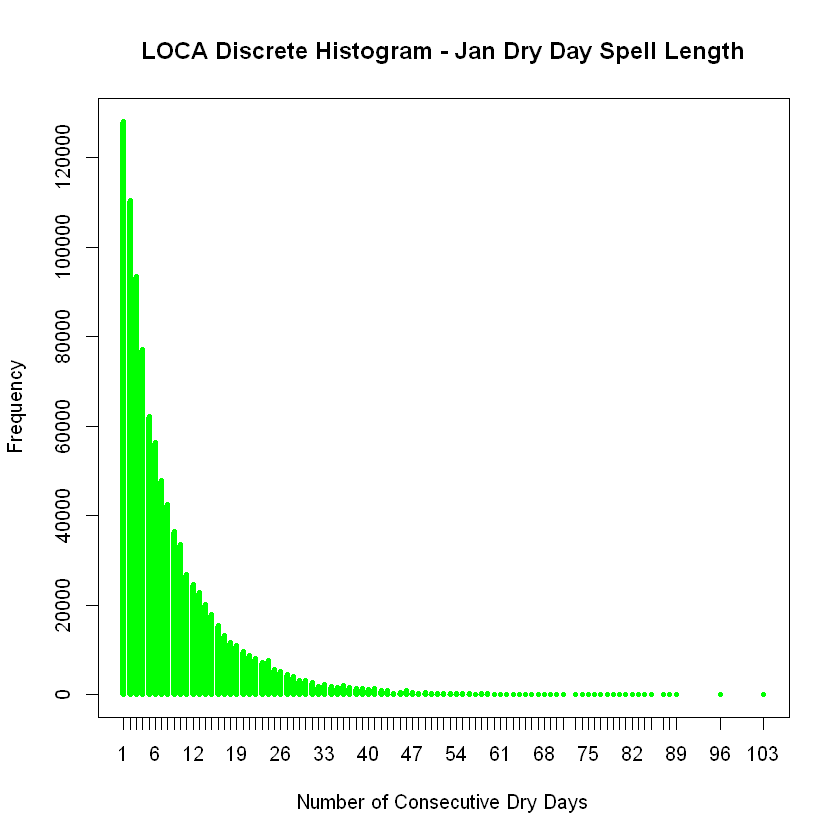

In [95]:
# our case is discrete so use this command
plot( table( dLOJan$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Jan Dry Day Spell Length", 
      col="green" )

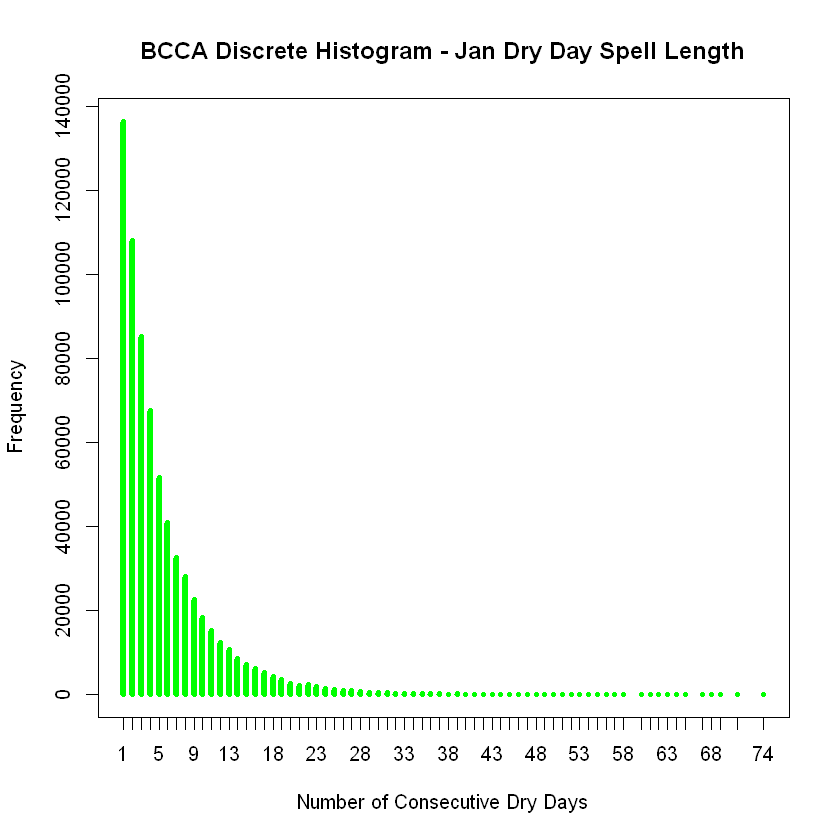

In [96]:
plot( table( dBCJan$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Jan Dry Day Spell Length", 
      col="green" )

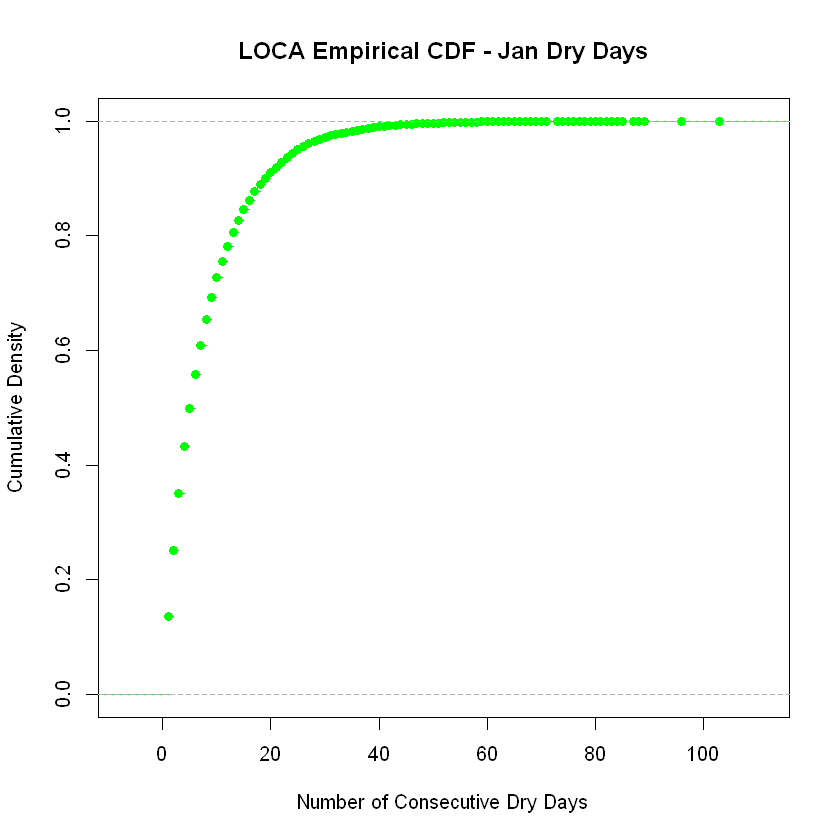

In [97]:
plot(ecdf(dLOJan$Dry_Count), main="LOCA Empirical CDF - Jan Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

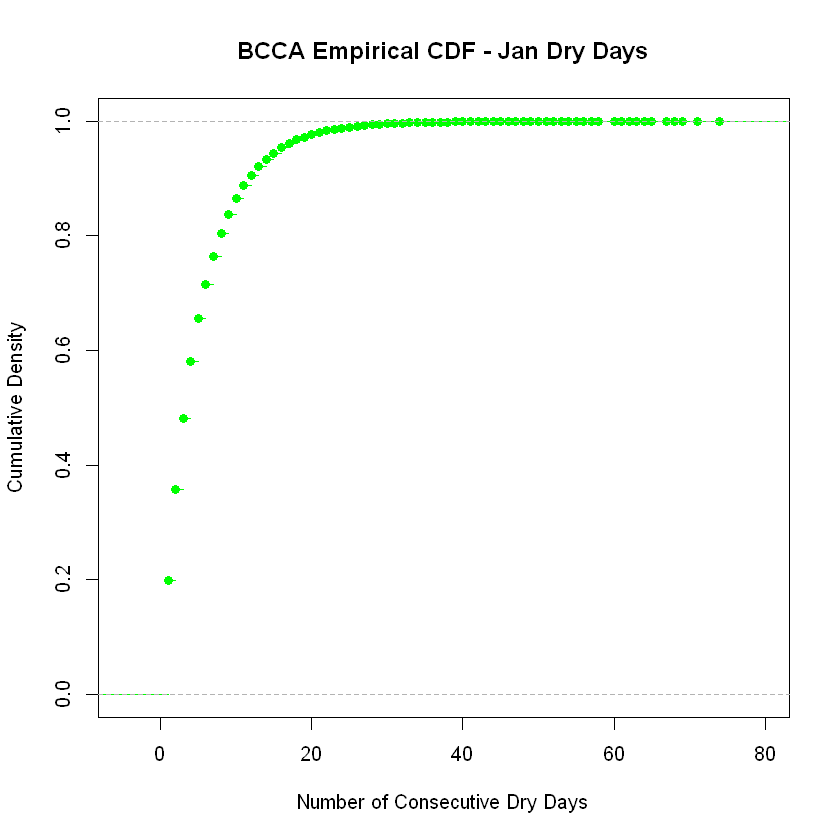

In [98]:
plot(ecdf(dBCJan$Dry_Count), main="BCCA Empirical CDF - Jan Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

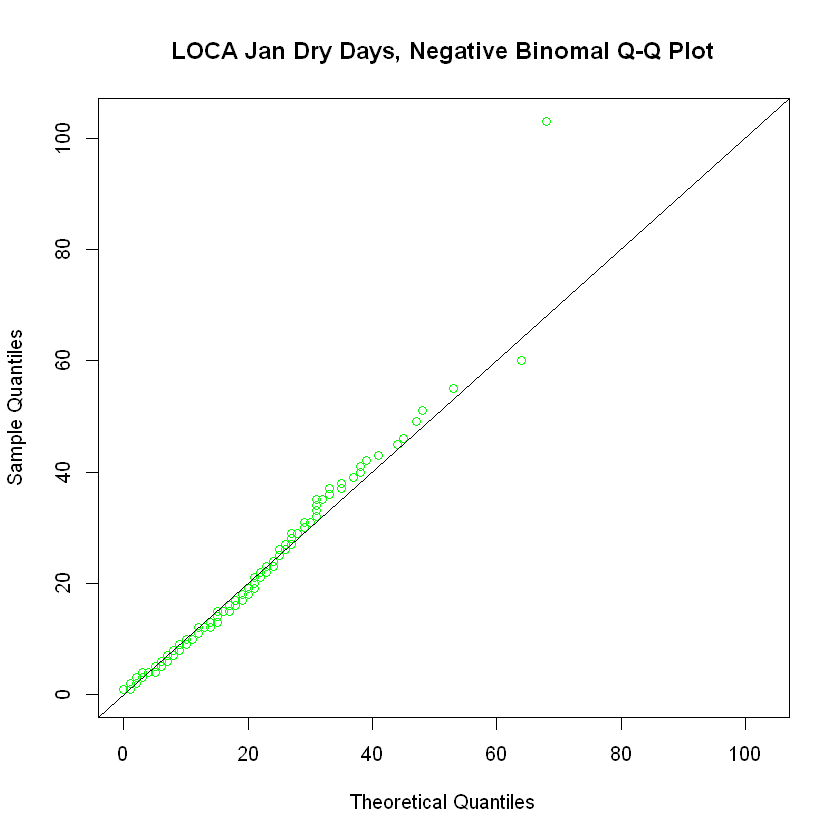

In [99]:
dLOJanMax <- max( dLOJan$Dry_Count )
dLOJanMean <- mean( dLOJan$Dry_Count )
dLOJanVar <- var( dLOJan$Dry_Count )
dLOJanBNr <- dLOJanMean^2 / (dLOJanVar - dLOJanMean)
dLOJanTstNB <- rnbinom( 1000, mu=dLOJanMean, size=dLOJanBNr )
qqplot( dLOJanTstNB, dLOJan$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Jan Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOJanMax), ylim=c(0,dLOJanMax) )
abline( 0, 1)

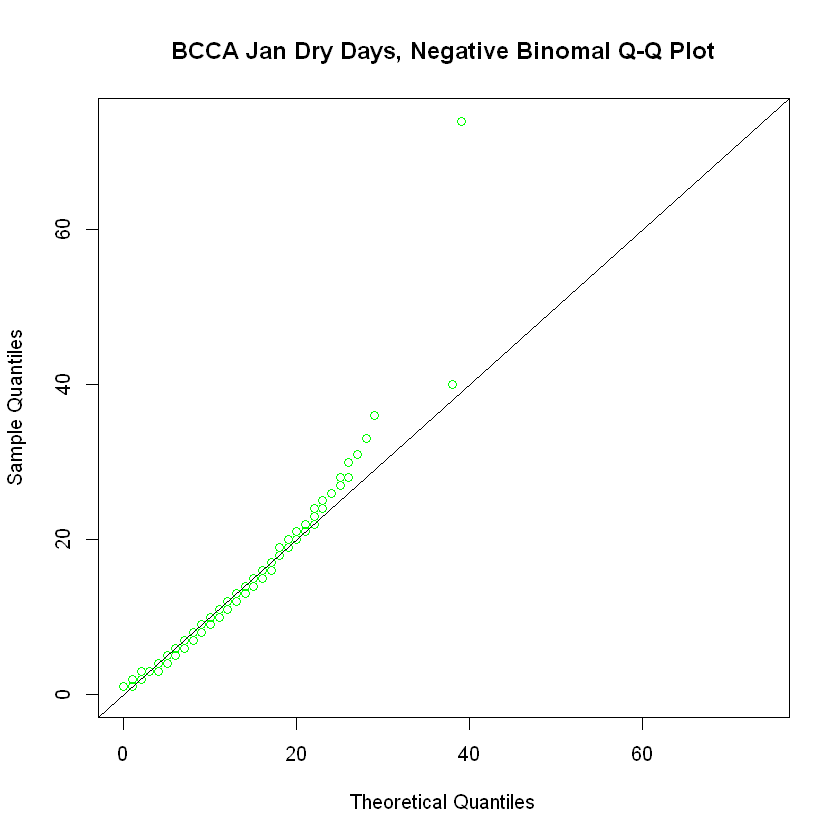

In [100]:
dBCJanMax <- max( dBCJan$Dry_Count )
dBCJanMean <- mean( dBCJan$Dry_Count )
dBCJanVar <- var( dBCJan$Dry_Count )
dBCJanBNr <- dBCJanMean^2 / (dBCJanVar - dBCJanMean)
dBCJanTstNB <- rnbinom( 1000, mu=dBCJanMean, size=dBCJanBNr )
qqplot( dBCJanTstNB, dBCJan$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Jan Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCJanMax), ylim=c(0,dBCJanMax) )
abline( 0, 1)

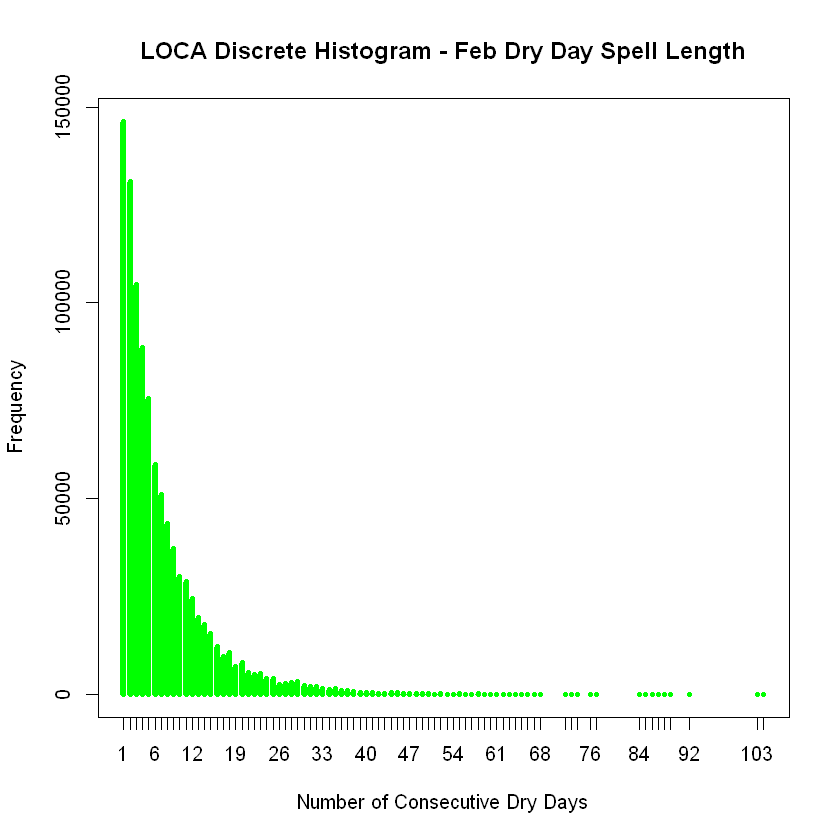

In [101]:
# our case is discrete so use this command
plot( table( dLOFeb$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Feb Dry Day Spell Length", 
      col="green" )

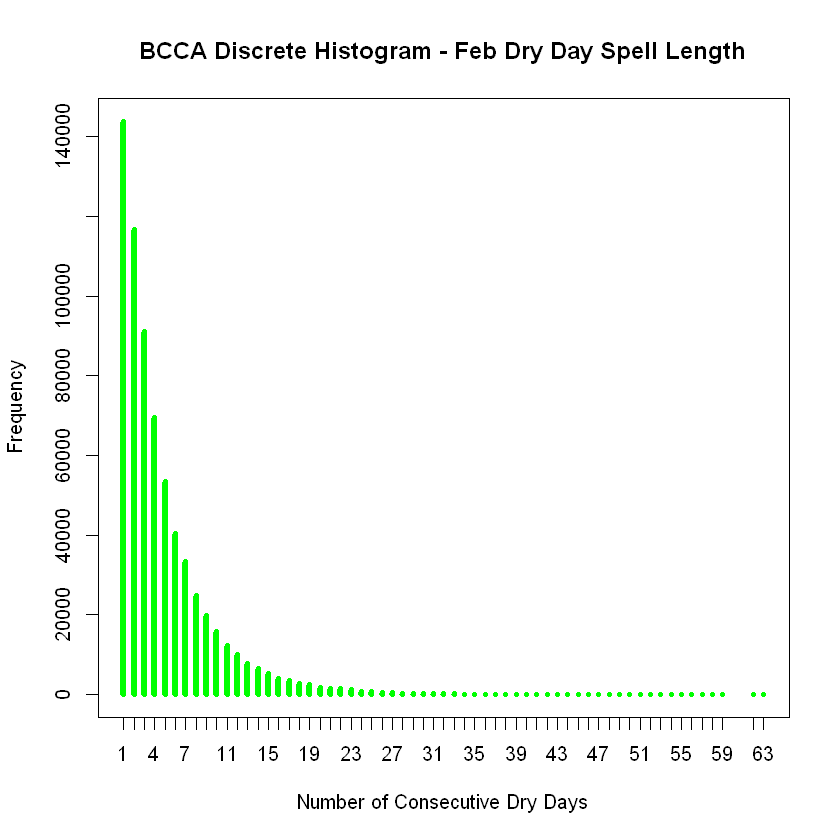

In [102]:
plot( table( dBCFeb$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Feb Dry Day Spell Length", 
      col="green" )

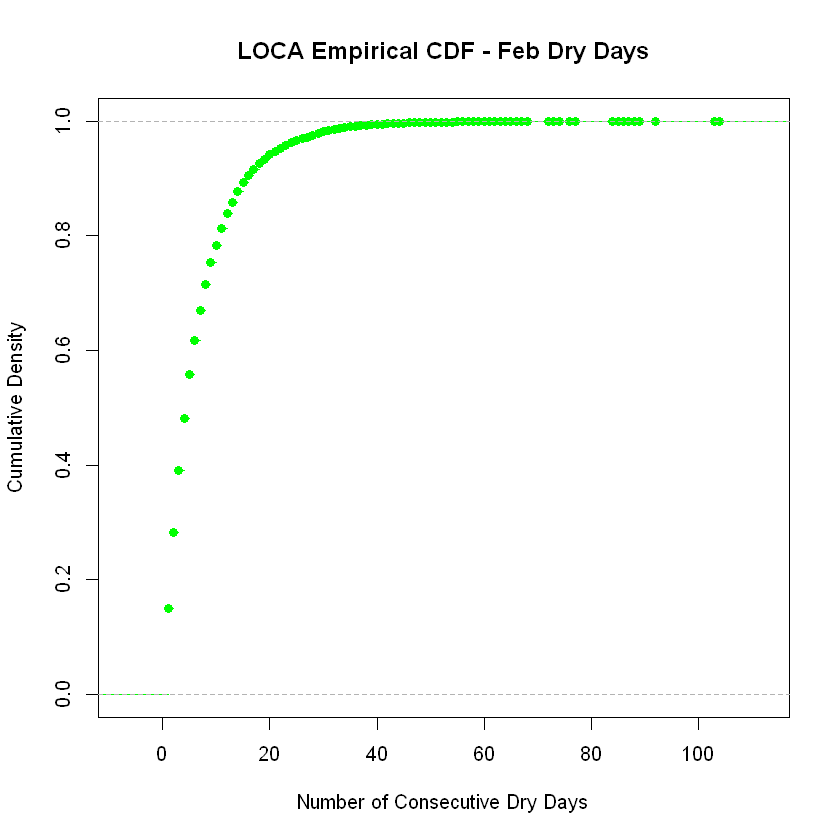

In [103]:
plot(ecdf(dLOFeb$Dry_Count), main="LOCA Empirical CDF - Feb Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

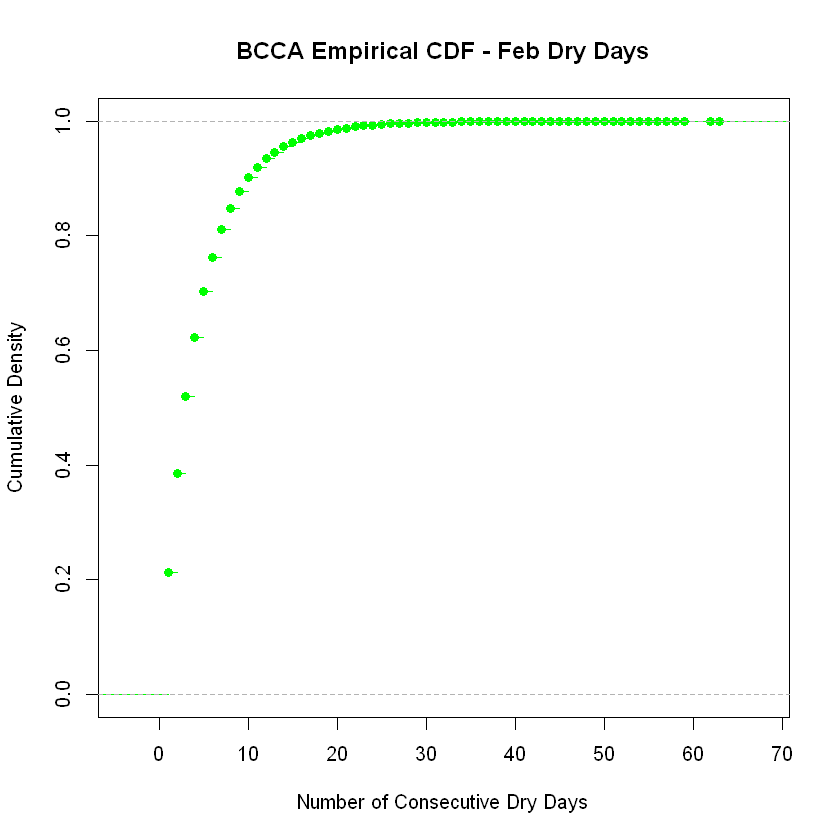

In [104]:
plot(ecdf(dBCFeb$Dry_Count), main="BCCA Empirical CDF - Feb Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

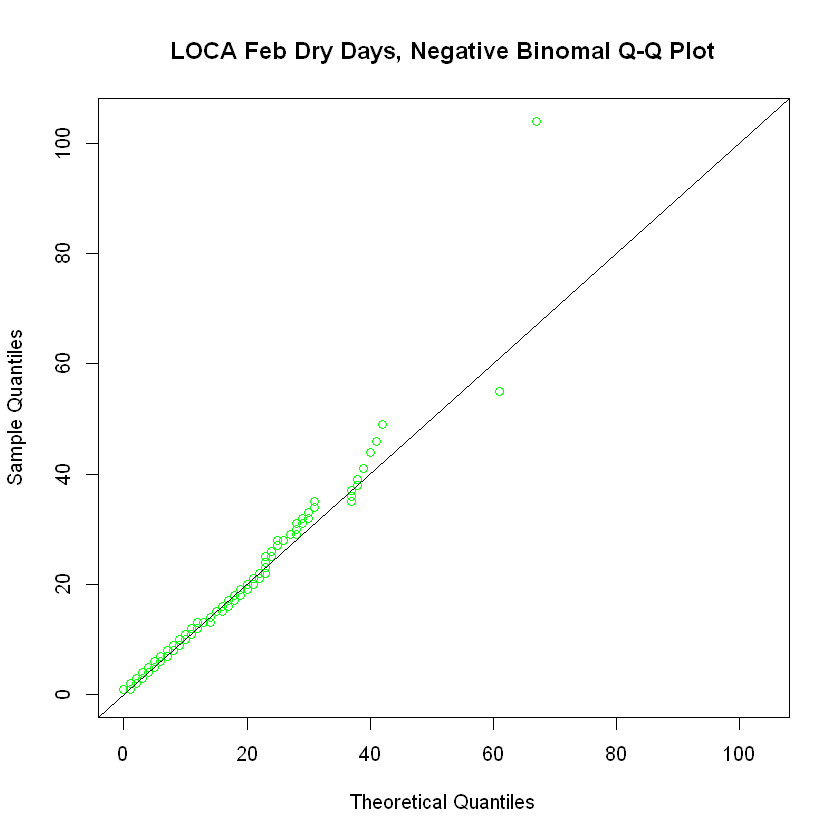

In [105]:
dLOFebMax <- max( dLOFeb$Dry_Count )
dLOFebMean <- mean( dLOFeb$Dry_Count )
dLOFebVar <- var( dLOFeb$Dry_Count )
dLOFebBNr <- dLOFebMean^2 / (dLOFebVar - dLOFebMean)
dLOFebTstNB <- rnbinom( 1000, mu=dLOFebMean, size=dLOFebBNr )
qqplot( dLOFebTstNB, dLOFeb$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Feb Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOFebMax), ylim=c(0,dLOFebMax) )
abline( 0, 1)

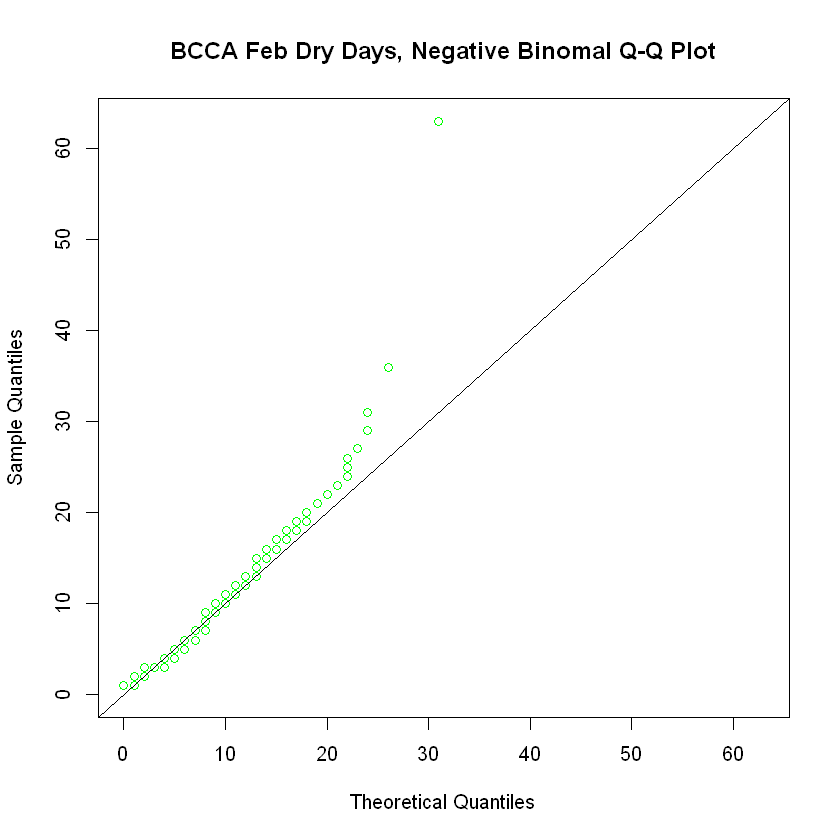

In [106]:
dBCFebMax <- max( dBCFeb$Dry_Count )
dBCFebMean <- mean( dBCFeb$Dry_Count )
dBCFebVar <- var( dBCFeb$Dry_Count )
dBCFebBNr <- dBCFebMean^2 / (dBCFebVar - dBCFebMean)
dBCFebTstNB <- rnbinom( 1000, mu=dBCFebMean, size=dBCFebBNr )
qqplot( dBCFebTstNB, dBCFeb$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Feb Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCFebMax), ylim=c(0,dBCFebMax) )
abline( 0, 1)

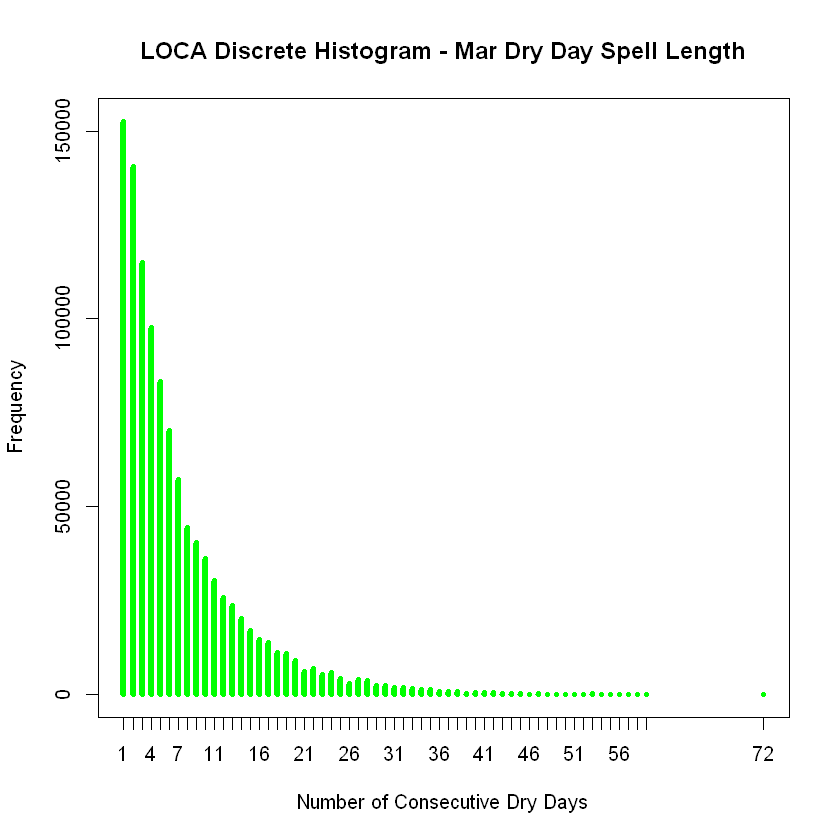

In [107]:
# our case is discrete so use this command
plot( table( dLOMar$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Mar Dry Day Spell Length", 
      col="green" )

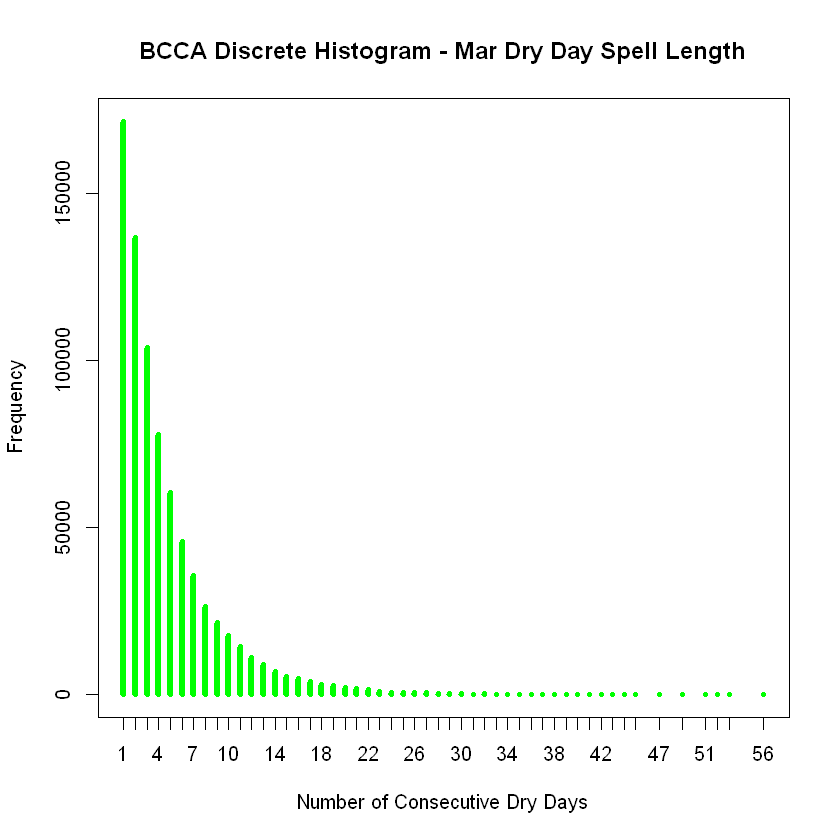

In [108]:
plot( table( dBCMar$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Mar Dry Day Spell Length", 
      col="green" )

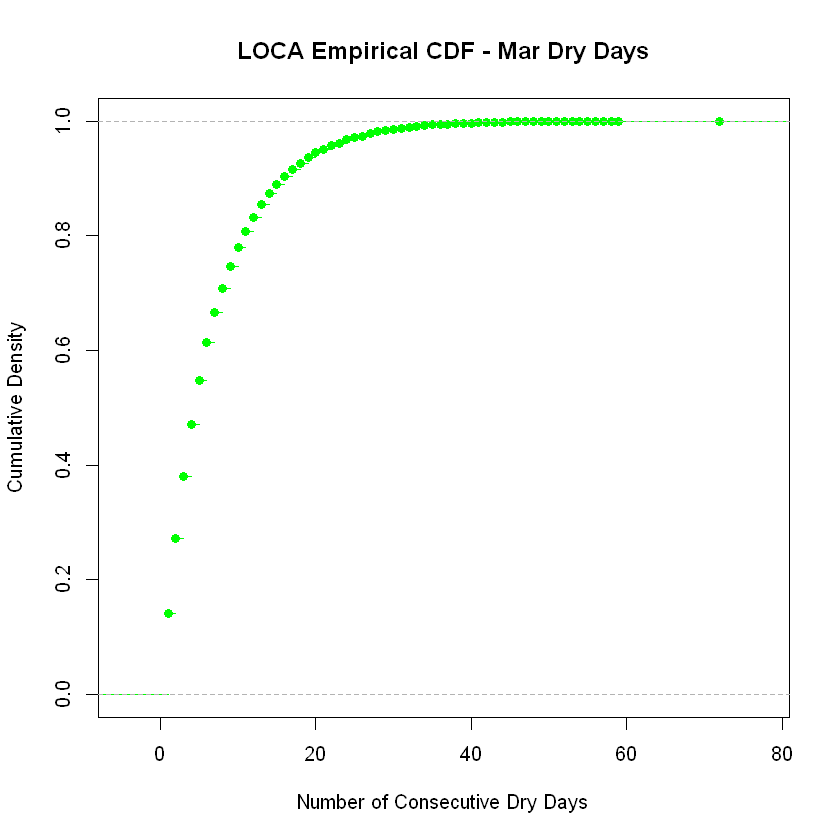

In [109]:
plot(ecdf(dLOMar$Dry_Count), main="LOCA Empirical CDF - Mar Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

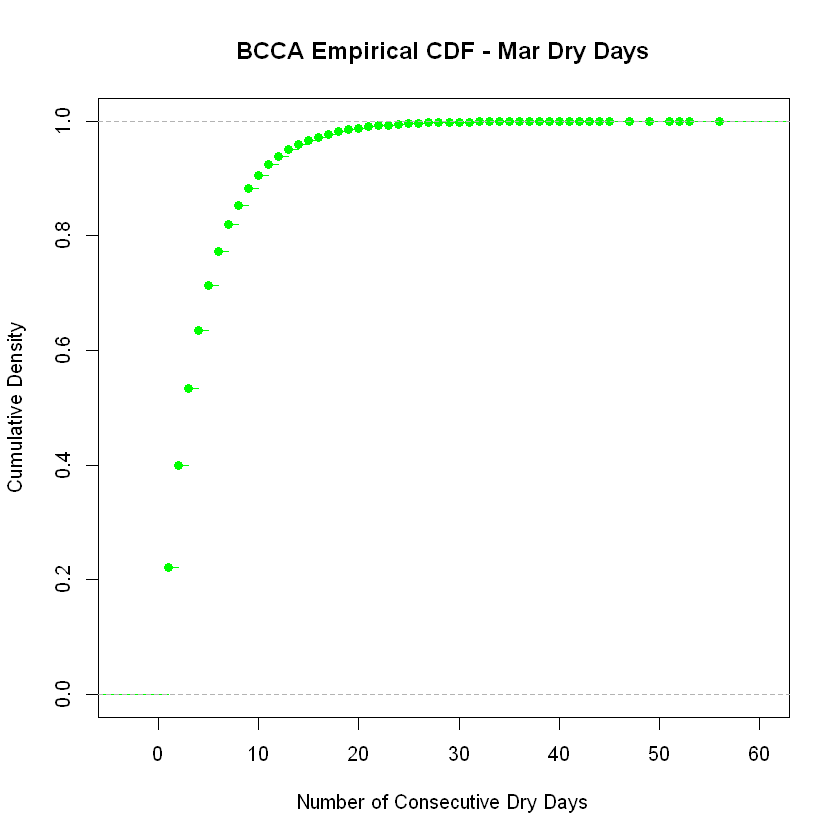

In [110]:
plot(ecdf(dBCMar$Dry_Count), main="BCCA Empirical CDF - Mar Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

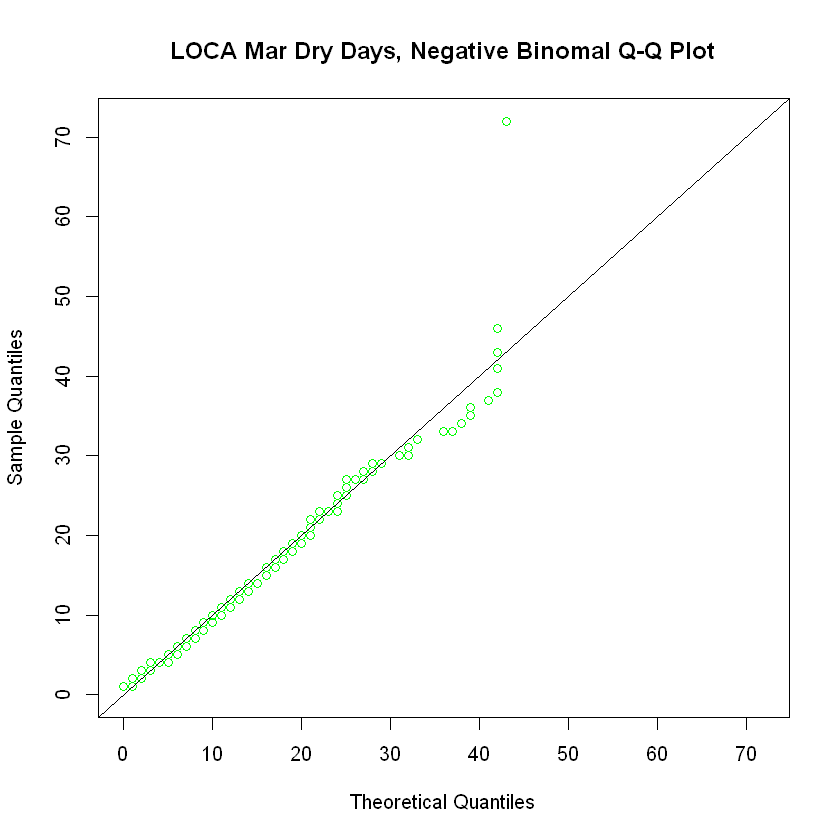

In [111]:
dLOMarMax <- max( dLOMar$Dry_Count )
dLOMarMean <- mean( dLOMar$Dry_Count )
dLOMarVar <- var( dLOMar$Dry_Count )
dLOMarBNr <- dLOMarMean^2 / (dLOMarVar - dLOMarMean)
dLOMarTstNB <- rnbinom( 1000, mu=dLOMarMean, size=dLOMarBNr )
qqplot( dLOMarTstNB, dLOMar$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Mar Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOMarMax), ylim=c(0,dLOMarMax) )
abline( 0, 1)

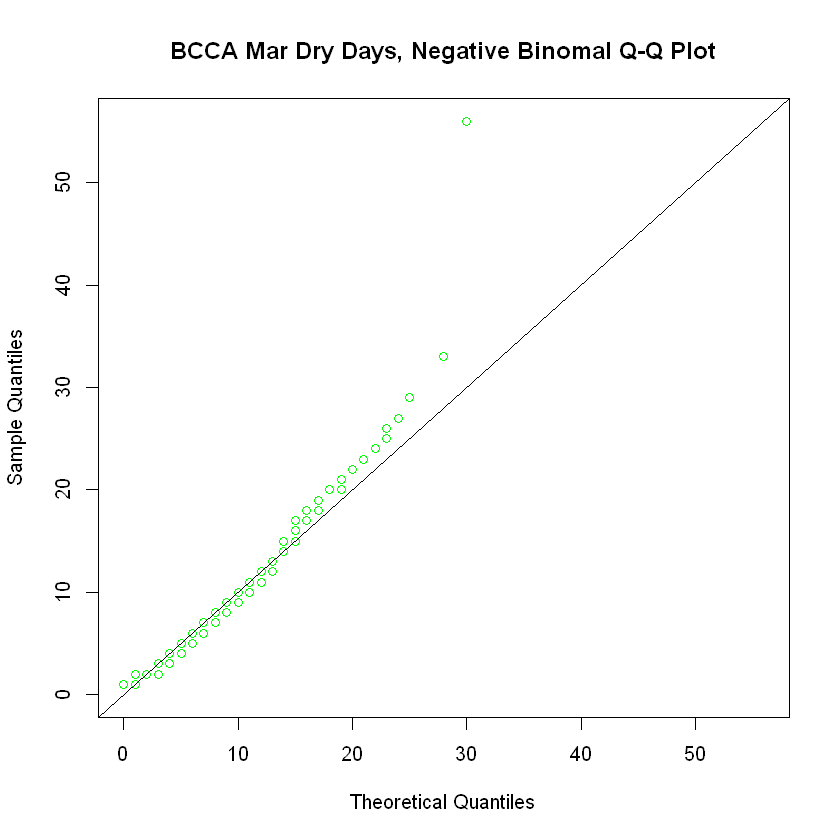

In [112]:
dBCMarMax <- max( dBCMar$Dry_Count )
dBCMarMean <- mean( dBCMar$Dry_Count )
dBCMarVar <- var( dBCMar$Dry_Count )
dBCMarBNr <- dBCMarMean^2 / (dBCMarVar - dBCMarMean)
dBCMarTstNB <- rnbinom( 1000, mu=dBCMarMean, size=dBCMarBNr )
qqplot( dBCMarTstNB, dBCMar$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Mar Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCMarMax), ylim=c(0,dBCMarMax) )
abline( 0, 1)

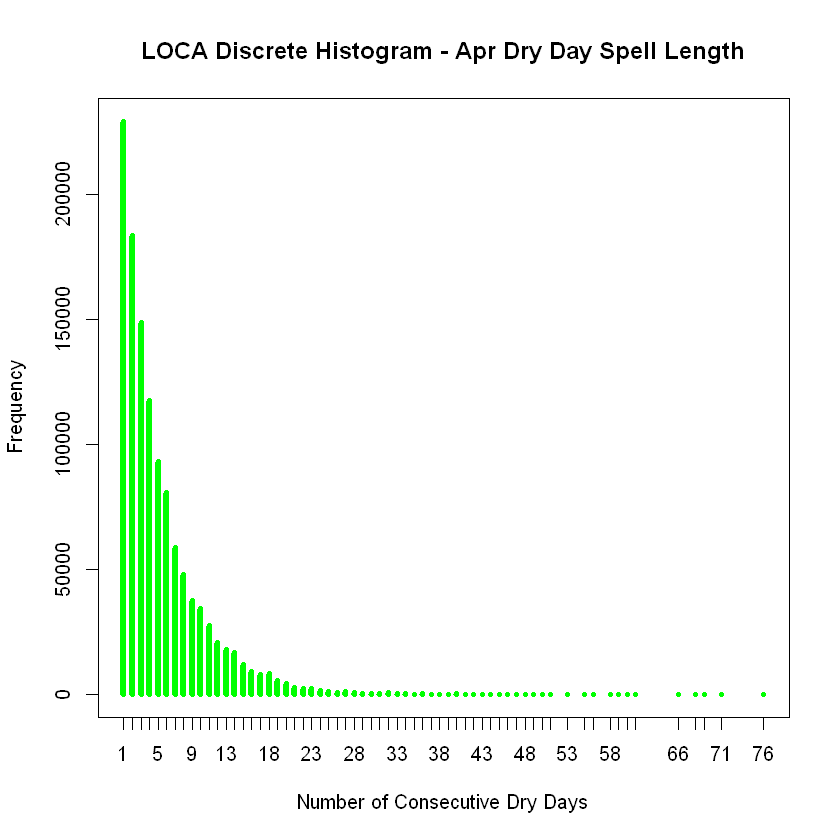

In [113]:
# our case is discrete so use this command
plot( table( dLOApr$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Apr Dry Day Spell Length", 
      col="green" )

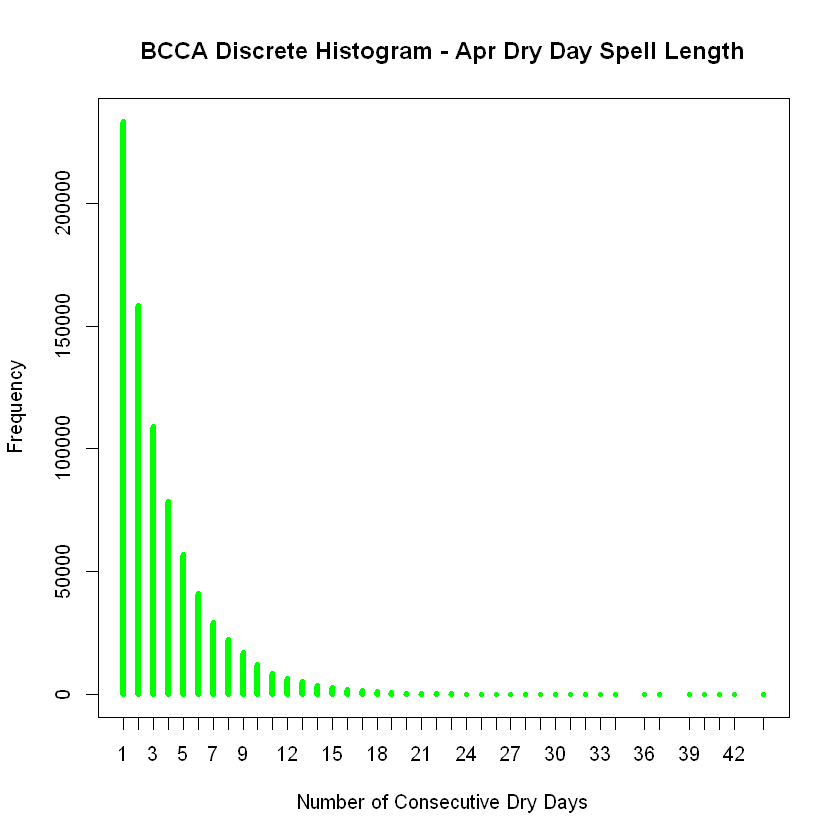

In [114]:
plot( table( dBCApr$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Apr Dry Day Spell Length", 
      col="green" )

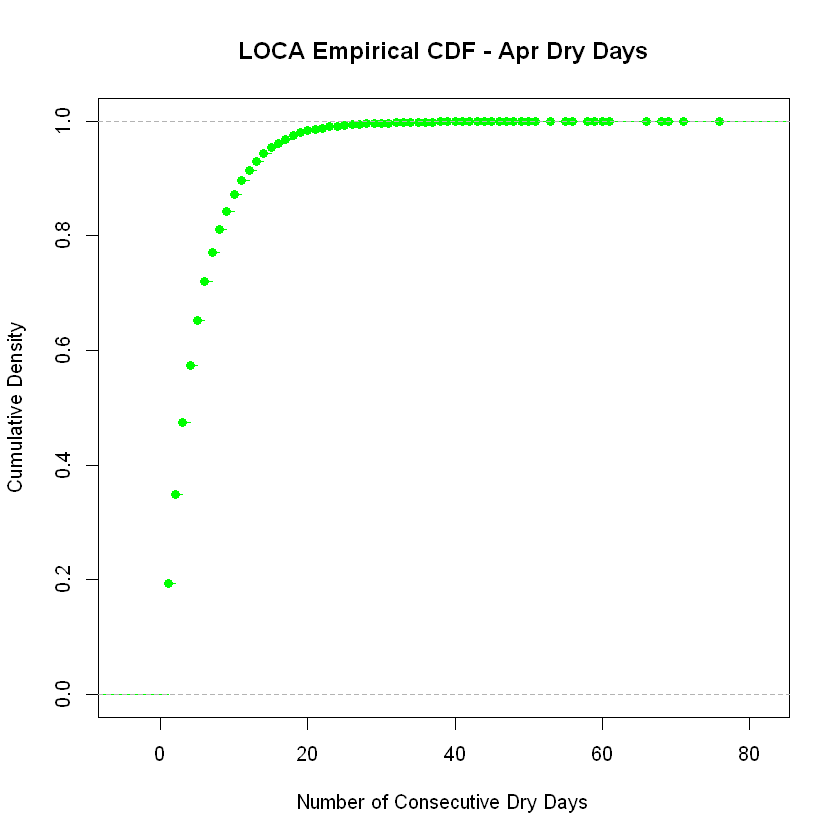

In [115]:
plot(ecdf(dLOApr$Dry_Count), main="LOCA Empirical CDF - Apr Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

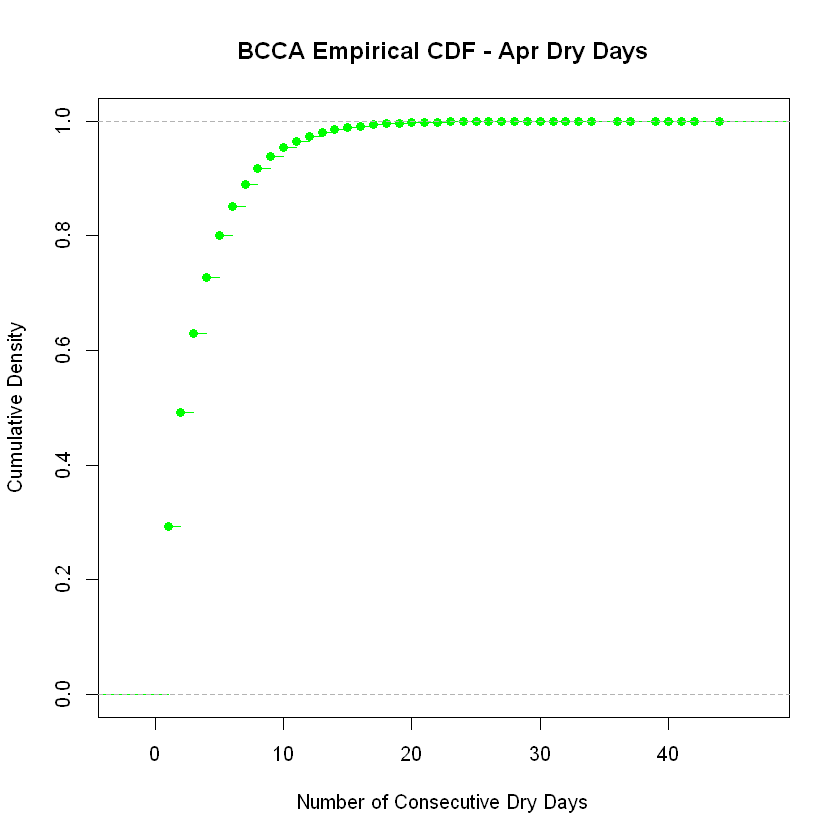

In [116]:
plot(ecdf(dBCApr$Dry_Count), main="BCCA Empirical CDF - Apr Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

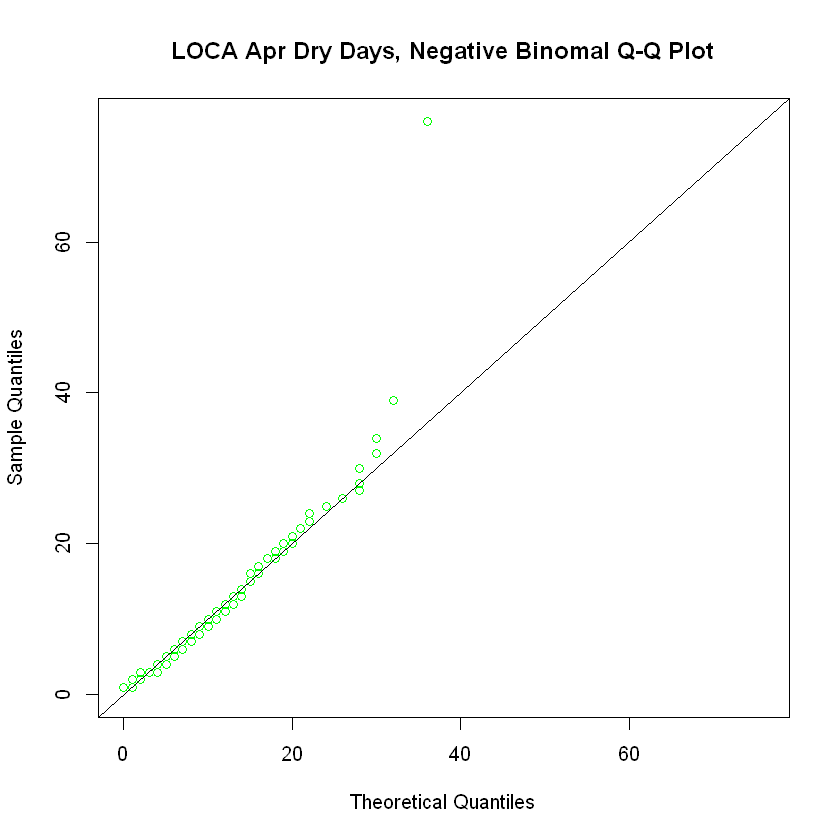

In [117]:
dLOAprMax <- max( dLOApr$Dry_Count )
dLOAprMean <- mean( dLOApr$Dry_Count )
dLOAprVar <- var( dLOApr$Dry_Count )
dLOAprBNr <- dLOAprMean^2 / (dLOAprVar - dLOAprMean)
dLOAprTstNB <- rnbinom( 1000, mu=dLOAprMean, size=dLOAprBNr )
qqplot( dLOAprTstNB, dLOApr$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Apr Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOAprMax), ylim=c(0,dLOAprMax) )
abline( 0, 1)

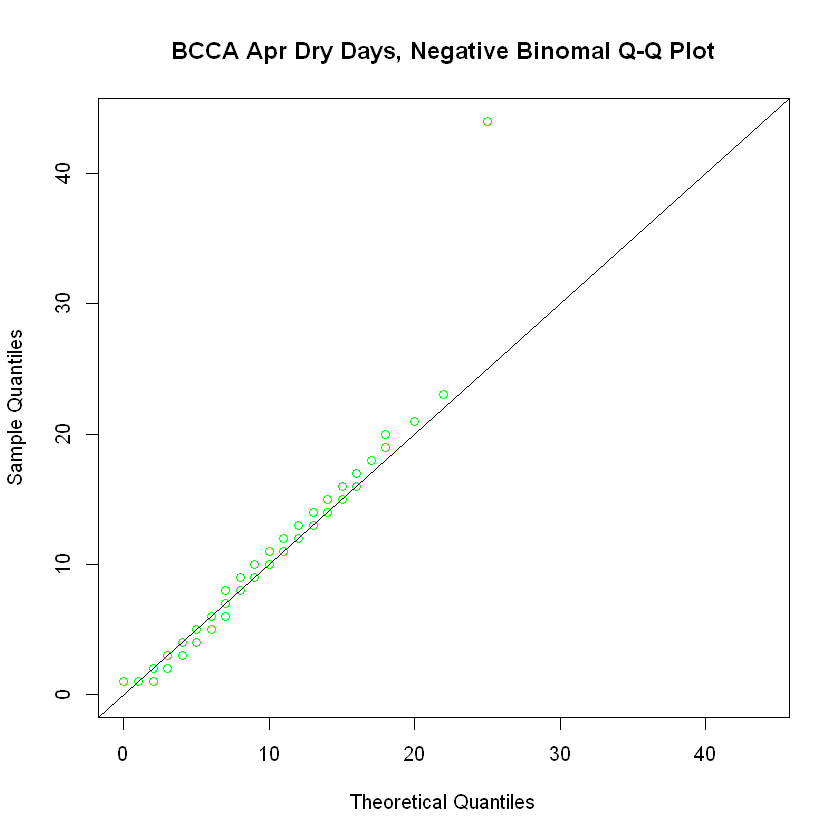

In [118]:
dBCAprMax <- max( dBCApr$Dry_Count )
dBCAprMean <- mean( dBCApr$Dry_Count )
dBCAprVar <- var( dBCApr$Dry_Count )
dBCAprBNr <- dBCAprMean^2 / (dBCAprVar - dBCAprMean)
dBCAprTstNB <- rnbinom( 1000, mu=dBCAprMean, size=dBCAprBNr )
qqplot( dBCAprTstNB, dBCApr$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Apr Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCAprMax), ylim=c(0,dBCAprMax) )
abline( 0, 1)

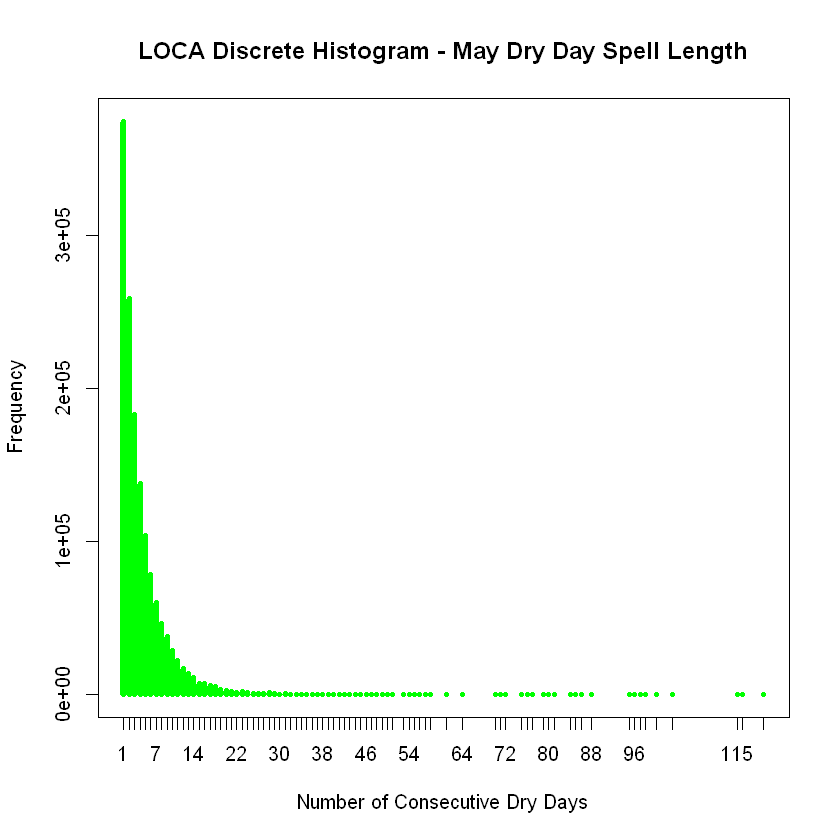

In [119]:
# our case is discrete so use this command
plot( table( dLOMay$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - May Dry Day Spell Length", 
      col="green" )

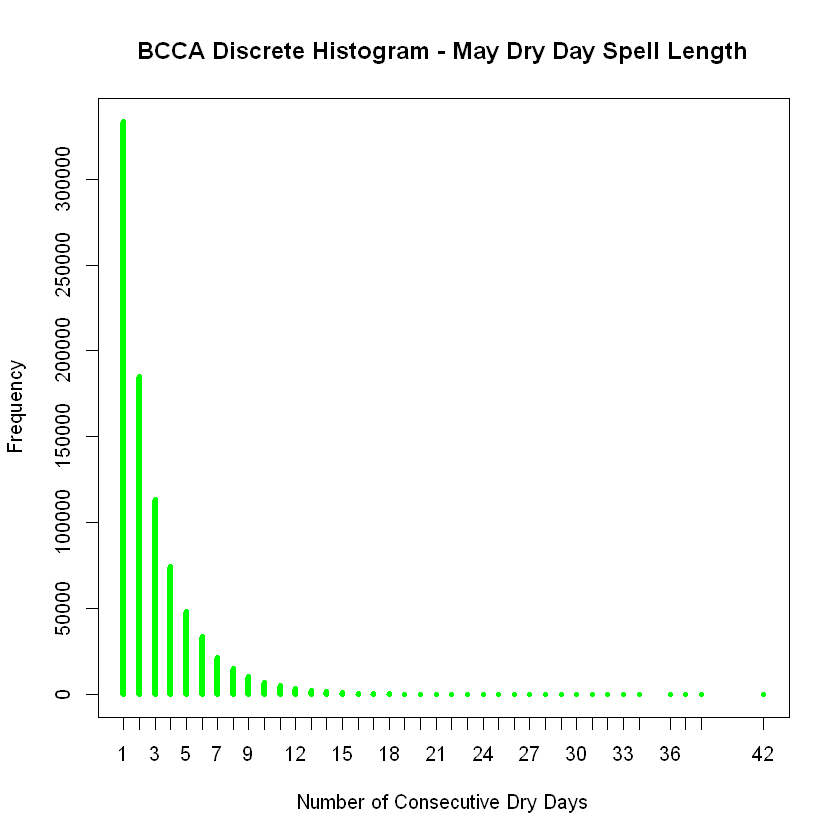

In [120]:
plot( table( dBCMay$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - May Dry Day Spell Length", 
      col="green" )

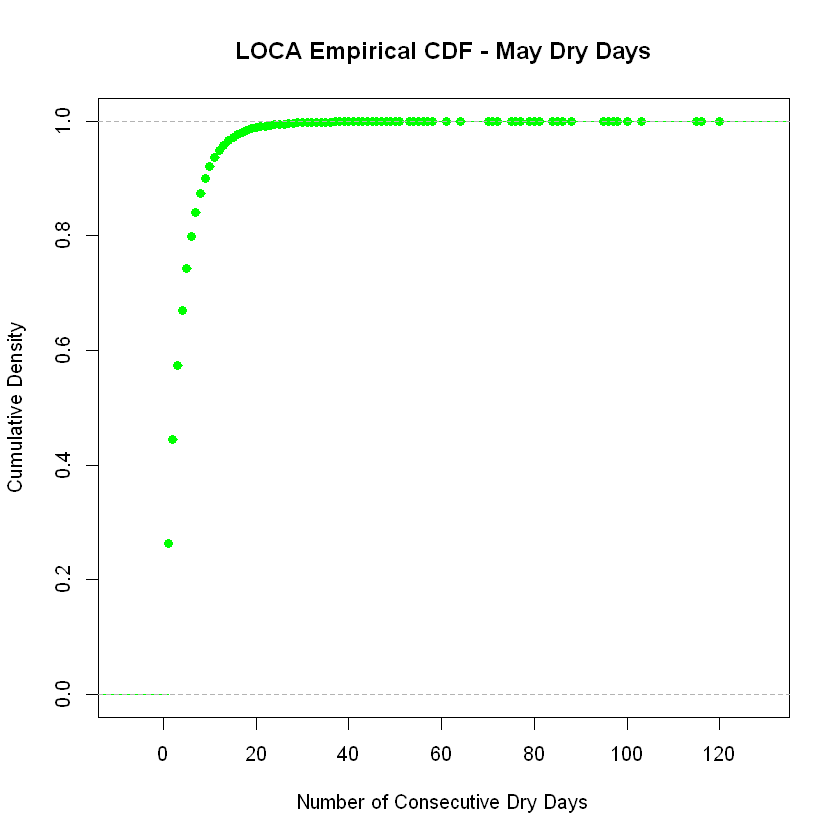

In [121]:
plot(ecdf(dLOMay$Dry_Count), main="LOCA Empirical CDF - May Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

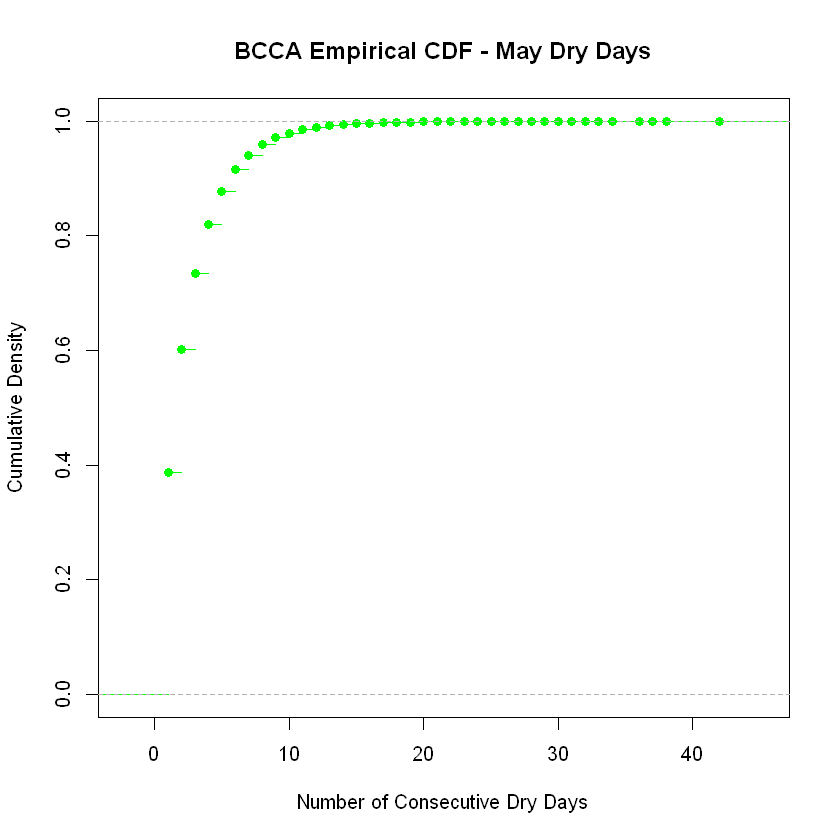

In [122]:
plot(ecdf(dBCMay$Dry_Count), main="BCCA Empirical CDF - May Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

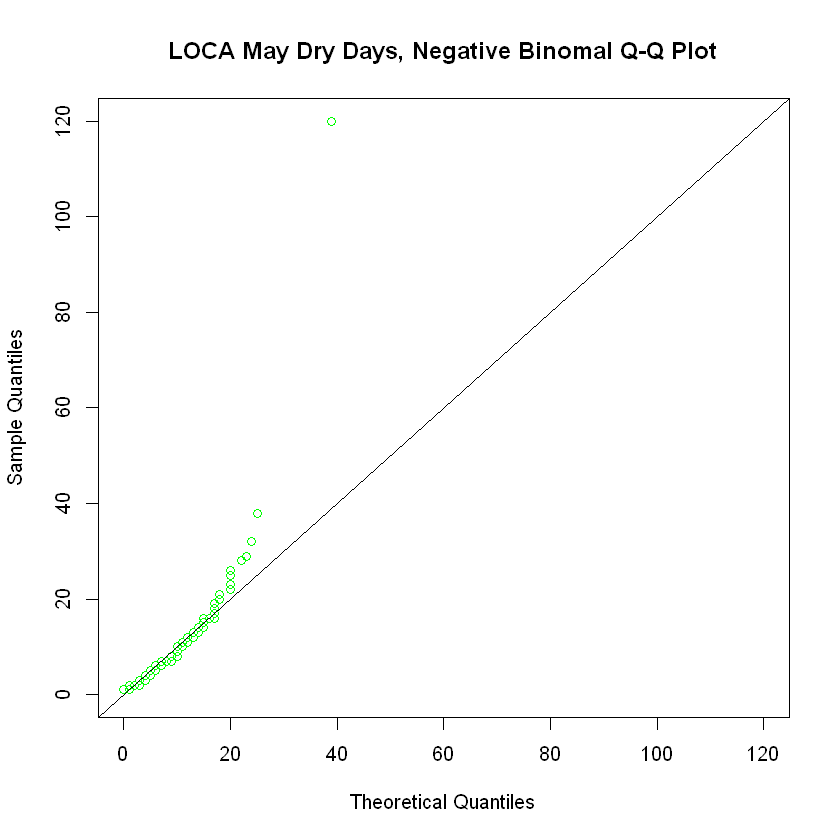

In [123]:
dLOMayMax <- max( dLOMay$Dry_Count )
dLOMayMean <- mean( dLOMay$Dry_Count )
dLOMayVar <- var( dLOMay$Dry_Count )
dLOMayBNr <- dLOMayMean^2 / (dLOMayVar - dLOMayMean)
dLOMayTstNB <- rnbinom( 1000, mu=dLOMayMean, size=dLOMayBNr )
qqplot( dLOMayTstNB, dLOMay$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA May Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOMayMax), ylim=c(0,dLOMayMax) )
abline( 0, 1)

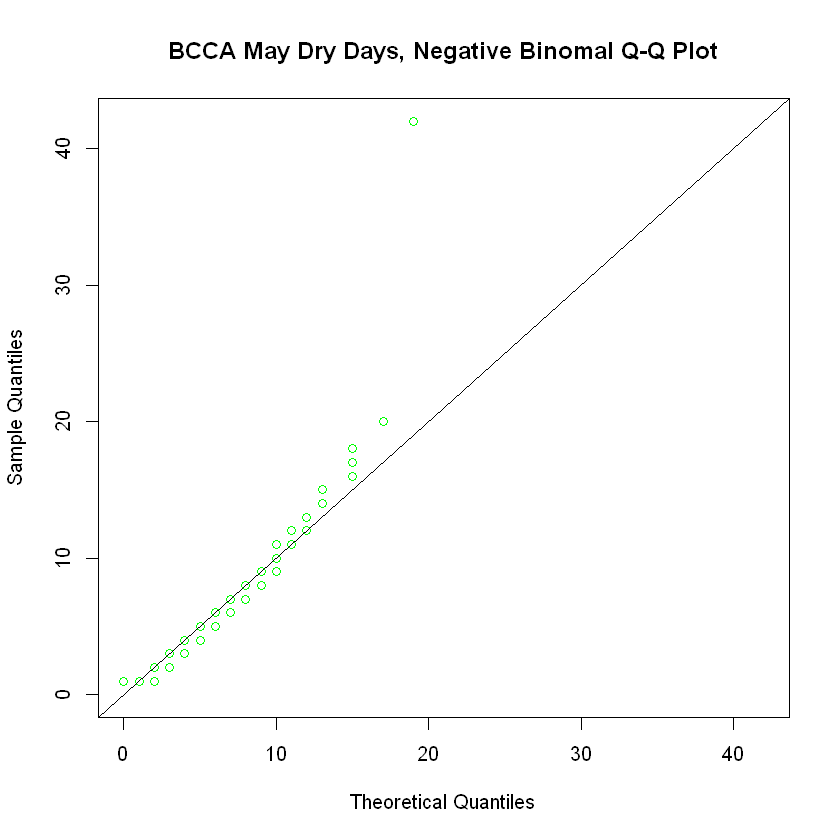

In [124]:
dBCMayMax <- max( dBCMay$Dry_Count )
dBCMayMean <- mean( dBCMay$Dry_Count )
dBCMayVar <- var( dBCMay$Dry_Count )
dBCMayBNr <- dBCMayMean^2 / (dBCMayVar - dBCMayMean)
dBCMayTstNB <- rnbinom( 1000, mu=dBCMayMean, size=dBCMayBNr )
qqplot( dBCMayTstNB, dBCMay$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA May Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCMayMax), ylim=c(0,dBCMayMax) )
abline( 0, 1)

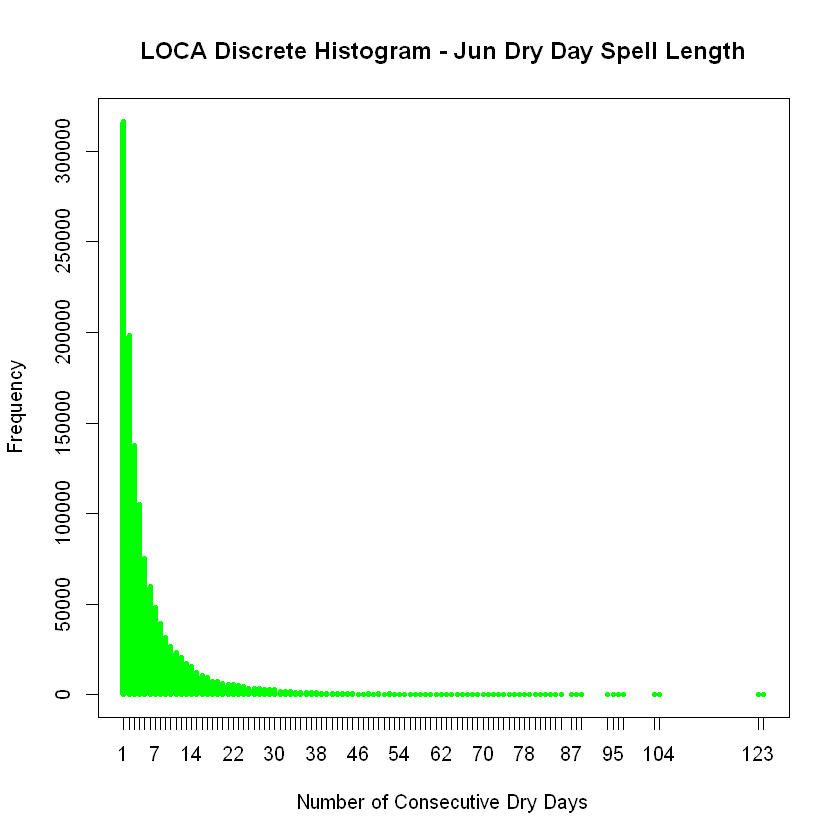

In [125]:
# our case is discrete so use this command
plot( table( dLOJun$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Jun Dry Day Spell Length", 
      col="green" )

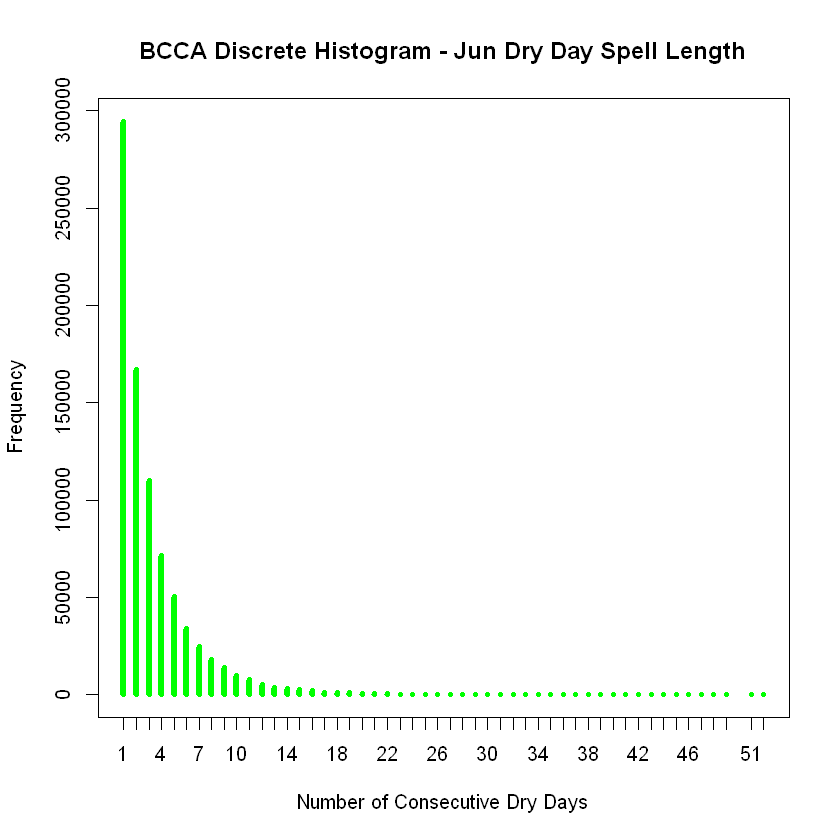

In [126]:
plot( table( dBCJun$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Jun Dry Day Spell Length", 
      col="green" )

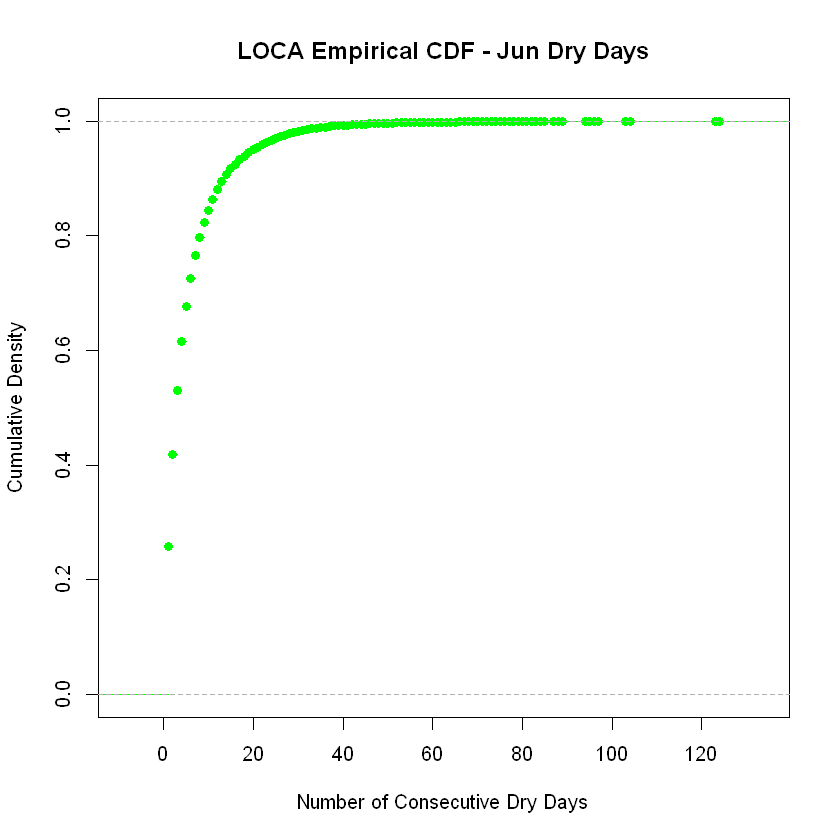

In [127]:
plot(ecdf(dLOJun$Dry_Count), main="LOCA Empirical CDF - Jun Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

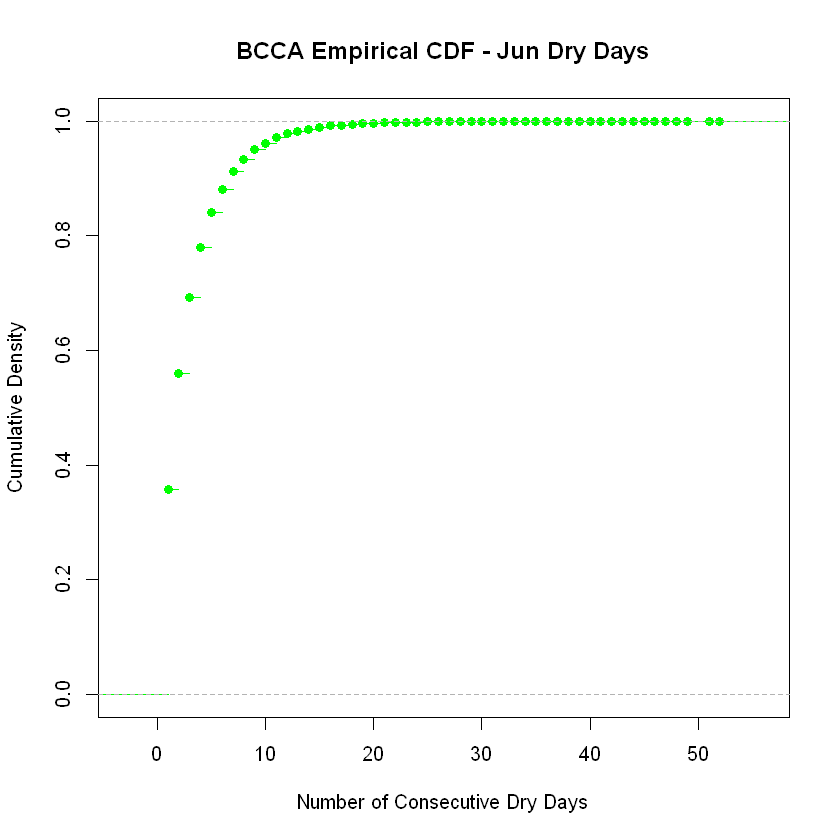

In [128]:
plot(ecdf(dBCJun$Dry_Count), main="BCCA Empirical CDF - Jun Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

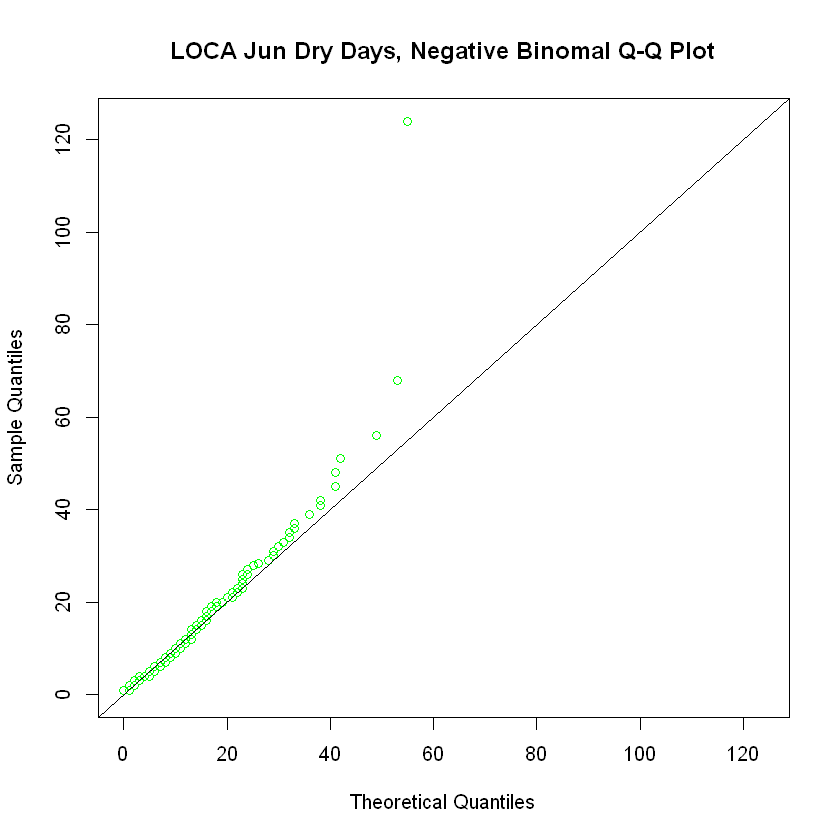

In [129]:
dLOJunMax <- max( dLOJun$Dry_Count )
dLOJunMean <- mean( dLOJun$Dry_Count )
dLOJunVar <- var( dLOJun$Dry_Count )
dLOJunBNr <- dLOJunMean^2 / (dLOJunVar - dLOJunMean)
dLOJunTstNB <- rnbinom( 1000, mu=dLOJunMean, size=dLOJunBNr )
qqplot( dLOJunTstNB, dLOJun$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Jun Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOJunMax), ylim=c(0,dLOJunMax) )
abline( 0, 1)

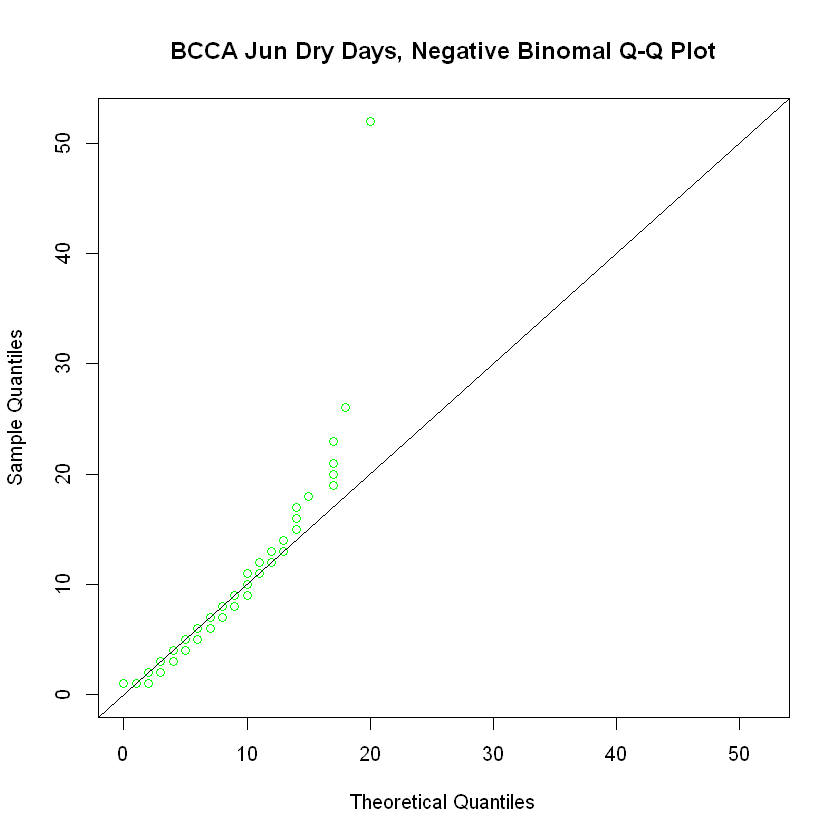

In [130]:
dBCJunMax <- max( dBCJun$Dry_Count )
dBCJunMean <- mean( dBCJun$Dry_Count )
dBCJunVar <- var( dBCJun$Dry_Count )
dBCJunBNr <- dBCJunMean^2 / (dBCJunVar - dBCJunMean)
dBCJunTstNB <- rnbinom( 1000, mu=dBCJunMean, size=dBCJunBNr )
qqplot( dBCJunTstNB, dBCJun$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Jun Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCJunMax), ylim=c(0,dBCJunMax) )
abline( 0, 1)

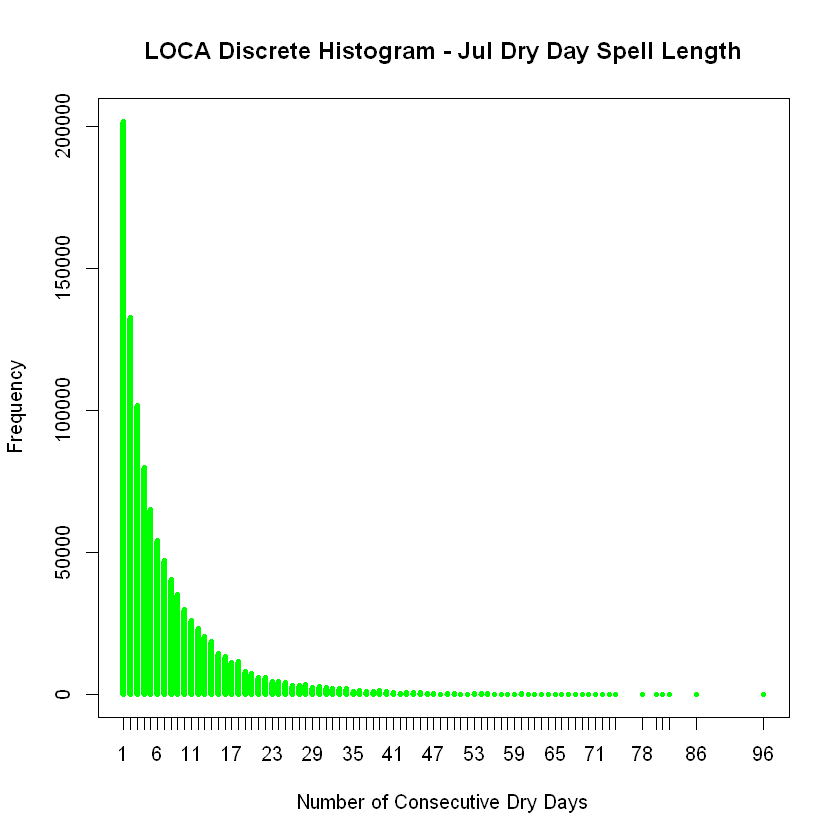

In [131]:
# our case is discrete so use this command
plot( table( dLOJul$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Jul Dry Day Spell Length", 
      col="green" )

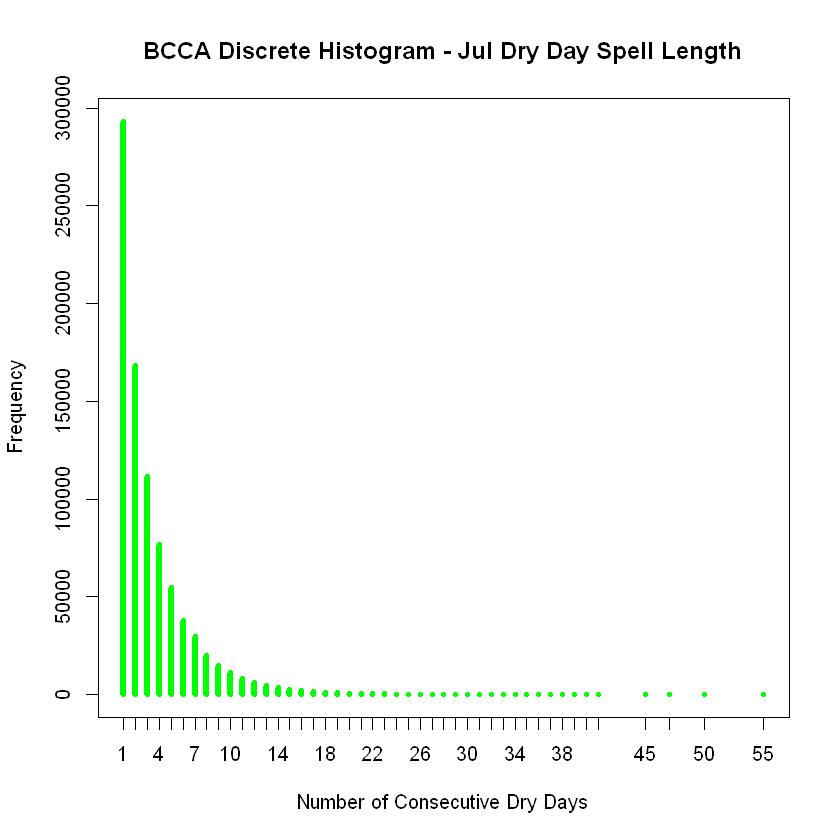

In [132]:
plot( table( dBCJul$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Jul Dry Day Spell Length", 
      col="green" )

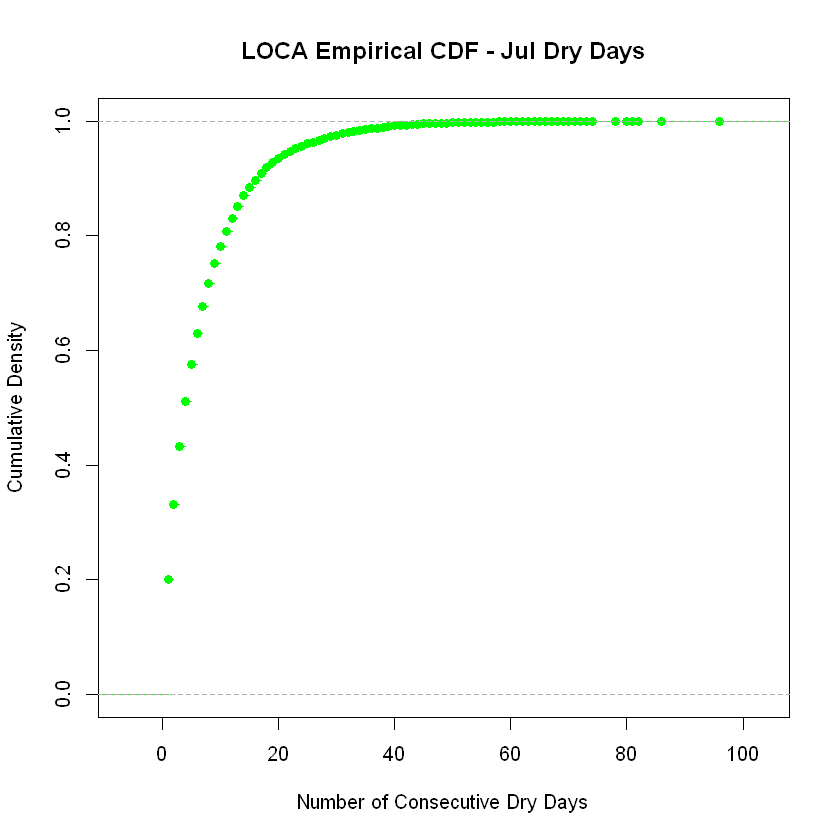

In [133]:
plot(ecdf(dLOJul$Dry_Count), main="LOCA Empirical CDF - Jul Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

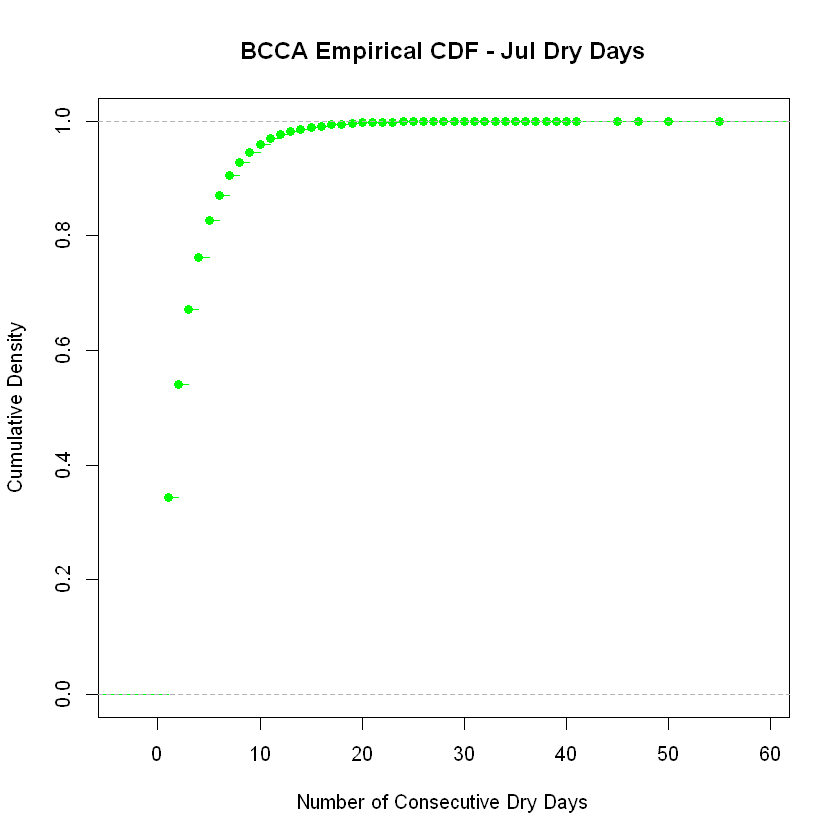

In [134]:
plot(ecdf(dBCJul$Dry_Count), main="BCCA Empirical CDF - Jul Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

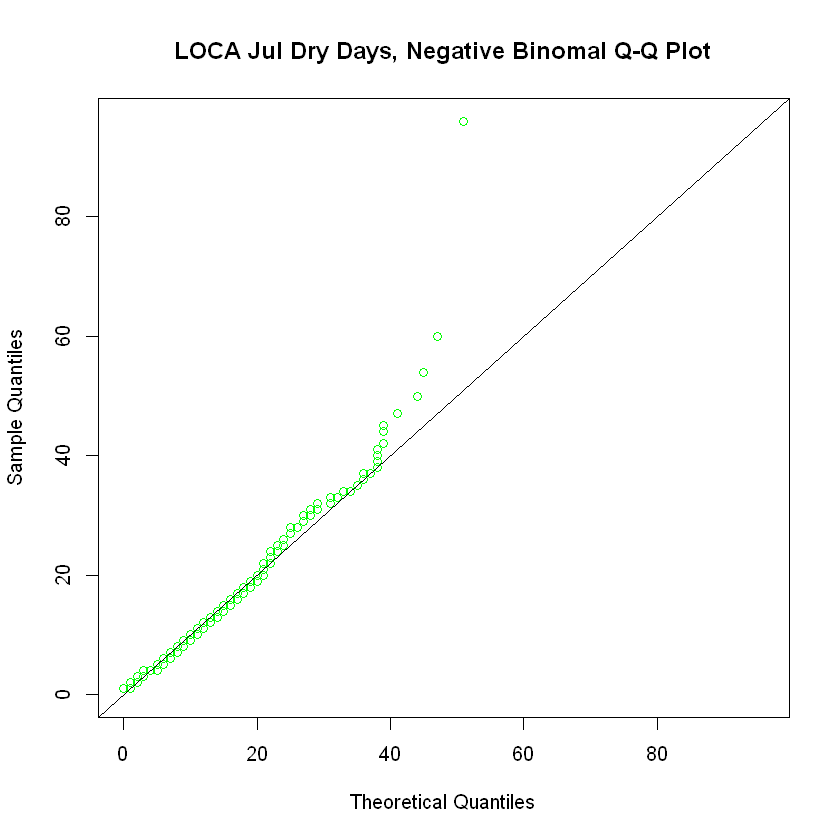

In [135]:
dLOJulMax <- max( dLOJul$Dry_Count )
dLOJulMean <- mean( dLOJul$Dry_Count )
dLOJulVar <- var( dLOJul$Dry_Count )
dLOJulBNr <- dLOJulMean^2 / (dLOJulVar - dLOJulMean)
dLOJulTstNB <- rnbinom( 1000, mu=dLOJulMean, size=dLOJulBNr )
qqplot( dLOJulTstNB, dLOJul$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Jul Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOJulMax), ylim=c(0,dLOJulMax) )
abline( 0, 1)

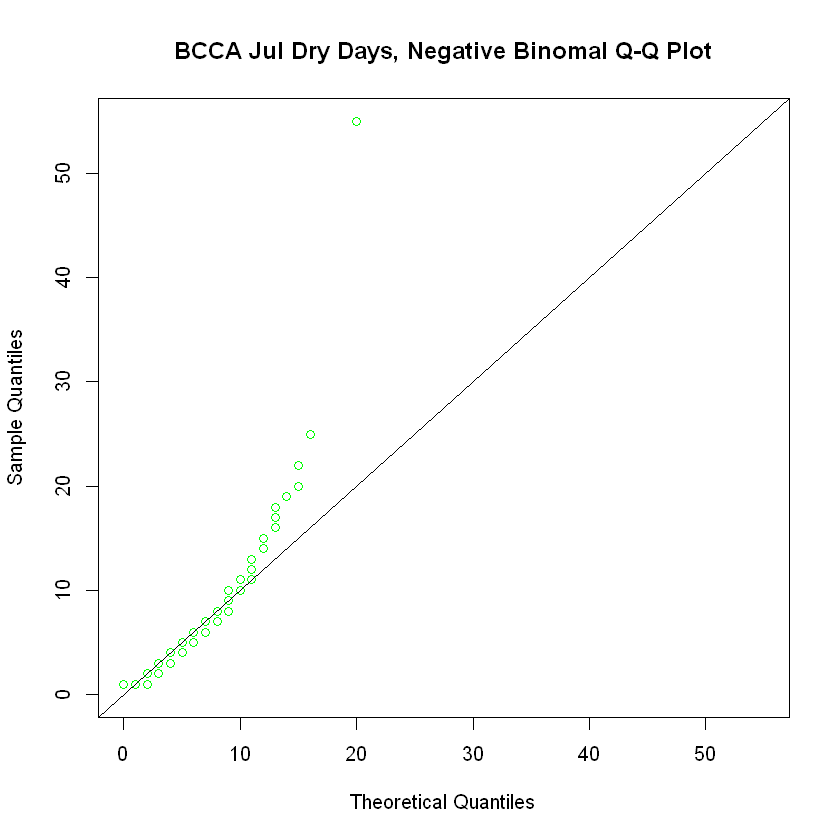

In [136]:
dBCJulMax <- max( dBCJul$Dry_Count )
dBCJulMean <- mean( dBCJul$Dry_Count )
dBCJulVar <- var( dBCJul$Dry_Count )
dBCJulBNr <- dBCJulMean^2 / (dBCJulVar - dBCJulMean)
dBCJulTstNB <- rnbinom( 1000, mu=dBCJulMean, size=dBCJulBNr )
qqplot( dBCJulTstNB, dBCJul$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Jul Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCJulMax), ylim=c(0,dBCJulMax) )
abline( 0, 1)

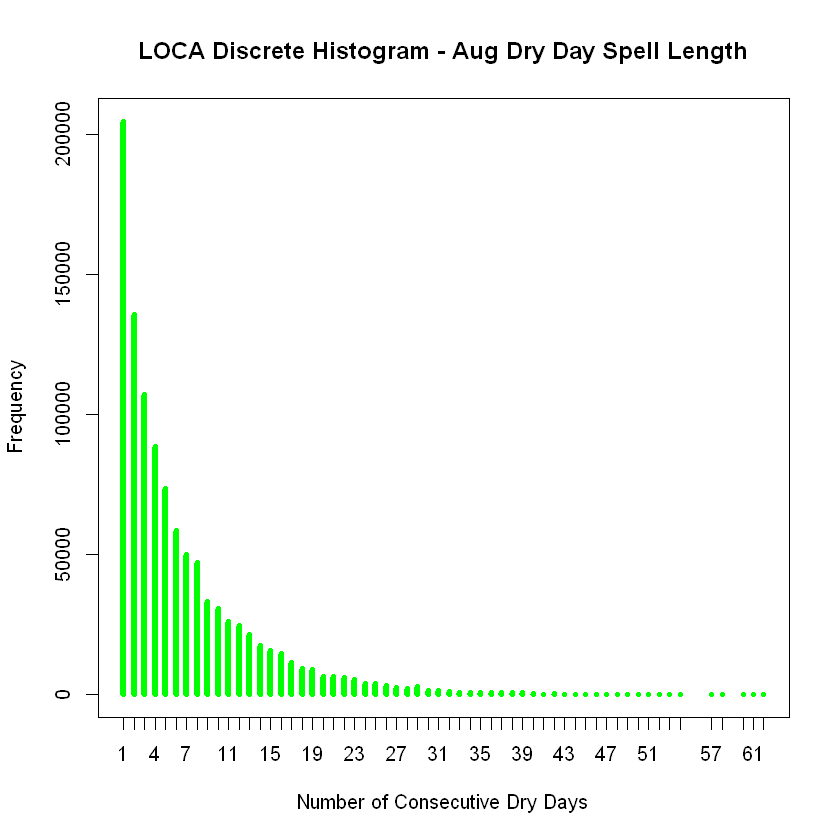

In [137]:
# our case is discrete so use this command
plot( table( dLOAug$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Aug Dry Day Spell Length", 
      col="green" )

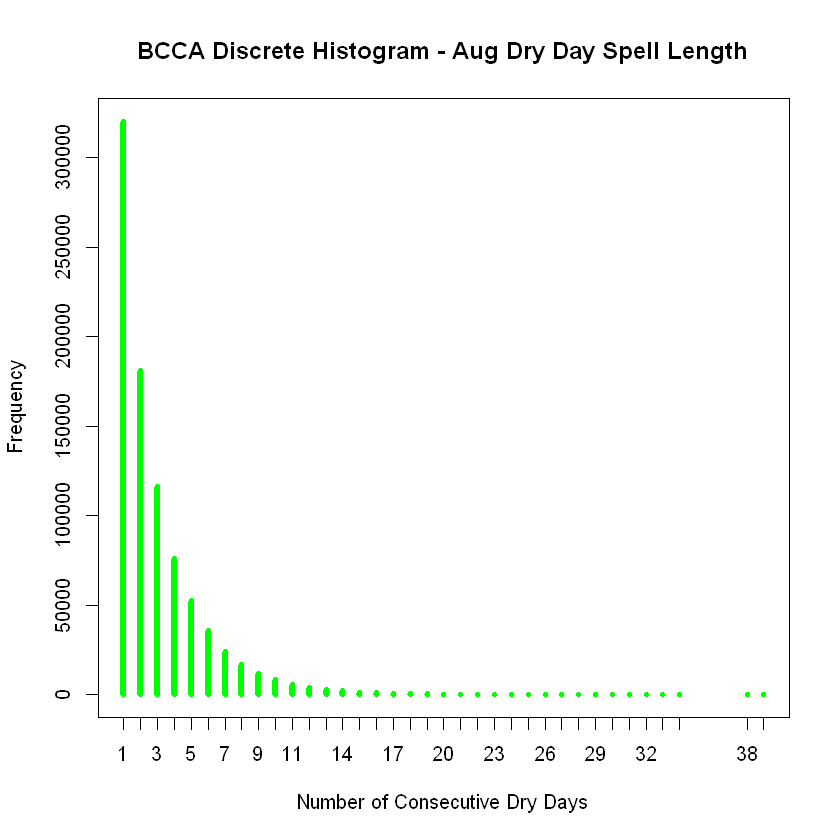

In [138]:
plot( table( dBCAug$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Aug Dry Day Spell Length", 
      col="green" )

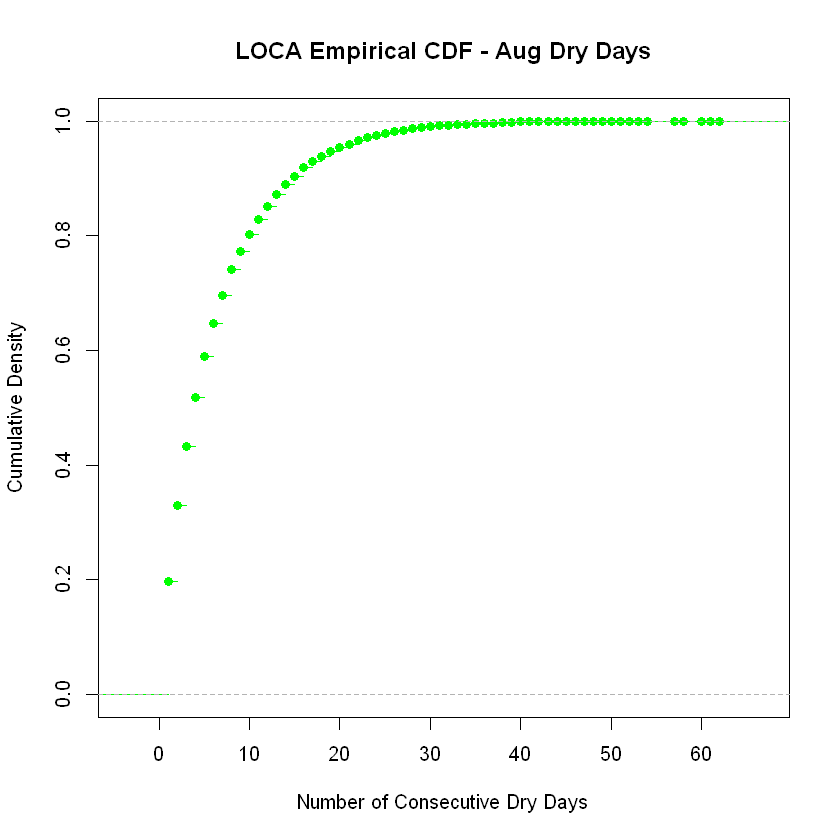

In [139]:
plot(ecdf(dLOAug$Dry_Count), main="LOCA Empirical CDF - Aug Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

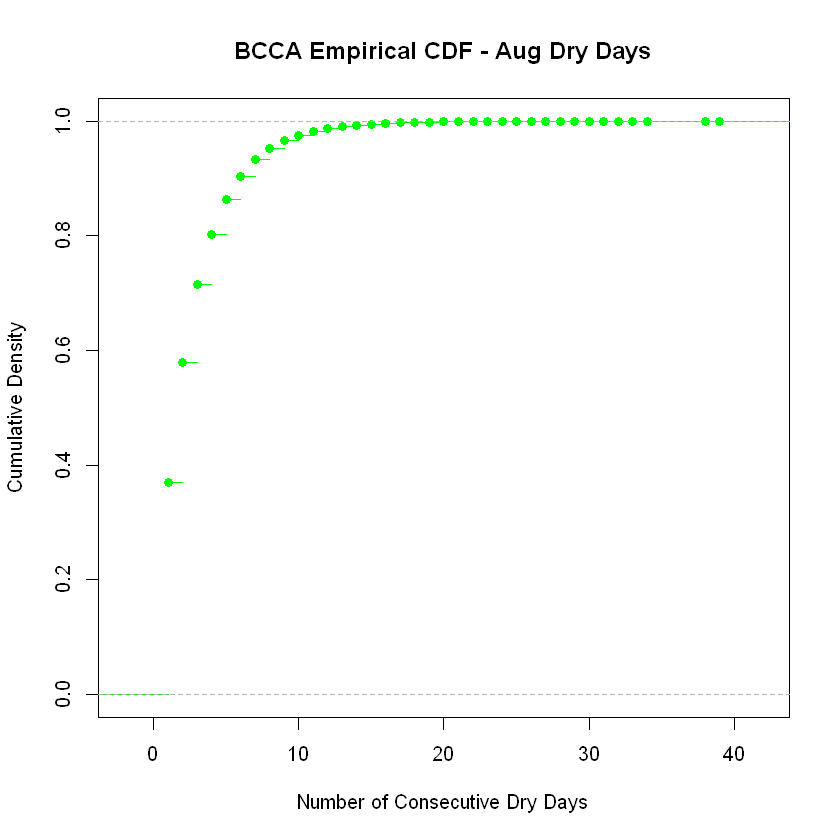

In [140]:
plot(ecdf(dBCAug$Dry_Count), main="BCCA Empirical CDF - Aug Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

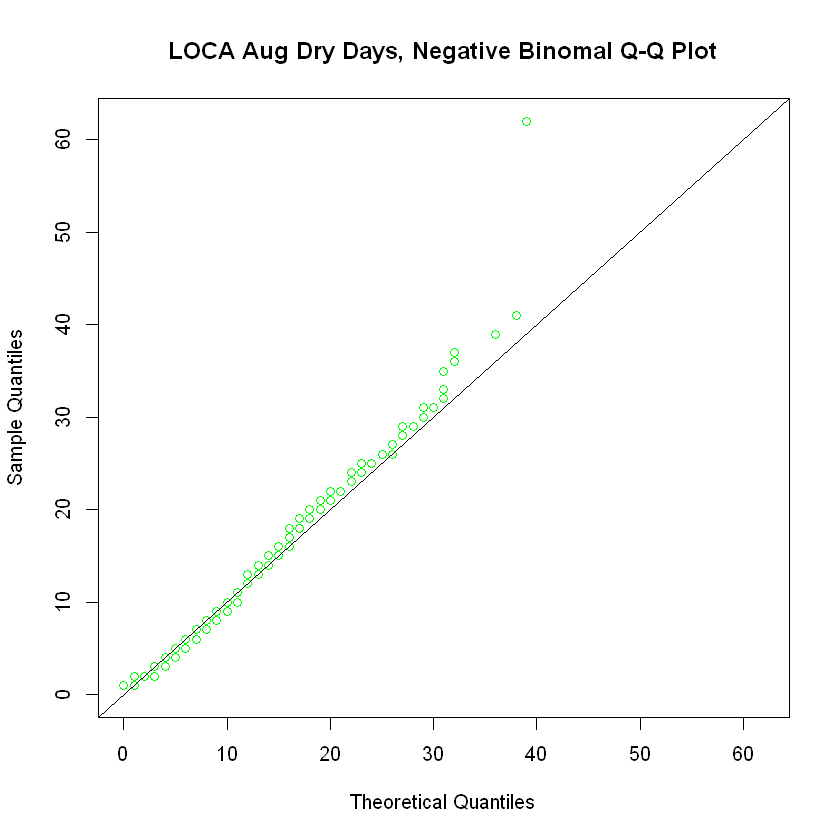

In [141]:
dLOAugMax <- max( dLOAug$Dry_Count )
dLOAugMean <- mean( dLOAug$Dry_Count )
dLOAugVar <- var( dLOAug$Dry_Count )
dLOAugBNr <- dLOAugMean^2 / (dLOAugVar - dLOAugMean)
dLOAugTstNB <- rnbinom( 1000, mu=dLOAugMean, size=dLOAugBNr )
qqplot( dLOAugTstNB, dLOAug$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Aug Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOAugMax), ylim=c(0,dLOAugMax) )
abline( 0, 1)

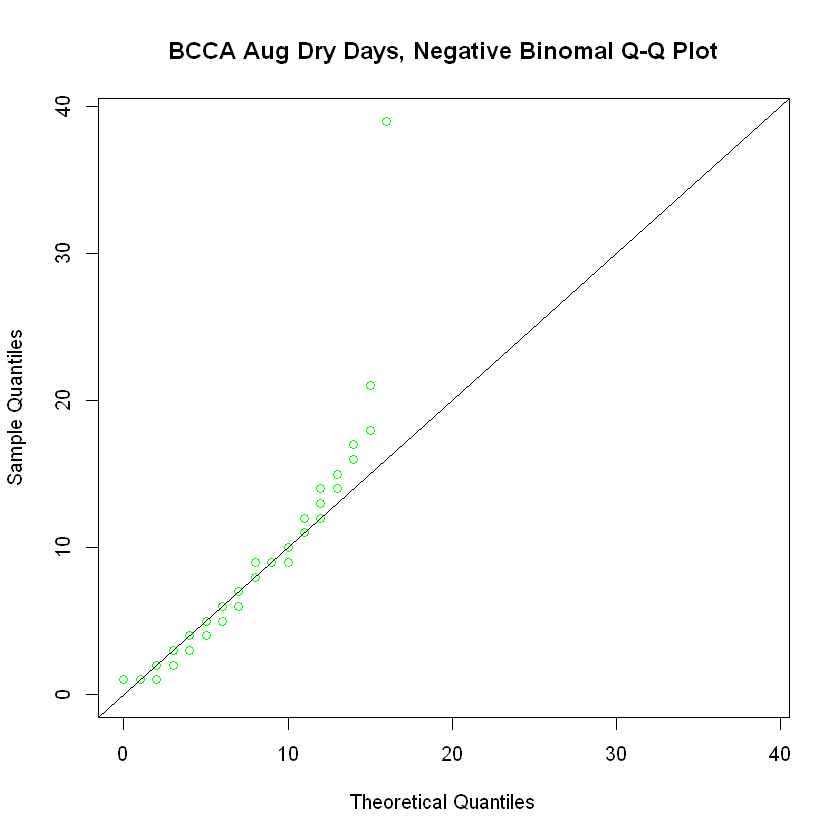

In [142]:
dBCAugMax <- max( dBCAug$Dry_Count )
dBCAugMean <- mean( dBCAug$Dry_Count )
dBCAugVar <- var( dBCAug$Dry_Count )
dBCAugBNr <- dBCAugMean^2 / (dBCAugVar - dBCAugMean)
dBCAugTstNB <- rnbinom( 1000, mu=dBCAugMean, size=dBCAugBNr )
qqplot( dBCAugTstNB, dBCAug$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Aug Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCAugMax), ylim=c(0,dBCAugMax) )
abline( 0, 1)

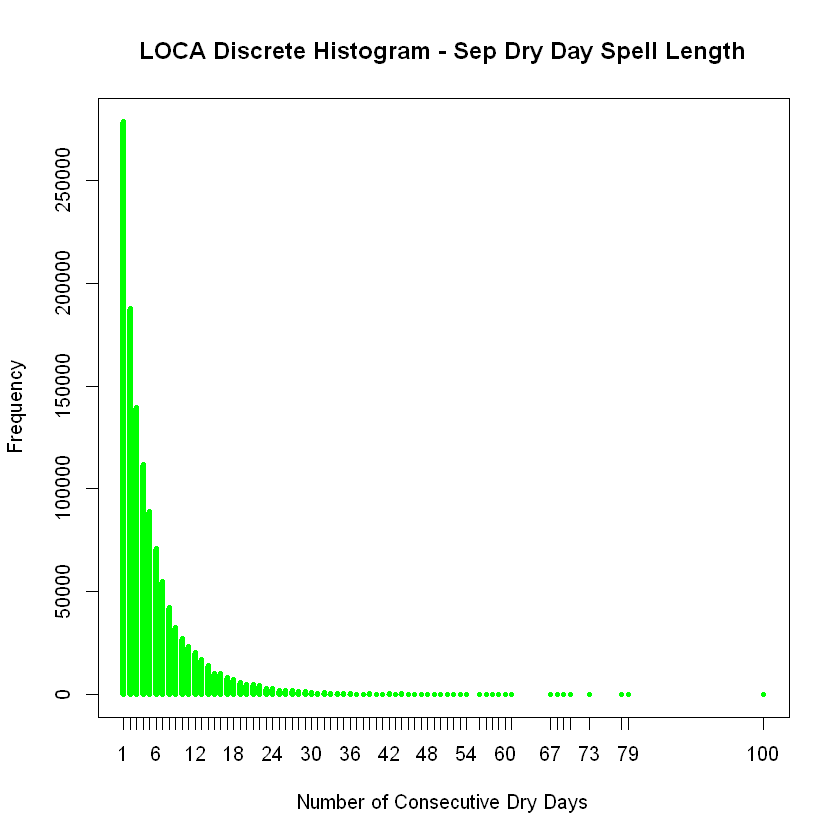

In [143]:
# our case is discrete so use this command
plot( table( dLOSep$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Sep Dry Day Spell Length", 
      col="green" )

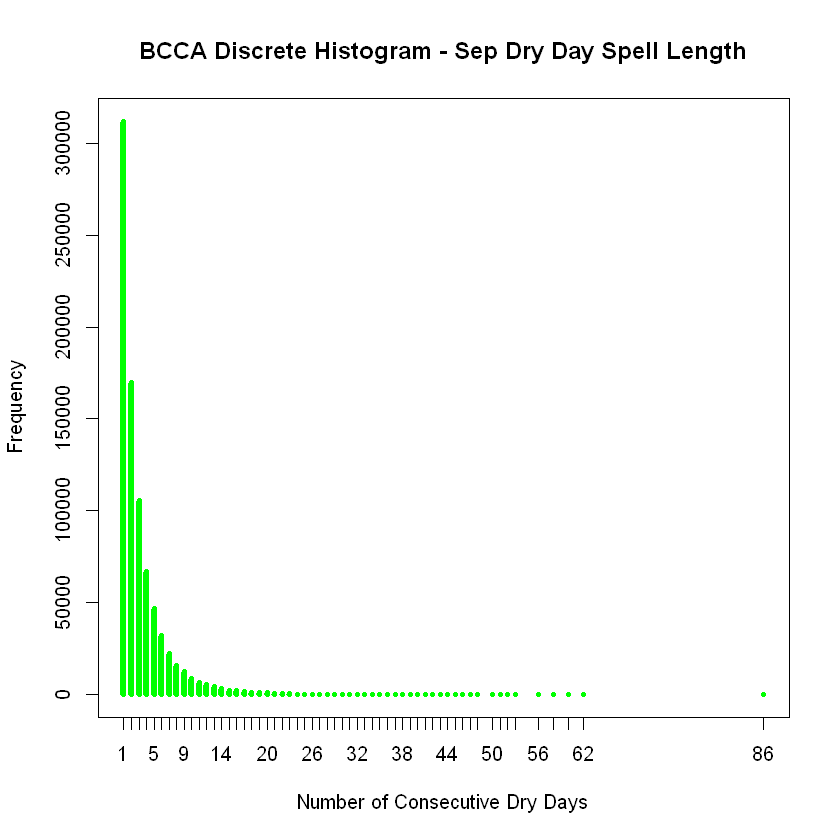

In [144]:
plot( table( dBCSep$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Sep Dry Day Spell Length", 
      col="green" )

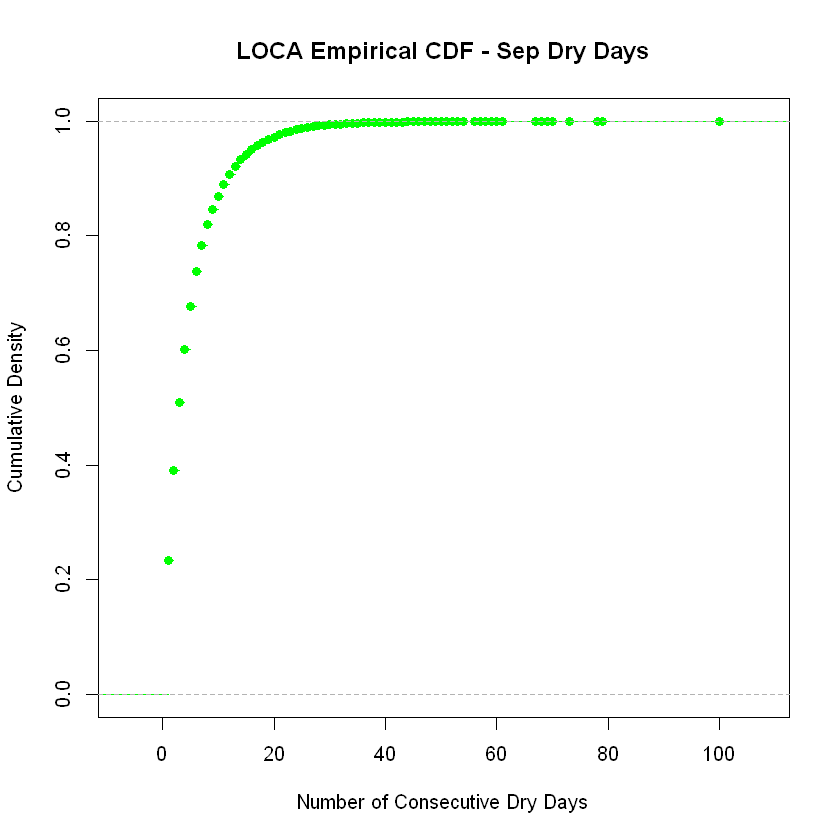

In [145]:
plot(ecdf(dLOSep$Dry_Count), main="LOCA Empirical CDF - Sep Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

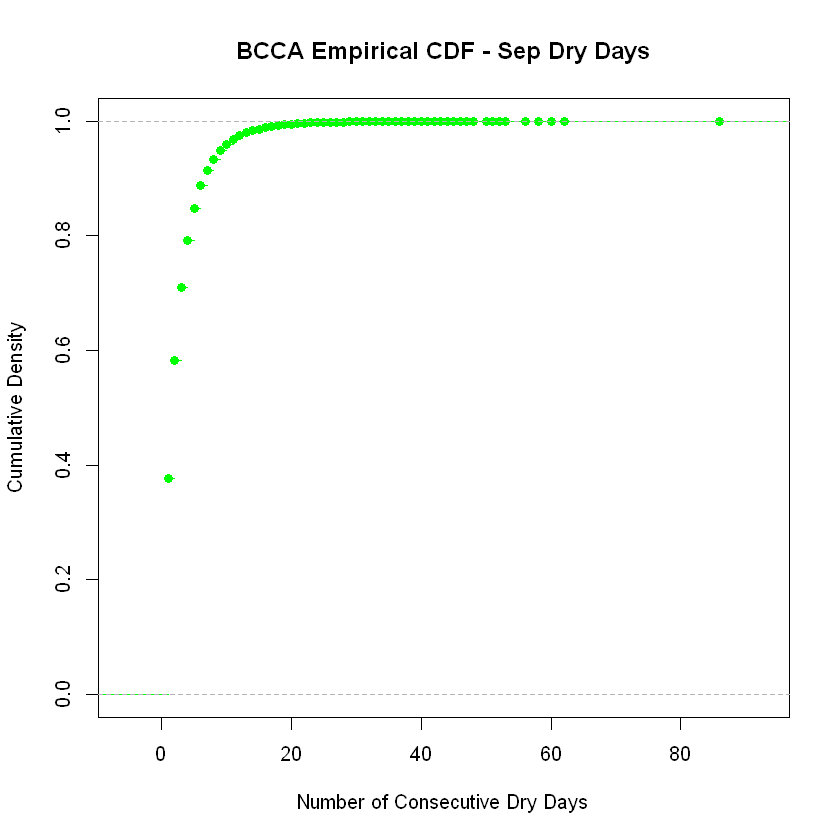

In [146]:
plot(ecdf(dBCSep$Dry_Count), main="BCCA Empirical CDF - Sep Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

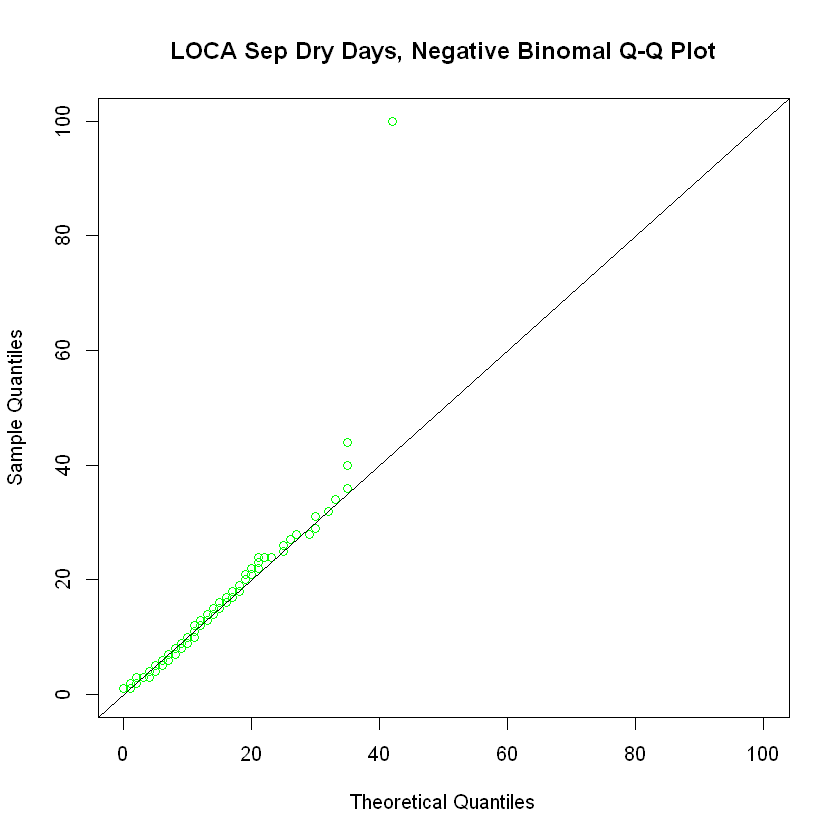

In [147]:
dLOSepMax <- max( dLOSep$Dry_Count )
dLOSepMean <- mean( dLOSep$Dry_Count )
dLOSepVar <- var( dLOSep$Dry_Count )
dLOSepBNr <- dLOSepMean^2 / (dLOSepVar - dLOSepMean)
dLOSepTstNB <- rnbinom( 1000, mu=dLOSepMean, size=dLOSepBNr )
qqplot( dLOSepTstNB, dLOSep$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Sep Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOSepMax), ylim=c(0,dLOSepMax) )
abline( 0, 1)

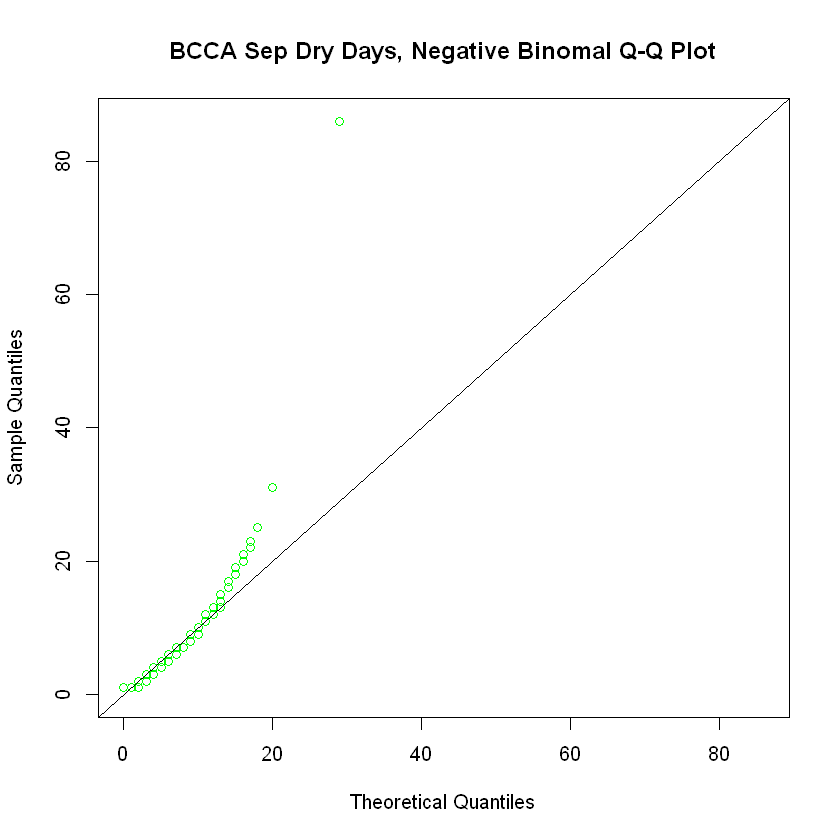

In [148]:
dBCSepMax <- max( dBCSep$Dry_Count )
dBCSepMean <- mean( dBCSep$Dry_Count )
dBCSepVar <- var( dBCSep$Dry_Count )
dBCSepBNr <- dBCSepMean^2 / (dBCSepVar - dBCSepMean)
dBCSepTstNB <- rnbinom( 1000, mu=dBCSepMean, size=dBCSepBNr )
qqplot( dBCSepTstNB, dBCSep$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Sep Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCSepMax), ylim=c(0,dBCSepMax) )
abline( 0, 1)

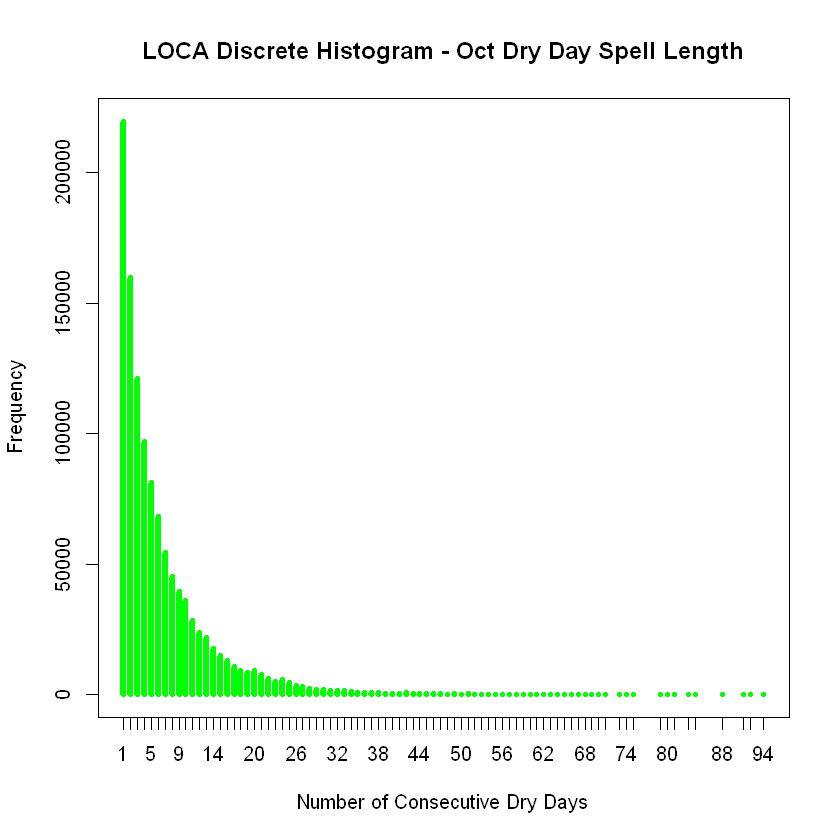

In [149]:
# our case is discrete so use this command
plot( table( dLOOct$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Oct Dry Day Spell Length", 
      col="green" )

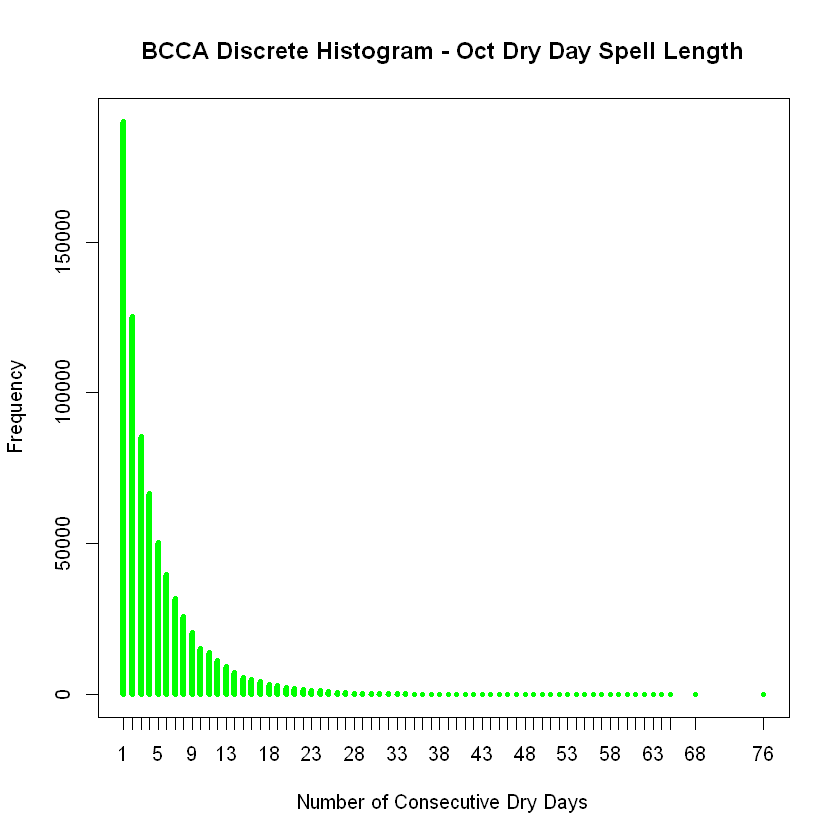

In [150]:
plot( table( dBCOct$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Oct Dry Day Spell Length", 
      col="green" )

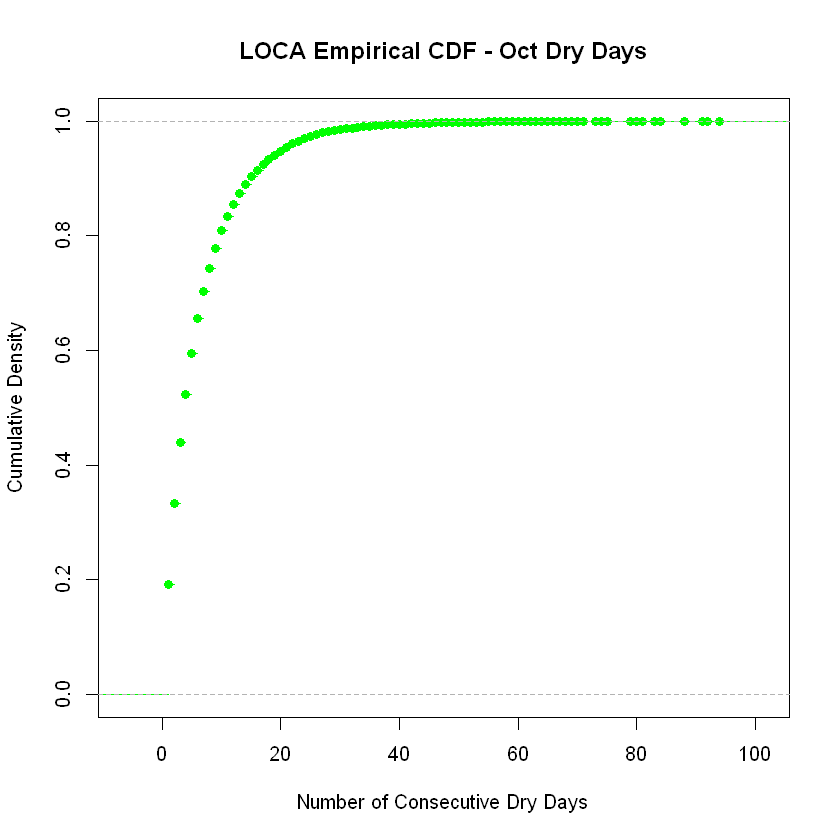

In [151]:
plot(ecdf(dLOOct$Dry_Count), main="LOCA Empirical CDF - Oct Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

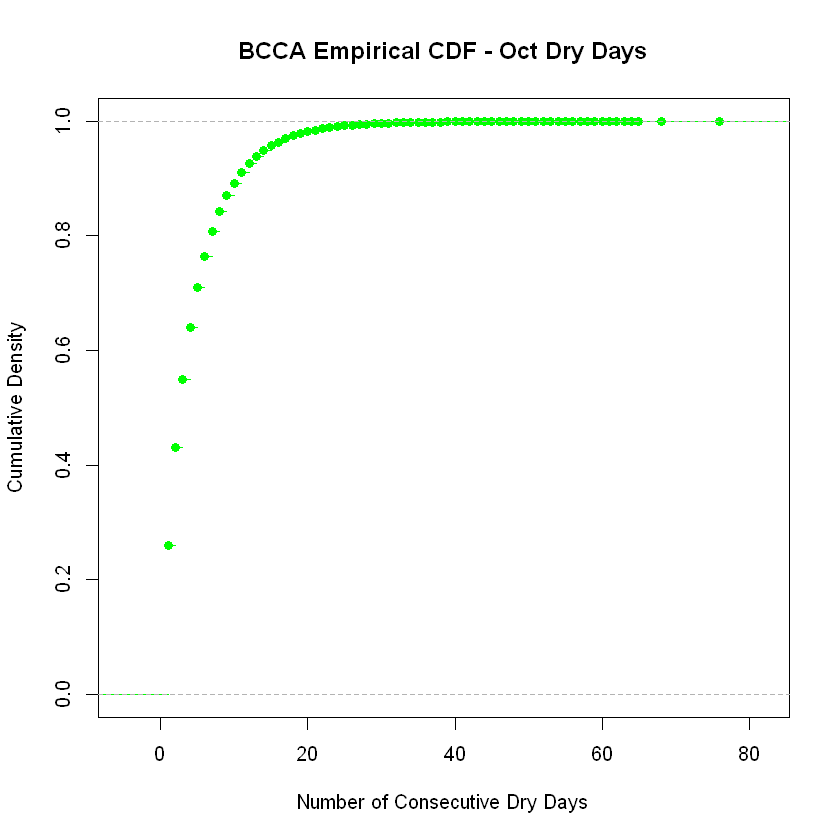

In [152]:
plot(ecdf(dBCOct$Dry_Count), main="BCCA Empirical CDF - Oct Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

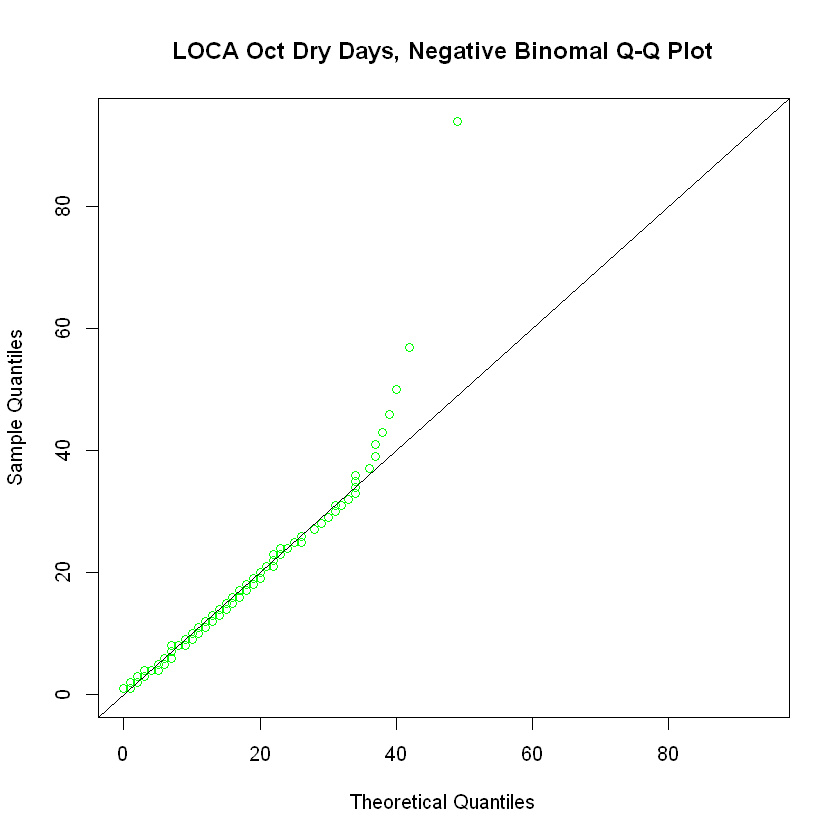

In [153]:
dLOOctMax <- max( dLOOct$Dry_Count )
dLOOctMean <- mean( dLOOct$Dry_Count )
dLOOctVar <- var( dLOOct$Dry_Count )
dLOOctBNr <- dLOOctMean^2 / (dLOOctVar - dLOOctMean)
dLOOctTstNB <- rnbinom( 1000, mu=dLOOctMean, size=dLOOctBNr )
qqplot( dLOOctTstNB, dLOOct$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Oct Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOOctMax), ylim=c(0,dLOOctMax) )
abline( 0, 1)

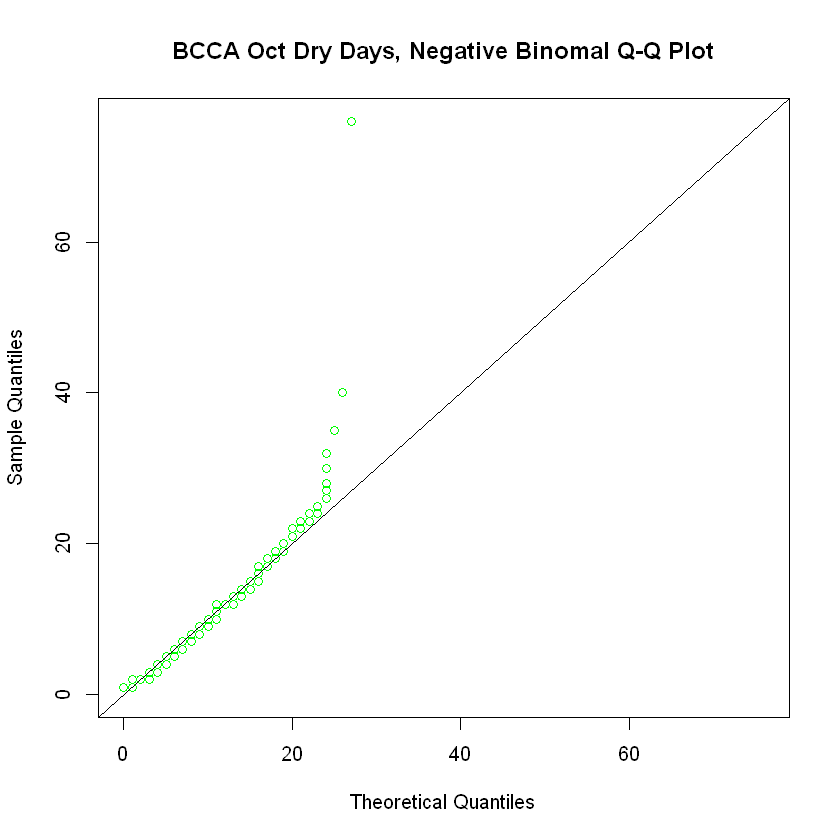

In [154]:
dBCOctMax <- max( dBCOct$Dry_Count )
dBCOctMean <- mean( dBCOct$Dry_Count )
dBCOctVar <- var( dBCOct$Dry_Count )
dBCOctBNr <- dBCOctMean^2 / (dBCOctVar - dBCOctMean)
dBCOctTstNB <- rnbinom( 1000, mu=dBCOctMean, size=dBCOctBNr )
qqplot( dBCOctTstNB, dBCOct$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Oct Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCOctMax), ylim=c(0,dBCOctMax) )
abline( 0, 1)

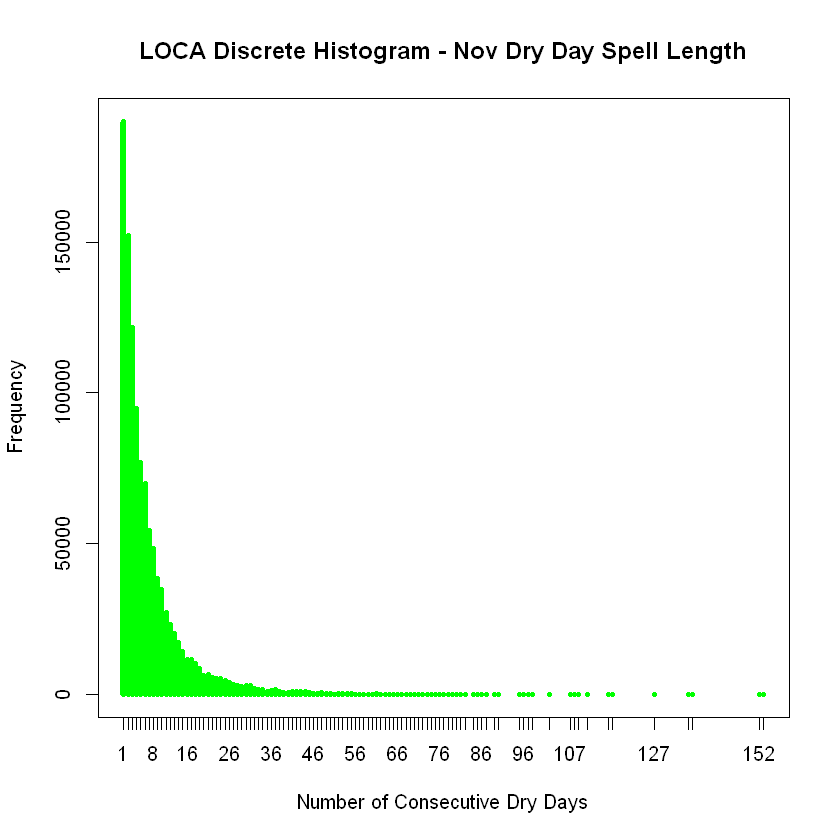

In [155]:
# our case is discrete so use this command
plot( table( dLONov$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Nov Dry Day Spell Length", 
      col="green" )

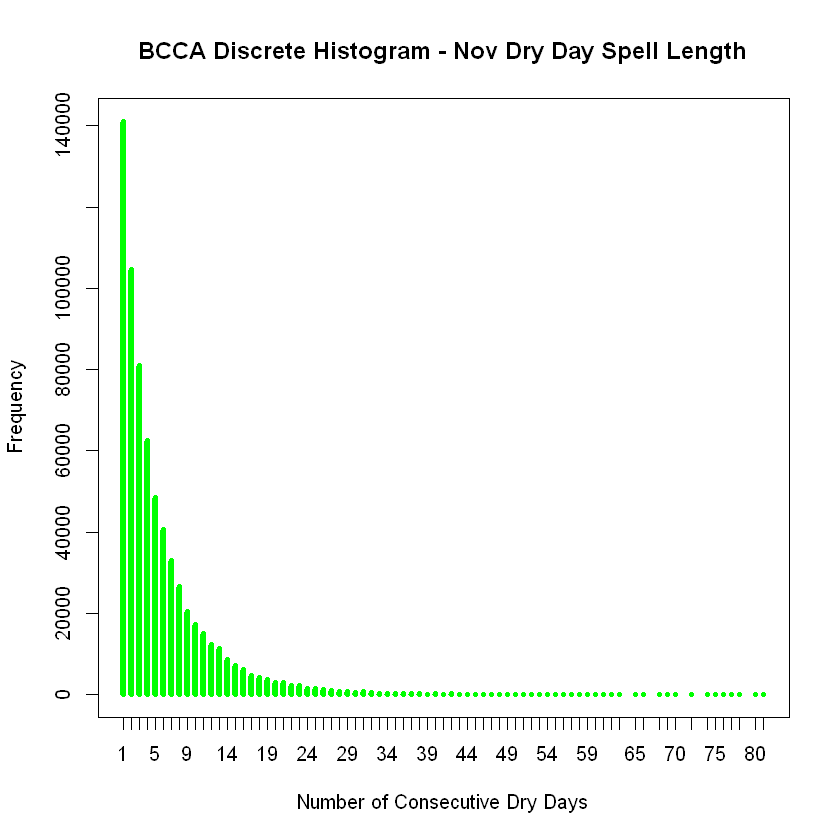

In [156]:
plot( table( dBCNov$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Nov Dry Day Spell Length", 
      col="green" )

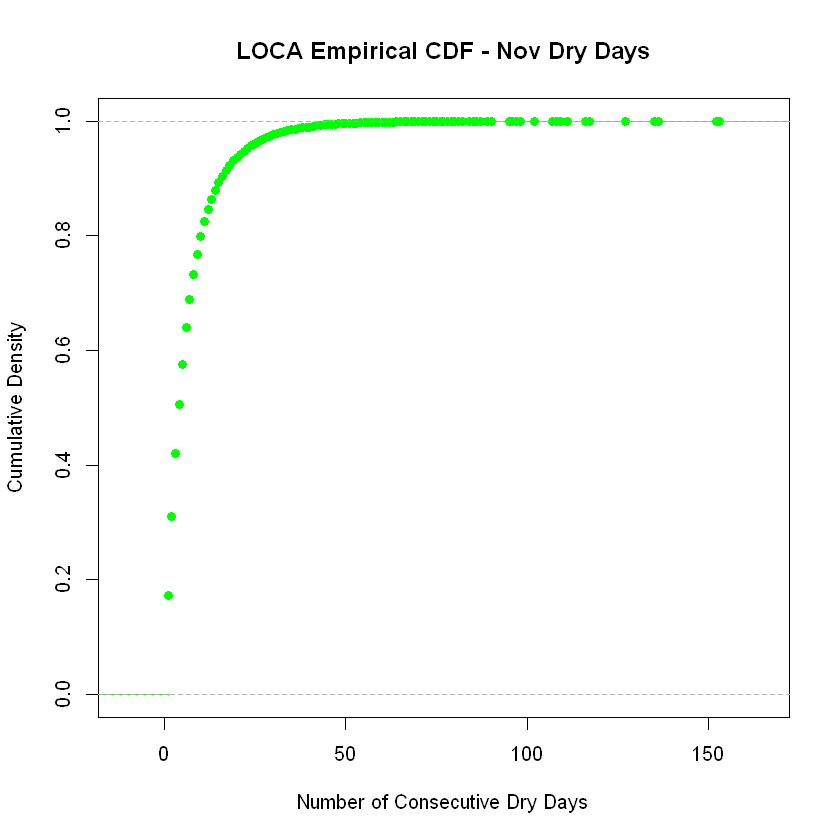

In [157]:
plot(ecdf(dLONov$Dry_Count), main="LOCA Empirical CDF - Nov Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

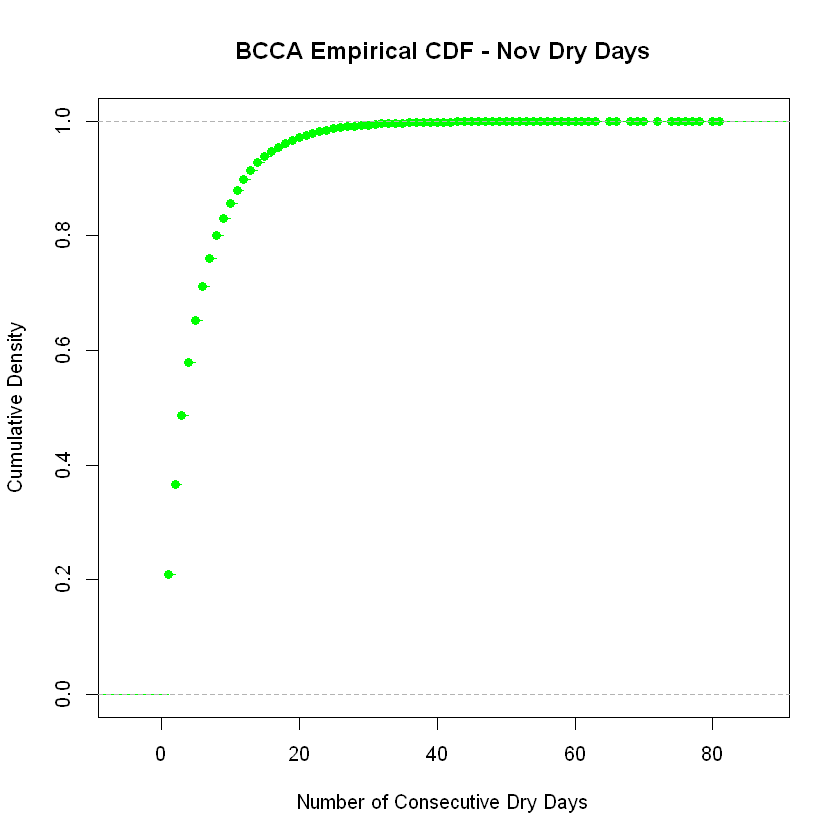

In [158]:
plot(ecdf(dBCNov$Dry_Count), main="BCCA Empirical CDF - Nov Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

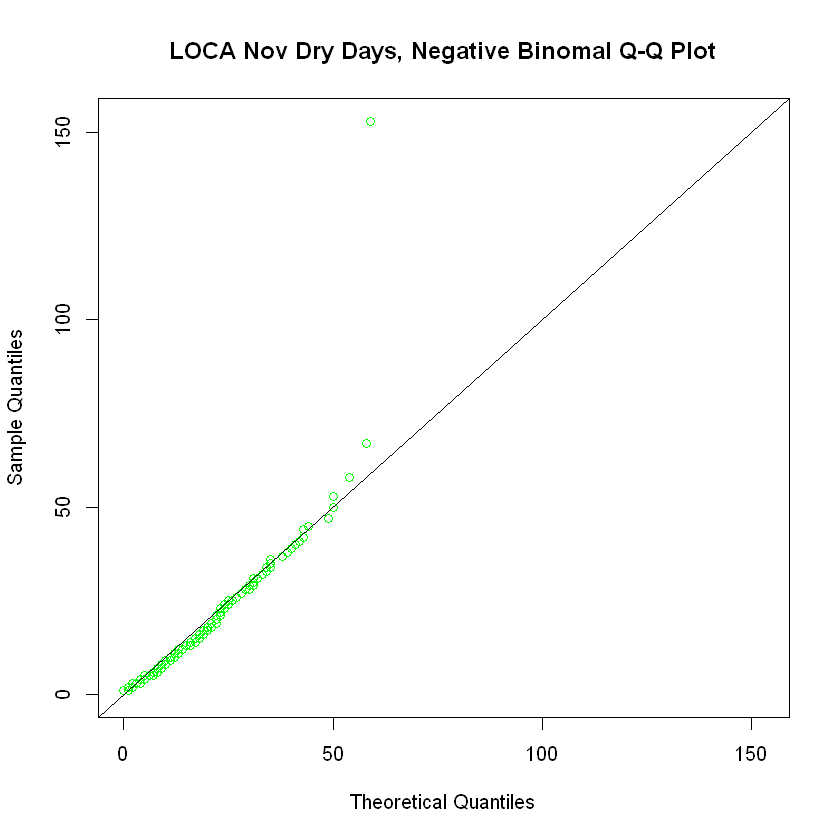

In [159]:
dLONovMax <- max( dLONov$Dry_Count )
dLONovMean <- mean( dLONov$Dry_Count )
dLONovVar <- var( dLONov$Dry_Count )
dLONovBNr <- dLONovMean^2 / (dLONovVar - dLONovMean)
dLONovTstNB <- rnbinom( 1000, mu=dLONovMean, size=dLONovBNr )
qqplot( dLONovTstNB, dLONov$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Nov Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLONovMax), ylim=c(0,dLONovMax) )
abline( 0, 1)

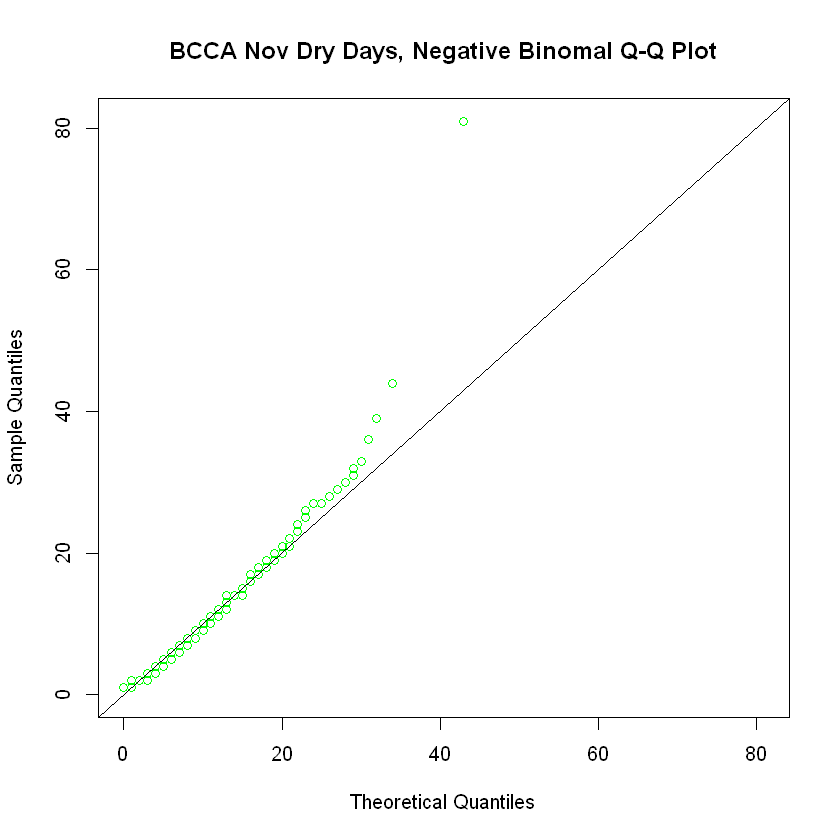

In [160]:
dBCNovMax <- max( dBCNov$Dry_Count )
dBCNovMean <- mean( dBCNov$Dry_Count )
dBCNovVar <- var( dBCNov$Dry_Count )
dBCNovBNr <- dBCNovMean^2 / (dBCNovVar - dBCNovMean)
dBCNovTstNB <- rnbinom( 1000, mu=dBCNovMean, size=dBCNovBNr )
qqplot( dBCNovTstNB, dBCNov$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Nov Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCNovMax), ylim=c(0,dBCNovMax) )
abline( 0, 1)

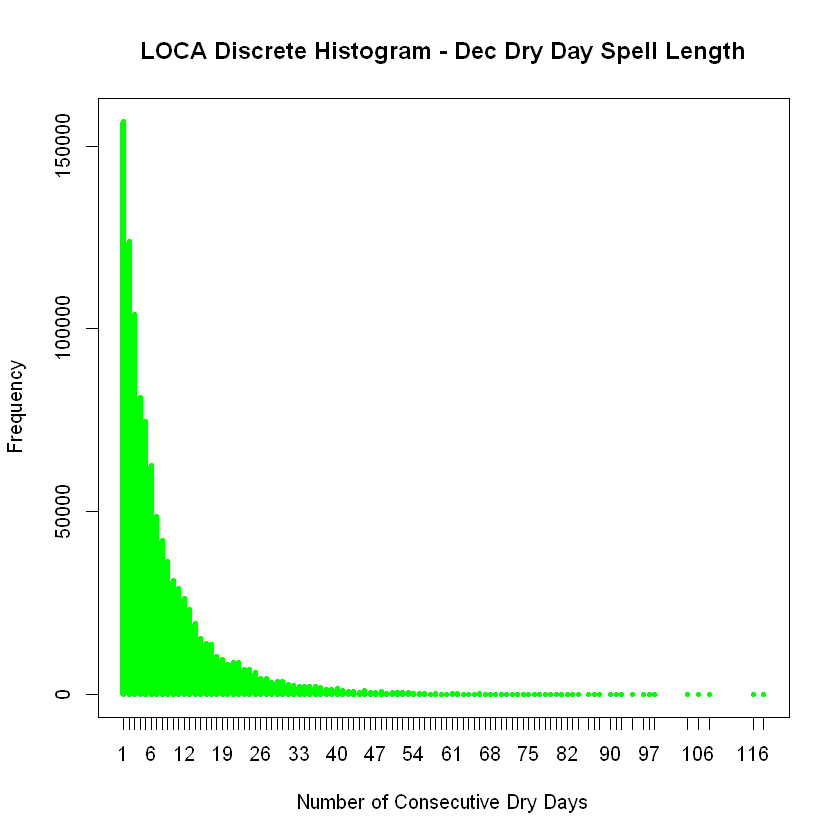

In [161]:
# our case is discrete so use this command
plot( table( dLODec$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Dec Dry Day Spell Length", 
      col="green" )

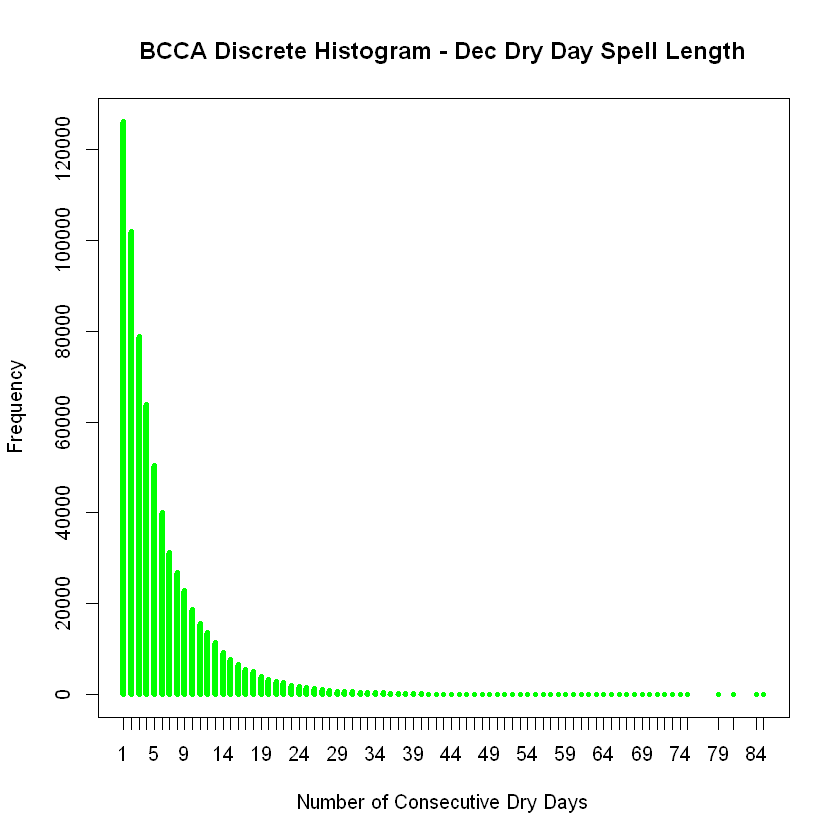

In [162]:
plot( table( dBCDec$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Dec Dry Day Spell Length", 
      col="green" )

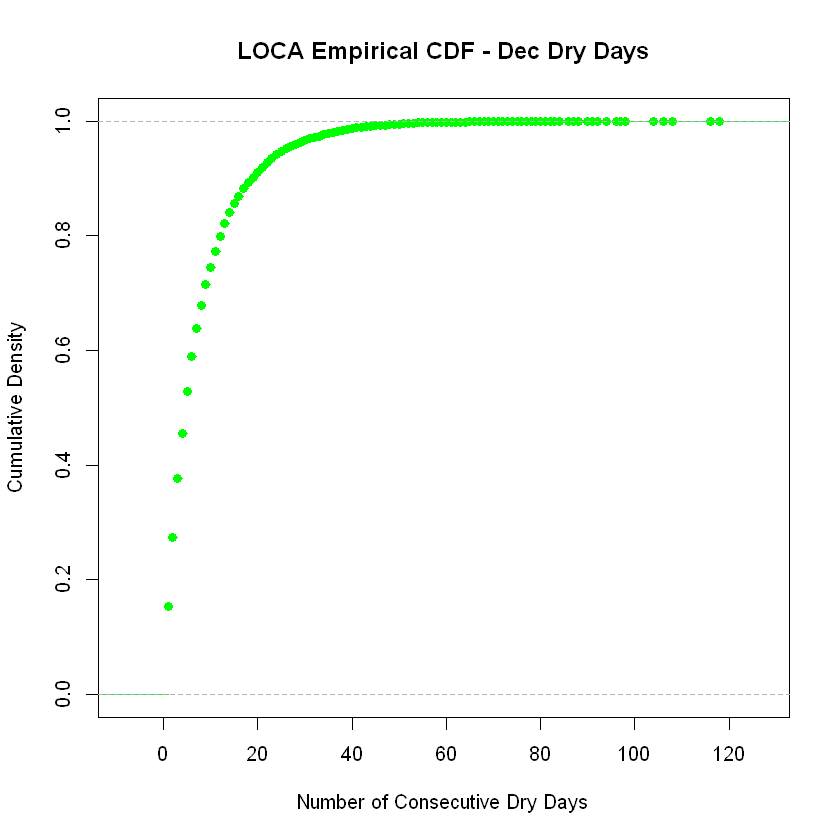

In [163]:
plot(ecdf(dLODec$Dry_Count), main="LOCA Empirical CDF - Dec Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

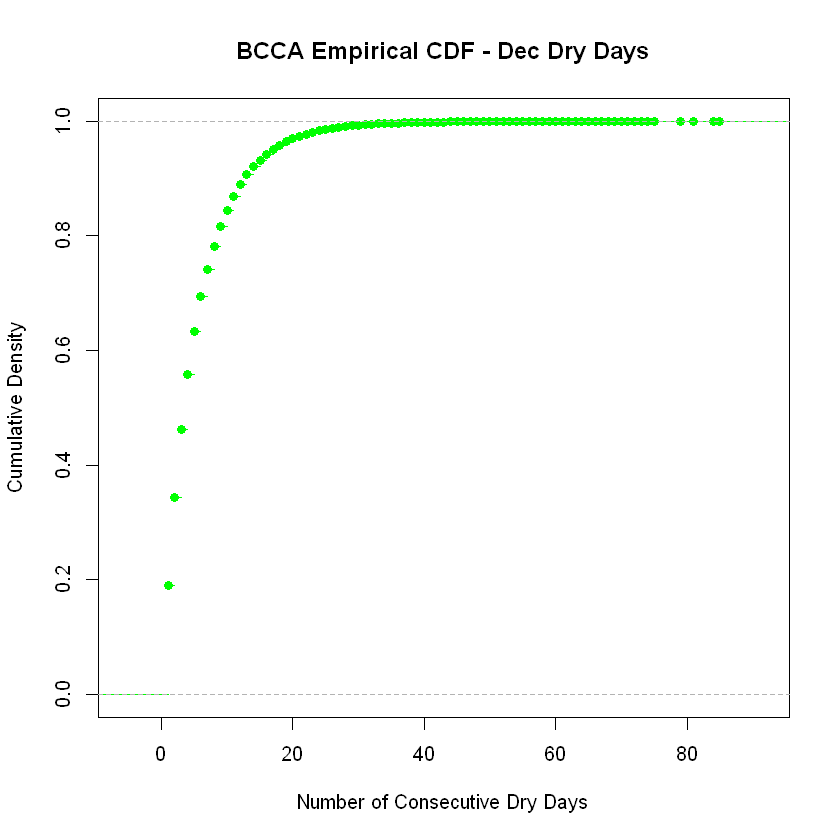

In [164]:
plot(ecdf(dBCDec$Dry_Count), main="BCCA Empirical CDF - Dec Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

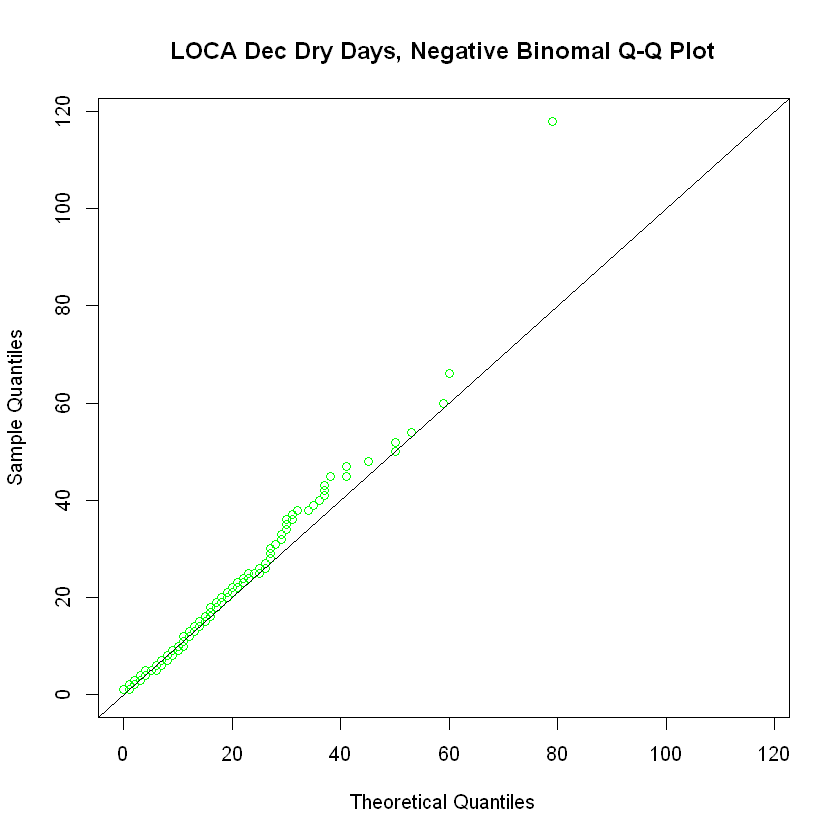

In [165]:
dLODecMax <- max( dLODec$Dry_Count )
dLODecMean <- mean( dLODec$Dry_Count )
dLODecVar <- var( dLODec$Dry_Count )
dLODecBNr <- dLODecMean^2 / (dLODecVar - dLODecMean)
dLODecTstNB <- rnbinom( 1000, mu=dLODecMean, size=dLODecBNr )
qqplot( dLODecTstNB, dLODec$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Dec Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLODecMax), ylim=c(0,dLODecMax) )
abline( 0, 1)

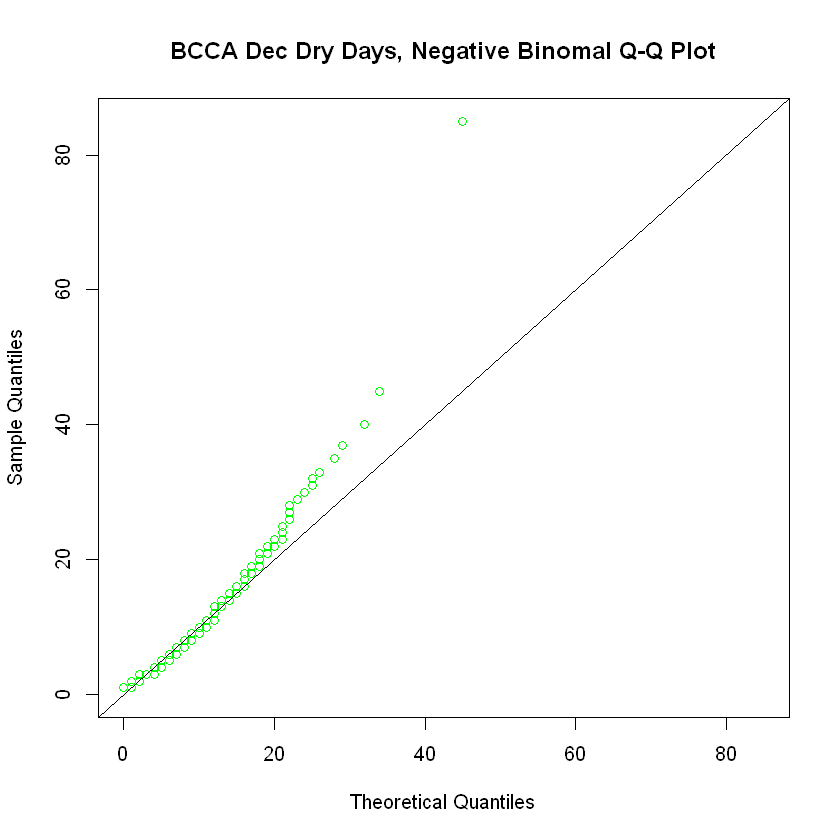

In [166]:
dBCDecMax <- max( dBCDec$Dry_Count )
dBCDecMean <- mean( dBCDec$Dry_Count )
dBCDecVar <- var( dBCDec$Dry_Count )
dBCDecBNr <- dBCDecMean^2 / (dBCDecVar - dBCDecMean)
dBCDecTstNB <- rnbinom( 1000, mu=dBCDecMean, size=dBCDecBNr )
qqplot( dBCDecTstNB, dBCDec$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Dec Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCDecMax), ylim=c(0,dBCDecMax) )
abline( 0, 1)

In [167]:
cat("LOCA Jan scale: ", dLOJanBNr, "\n", "LOCA Feb scale: ", dLOFebBNr, "\n",
    "LOCA Mar scale: ", dLOMarBNr, "\n", "LOCA Apr scale: ", dLOAprBNr, "\n",
    "LOCA May scale: ", dLOMayBNr, "\n", "LOCA Jun scale: ", dLOJunBNr, "\n",
    "LOCA Jul scale: ", dLOJulBNr, "\n", "LOCA Aug scale: ", dLOAugBNr, "\n",
    "LOCA Sep scale: ", dLOSepBNr, "\n", "LOCA Oct scale: ", dLOOctBNr, "\n",
    "LOCA Nov scale: ", dLONovBNr, "\n", "LOCA Dec scale: ", dLODecBNr, "\n" )

LOCA Jan scale:  1.091008 
 LOCA Feb scale:  1.094472 
 LOCA Mar scale:  1.256278 
 LOCA Apr scale:  1.446238 
 LOCA May scale:  1.188712 
 LOCA Jun scale:  0.6886561 
 LOCA Jul scale:  0.9081454 
 LOCA Aug scale:  1.193468 
 LOCA Sep scale:  1.068429 
 LOCA Oct scale:  0.9889798 
 LOCA Nov scale:  0.8679161 
 LOCA Dec scale:  0.9201202 


In [168]:
cat("BCCA Jan scale: ", dBCJanBNr, "\n", "BCCA Feb scale: ", dBCFebBNr, "\n",
    "BCCA Mar scale: ", dBCMarBNr, "\n", "BCCA Apr scale: ", dBCAprBNr, "\n",
    "BCCA May scale: ", dBCMayBNr, "\n", "BCCA Jun scale: ", dBCJunBNr, "\n",
    "BCCA Jul scale: ", dBCJulBNr, "\n", "BCCA Aug scale: ", dBCAugBNr, "\n",
    "BCCA Sep scale: ", dBCSepBNr, "\n", "BCCA Oct scale: ", dBCOctBNr, "\n",
    "BCCA Nov scale: ", dBCNovBNr, "\n", "BCCA Dec scale: ", dBCDecBNr, "\n" )

BCCA Jan scale:  1.273455 
 BCCA Feb scale:  1.420688 
 BCCA Mar scale:  1.455288 
 BCCA Apr scale:  1.872837 
 BCCA May scale:  2.187599 
 BCCA Jun scale:  1.541124 
 BCCA Jul scale:  1.638725 
 BCCA Aug scale:  2.089023 
 BCCA Sep scale:  1.242051 
 BCCA Oct scale:  1.129678 
 BCCA Nov scale:  1.143061 
 BCCA Dec scale:  1.187922 


### Fitting Negative Binomial Distributions

Use the **fitdistrplus** package for distribution fitting. This also provides the *plotdist* function which provides a pair of plots: 

1. empirical density, or a histogram
2. empirical cumulative distribution

These plots were provided above from scratch. **fitdistrplus** also provides a *descdist* function that provides classical descriptive statistics for the sample.

Distributions are then fit using a Maximum Likelihood Estimation (MLE) estimator in the *fitdist* function. Then goodness-of-fit statistics are calculated using the *gofstat* function.

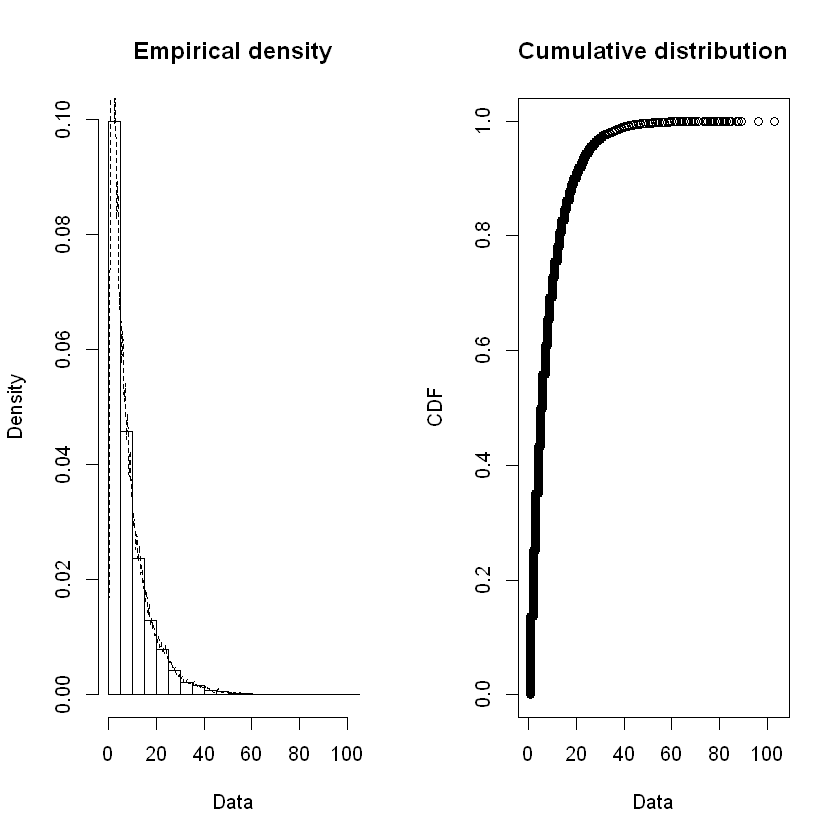

In [169]:
plotdist( dLOJan$Dry_Count, histo=TRUE, demp=TRUE )

In [170]:
LOfd_NB_dJan <- fitdist( dLOJan$Dry_Count, "nbinom" )
LOfd_GE_dJan <- fitdist( dLOJan$Dry_Count, "geom" )

In [171]:
summary( LOfd_NB_dJan )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 1.415209 0.002289815
mu   8.381821 0.007836516
Loglikelihood:  -2986221   AIC:  5972446   BIC:  5972470 
Correlation matrix:
              size            mu
size  1.0000000000 -0.0002832632
mu   -0.0002832632  1.0000000000


In [172]:
LOfdNB_dJan_size <- LOfd_NB_dJan$estimate[["size"]]
LOfdNB_dJan_mu <- LOfd_NB_dJan$estimate[["mu"]]
cat("LOCA Jan size: ", LOfdNB_dJan_size, "\n", "LOCA Jan mu: ", LOfdNB_dJan_mu, "\n")

LOCA Jan size:  1.415209 
 LOCA Jan mu:  8.381821 


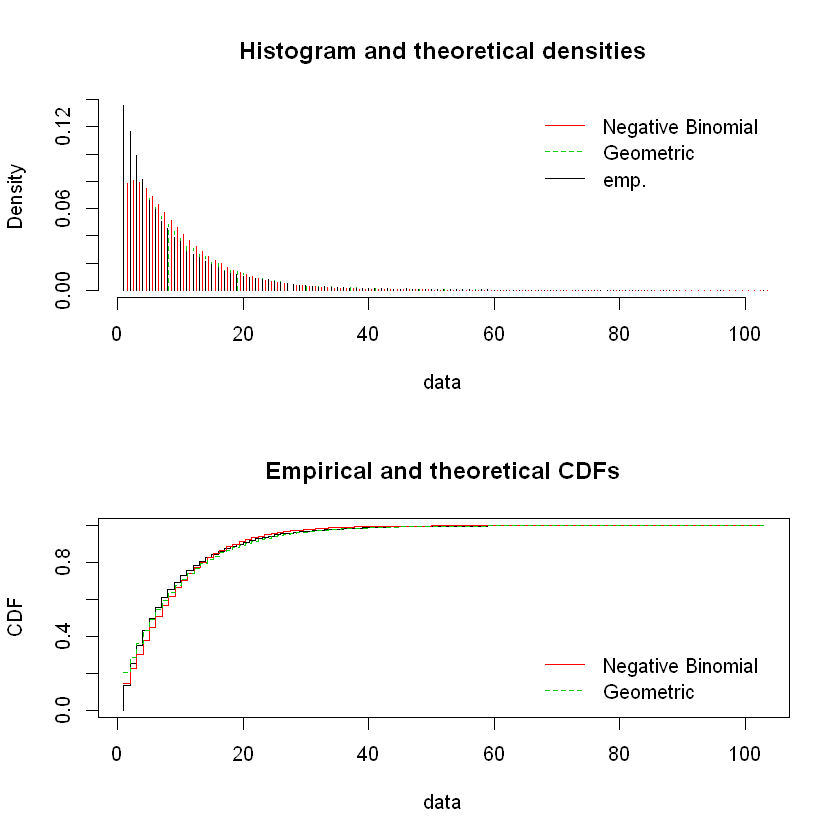

In [173]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dJan, LOfd_GE_dJan), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dJan, LOfd_GE_dJan), legendtext=plot.legend )

In [174]:
LOstatRes <- gofstat( list(LOfd_NB_dJan, LOfd_GE_dJan), fitnames=c("Negative Binomial", "Geometric") )

In [175]:
print(LOstatRes)

Chi-squared statistic:  42640.23 43783.91 
Degree of freedom of the Chi-squared distribution:  36 37 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     128113            135176.9448     190786.761
<= 2     110369             76487.5200      80425.231
<= 3      93457             74495.5830      71851.312
<= 4      77117             70350.2625      64191.436
<= 5      62144             65186.0810      57348.159
<= 6      56254             59629.1156      51234.425
<= 7      47872             54041.5336      45772.460
<= 8      42572             48634.7321      40892.781
<= 9      36368             43528.9237      36533.311
<= 10     33606             38787.3282      32638.592
<= 11     26777             34436.9751      29159.079
<= 12     24566             30481.8791      26050.508
<= 13     22764             26911.6160      23273.333
<= 14     20068             23707.0021      20792.225
<= 15     17821             20843.8889    

In [176]:
LOfdNB_dJan_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

[Chi-Squared Test](https://www.r-bloggers.com/chi-squared-test/)

Like all statistical tests, chi-squared test assumes a null hypothesis and an alternate hypothesis. The general practice is, if the p-value that comes out in the result is less than a pre-determined significance level, which is 0.05 usually, then we reject the null hypothesis.

- H0: The The two variables are independent
- H1: The two variables are related.

The null hypothesis of the chi-squared test is that the two variables are independent and the alternate hypothesis is that they are related.

In this case our p-value is 0.0 and we can reject the null hypothesis that sample and MLE-fit distribution are not related.

In [177]:
LOfdNB_dJan_p = LOfdNB_dJan_size / (LOfdNB_dJan_size + LOfdNB_dJan_mu)
cat("LOCA prob: ", LOfdNB_dJan_p)

LOCA prob:  0.1444528

In [178]:
# add to our tracking dataframe
LOMonDistDF[1, ] <- list( 1, dLOJanMean, dLOJanBNr, LOfdNB_dJan_p, LOfdNB_dJan_mu, LOfdNB_dJan_size,
                          LOfdNB_dJan_pvalue )

In [179]:
LOgf_dJan <- goodfit( dLOJan$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dJan_size, prob=LOfdNB_dJan_p) )

In [180]:
summary( LOgf_dJan )


	 Goodness-of-fit test for nbinomial distribution

                      X^2  df P(> X^2)
Pearson          147905.7 103        0
Likelihood Ratio 193381.2  88        0


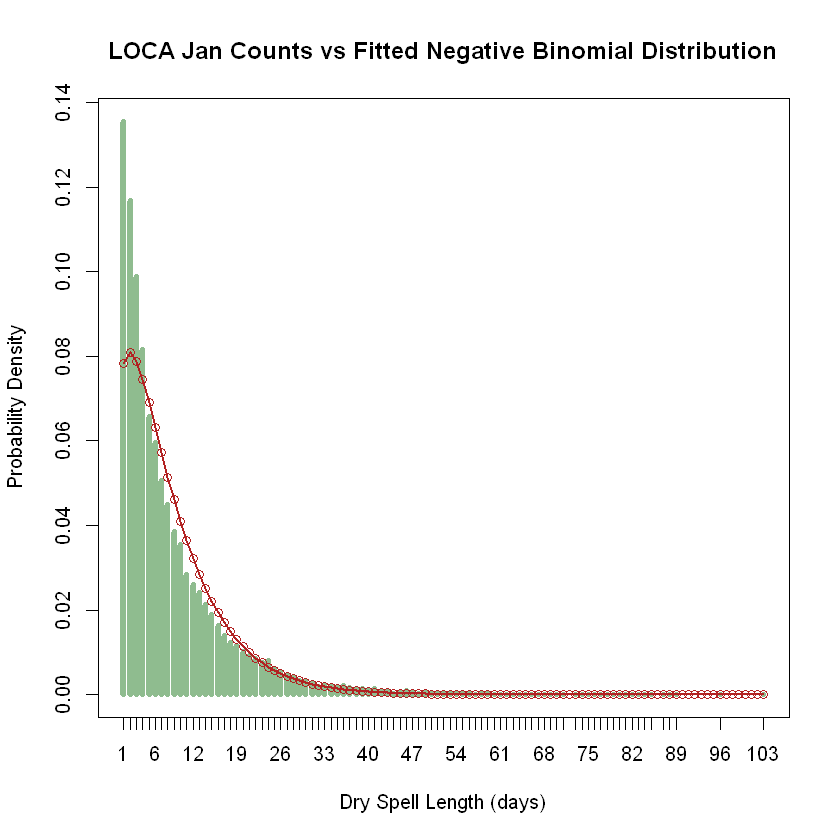

In [181]:
maxP <- max(dLOJan$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dJan_size, mu=LOfdNB_dJan_mu )
ttab <- table( dLOJan$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Jan Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

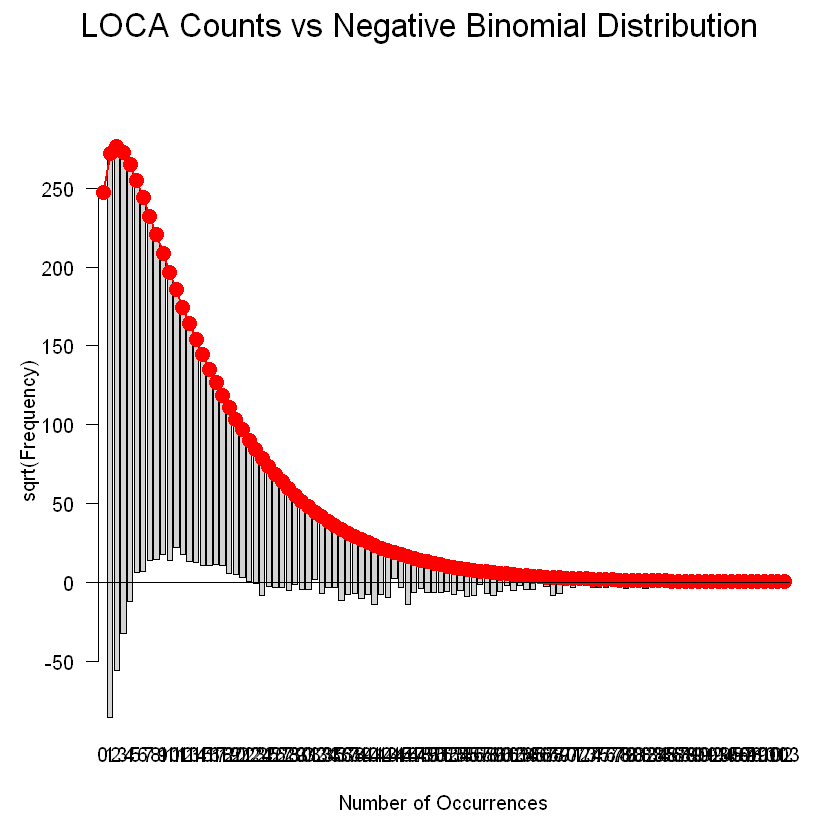

In [182]:
plot( LOgf_dJan, main="LOCA Counts vs Negative Binomial Distribution" )

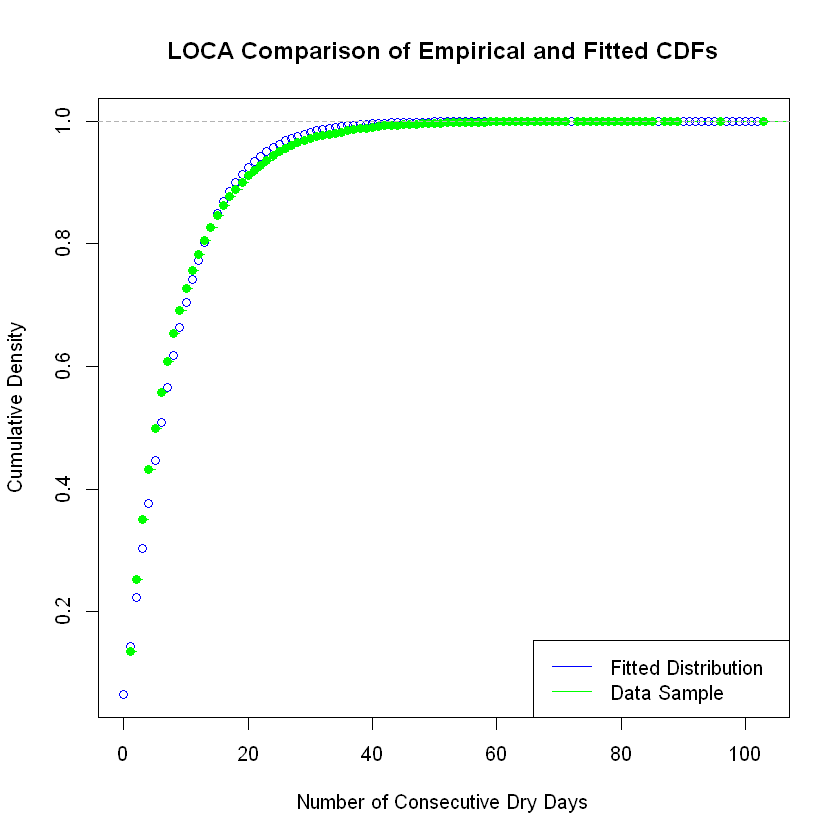

In [183]:
x <- seq(0,dLOJanMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dJan_mu, size=LOfdNB_dJan_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOJan$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

In [184]:
ks.test( dLOJan$Dry_Count, "pnbinom", mu=LOfdNB_dJan_mu, size=LOfdNB_dJan_size )


	One-sample Kolmogorov-Smirnov test

data:  dLOJan$Dry_Count
D = 0.14302, p-value < 2.2e-16
alternative hypothesis: two-sided


Generally, K-S test is better for continuous distributions.

[Kolmogorv-Smirnov Test](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/ks.test.html)

Null hypothesis that the true distribution function of x is equal to the hypothesized distribution function (one-sample case). This is a comparison of cumulative distribution functions, and the test statistic is the maximum difference in value, with the statistic in the "greater" alternative being D^+ = max[F_x(u) - F_y(u)]

Exact p-values are not available for the two-sample case if one-sided or in the presence of ties. If exact = NULL (the default), an exact p-value is computed if the sample size is less than 100 in the one-sample case and there are no ties, and if the product of the sample sizes is less than 10000 in the two-sample case. Otherwise, asymptotic distributions are used whose approximations may be inaccurate in small samples.

The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. The null distribution of this statistic is calculated under the null hypothesis that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case). In the one-sample case, the distribution considered under the null hypothesis may be continuous (see Section 2), purely discrete or mixed (see Section 2.2).

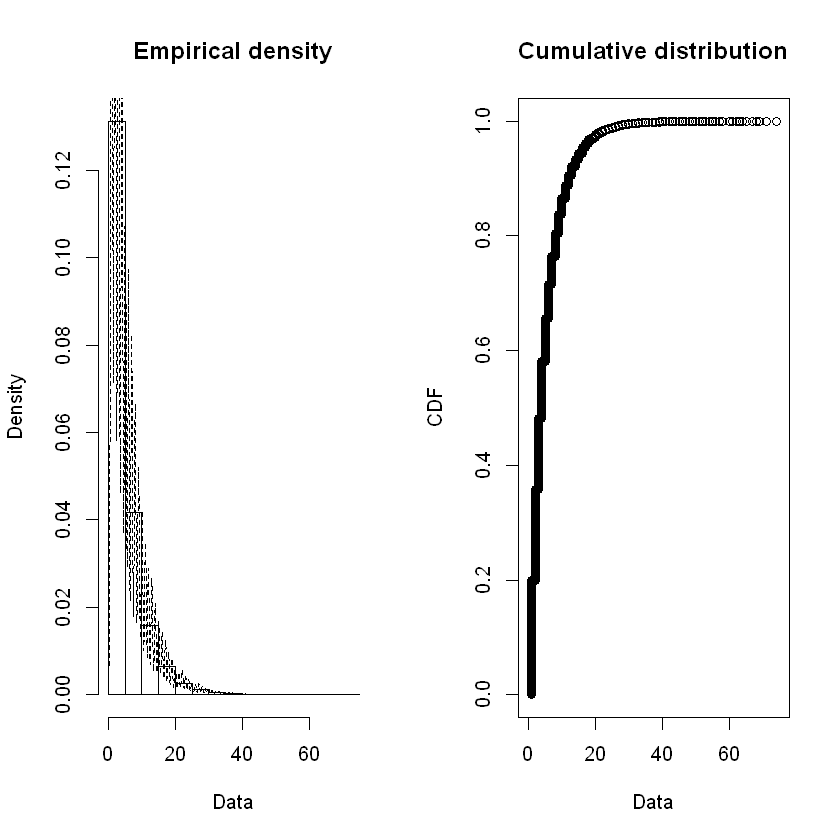

In [185]:
plotdist( dBCJan$Dry_Count, histo=TRUE, demp=TRUE )

In [186]:
BCfd_NB_dJan <- fitdist( dBCJan$Dry_Count, "nbinom" )
BCfd_GE_dJan <- fitdist( dBCJan$Dry_Count, "geom" )

In [187]:
summary( BCfd_NB_dJan )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 1.805289 0.003942575
mu   5.443366 0.005651692
Loglikelihood:  -1865357   AIC:  3730718   BIC:  3730740 
Correlation matrix:
             size           mu
size 1.000000e+00 6.378819e-05
mu   6.378819e-05 1.000000e+00


In [188]:
BCfdNB_dJan_size <- BCfd_NB_dJan$estimate[["size"]]
BCfdNB_dJan_mu <- BCfd_NB_dJan$estimate[["mu"]]
cat("BCCA Jan size: ", BCfdNB_dJan_size, "\n", "BCCA Jan mu: ", BCfdNB_dJan_mu, "\n")

BCCA Jan size:  1.805289 
 BCCA Jan mu:  5.443366 


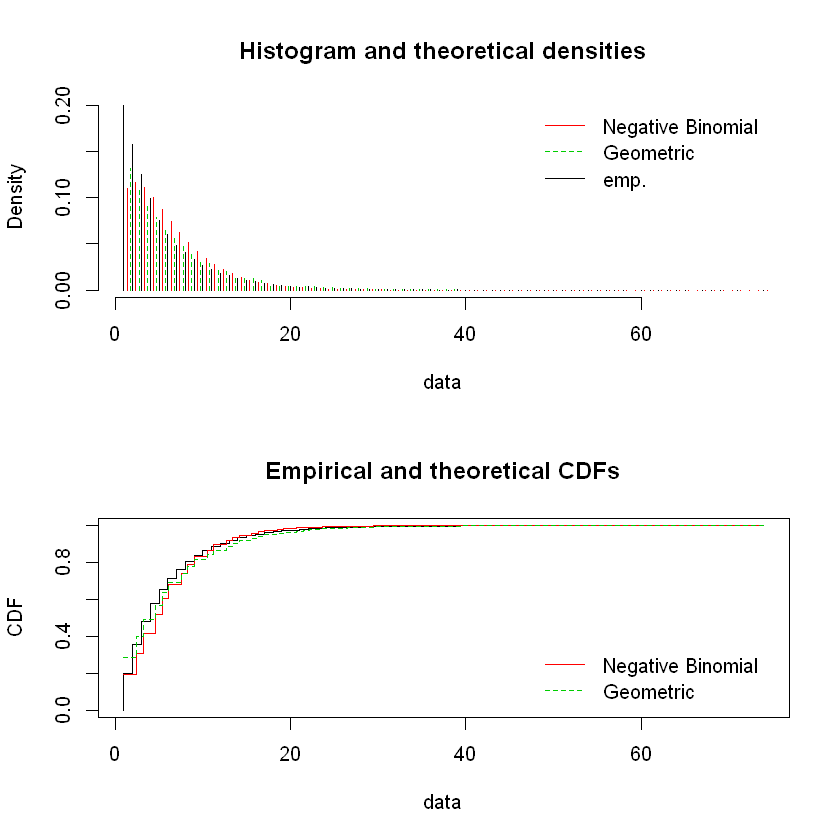

In [189]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dJan, BCfd_GE_dJan), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dJan, BCfd_GE_dJan), legendtext=plot.legend )

In [190]:
BCstatRes <- gofstat( list(BCfd_NB_dJan, BCfd_GE_dJan), fitnames=c("Negative Binomial", "Geometric") )

In [191]:
print(BCstatRes)

Chi-squared statistic:  42785.49 45660.19 
Degree of freedom of the Chi-squared distribution:  25 26 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     136375           131049.25437     195890.776
<= 2     107935            79438.84985      75784.080
<= 3      85304            75667.50708      64022.915
<= 4      67689            68262.00590      54087.001
<= 5      51724            59517.26874      45693.072
<= 6      40904            50693.05072      38601.823
<= 7      32744            42447.24344      32611.086
<= 8      28166            35084.33417      27550.071
<= 9      22737            28703.92257      23274.490
<= 10     18382            23290.97990      19662.450
<= 11     15342            18770.75858      16610.974
<= 12     12477            15041.80968      14033.065
<= 13     10859            11995.33462      11855.231
<= 14      8493             9526.01696      10015.381
<= 15      7181             7537.59263    

In [192]:
BCfdNB_dJan_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [193]:
BCfdNB_dJan_p = BCfdNB_dJan_size / (BCfdNB_dJan_size + BCfdNB_dJan_mu)
cat("BCCA prob: ", BCfdNB_dJan_p)

BCCA prob:  0.2490515

In [194]:
# add to our tracking dataframe
BCMonDistDF[1, ] <- list( 1, dBCJanMean, dBCJanBNr, BCfdNB_dJan_p, BCfdNB_dJan_mu, BCfdNB_dJan_size,
                          BCfdNB_dJan_pvalue )

In [195]:
BCgf_dJan <- goodfit( dBCJan$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dJan_size, prob=BCfdNB_dJan_p) )

In [196]:
summary( BCgf_dJan )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          191646.9 74        0
Likelihood Ratio 183668.4 68        0


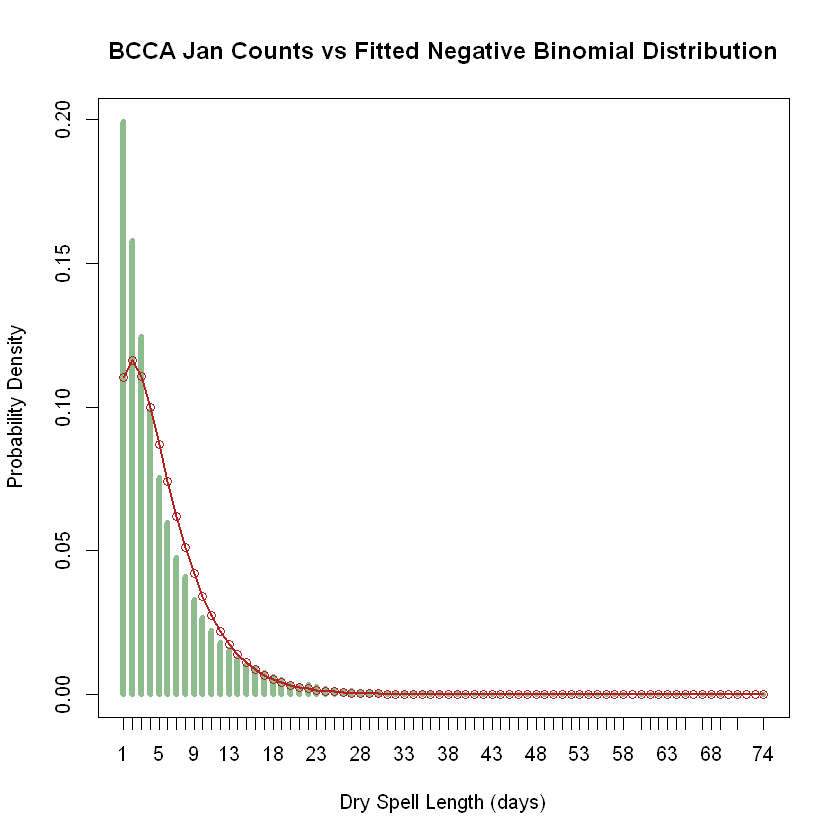

In [197]:
maxP <- max(dBCJan$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dJan_size, mu=BCfdNB_dJan_mu )
ttab <- table( dBCJan$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Jan Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

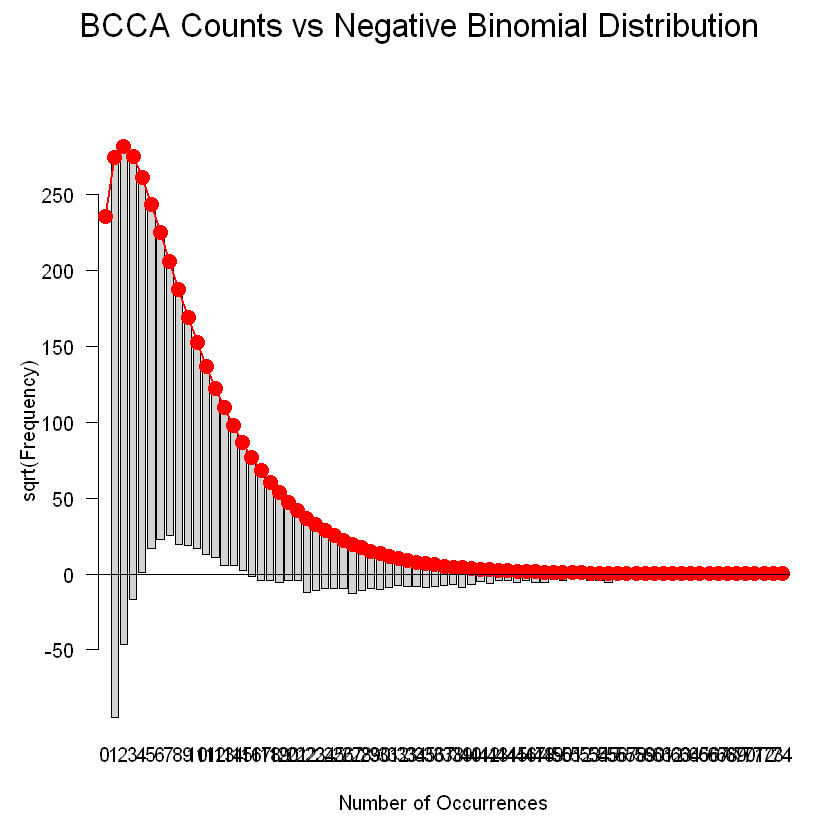

In [198]:
plot( BCgf_dJan, main="BCCA Counts vs Negative Binomial Distribution" )

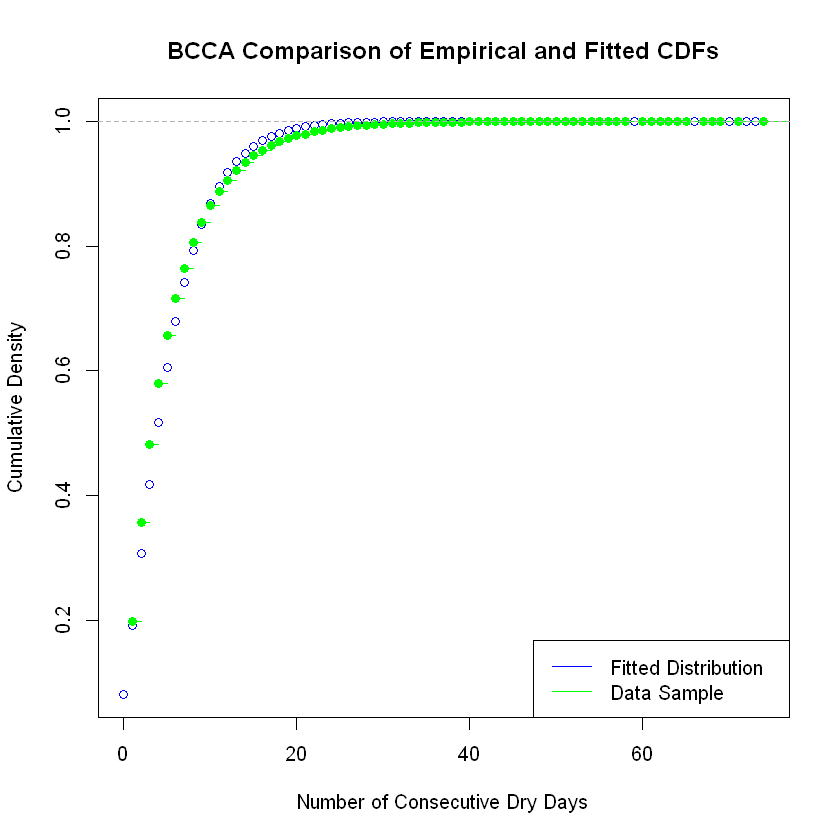

In [199]:
x <- seq(0,dBCJanMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dJan_mu, size=BCfdNB_dJan_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCJan$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

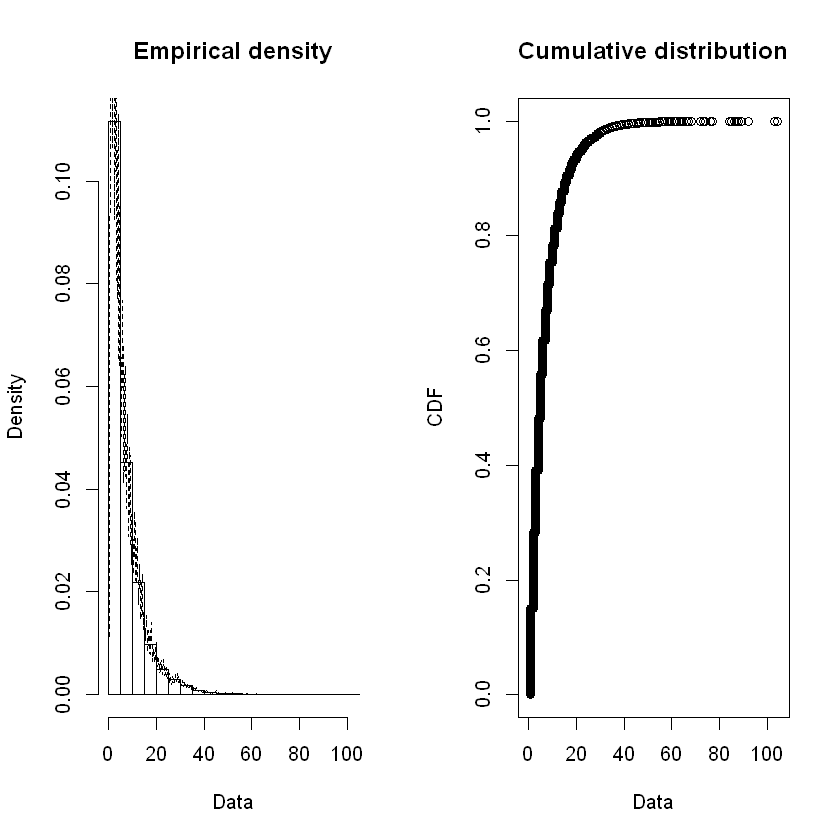

In [200]:
plotdist( dLOFeb$Dry_Count, histo=TRUE, demp=TRUE )

In [201]:
LOfd_NB_dFeb <- fitdist( dLOFeb$Dry_Count, "nbinom" )
LOfd_GE_dFeb <- fitdist( dLOFeb$Dry_Count, "geom" )

In [202]:
LOfdNB_dFeb_size <- LOfd_NB_dFeb$estimate[["size"]]
LOfdNB_dFeb_mu <- LOfd_NB_dFeb$estimate[["mu"]]
cat("LOCA Feb size: ", LOfdNB_dFeb_size, "\n", "LOCA Feb mu: ", LOfdNB_dFeb_mu, "\n")

LOCA Feb size:  1.529458 
 LOCA Feb mu:  7.162326 


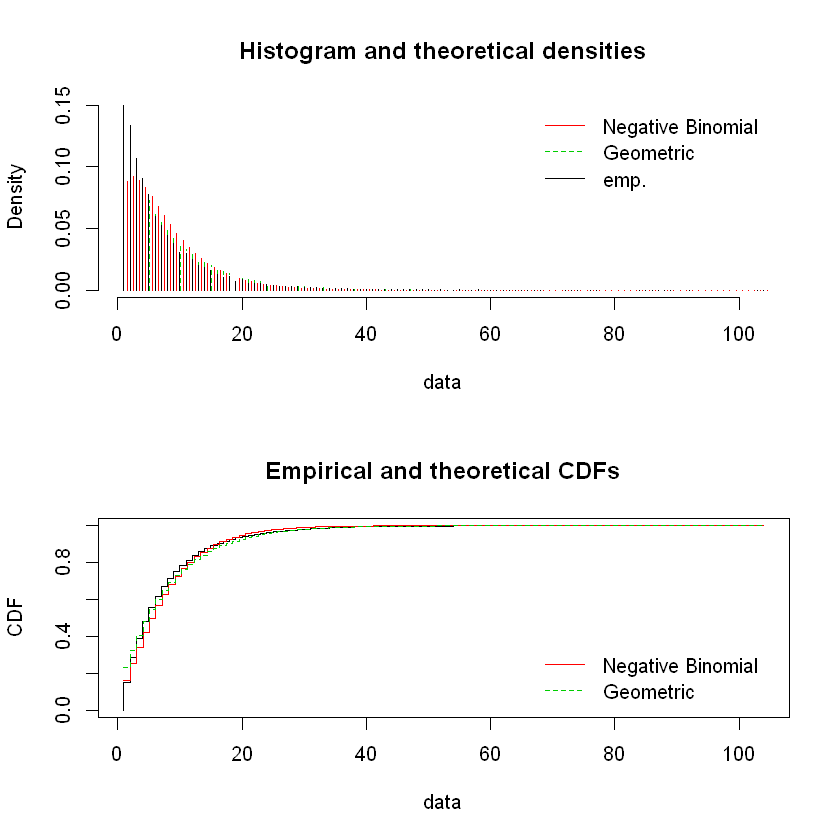

In [203]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dFeb, LOfd_GE_dFeb), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dFeb, LOfd_GE_dFeb), legendtext=plot.legend )

In [204]:
LOstatRes <- gofstat( list(LOfd_NB_dFeb, LOfd_GE_dFeb), fitnames=c("Negative Binomial", "Geometric") )

In [205]:
print( LOstatRes )

Chi-squared statistic:  67635.83 63661.19 
Degree of freedom of the Chi-squared distribution:  34 35 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     146358            155174.5921    225155.4102
<= 2     131052             90172.6703     92339.9137
<= 3     104690             87419.2015     81027.3945
<= 4      88743             81571.4586     71100.7667
<= 5      75666             74335.4438     62390.2453
<= 6      58768             66660.2556     54746.8458
<= 7      51113             59085.0770     48039.8356
<= 8      43790             51910.4043     42154.4980
<= 9      37383             45292.3923     36990.1704
<= 10     30129             39298.5419     32458.5221
<= 11     28787             33942.0293     28482.0438
<= 12     24501             29203.4394     24992.7221
<= 13     19728             25044.7218     21930.8755
<= 14     17836             21418.1893     19244.1343
<= 15     15603             18272.2889    

In [206]:
LOfdNB_dFeb_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [207]:
LOfdNB_dFeb_p = LOfdNB_dFeb_size / (LOfdNB_dFeb_size + LOfdNB_dFeb_mu)
cat("LOCA prob: ", LOfdNB_dFeb_p)

LOCA prob:  0.1759659

In [208]:
# add to our tracking dataframe
LOMonDistDF[2, ] <- list( 2, dLOFebMean, dLOFebBNr, LOfdNB_dFeb_p, LOfdNB_dFeb_mu, LOfdNB_dFeb_size,
                          LOfdNB_dFeb_pvalue )

In [209]:
LOgf_dFeb <- goodfit( dLOFeb$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dFeb_size, prob=LOfdNB_dFeb_p) )

In [210]:
summary( LOgf_dFeb )


	 Goodness-of-fit test for nbinomial distribution

                      X^2  df P(> X^2)
Pearson          215880.0 104        0
Likelihood Ratio 223626.6  81        0


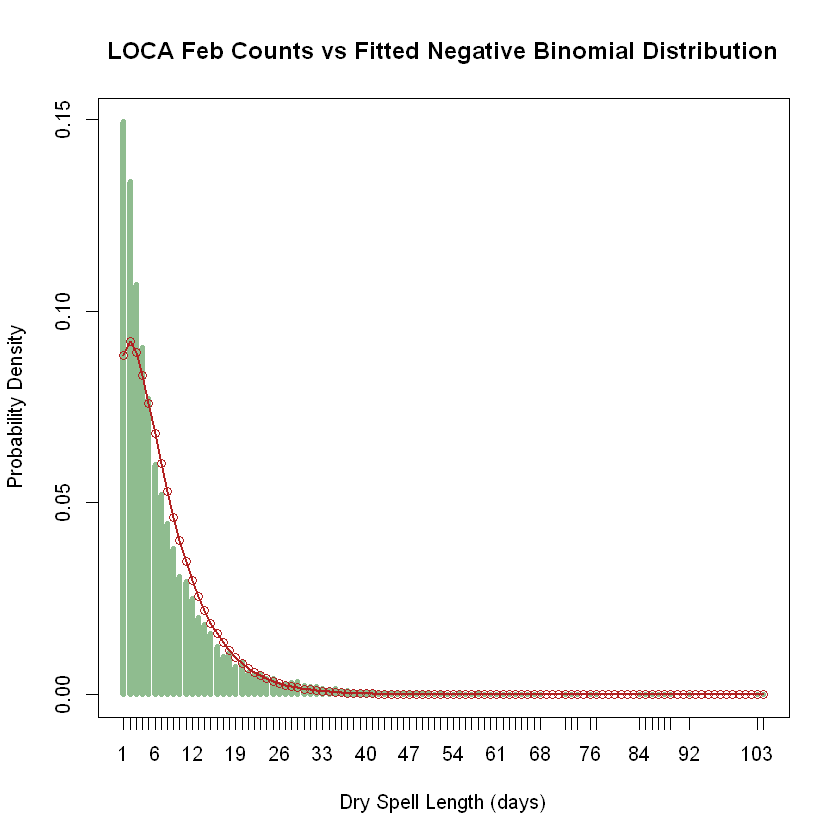

In [211]:
maxP <- max(dLOFeb$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dFeb_size, mu=LOfdNB_dFeb_mu )
ttab <- table( dLOFeb$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Feb Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

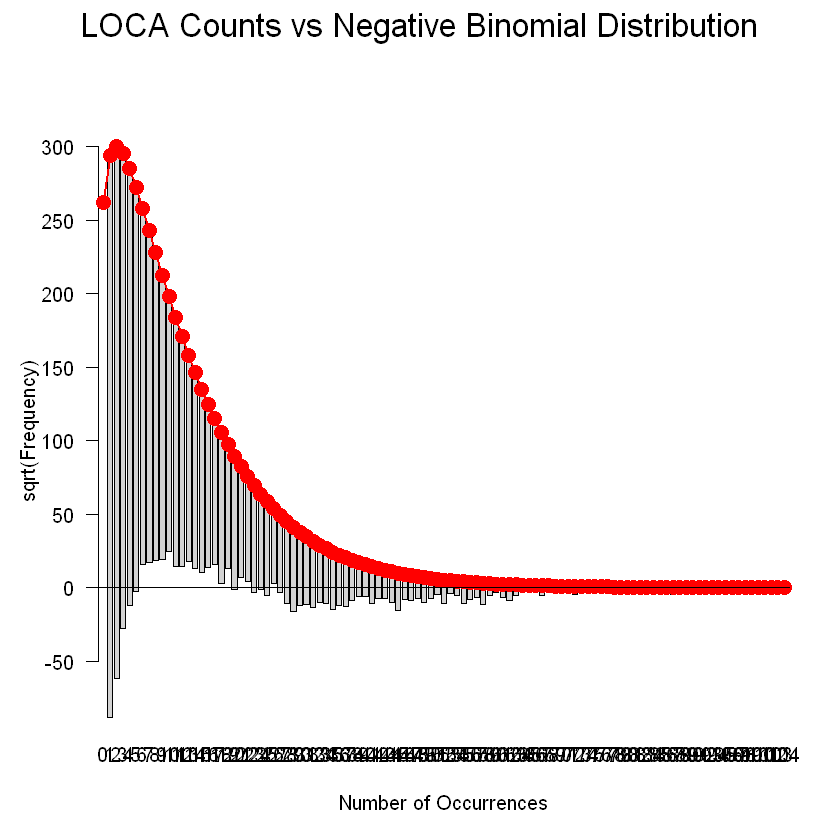

In [212]:
plot( LOgf_dFeb, main="LOCA Counts vs Negative Binomial Distribution" )

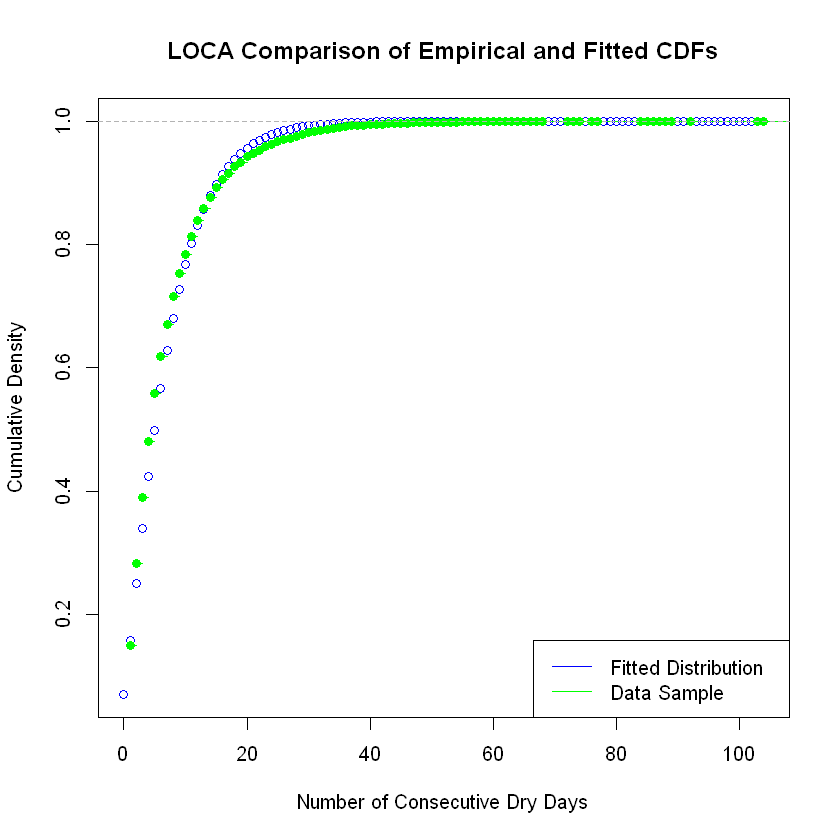

In [213]:
x <- seq(0,dLOFebMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dFeb_mu, size=LOfdNB_dFeb_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOFeb$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

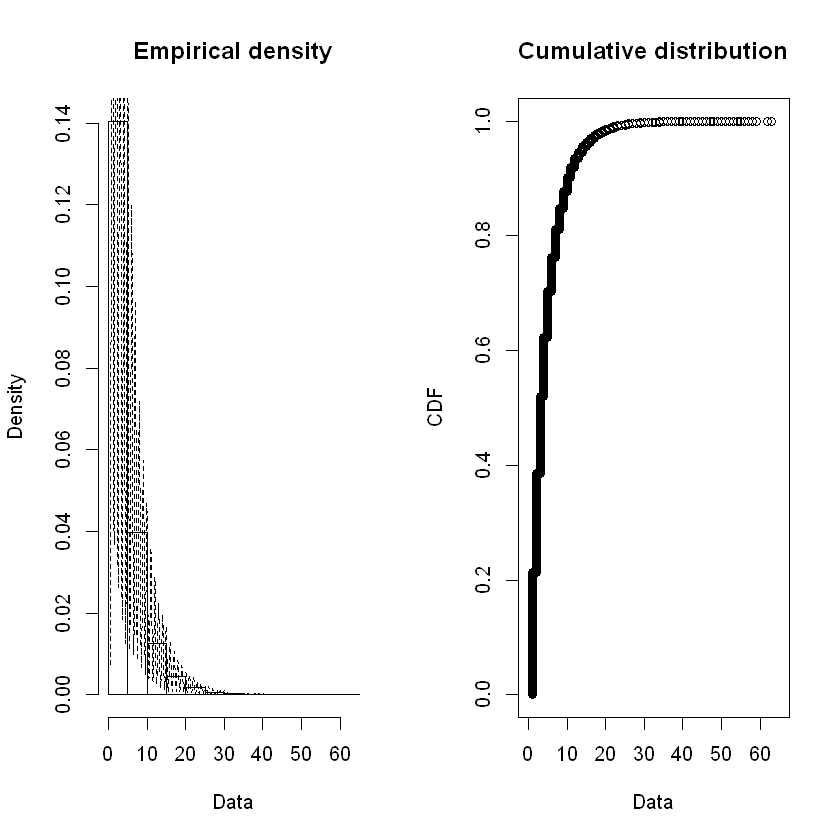

In [214]:
plotdist( dBCFeb$Dry_Count, histo=TRUE, demp=TRUE )

In [215]:
BCfd_NB_dFeb <- fitdist( dBCFeb$Dry_Count, "nbinom" )
BCfd_GE_dFeb <- fitdist( dBCFeb$Dry_Count, "geom" )

In [216]:
summary( BCfd_NB_dFeb )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 2.068765 0.004882052
mu   4.810123 0.004863222
Loglikelihood:  -1754074   AIC:  3508153   BIC:  3508175 
Correlation matrix:
              size            mu
size  1.000000e+00 -3.818799e-05
mu   -3.818799e-05  1.000000e+00


In [217]:
BCfdNB_dFeb_size <- BCfd_NB_dFeb$estimate[["size"]]
BCfdNB_dFeb_mu <- BCfd_NB_dFeb$estimate[["mu"]]
cat("BCCA Feb size: ", BCfdNB_dFeb_size, "\n", "BCCA Feb mu: ", BCfdNB_dFeb_mu, "\n")

BCCA Feb size:  2.068765 
 BCCA Feb mu:  4.810123 


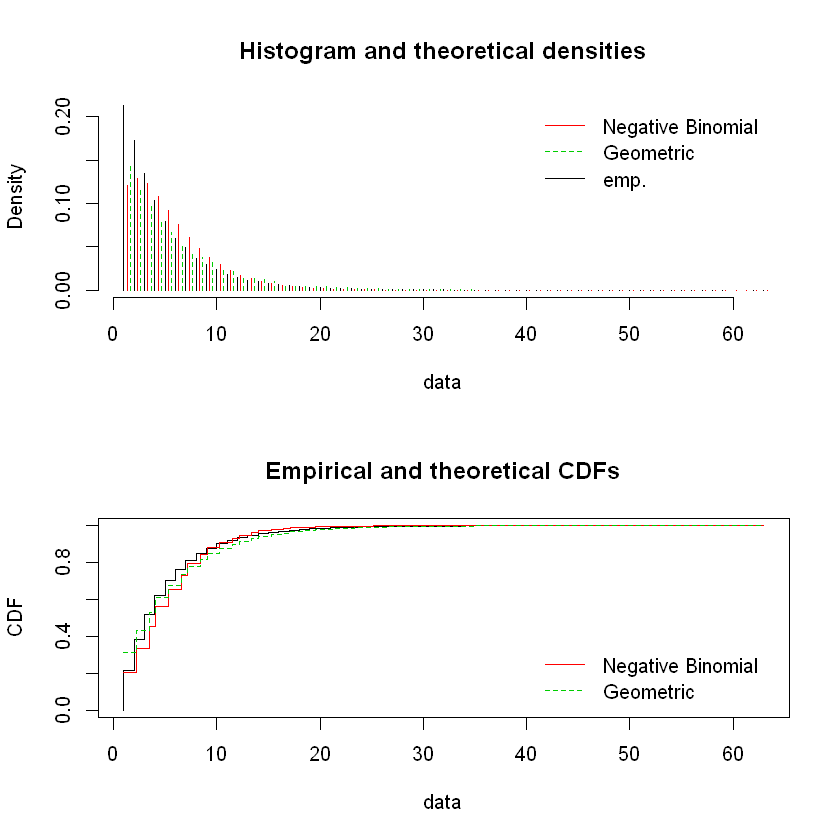

In [218]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dFeb, BCfd_GE_dFeb), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dFeb, BCfd_GE_dFeb), legendtext=plot.legend )

In [219]:
BCstatRes <- gofstat( list(BCfd_NB_dFeb, BCfd_GE_dFeb), fitnames=c("Negative Binomial", "Geometric") )

In [220]:
print(BCstatRes)

Chi-squared statistic:  47992.66 59344.71 
Degree of freedom of the Chi-squared distribution:  21 22 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     143883            137784.2066     212766.812
<= 2     116849             87409.1278      79779.927
<= 3      91103             82896.4795      66048.466
<= 4      69645             73454.1265      54680.420
<= 5      53616             62342.5352      45269.004
<= 6      40423             51358.7797      37477.451
<= 7      33300             41396.3134      31026.954
<= 8      25008             32813.8939      25686.696
<= 9      19864             25670.2091      21265.586
<= 10     15884             19868.5656      17605.422
<= 11     12438             15243.1457      14575.235
<= 12     10129             11608.2257      12066.593
<= 13      7756              8784.4871       9989.730
<= 14      6517              6611.5604       8270.330
<= 15      5379              4952.5989    

In [221]:
BCfdNB_dFeb_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [222]:
BCfdNB_dFeb_p = BCfdNB_dFeb_size / (BCfdNB_dFeb_size + BCfdNB_dFeb_mu)
cat("BCCA prob: ", BCfdNB_dFeb_p)

BCCA prob:  0.3007412

In [223]:
# add to our tracking dataframe
BCMonDistDF[2, ] <- list( 2, dBCFebMean, dBCFebBNr, BCfdNB_dFeb_p, BCfdNB_dFeb_mu, BCfdNB_dFeb_size,
                          BCfdNB_dFeb_pvalue )

In [224]:
BCgf_dFeb <- goodfit( dBCFeb$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dFeb_size, prob=BCfdNB_dFeb_p) )

In [225]:
summary( BCgf_dFeb )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          198867.2 63        0
Likelihood Ratio 186414.8 60        0


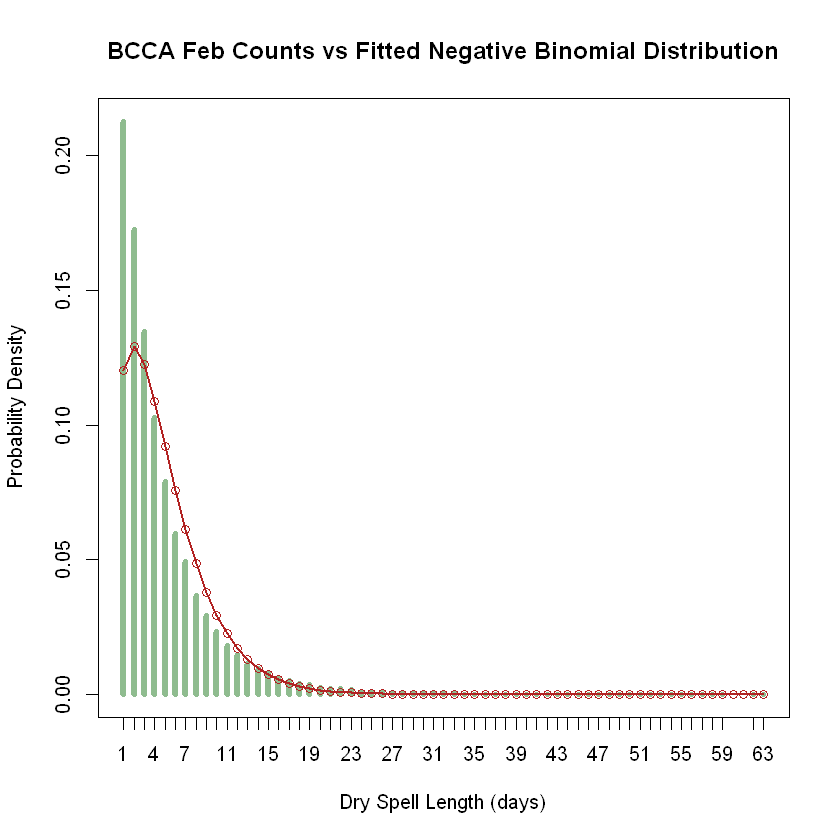

In [226]:
maxP <- max(dBCFeb$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dFeb_size, mu=BCfdNB_dFeb_mu )
ttab <- table( dBCFeb$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Feb Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

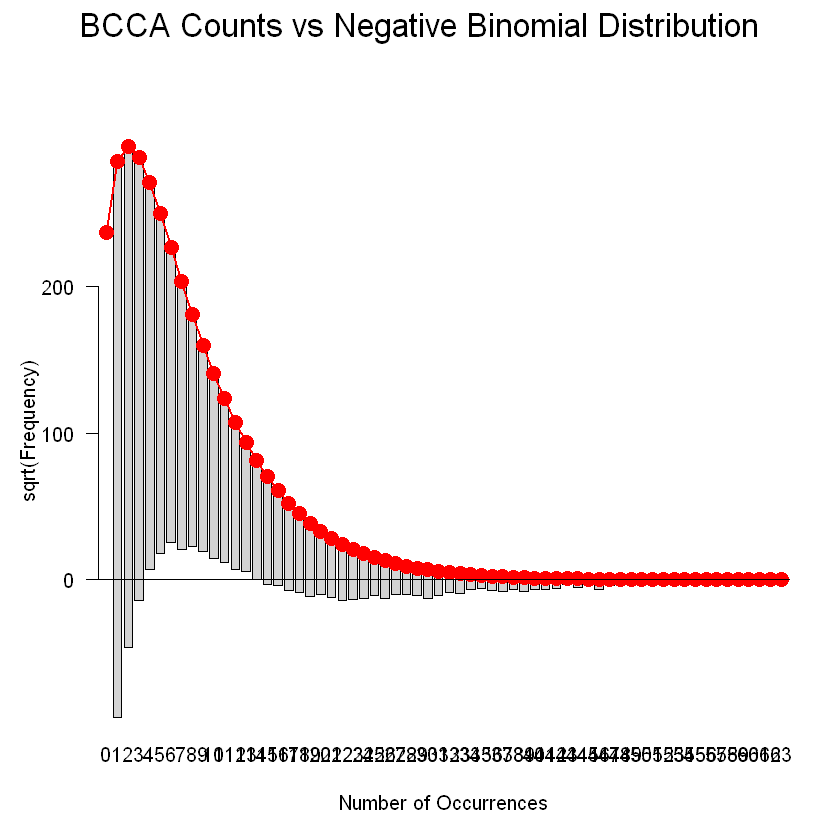

In [227]:
plot( BCgf_dFeb, main="BCCA Counts vs Negative Binomial Distribution" )

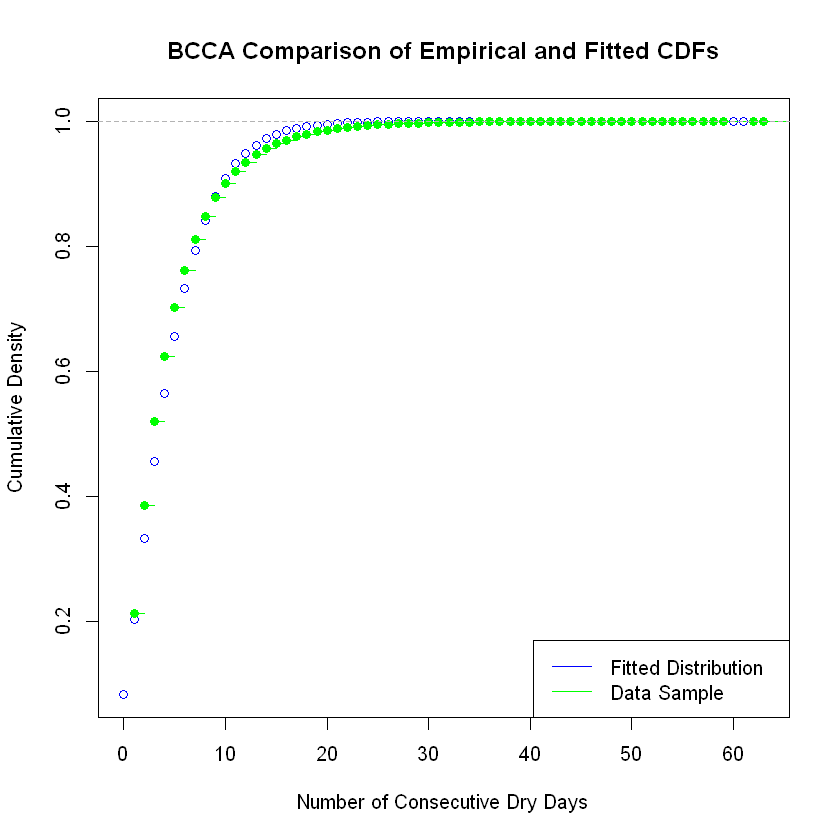

In [228]:
x <- seq(0,dBCFebMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dFeb_mu, size=BCfdNB_dFeb_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCFeb$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

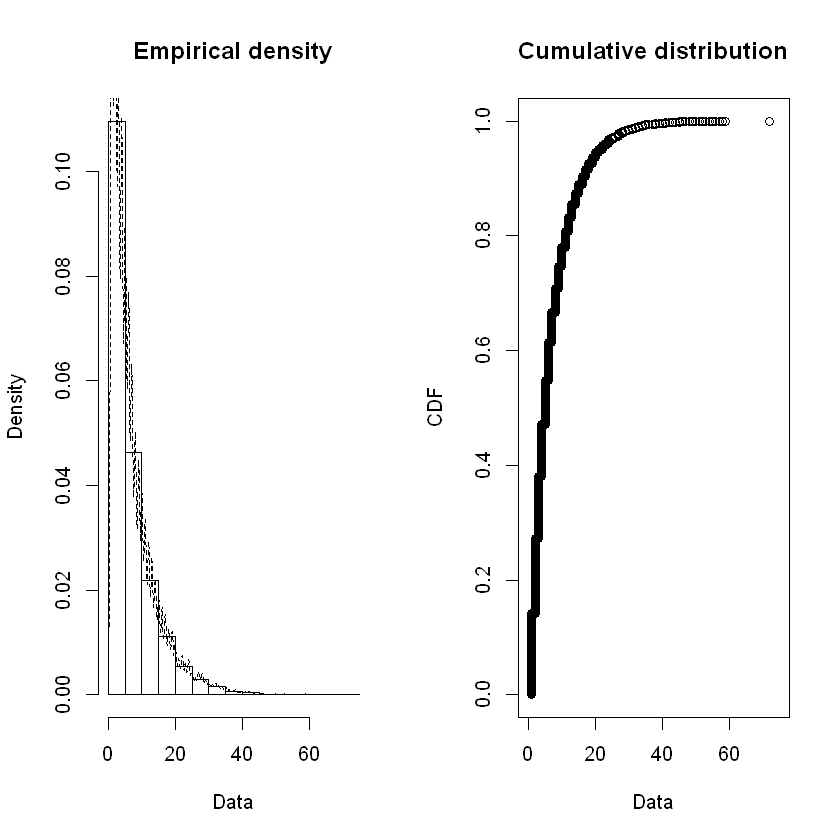

In [229]:
plotdist( dLOMar$Dry_Count, histo=TRUE, demp=TRUE )

In [230]:
LOfd_NB_dMar <- fitdist( dLOMar$Dry_Count, "nbinom" )
LOfd_GE_dMar <- fitdist( dLOMar$Dry_Count, "geom" )

In [231]:
LOfdNB_dMar_size <- LOfd_NB_dMar$estimate[["size"]]
LOfdNB_dMar_mu <- LOfd_NB_dMar$estimate[["mu"]]
cat("LOCA Mar size: ", LOfdNB_dMar_size, "\n", "LOCA Mar mu: ", LOfdNB_dMar_mu, "\n")

LOCA Mar size:  1.622494 
 LOCA Mar mu:  7.151151 


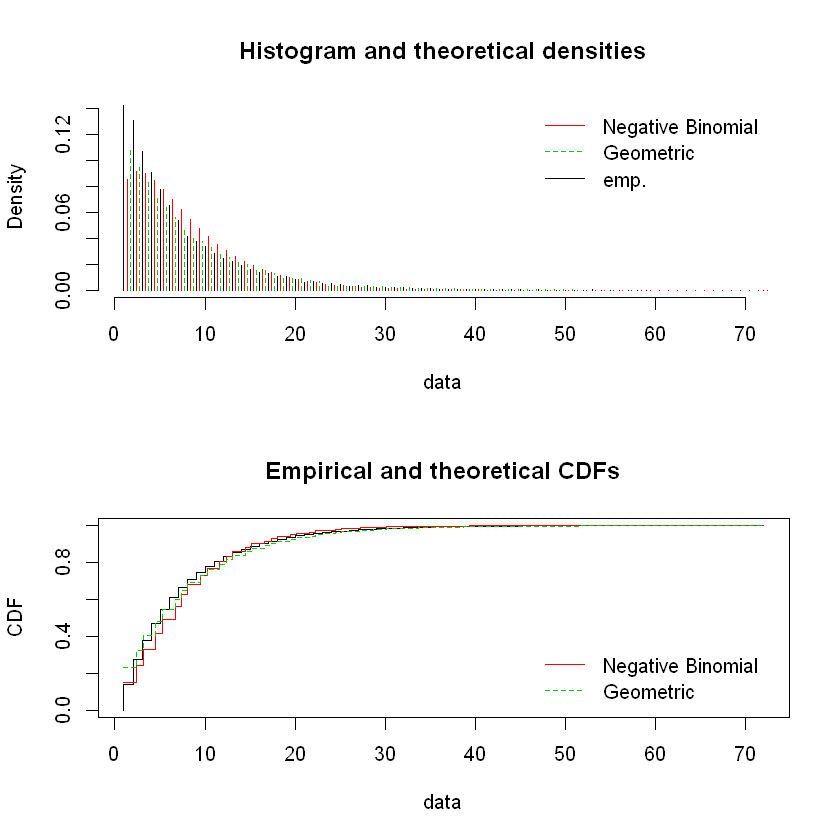

In [232]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dMar, LOfd_GE_dMar), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dMar, LOfd_GE_dMar), legendtext=plot.legend )

In [233]:
LOstatRes <- gofstat( list(LOfd_NB_dMar, LOfd_GE_dMar), fitnames=c("Negative Binomial", "Geometric") )

In [234]:
print( LOstatRes )

Chi-squared statistic:  50816.07 72619.86 
Degree of freedom of the Chi-squared distribution:  32 33 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     152573            161337.8728     247363.875
<= 2     140422             98186.0071     101420.399
<= 3     115081             96634.4428      88979.653
<= 4      97586             91021.5501      78064.953
<= 5      83311             83425.5602      68489.106
<= 6      70391             75052.5336      60087.881
<= 7      57280             66613.2016      52717.194
<= 8      44427             58519.2992      46250.633
<= 9      40451             50996.4740      40577.293
<= 10     36283             44153.2357      35599.874
<= 11     30364             38024.6364      31233.011
<= 12     25919             32600.5469      27401.810
<= 13     23732             27844.1552      24040.564
<= 14     20300             23704.0933      21091.625
<= 15     17110             20122.3334    

In [235]:
LOfdNB_dMar_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [236]:
LOfdNB_dMar_p = LOfdNB_dMar_size / (LOfdNB_dMar_size + LOfdNB_dMar_mu)
cat("LOCA prob: ", LOfdNB_dMar_p)

LOCA prob:  0.1849282

In [237]:
# add to our tracking dataframe
LOMonDistDF[3, ] <- list( 3, dLOMarMean, dLOMarBNr, LOfdNB_dMar_p, LOfdNB_dMar_mu, LOfdNB_dMar_size,
                          LOfdNB_dMar_pvalue )

In [238]:
LOgf_dMar <- goodfit( dLOMar$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dMar_size, prob=LOfdNB_dMar_p) )

In [239]:
summary( LOgf_dMar )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          165161.5 72        0
Likelihood Ratio 219028.4 59        0


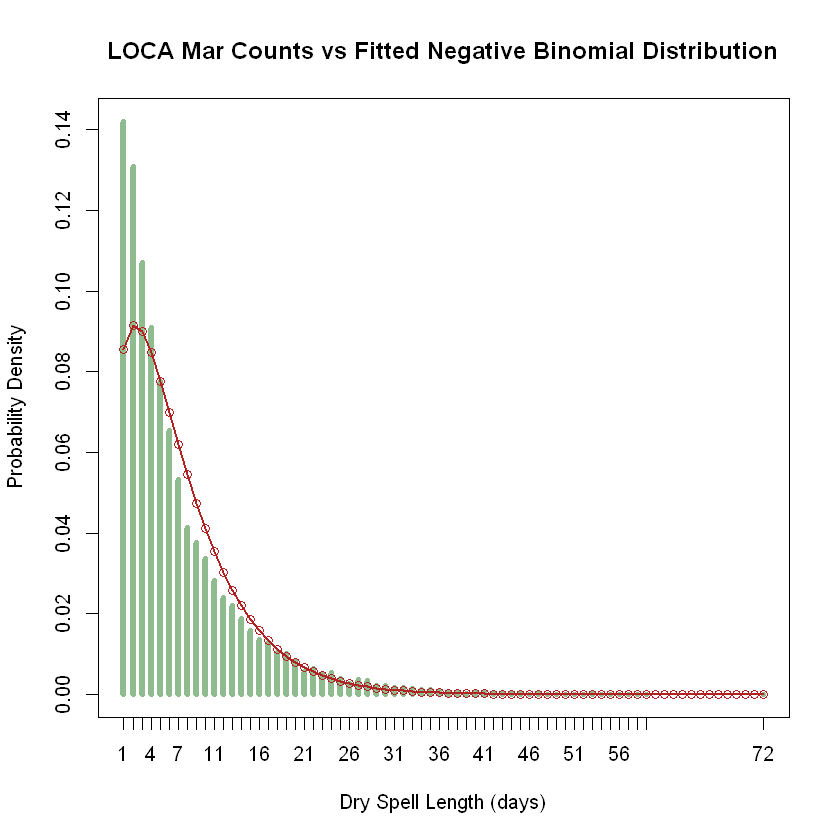

In [240]:
maxP <- max(dLOMar$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dMar_size, mu=LOfdNB_dMar_mu )
ttab <- table( dLOMar$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Mar Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

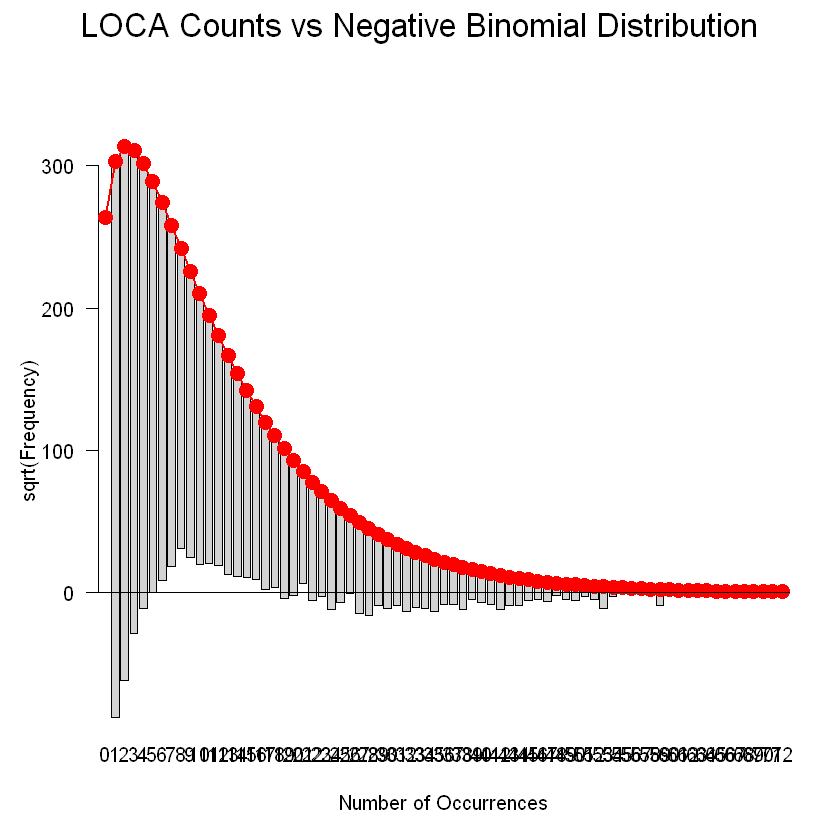

In [241]:
plot( LOgf_dMar, main="LOCA Counts vs Negative Binomial Distribution" )

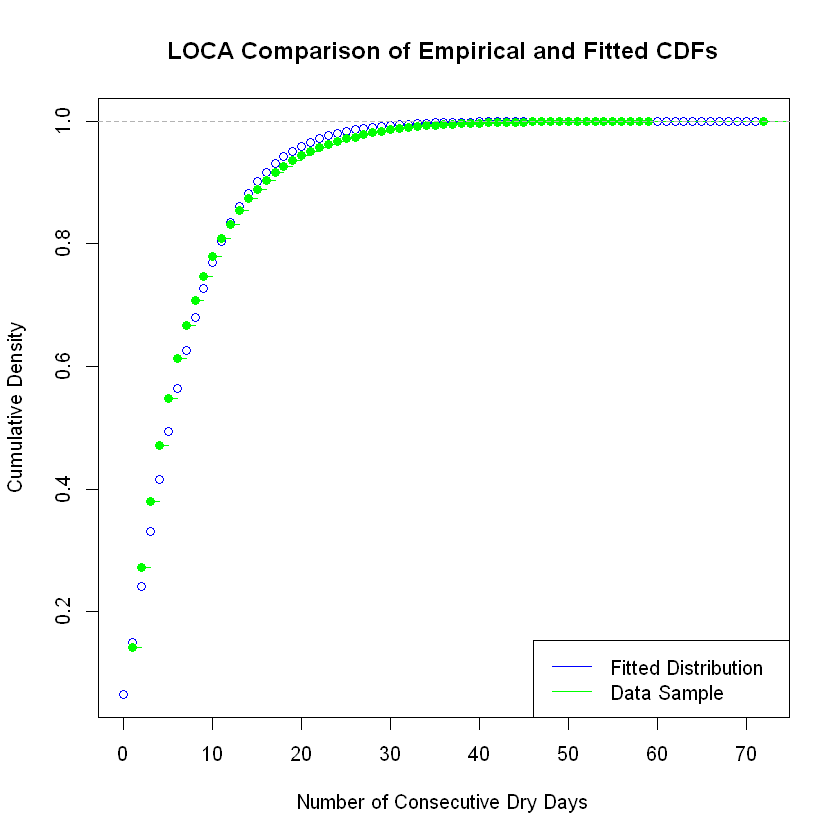

In [242]:
x <- seq(0,dLOMarMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dMar_mu, size=LOfdNB_dMar_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOMar$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

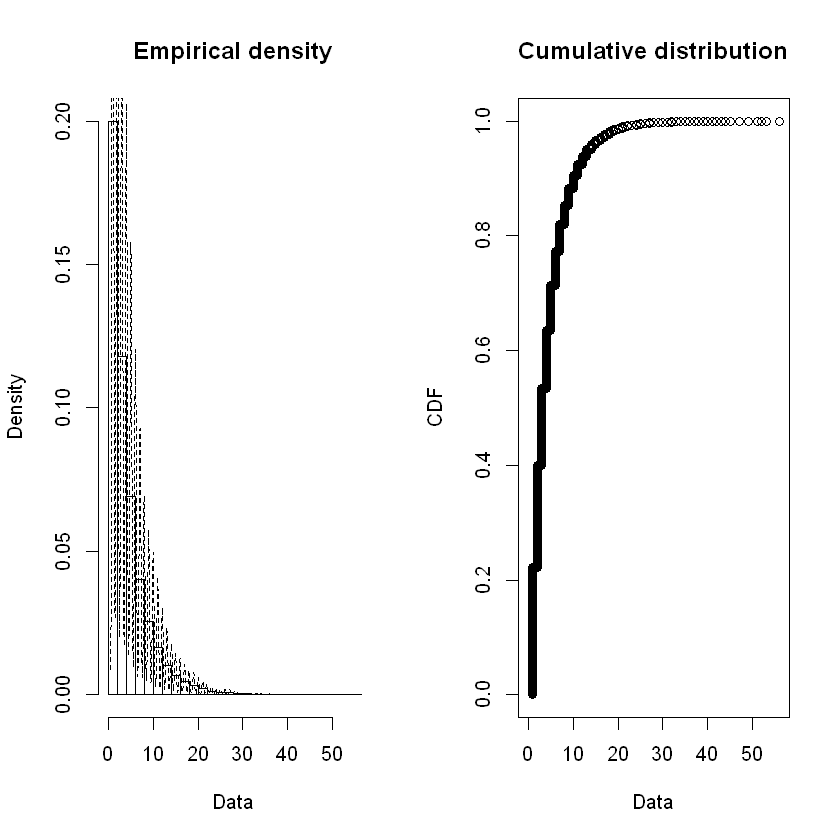

In [243]:
plotdist( dBCMar$Dry_Count, histo=TRUE, demp=TRUE )

In [244]:
BCfd_NB_dMar <- fitdist( dBCMar$Dry_Count, "nbinom" )
BCfd_GE_dMar <- fitdist( dBCMar$Dry_Count, "geom" )

In [245]:
summary( BCfd_NB_dMar )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate Std. Error
size 2.093103 0.00468590
mu   4.668675 0.00442443
Loglikelihood:  -1976249   AIC:  3952503   BIC:  3952526 
Correlation matrix:
             size           mu
size 1.0000000000 0.0002236785
mu   0.0002236785 1.0000000000


In [246]:
BCfdNB_dMar_size <- BCfd_NB_dMar$estimate[["size"]]
BCfdNB_dMar_mu <- BCfd_NB_dMar$estimate[["mu"]]
cat("BCCA Mar size: ", BCfdNB_dMar_size, "\n", "BCCA Mar mu: ", BCfdNB_dMar_mu, "\n")

BCCA Mar size:  2.093103 
 BCCA Mar mu:  4.668675 


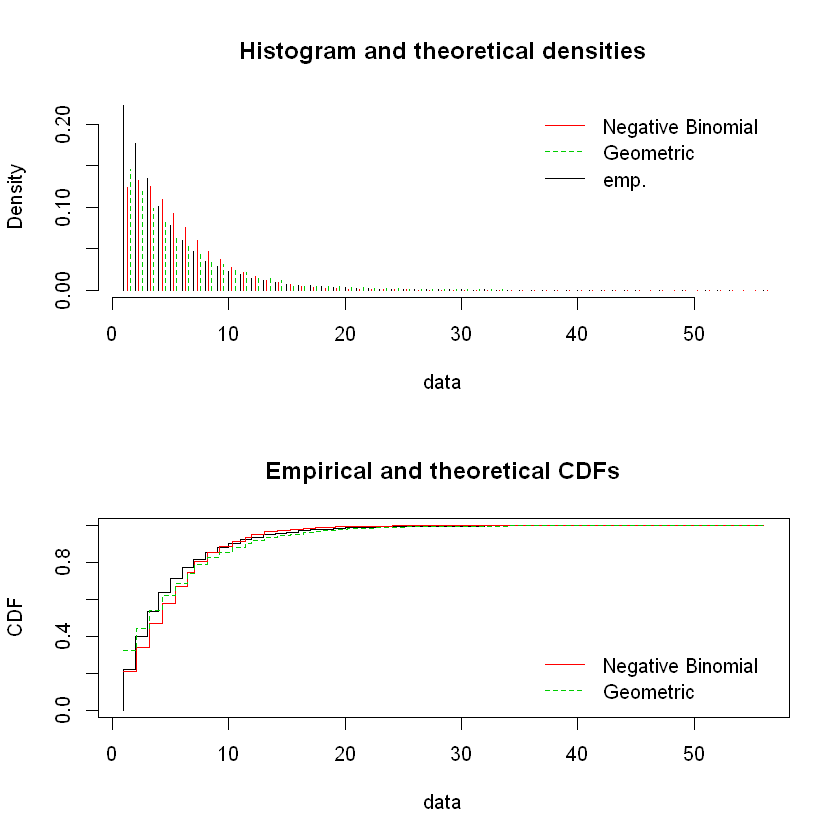

In [247]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dMar, BCfd_GE_dMar), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dMar, BCfd_GE_dMar), legendtext=plot.legend )

In [248]:
BCstatRes <- gofstat( list(BCfd_NB_dMar, BCfd_GE_dMar), fitnames=c("Negative Binomial", "Geometric") )

In [249]:
print(BCstatRes)

Chi-squared statistic:  54165.77 65194.89 
Degree of freedom of the Chi-squared distribution:  21 22 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     171473            161809.9214     247770.987
<= 2     136620            102120.7239      92164.402
<= 3     103816             96200.6519      75907.693
<= 4      77678             84573.2854      62518.475
<= 5      60342             71159.7545      51490.956
<= 6      45931             58083.4207      42408.561
<= 7      35555             46366.2469      34928.193
<= 8      26441             36387.8838      28767.274
<= 9      21658             28175.5064      23693.067
<= 10     17836             21580.3017      19513.891
<= 11     14389             16380.8078      16071.871
<= 12     11130             12340.4044      13236.984
<= 13      8918              9236.8822      10902.137
<= 14      6892              6875.5690       8979.129
<= 15      5527              5093.1905    

In [250]:
BCfdNB_dMar_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [251]:
BCfdNB_dMar_p = BCfdNB_dMar_size / (BCfdNB_dMar_size + BCfdNB_dMar_mu)
cat("BCCA prob: ", BCfdNB_dMar_p)

BCCA prob:  0.3095492

In [252]:
# add to our tracking dataframe
BCMonDistDF[3, ] <- list( 3, dBCMarMean, dBCMarBNr, BCfdNB_dMar_p, BCfdNB_dMar_mu, BCfdNB_dMar_size,
                          BCfdNB_dMar_pvalue )

In [253]:
BCgf_dMar <- goodfit( dBCMar$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dMar_size, prob=BCfdNB_dMar_p) )

In [254]:
summary( BCgf_dMar )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          190109.7 56        0
Likelihood Ratio 220617.4 50        0


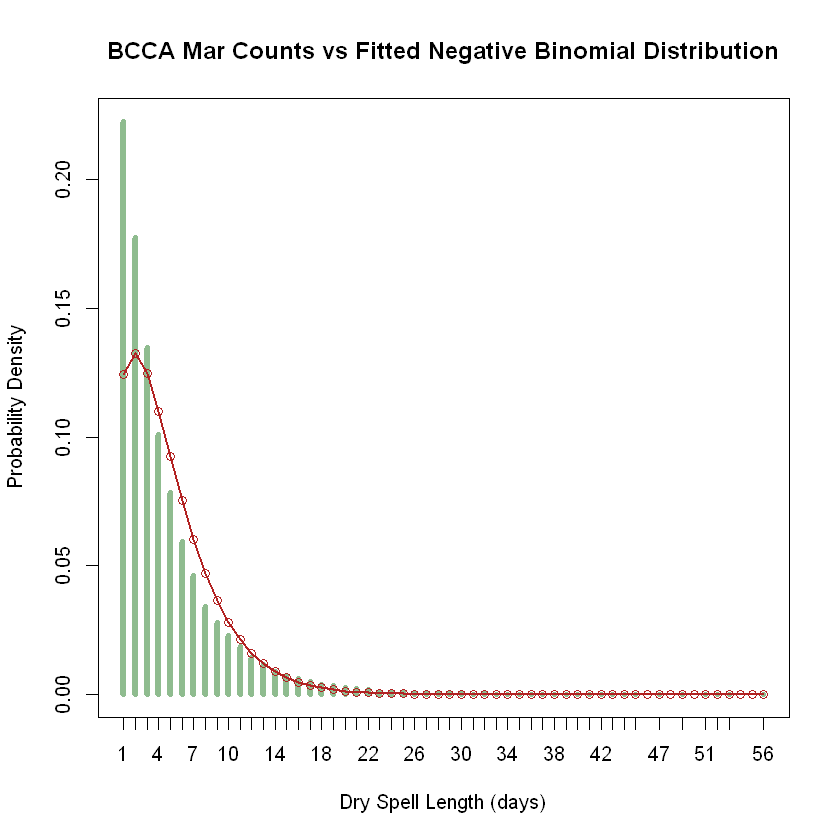

In [255]:
maxP <- max(dBCMar$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dMar_size, mu=BCfdNB_dMar_mu )
ttab <- table( dBCMar$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Mar Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

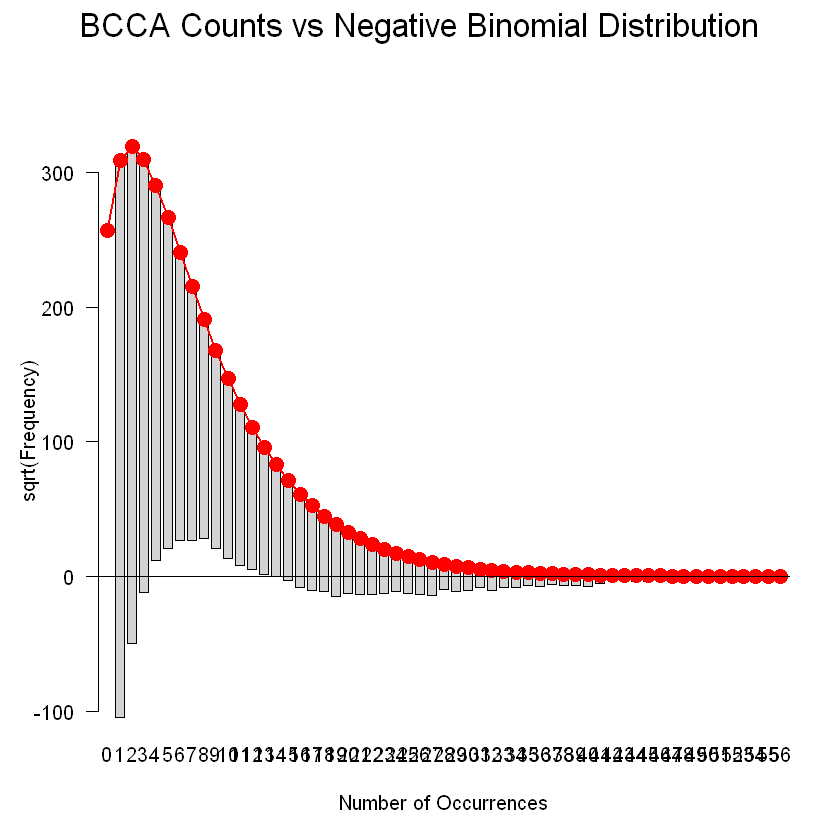

In [256]:
plot( BCgf_dMar, main="BCCA Counts vs Negative Binomial Distribution" )

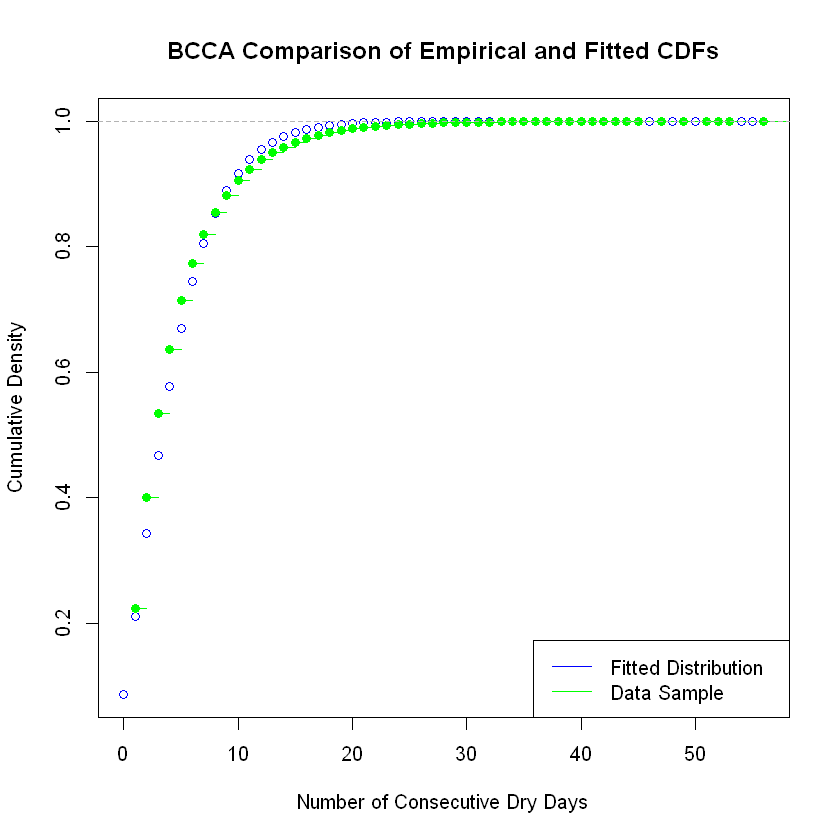

In [257]:
x <- seq(0,dBCMarMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dMar_mu, size=BCfdNB_dMar_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCMar$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

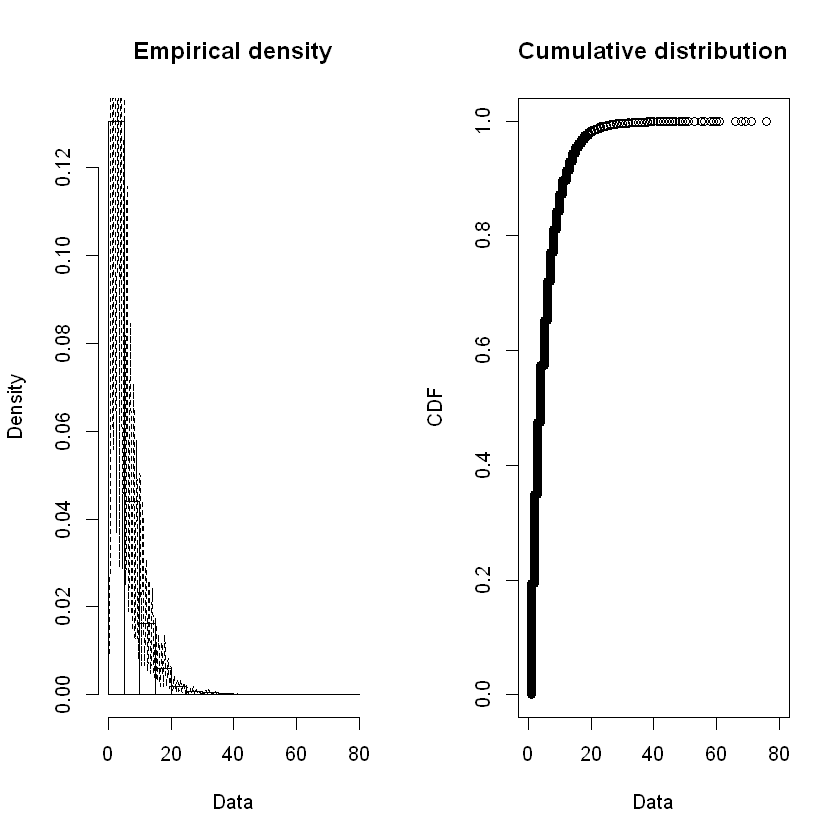

In [258]:
plotdist( dLOApr$Dry_Count, histo=TRUE, demp=TRUE )

In [259]:
LOfd_NB_dApr <- fitdist( dLOApr$Dry_Count, "nbinom" )
LOfd_GE_dApr <- fitdist( dLOApr$Dry_Count, "geom" )

In [260]:
LOfdNB_dApr_size <- LOfd_NB_dApr$estimate[["size"]]
LOfdNB_dApr_mu <- LOfd_NB_dApr$estimate[["mu"]]
cat("LOCA Apr size: ", LOfdNB_dApr_size, "\n", "LOCA Apr mu: ", LOfdNB_dApr_mu, "\n")

LOCA Apr size:  1.97849 
 LOCA Apr mu:  5.3225 


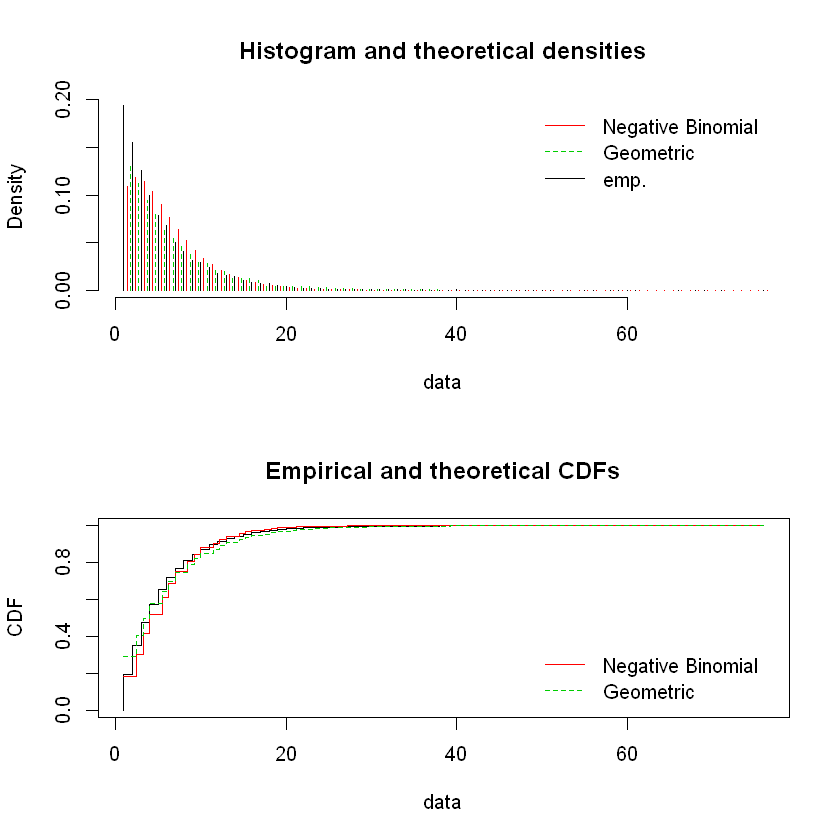

In [261]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dApr, LOfd_GE_dApr), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dApr, LOfd_GE_dApr), legendtext=plot.legend )

In [262]:
LOstatRes <- gofstat( list(LOfd_NB_dApr, LOfd_GE_dApr), fitnames=c("Negative Binomial", "Geometric") )

In [263]:
print( LOstatRes )

Chi-squared statistic:  63504.44 90189.71 
Degree of freedom of the Chi-squared distribution:  23 24 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     229339            218312.6441     344772.829
<= 2     183617            139971.7766     132658.791
<= 3     148761            135322.9276     111676.775
<= 4     117746            122784.3268      94013.386
<= 5      93182            107028.2298      79143.731
<= 6      80985             90749.1282      66625.940
<= 7      58903             75404.8081      56088.029
<= 8      48184             61694.4745      47216.850
<= 9      37572             49865.7668      39748.783
<= 10     34595             39909.7521      33461.905
<= 11     27846             31682.7111      28169.393
<= 12     21003             24980.3879      23713.973
<= 13     18246             19581.6825      19963.246
<= 14     16834             15272.9849      16805.753
<= 15     12065             11860.4815    

In [264]:
LOfdNB_dApr_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [265]:
LOfdNB_dApr_p = LOfdNB_dApr_size / (LOfdNB_dApr_size + LOfdNB_dApr_mu)
cat("LOCA prob: ", LOfdNB_dApr_p)

LOCA prob:  0.2709893

In [266]:
# add to our tracking dataframe
LOMonDistDF[4, ] <- list( 4, dLOAprMean, dLOAprBNr, LOfdNB_dApr_p, LOfdNB_dApr_mu, LOfdNB_dApr_size,
                          LOfdNB_dApr_pvalue )

In [267]:
LOgf_dApr <- goodfit( dLOApr$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dApr_size, prob=LOfdNB_dApr_p) )

In [268]:
summary( LOgf_dApr )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          449837.8 76        0
Likelihood Ratio 289757.7 62        0


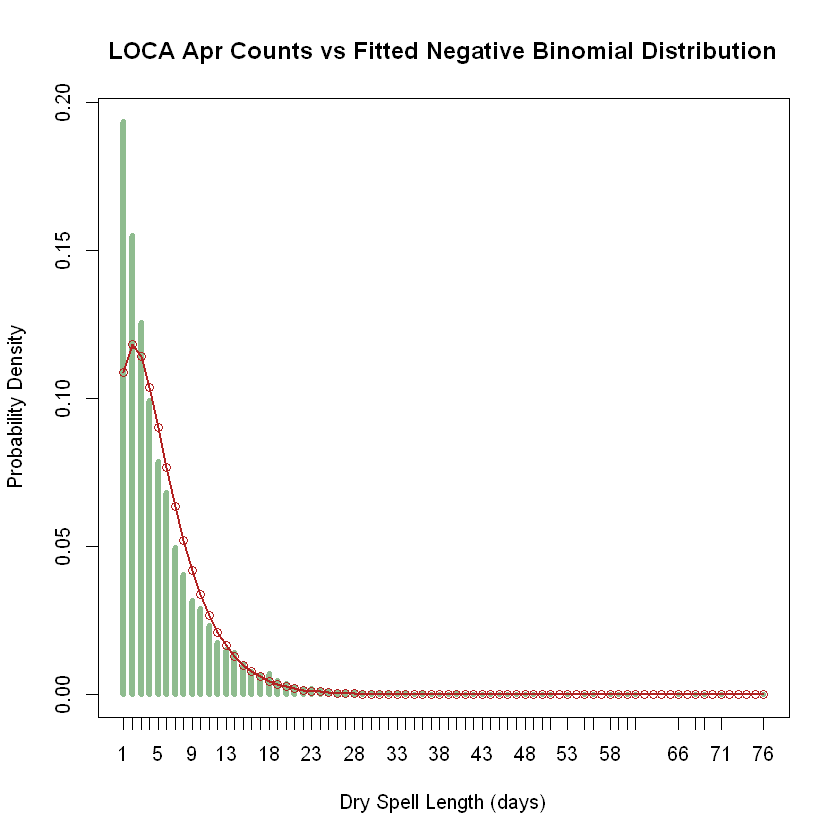

In [269]:
maxP <- max(dLOApr$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dApr_size, mu=LOfdNB_dApr_mu )
ttab <- table( dLOApr$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Apr Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

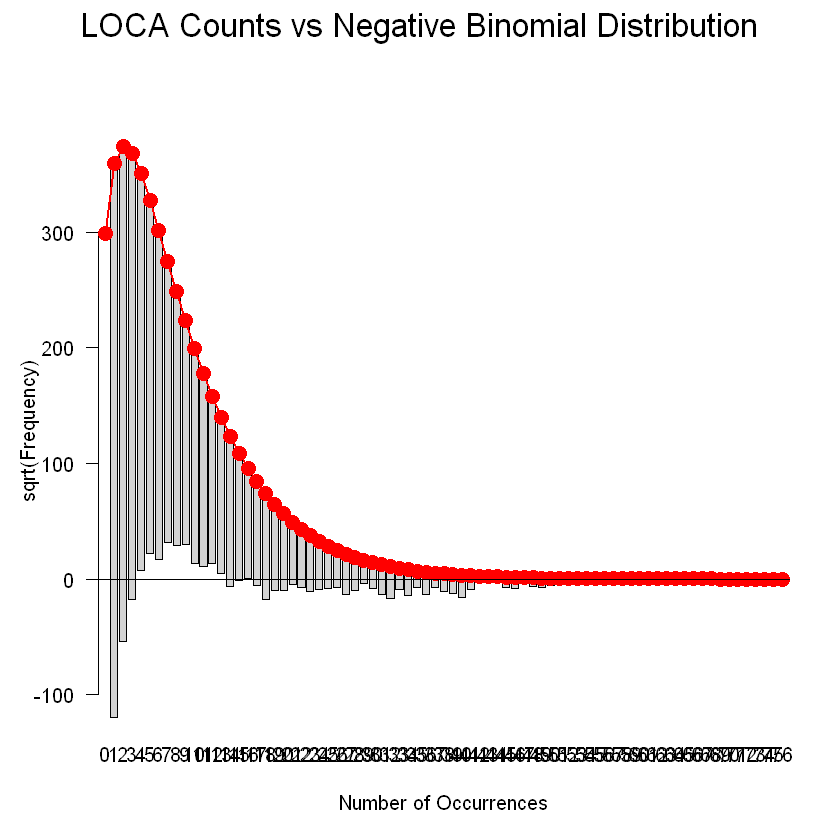

In [270]:
plot( LOgf_dApr, main="LOCA Counts vs Negative Binomial Distribution" )

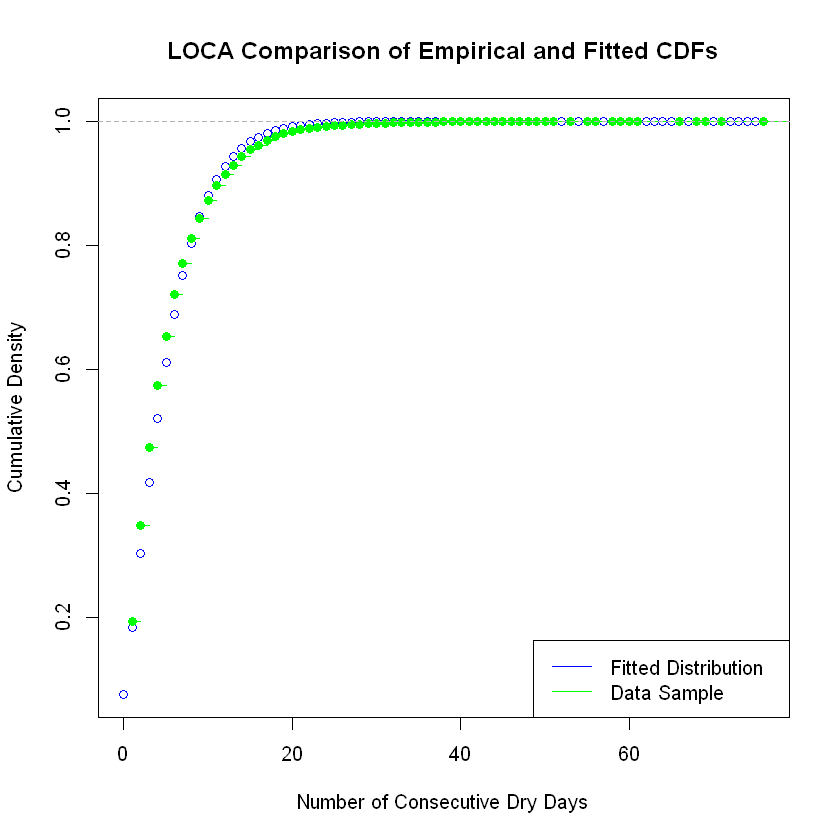

In [271]:
x <- seq(0,dLOAprMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dApr_mu, size=LOfdNB_dApr_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOApr$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

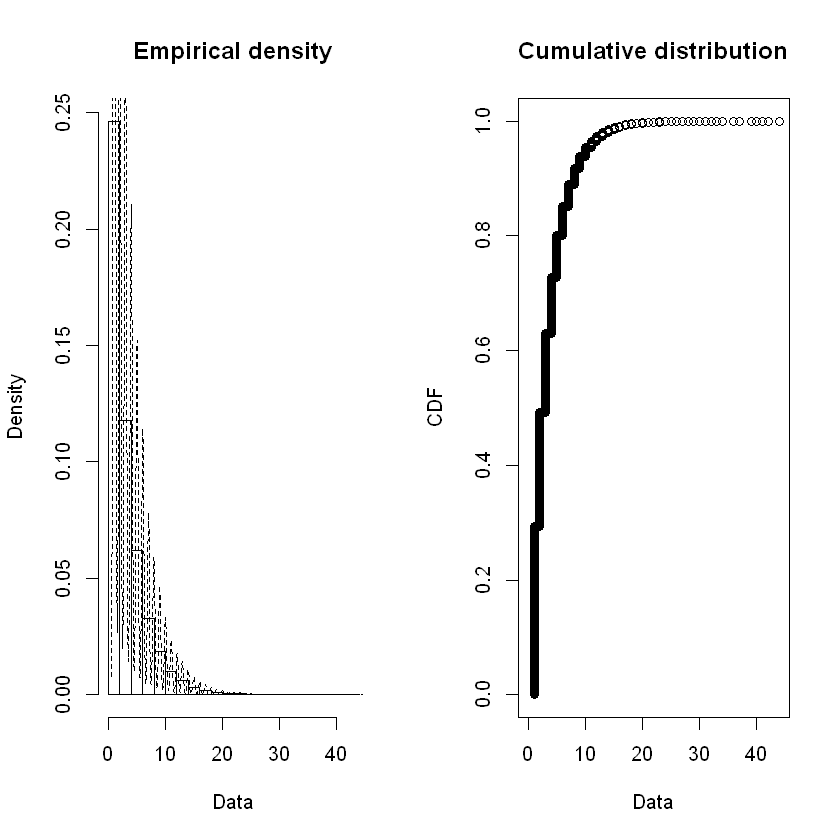

In [272]:
plotdist( dBCApr$Dry_Count, histo=TRUE, demp=TRUE )

In [273]:
BCfd_NB_dApr <- fitdist( dBCApr$Dry_Count, "nbinom" )
BCfd_GE_dApr <- fitdist( dBCApr$Dry_Count, "geom" )

In [274]:
summary( BCfd_NB_dApr )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 2.713960 0.007157144
mu   3.642352 0.003274275
Loglikelihood:  -1838136   AIC:  3676277   BIC:  3676300 
Correlation matrix:
             size           mu
size 1.000000e+00 7.586247e-05
mu   7.586247e-05 1.000000e+00


In [275]:
BCfdNB_dApr_size <- BCfd_NB_dApr$estimate[["size"]]
BCfdNB_dApr_mu <- BCfd_NB_dApr$estimate[["mu"]]
cat("BCCA Apr size: ", BCfdNB_dApr_size, "\n", "BCCA Apr mu: ", BCfdNB_dApr_mu, "\n")

BCCA Apr size:  2.71396 
 BCCA Apr mu:  3.642352 


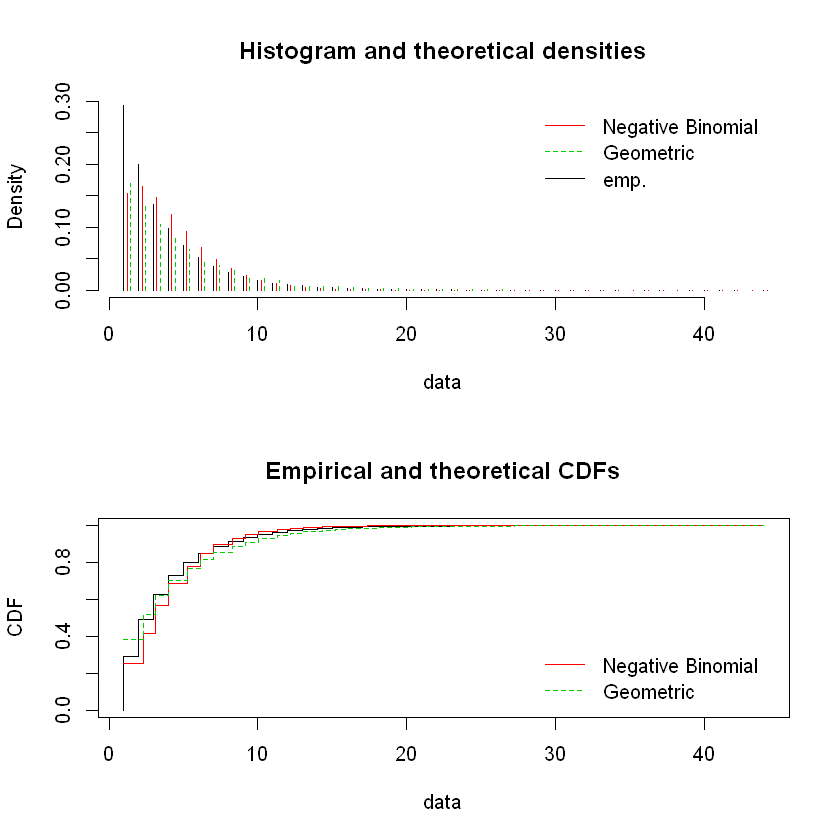

In [276]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dApr, BCfd_GE_dApr), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dApr, BCfd_GE_dApr), legendtext=plot.legend )

In [277]:
BCstatRes <- gofstat( list(BCfd_NB_dApr, BCfd_GE_dApr), fitnames=c("Negative Binomial", "Geometric") )

In [278]:
print(BCstatRes)

Chi-squared statistic:  55318.84 63900.41 
Degree of freedom of the Chi-squared distribution:  16 17 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     233349            201864.2236     305851.020
<= 2     158579            130738.1295     105503.118
<= 3     109073            117718.2038      82777.703
<= 4      78571             96360.1691      64947.351
<= 5      57098             74145.1967      50957.665
<= 6      41245             54624.2992      39981.363
<= 7      29516             38965.4884      31369.361
<= 8      22269             27112.1009      24612.388
<= 9      17146             18494.7050      19310.869
<= 10     12417             12414.4611      15151.300
<= 11      8814              8222.2893      11887.704
<= 12      6710              5384.5710       9327.087
<= 13      5424              3492.3202       7318.029
<= 14      3924              2246.1998       5741.722
<= 15      2854              1434.2115    

In [279]:
BCfdNB_dApr_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [280]:
BCfdNB_dApr_p = BCfdNB_dApr_size / (BCfdNB_dApr_size + BCfdNB_dApr_mu)
cat("BCCA prob: ", BCfdNB_dApr_p)

BCCA prob:  0.4269708

In [281]:
# add to our tracking dataframe
BCMonDistDF[4, ] <- list( 4, dBCAprMean, dBCAprBNr, BCfdNB_dApr_p, BCfdNB_dApr_mu, BCfdNB_dApr_size,
                          BCfdNB_dApr_pvalue )

In [282]:
BCgf_dApr <- goodfit( dBCApr$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dApr_size, prob=BCfdNB_dApr_p) )

In [283]:
summary( BCgf_dApr )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          259744.3 44        0
Likelihood Ratio 273013.0 40        0


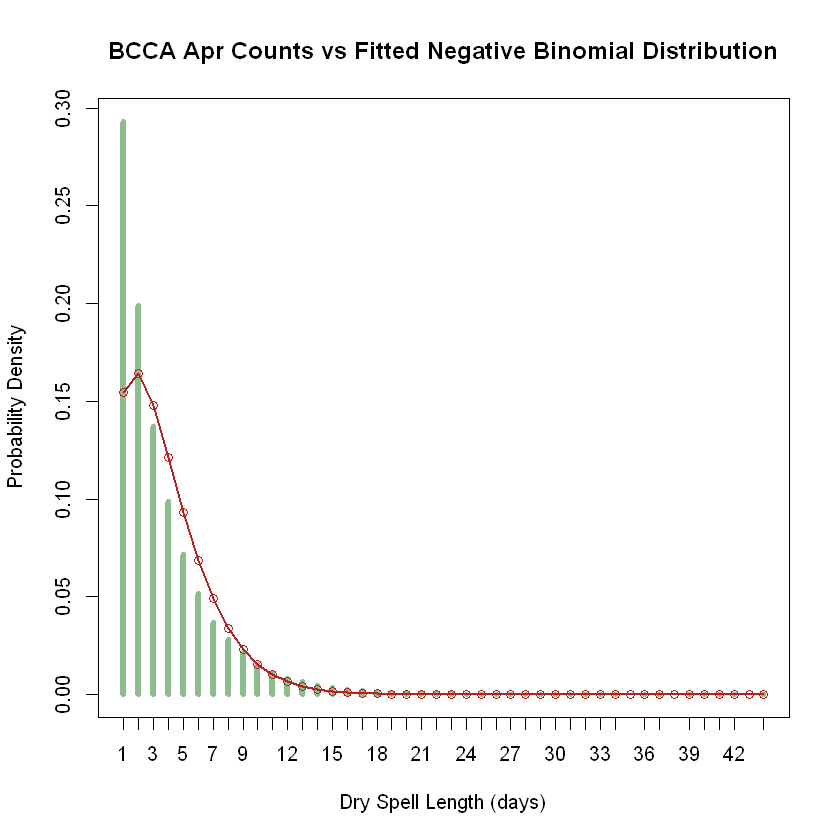

In [284]:
maxP <- max(dBCApr$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dApr_size, mu=BCfdNB_dApr_mu )
ttab <- table( dBCApr$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Apr Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

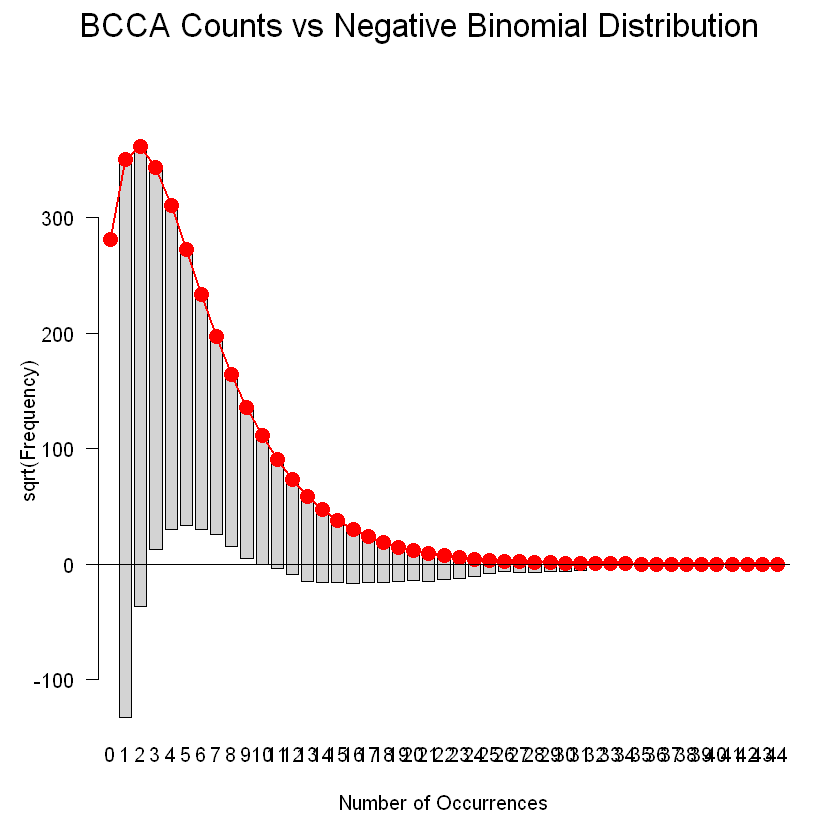

In [285]:
plot( BCgf_dApr, main="BCCA Counts vs Negative Binomial Distribution" )

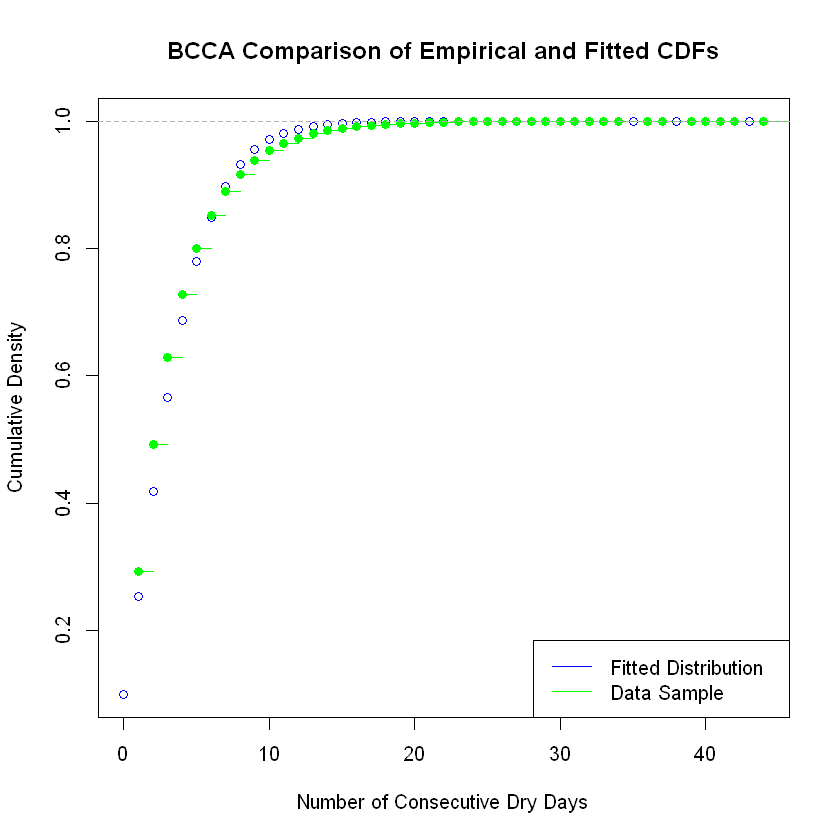

In [286]:
x <- seq(0,dBCAprMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dApr_mu, size=BCfdNB_dApr_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCApr$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

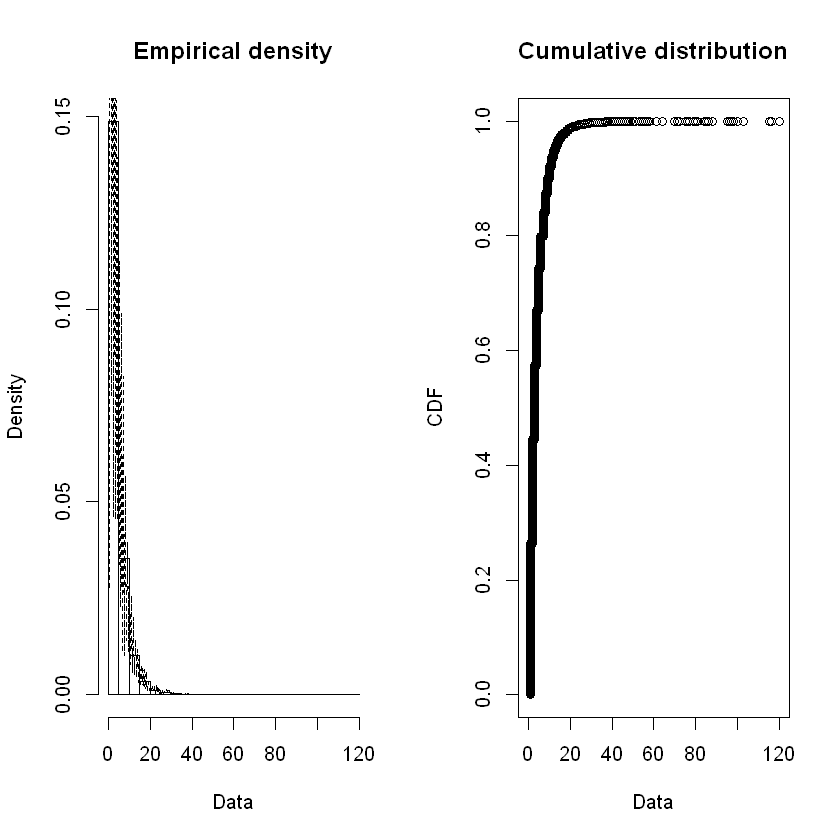

In [287]:
plotdist( dLOMay$Dry_Count, histo=TRUE, demp=TRUE )

In [288]:
LOfd_NB_dMay <- fitdist( dLOMay$Dry_Count, "nbinom" )
LOfd_GE_dMay <- fitdist( dLOMay$Dry_Count, "geom" )

In [289]:
LOfdNB_dMay_size <- LOfd_NB_dMay$estimate[["size"]]
LOfdNB_dMay_mu <- LOfd_NB_dMay$estimate[["mu"]]
cat("LOCA May size: ", LOfdNB_dMay_size, "\n", "LOCA May mu: ", LOfdNB_dMay_mu, "\n")

LOCA May size:  1.984754 
 LOCA May mu:  4.350415 


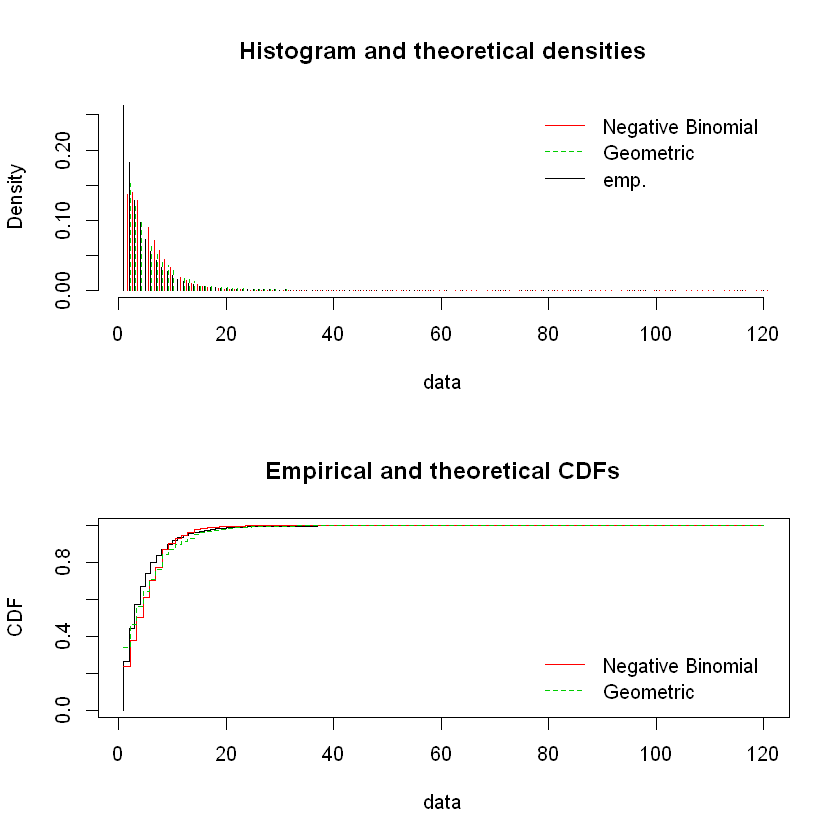

In [290]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dMay, LOfd_GE_dMay), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dMay, LOfd_GE_dMay), legendtext=plot.legend )

In [291]:
LOstatRes <- gofstat( list(LOfd_NB_dMay, LOfd_GE_dMay), fitnames=c("Negative Binomial", "Geometric") )

In [292]:
print( LOstatRes )

Chi-squared statistic:  152387.6 90358.02 
Degree of freedom of the Chi-squared distribution:  21 22 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     374976            336438.6223     482972.762
<= 2     259239            198875.8226     176108.465
<= 3     183006            181398.9369     143191.971
<= 4     138330            155235.4682     116427.911
<= 5     104113            127596.7841      94666.330
<= 6      78656            102002.7927      76972.214
<= 7      60399             79900.2299      62585.311
<= 8      46589             61622.1287      50887.469
<= 9      37777             46946.5863      41376.075
<= 10     29116             35413.3338      33642.458
<= 11     22518             26495.7191      27354.335
<= 12     17034             19687.9569      22241.527
<= 13     13903             14544.0241      18084.355
<= 14     11292             10690.0226      14704.202
<= 15      7609              7822.8639    

In [293]:
LOfdNB_dMay_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [294]:
LOfdNB_dMay_p = LOfdNB_dMay_size / (LOfdNB_dMay_size + LOfdNB_dMay_mu)
cat("LOCA prob: ", LOfdNB_dMay_p)

LOCA prob:  0.3132915

In [295]:
# add to our tracking dataframe
LOMonDistDF[5, ] <- list( 5, dLOMayMean, dLOMayBNr, LOfdNB_dMay_p, LOfdNB_dMay_mu, LOfdNB_dMay_size,
                          LOfdNB_dMay_pvalue )

In [296]:
LOgf_dMay <- goodfit( dLOMay$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dMay_size, prob=LOfdNB_dMay_p) )

In [297]:
summary( LOgf_dMay )


	 Goodness-of-fit test for nbinomial distribution

                      X^2  df P(> X^2)
Pearson               NaN 120      NaN
Likelihood Ratio 508815.7  80        0


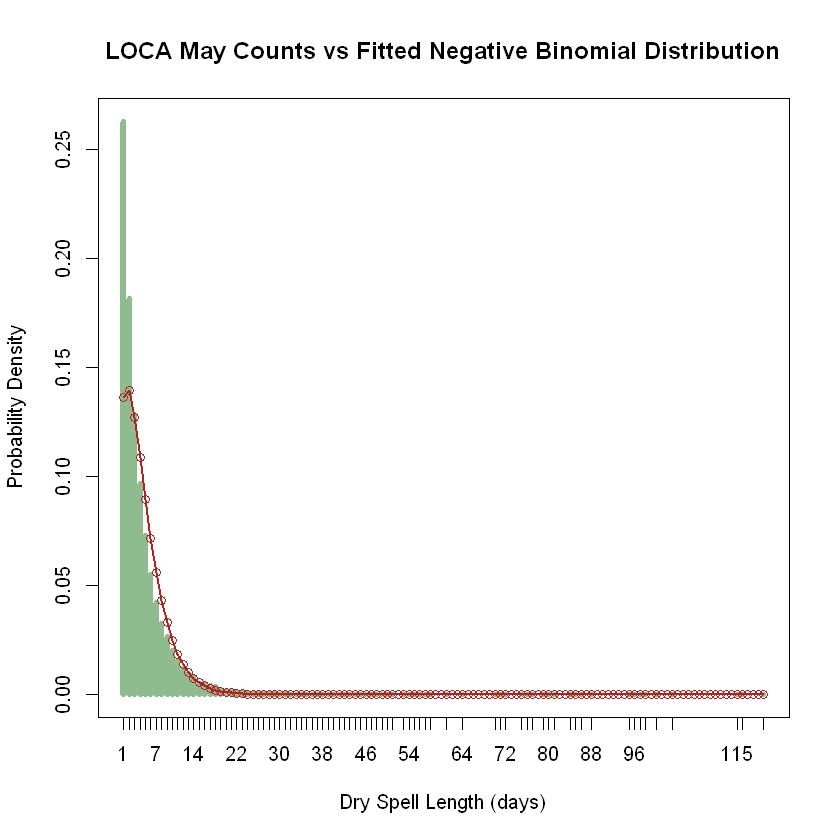

In [298]:
maxP <- max(dLOMay$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dMay_size, mu=LOfdNB_dMay_mu )
ttab <- table( dLOMay$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA May Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

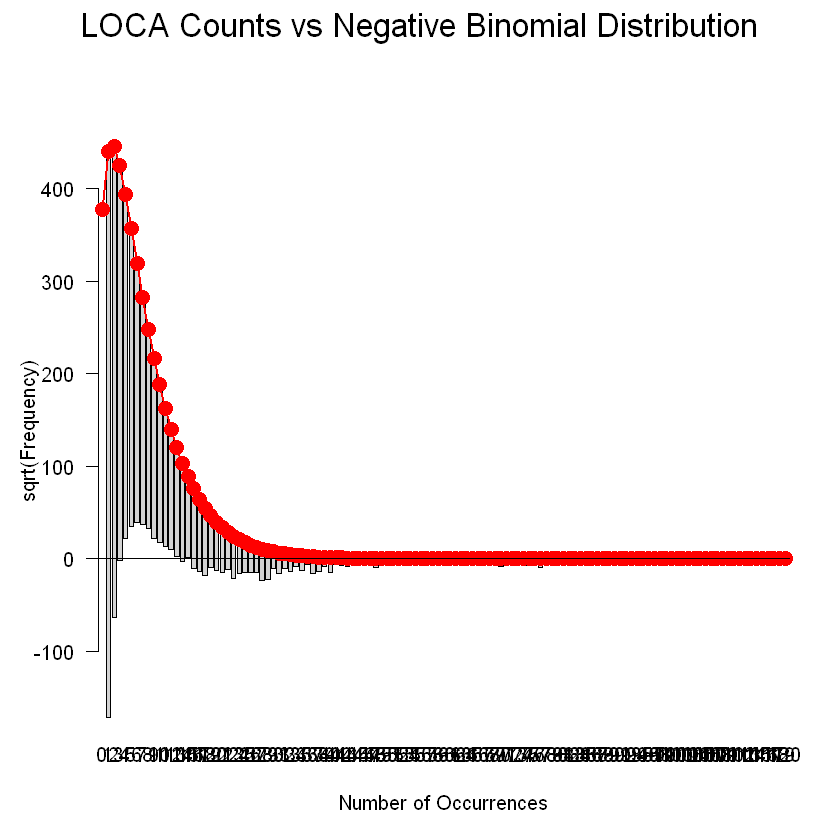

In [299]:
plot( LOgf_dMay, main="LOCA Counts vs Negative Binomial Distribution" )

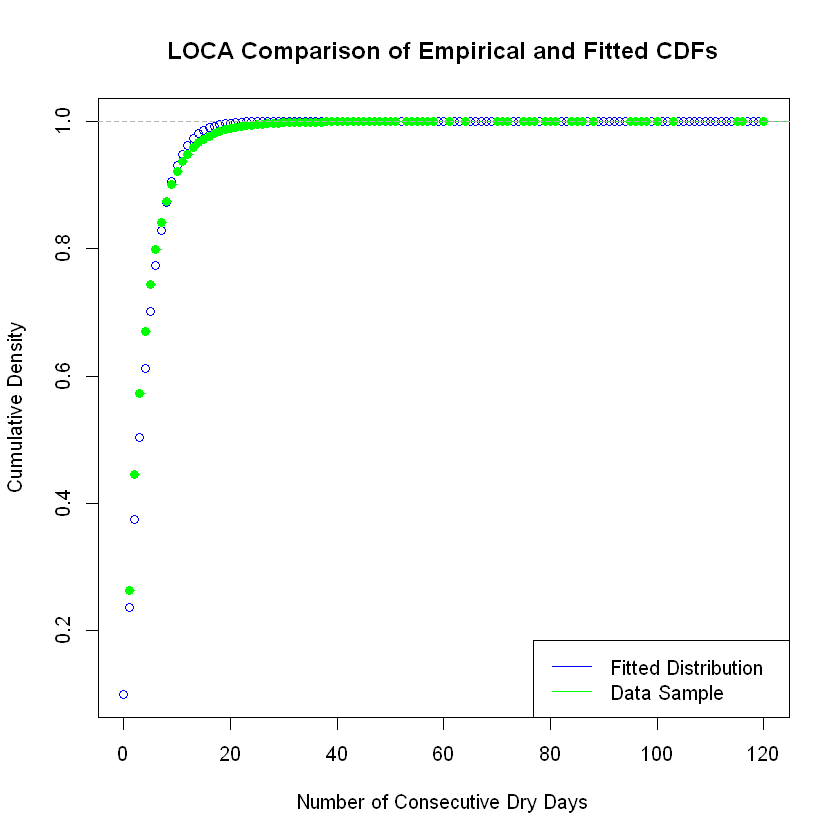

In [300]:
x <- seq(0,dLOMayMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dMay_mu, size=LOfdNB_dMay_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOMay$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

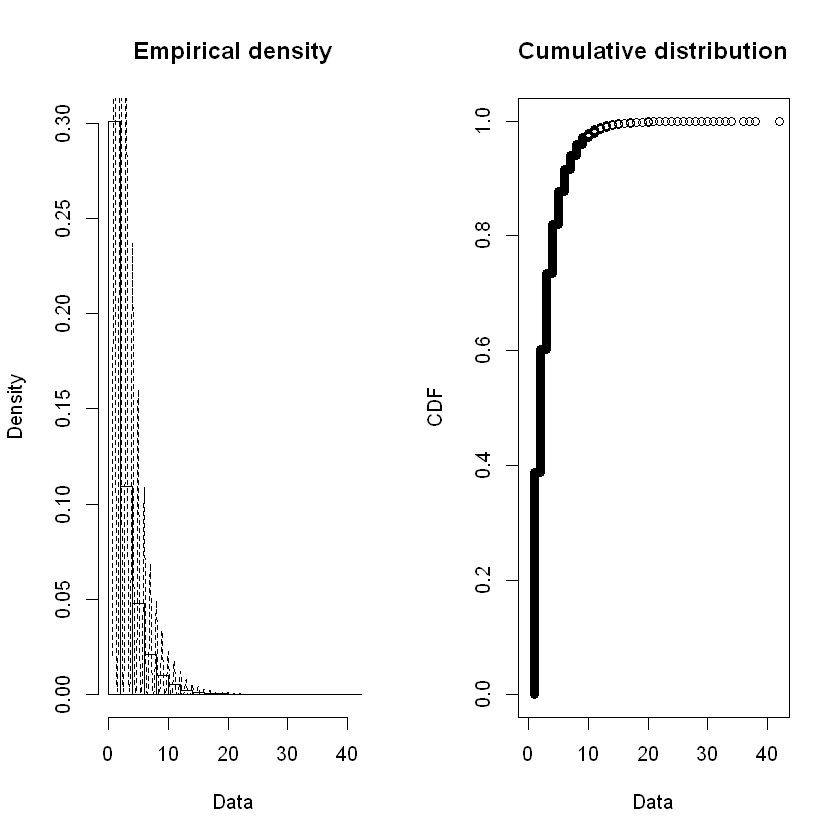

In [301]:
plotdist( dBCMay$Dry_Count, histo=TRUE, demp=TRUE )

In [302]:
BCfd_NB_dMay <- fitdist( dBCMay$Dry_Count, "nbinom" )
BCfd_GE_dMay <- fitdist( dBCMay$Dry_Count, "geom" )

In [303]:
summary( BCfd_NB_dMay )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 3.541622 0.011099665
mu   2.865740 0.002452462
Loglikelihood:  -1787931   AIC:  3575865   BIC:  3575889 
Correlation matrix:
             size           mu
size  1.00000e+00 -5.99163e-05
mu   -5.99163e-05  1.00000e+00


In [304]:
BCfdNB_dMay_size <- BCfd_NB_dMay$estimate[["size"]]
BCfdNB_dMay_mu <- BCfd_NB_dMay$estimate[["mu"]]
cat("BCCA May size: ", BCfdNB_dMay_size, "\n", "BCCA May mu: ", BCfdNB_dMay_mu, "\n")

BCCA May size:  3.541622 
 BCCA May mu:  2.86574 


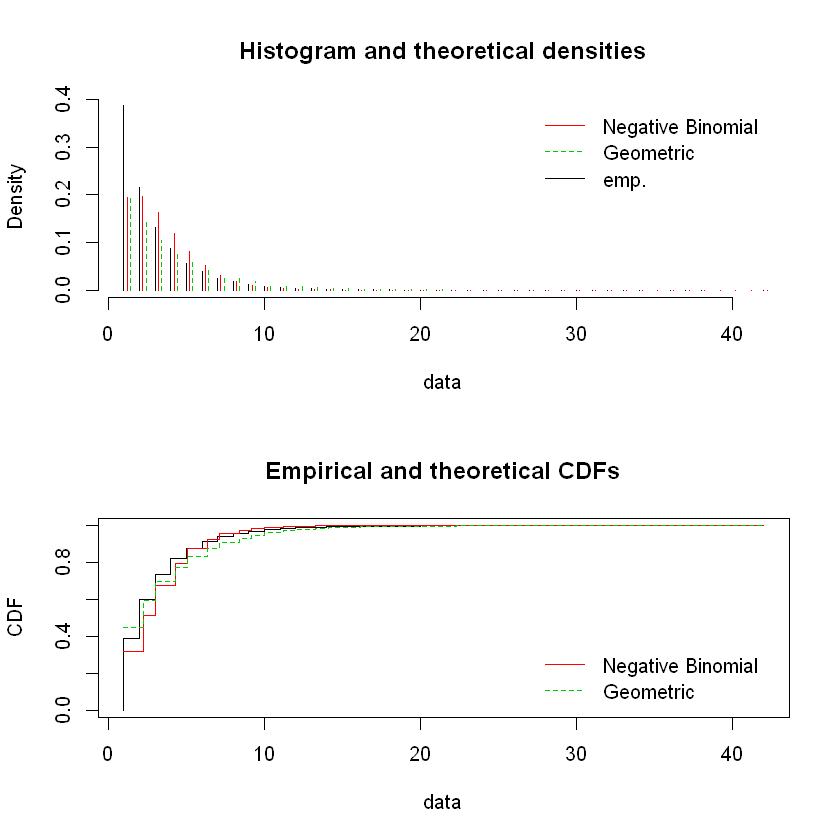

In [305]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dMay, BCfd_GE_dMay), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dMay, BCfd_GE_dMay), legendtext=plot.legend )

In [306]:
BCstatRes <- gofstat( list(BCfd_NB_dMay, BCfd_GE_dMay), fitnames=c("Negative Binomial", "Geometric") )

In [307]:
print(BCstatRes)

Chi-squared statistic:  150657.4 58630.5 
Degree of freedom of the Chi-squared distribution:  13 14 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     333654           272860.61690     388317.757
<= 2     185333           169880.60352     122549.390
<= 3     113764           140351.46883      90847.126
<= 4      74754           102659.68798      67345.911
<= 5      48629            69255.17345      49924.218
<= 6      33722            44095.96433      37009.337
<= 7      21504            26883.17369      27435.403
<= 8      15274            15843.66009      20338.147
<= 9      10590             9087.35262      15076.878
<= 10      7051             5097.39882      11176.645
<= 11      5190             2806.62341       8285.362
<= 12      3681             1521.15432       6142.024
<= 13      2431              813.36184       4553.146
<= 15      2976              654.64080       5877.434
<= 19      2402              222.51377     

In [308]:
BCfdNB_dMay_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [309]:
BCfdNB_dMay_p = BCfdNB_dMay_size / (BCfdNB_dMay_size + BCfdNB_dMay_mu)
cat("BCCA prob: ", BCfdNB_dMay_p)

BCCA prob:  0.5527426

In [310]:
# add to our tracking dataframe
BCMonDistDF[5, ] <- list( 5, dBCMayMean, dBCMayBNr, BCfdNB_dMay_p, BCfdNB_dMay_mu, BCfdNB_dMay_size,
                          BCfdNB_dMay_pvalue )

In [311]:
BCgf_dMay <- goodfit( dBCMay$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dMay_size, prob=BCfdNB_dMay_p) )

In [312]:
summary( BCgf_dMay )


	 Goodness-of-fit test for nbinomial distribution

                       X^2 df P(> X^2)
Pearson          1955249.1 42        0
Likelihood Ratio  391770.3 37        0


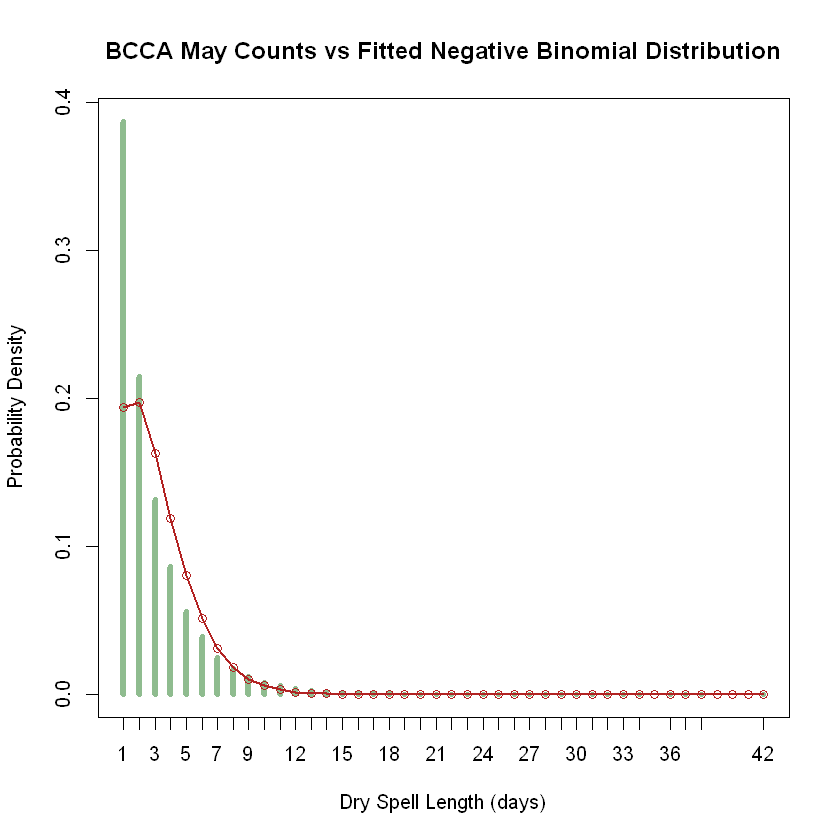

In [313]:
maxP <- max(dBCMay$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dMay_size, mu=BCfdNB_dMay_mu )
ttab <- table( dBCMay$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA May Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

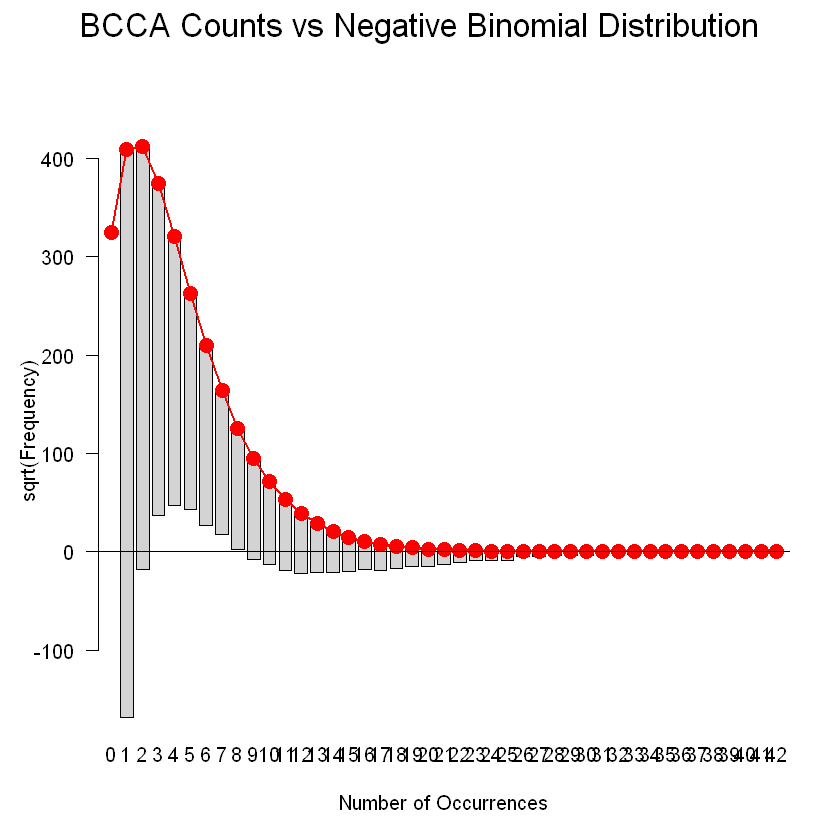

In [314]:
plot( BCgf_dMay, main="BCCA Counts vs Negative Binomial Distribution" )

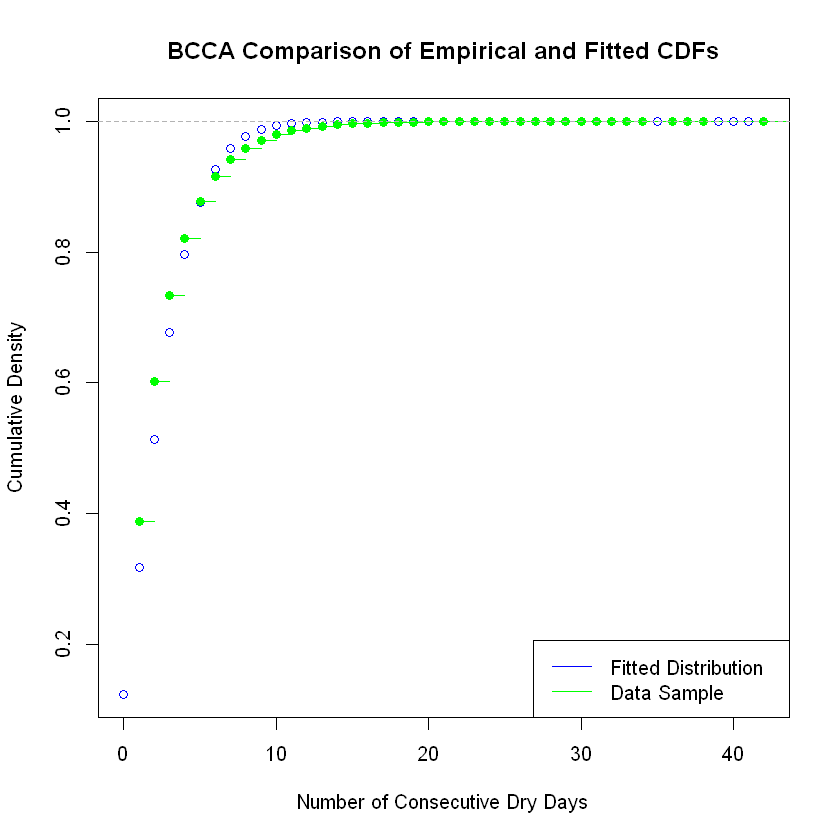

In [315]:
x <- seq(0,dBCMayMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dMay_mu, size=BCfdNB_dMay_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCMay$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

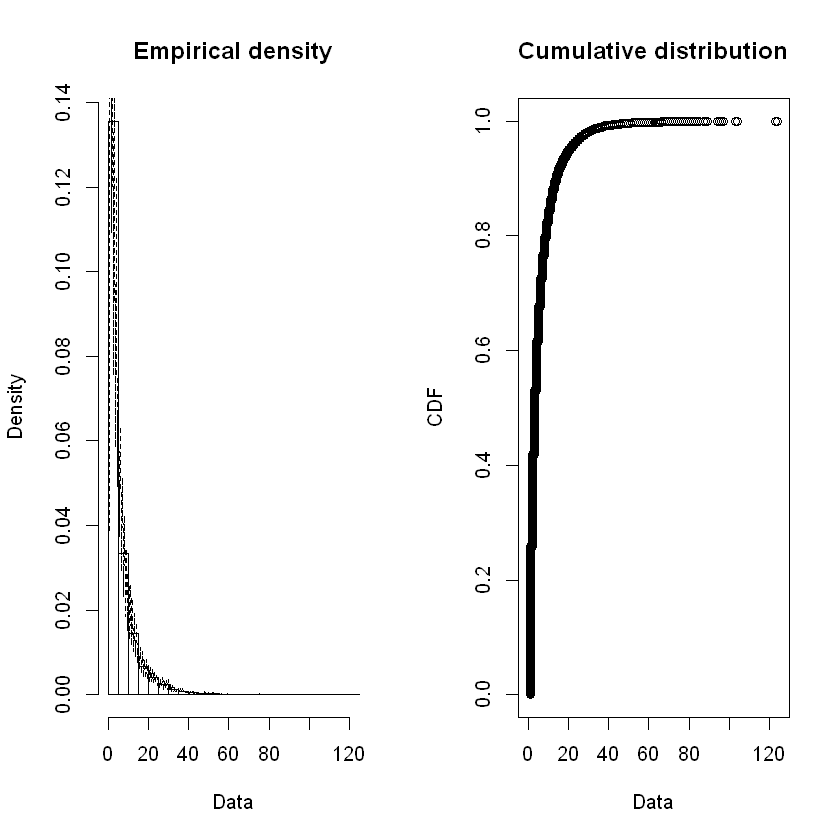

In [316]:
plotdist( dLOJun$Dry_Count, histo=TRUE, demp=TRUE )

In [317]:
LOfd_NB_dJun <- fitdist( dLOJun$Dry_Count, "nbinom" )
LOfd_GE_dJun <- fitdist( dLOJun$Dry_Count, "geom" )

In [318]:
LOfdNB_dJun_size <- LOfd_NB_dJun$estimate[["size"]]
LOfdNB_dJun_mu <- LOfd_NB_dJun$estimate[["mu"]]
cat("LOCA Jun size: ", LOfdNB_dJun_size, "\n", "LOCA Jun mu: ", LOfdNB_dJun_mu, "\n")

LOCA Jun size:  1.224845 
 LOCA Jun mu:  5.876823 


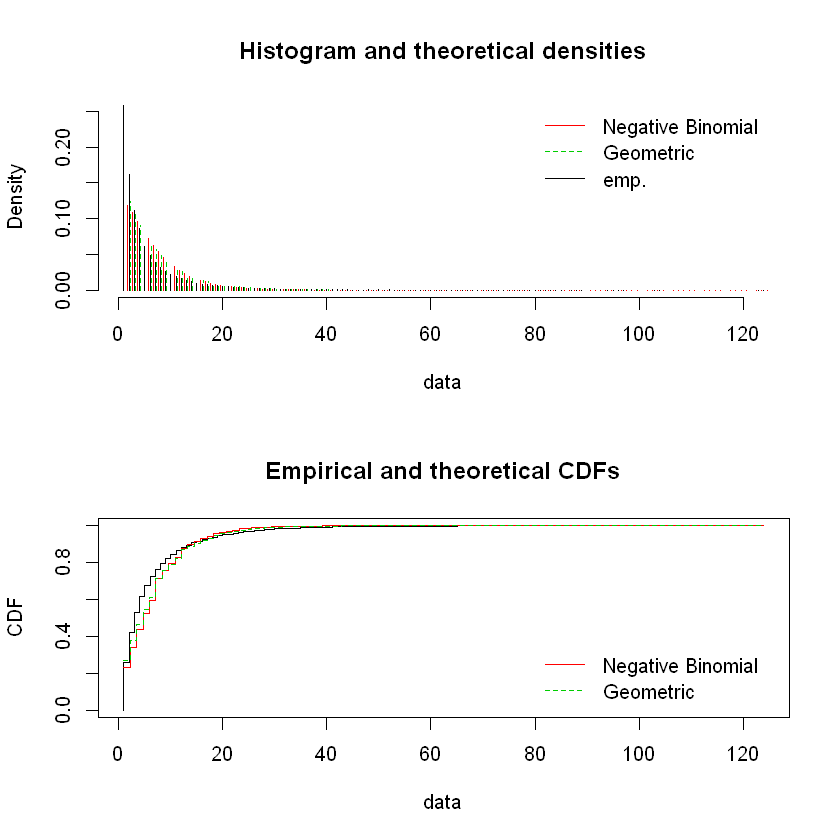

In [319]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dJun, LOfd_GE_dJun), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dJun, LOfd_GE_dJun), legendtext=plot.legend )

In [320]:
LOstatRes <- gofstat( list(LOfd_NB_dJun, LOfd_GE_dJun), fitnames=c("Negative Binomial", "Geometric") )

In [321]:
print( LOstatRes )

Chi-squared statistic:  222383.1 111354.9 
Degree of freedom of the Chi-squared distribution:  34 35 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     316602            287348.6037    331373.5231
<= 2     198188            133153.5945    130480.5855
<= 3     137407            118446.6363    111500.7968
<= 4     105140            103527.5099     95281.8202
<= 5      75047             89524.4009     81422.0662
<= 6      59758             76860.1033     69578.3608
<= 7      48203             65646.8221     59457.4484
<= 8      39074             55851.3522     50808.7302
<= 9      31424             47373.1769     43418.0601
<= 10     26820             40084.0406     37102.4415
<= 11     23210             33848.6546     31705.4969
<= 12     20512             28535.5190     27093.5952
<= 13     17349             24022.3375     23152.5437
<= 14     15643             20198.4025     19784.7600
<= 15     12105             16965.2746    

In [322]:
LOfdNB_dJun_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [323]:
LOfdNB_dJun_p = LOfdNB_dJun_size / (LOfdNB_dJun_size + LOfdNB_dJun_mu)
cat("LOCA prob: ", LOfdNB_dJun_p)

LOCA prob:  0.1724728

In [324]:
# add to our tracking dataframe
LOMonDistDF[6, ] <- list( 6, dLOJunMean, dLOJunBNr, LOfdNB_dJun_p, LOfdNB_dJun_mu, LOfdNB_dJun_size,
                          LOfdNB_dJun_pvalue )

In [325]:
LOgf_dJun <- goodfit( dLOJun$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dJun_size, prob=LOfdNB_dJun_p) )

In [326]:
summary( LOgf_dJun )


	 Goodness-of-fit test for nbinomial distribution

                       X^2  df P(> X^2)
Pearson          2213703.6 124        0
Likelihood Ratio  559587.2  95        0


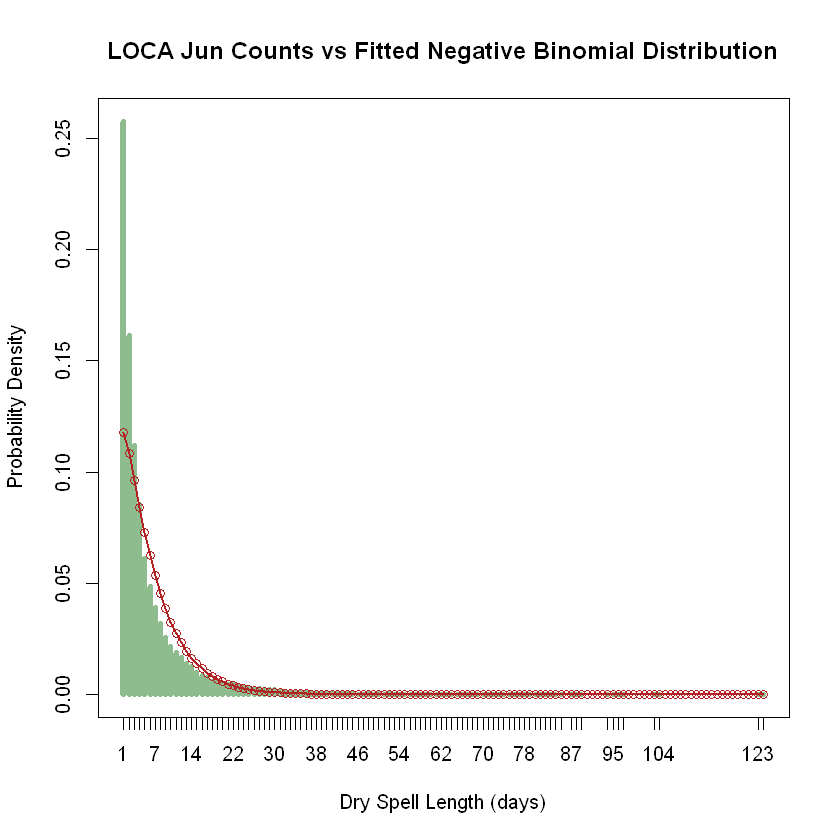

In [327]:
maxP <- max(dLOJun$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dJun_size, mu=LOfdNB_dJun_mu )
ttab <- table( dLOJun$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Jun Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

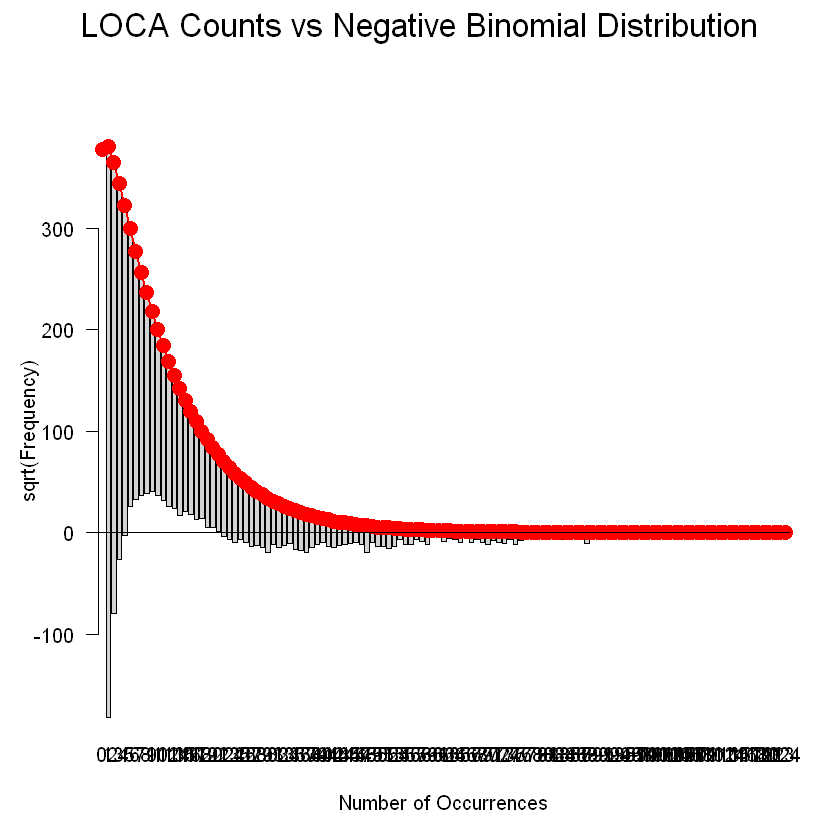

In [328]:
plot( LOgf_dJun, main="LOCA Counts vs Negative Binomial Distribution" )

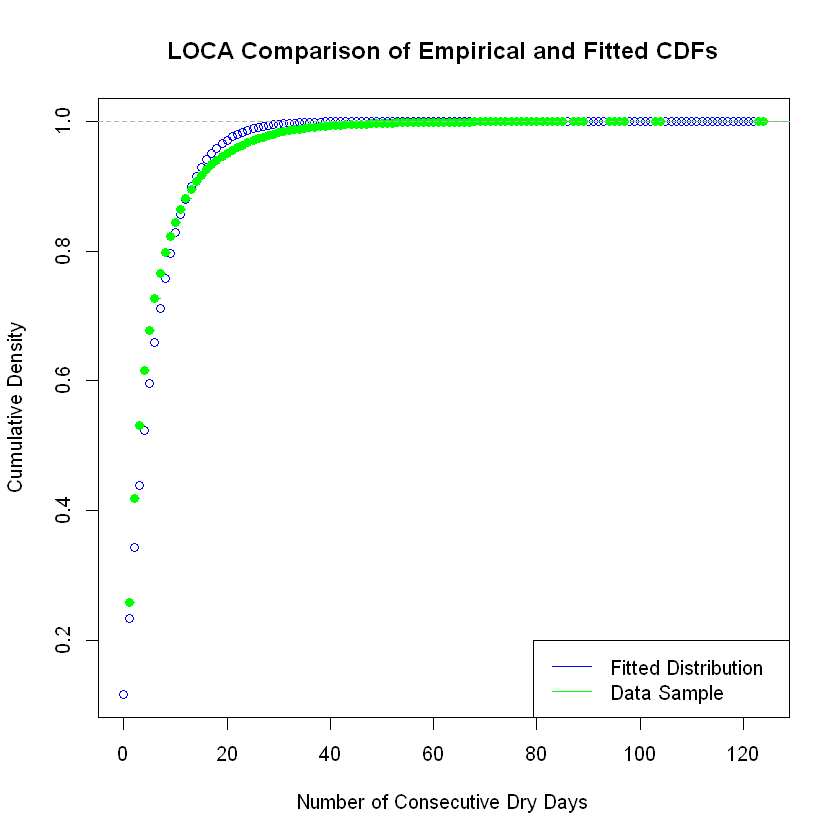

In [329]:
x <- seq(0,dLOJunMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dJun_mu, size=LOfdNB_dJun_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOJun$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

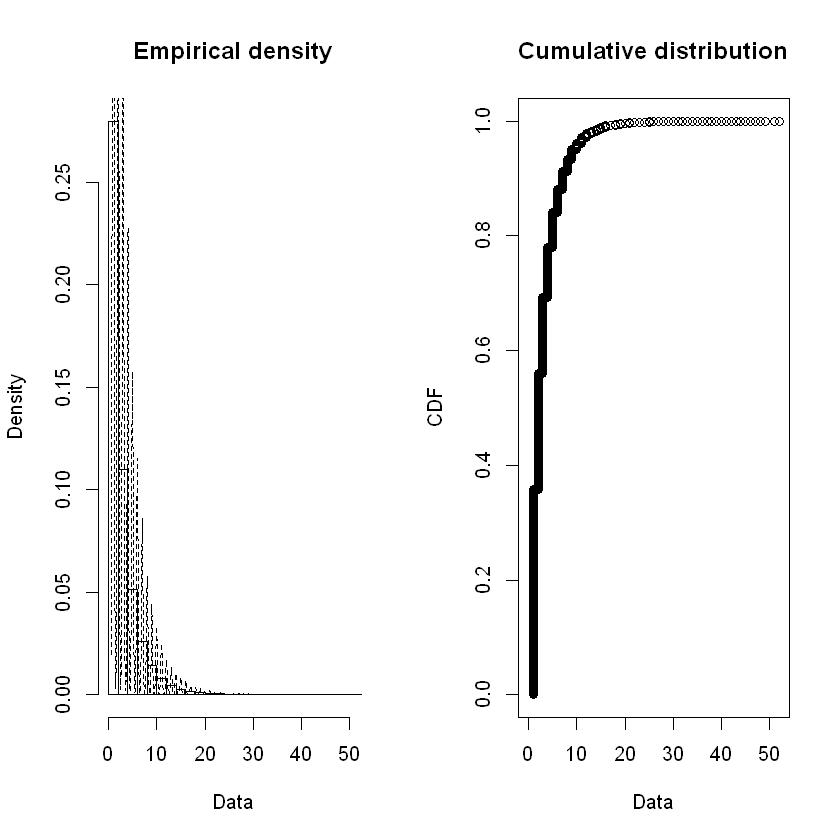

In [330]:
plotdist( dBCJun$Dry_Count, histo=TRUE, demp=TRUE )

In [331]:
BCfd_NB_dJun <- fitdist( dBCJun$Dry_Count, "nbinom" )
BCfd_GE_dJun <- fitdist( dBCJun$Dry_Count, "geom" )

In [332]:
summary( BCfd_NB_dJun )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate Std. Error
size 2.577125 0.00669612
mu   3.264041 0.00299440
Loglikelihood:  -1836177   AIC:  3672359   BIC:  3672382 
Correlation matrix:
             size           mu
size 1.0000000000 0.0001302838
mu   0.0001302838 1.0000000000


In [333]:
BCfdNB_dJun_size <- BCfd_NB_dJun$estimate[["size"]]
BCfdNB_dJun_mu <- BCfd_NB_dJun$estimate[["mu"]]
cat("BCCA Jun size: ", BCfdNB_dJun_size, "\n", "BCCA Jun mu: ", BCfdNB_dJun_mu, "\n")

BCCA Jun size:  2.577125 
 BCCA Jun mu:  3.264041 


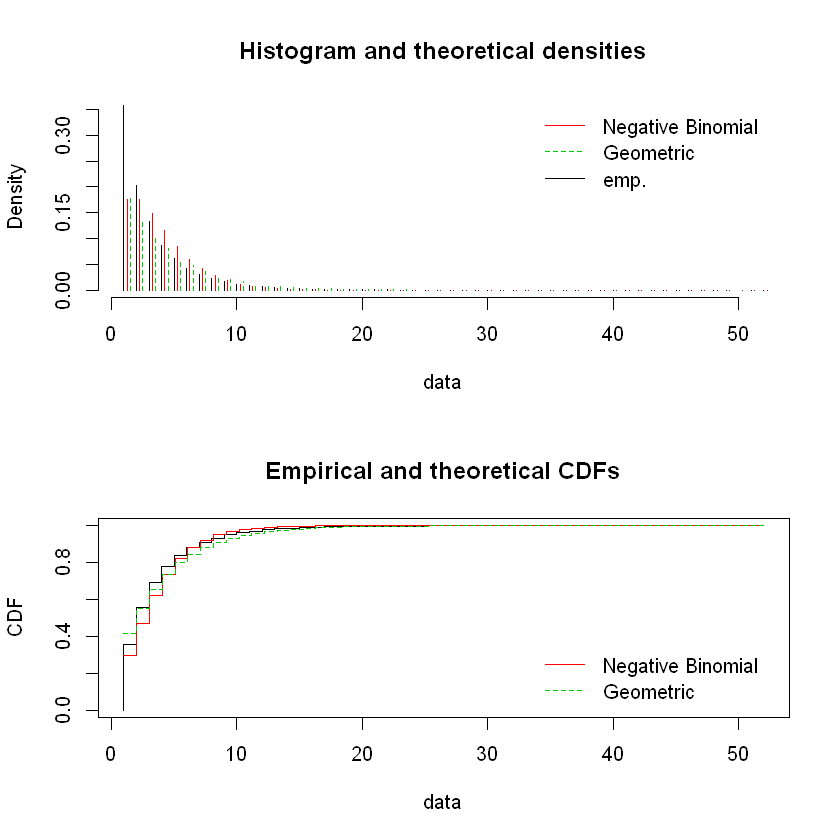

In [334]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dJun, BCfd_GE_dJun), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dJun, BCfd_GE_dJun), legendtext=plot.legend )

In [335]:
BCstatRes <- gofstat( list(BCfd_NB_dJun, BCfd_GE_dJun), fitnames=c("Negative Binomial", "Geometric") )

In [336]:
print(BCstatRes)

Chi-squared statistic:  115753 46067.12 
Degree of freedom of the Chi-squared distribution:  15 16 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     294660            244361.8391     341555.961
<= 2     166860            144137.8647     113365.385
<= 3     109839            122886.9110      86780.683
<= 4      71497             95744.1046      66430.216
<= 5      50506             70377.5528      50852.026
<= 6      34191             49664.1940      38926.993
<= 7      24597             34005.0268      29798.435
<= 8      17961             22748.0576      22810.565
<= 9      13778             14939.1359      17461.383
<= 10      9811              9664.5632      13366.609
<= 11      7695              6174.8577      10232.078
<= 12      5362              3903.9977       7832.609
<= 13      3935              2446.2121       5995.826
<= 14      3195              1520.9307       4589.778
<= 15      2495               939.2547      

In [337]:
BCfdNB_dJun_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [338]:
BCfdNB_dJun_p = BCfdNB_dJun_size / (BCfdNB_dJun_size + BCfdNB_dJun_mu)
cat("BCCA prob: ", BCfdNB_dJun_p)

BCCA prob:  0.4412005

In [339]:
# add to our tracking dataframe
BCMonDistDF[6, ] <- list( 6, dBCJunMean, dBCJunBNr, BCfdNB_dJun_p, BCfdNB_dJun_mu, BCfdNB_dJun_size,
                          BCfdNB_dJun_pvalue )

In [340]:
BCgf_dJun <- goodfit( dBCJun$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dJun_size, prob=BCfdNB_dJun_p) )

In [341]:
summary( BCgf_dJun )


	 Goodness-of-fit test for nbinomial distribution

                       X^2 df P(> X^2)
Pearson          4447948.2 52        0
Likelihood Ratio  376279.5 50        0


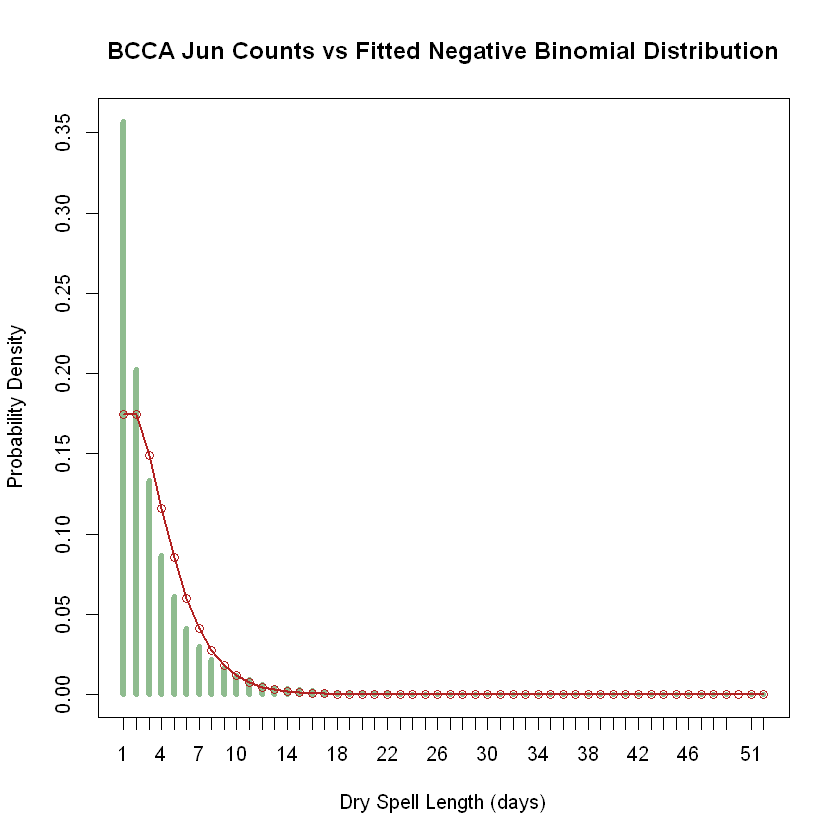

In [342]:
maxP <- max(dBCJun$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dJun_size, mu=BCfdNB_dJun_mu )
ttab <- table( dBCJun$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Jun Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

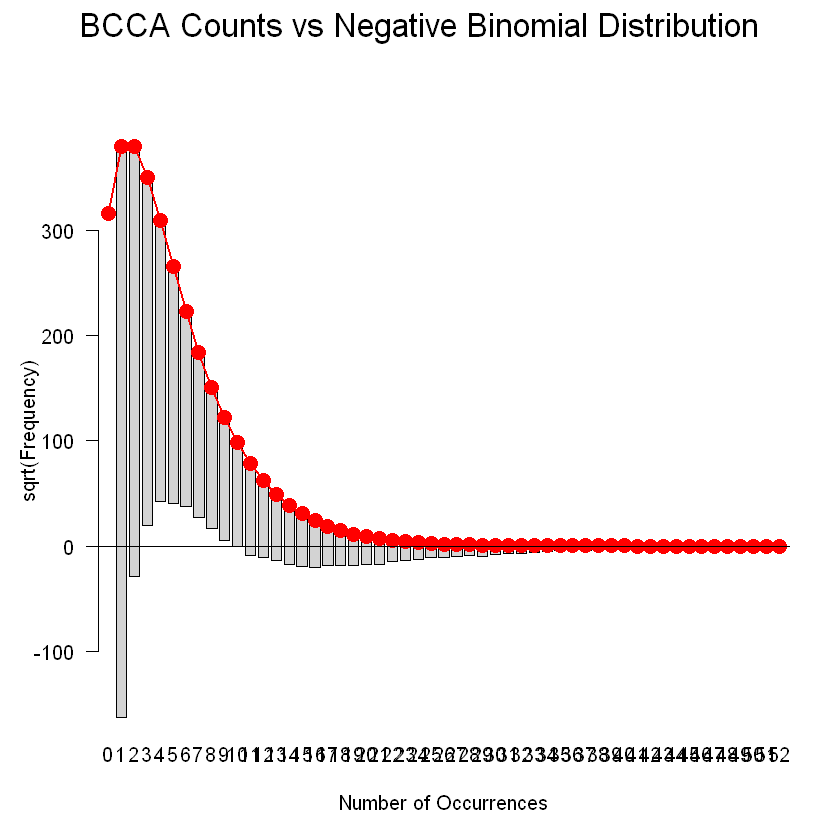

In [343]:
plot( BCgf_dJun, main="BCCA Counts vs Negative Binomial Distribution" )

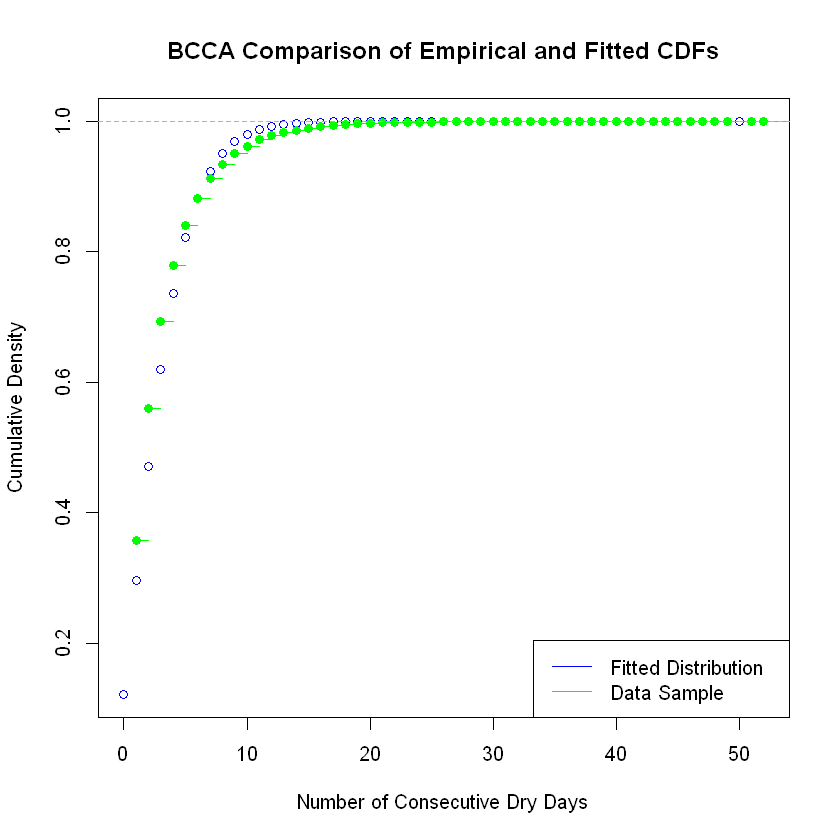

In [344]:
x <- seq(0,dBCJunMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dJun_mu, size=BCfdNB_dJun_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCJun$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

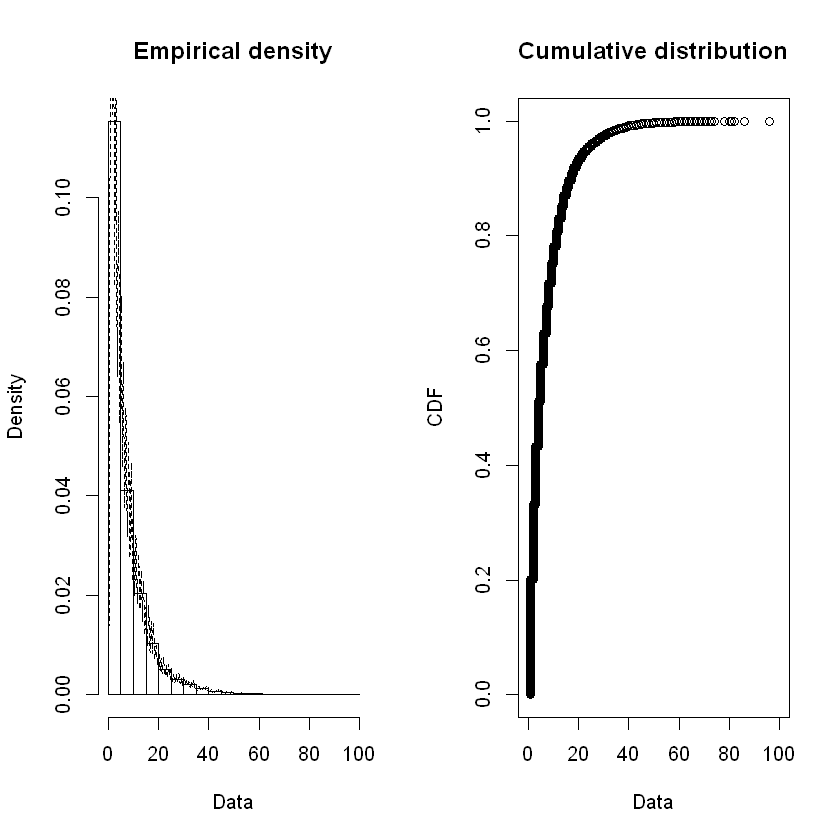

In [345]:
plotdist( dLOJul$Dry_Count, histo=TRUE, demp=TRUE )

In [346]:
LOfd_NB_dJul <- fitdist( dLOJul$Dry_Count, "nbinom" )
LOfd_GE_dJul <- fitdist( dLOJul$Dry_Count, "geom" )

In [347]:
LOfdNB_dJul_size <- LOfd_NB_dJul$estimate[["size"]]
LOfdNB_dJul_mu <- LOfd_NB_dJul$estimate[["mu"]]
cat("LOCA Jul size: ", LOfdNB_dJul_size, "\n", "LOCA Jul mu: ", LOfdNB_dJul_mu, "\n")

LOCA Jul size:  1.293153 
 LOCA Jul mu:  7.151572 


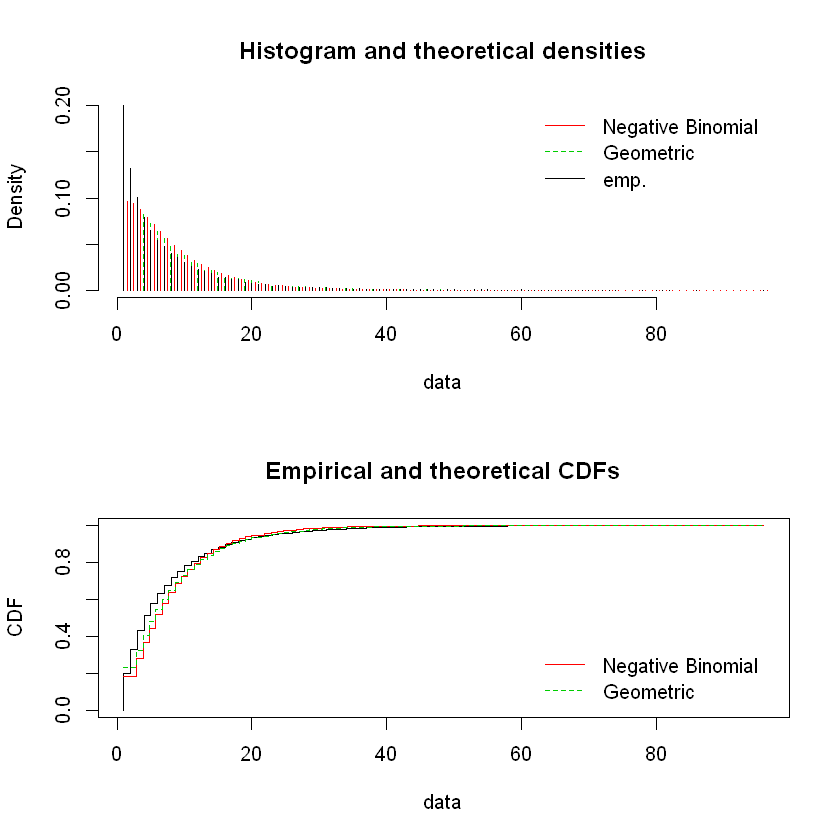

In [348]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dJul, LOfd_GE_dJul), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dJul, LOfd_GE_dJul), legendtext=plot.legend )

In [349]:
LOstatRes <- gofstat( list(LOfd_NB_dJul, LOfd_GE_dJul), fitnames=c("Negative Binomial", "Geometric") )

In [350]:
print( LOstatRes )

Chi-squared statistic:  63271.38 33083.36 
Degree of freedom of the Chi-squared distribution:  36 37 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     201761            186662.0729    232262.6618
<= 2     132878             94739.2692     95227.0657
<= 3     101914             88071.7681     83545.0173
<= 4      79898             80051.4330     73296.0725
<= 5      65173             71767.7892     64304.4244
<= 6      54237             63747.4209     56415.8331
<= 7      47335             56246.5527     49494.9804
<= 8      40371             49378.9221     43423.1483
<= 9      35402             43179.5574     38096.1825
<= 10     30006             37639.3934     33422.7060
<= 11     26095             32725.1121     29322.5516
<= 12     23175             28390.9015     25725.3866
<= 13     20351             24585.5445     22569.5064
<= 14     18655             21256.6996     19800.7761
<= 15     14357             18353.4455    

In [351]:
LOfdNB_dJul_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [352]:
LOfdNB_dJul_p = LOfdNB_dJul_size / (LOfdNB_dJul_size + LOfdNB_dJul_mu)
cat("LOCA prob: ", LOfdNB_dJul_p)

LOCA prob:  0.1531315

In [353]:
# add to our tracking dataframe
LOMonDistDF[7, ] <- list( 7, dLOJulMean, dLOJulBNr, LOfdNB_dJul_p, LOfdNB_dJul_mu, LOfdNB_dJul_size,
                          LOfdNB_dJul_pvalue )

In [354]:
LOgf_dJul <- goodfit( dLOJul$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dJul_size, prob=LOfdNB_dJul_p) )

In [355]:
summary( LOgf_dJul )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          274939.3 96        0
Likelihood Ratio 313172.1 79        0


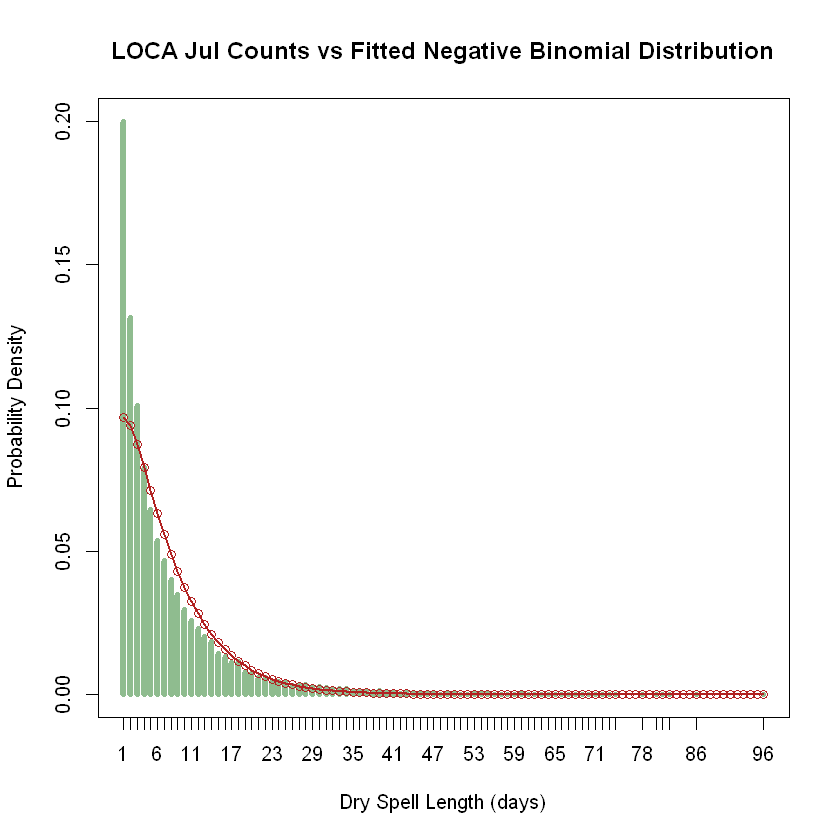

In [356]:
maxP <- max(dLOJul$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dJul_size, mu=LOfdNB_dJul_mu )
ttab <- table( dLOJul$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Jul Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

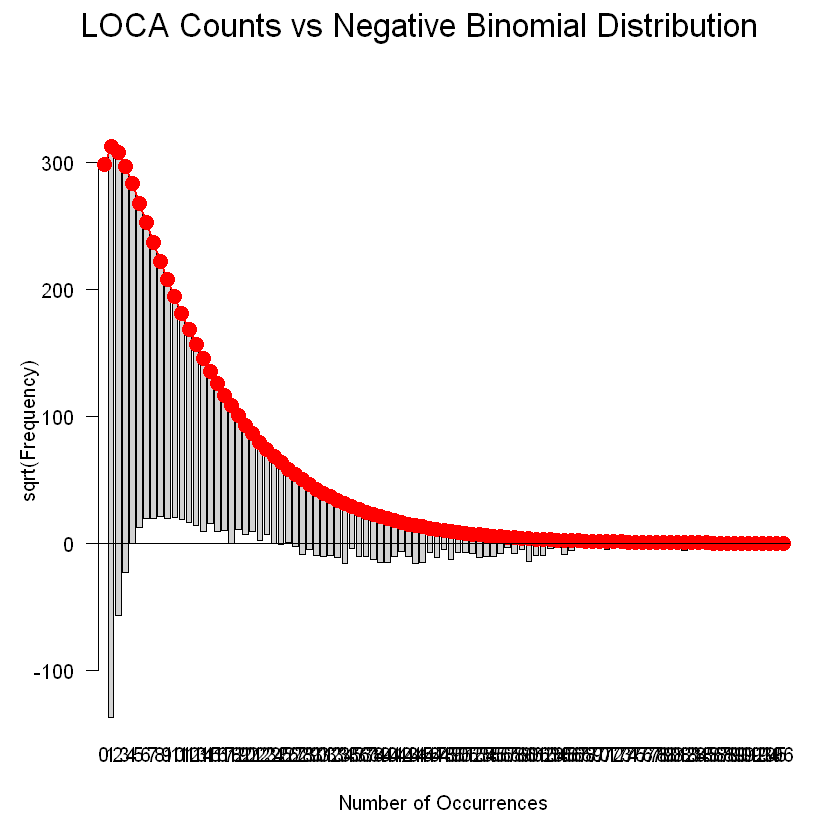

In [357]:
plot( LOgf_dJul, main="LOCA Counts vs Negative Binomial Distribution" )

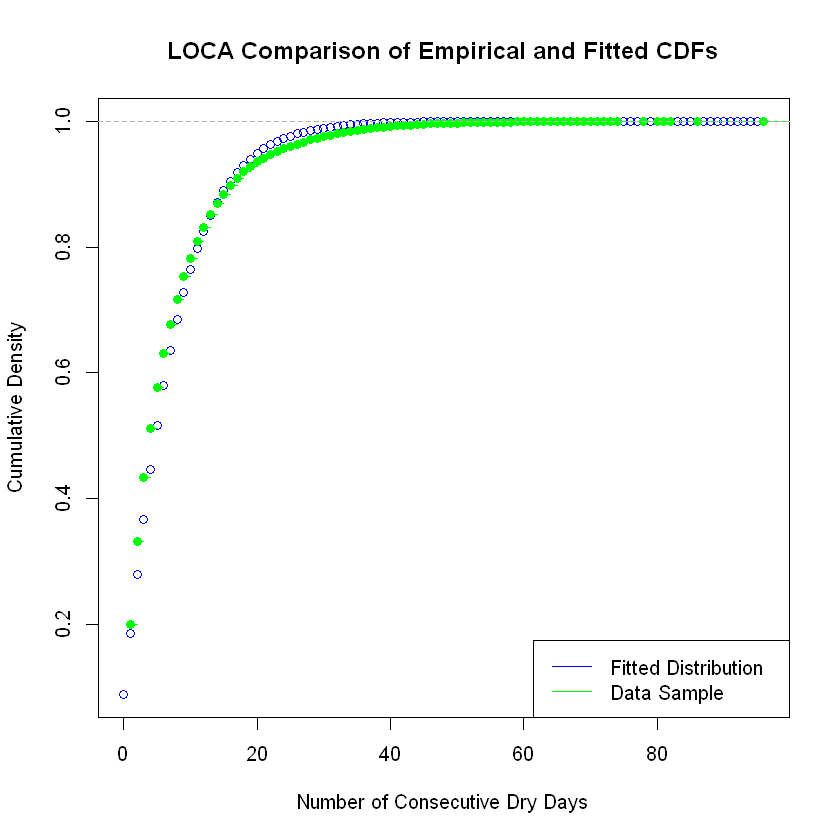

In [358]:
x <- seq(0,dLOJulMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dJul_mu, size=LOfdNB_dJul_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOJul$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

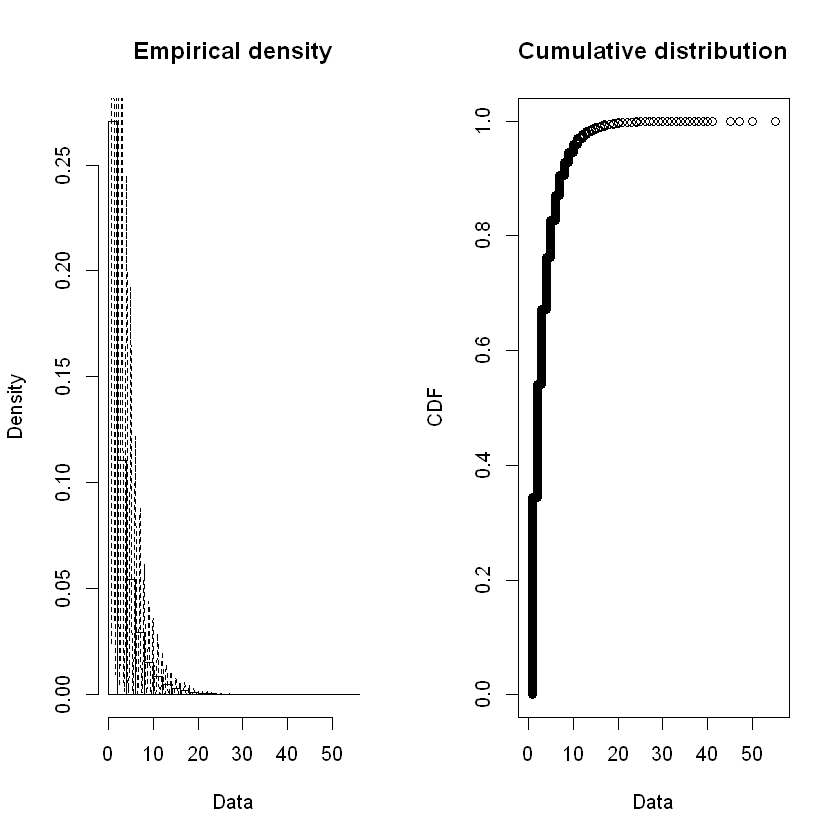

In [359]:
plotdist( dBCJul$Dry_Count, histo=TRUE, demp=TRUE )

In [360]:
BCfd_NB_dJul <- fitdist( dBCJul$Dry_Count, "nbinom" )
BCfd_GE_dJul <- fitdist( dBCJul$Dry_Count, "geom" )

In [361]:
summary( BCfd_NB_dJul )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 2.578682 0.006553046
mu   3.375061 0.003022587
Loglikelihood:  -1922421   AIC:  3844846   BIC:  3844869 
Correlation matrix:
             size           mu
size 1.000000e+00 7.574274e-05
mu   7.574274e-05 1.000000e+00


In [362]:
BCfdNB_dJul_size <- BCfd_NB_dJul$estimate[["size"]]
BCfdNB_dJul_mu <- BCfd_NB_dJul$estimate[["mu"]]
cat("BCCA Jul size: ", BCfdNB_dJul_size, "\n", "BCCA Jul mu: ", BCfdNB_dJul_mu, "\n")

BCCA Jul size:  2.578682 
 BCCA Jul mu:  3.375061 


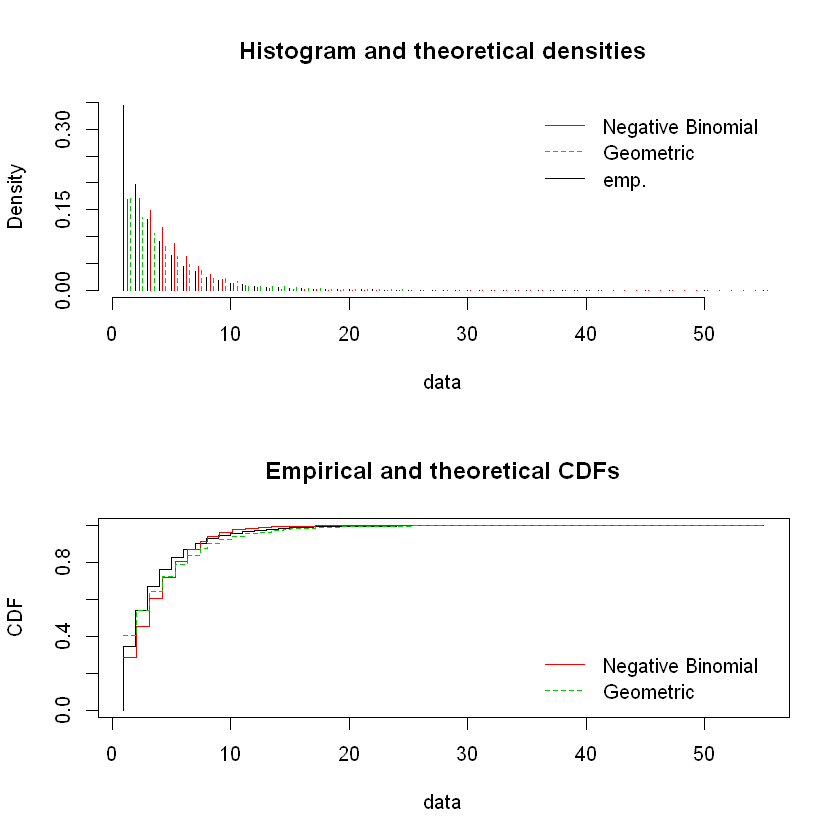

In [363]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dJul, BCfd_GE_dJul), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dJul, BCfd_GE_dJul), legendtext=plot.legend )

In [364]:
BCstatRes <- gofstat( list(BCfd_NB_dJul, BCfd_GE_dJul), fitnames=c("Negative Binomial", "Geometric") )

In [365]:
print(BCstatRes)

Chi-squared statistic:  81746.25 45184.68 
Degree of freedom of the Chi-squared distribution:  15 16 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     293194            242697.1894     345311.414
<= 2     168435            146179.0577     116008.243
<= 3     111770            126472.4522      89493.407
<= 4      76814             99990.5853      69038.799
<= 5      54703             74579.5157      53259.296
<= 6      37676             53401.5119      41086.355
<= 7      29503             37099.4647      31695.660
<= 8      20168             25181.1160      24451.302
<= 9      14675             16778.5949      18862.714
<= 10     11399             11013.0162      14551.453
<= 11      8305              7139.0479      11225.574
<= 12      6217              4579.3963       8659.858
<= 13      4731              2911.2179       6680.561
<= 14      3590              1836.4070       5153.652
<= 15      2707              1150.5864    

In [366]:
BCfdNB_dJul_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [367]:
BCfdNB_dJul_p = BCfdNB_dJul_size / (BCfdNB_dJul_size + BCfdNB_dJul_mu)
cat("BCCA prob: ", BCfdNB_dJul_p)

BCCA prob:  0.4331194

In [368]:
# add to our tracking dataframe
BCMonDistDF[7, ] <- list( 7, dBCJulMean, dBCJulBNr, BCfdNB_dJul_p, BCfdNB_dJul_mu, BCfdNB_dJul_size,
                          BCfdNB_dJul_pvalue )

In [369]:
BCgf_dJul <- goodfit( dBCJul$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dJul_size, prob=BCfdNB_dJul_p) )

In [370]:
summary( BCgf_dJul )


	 Goodness-of-fit test for nbinomial distribution

                       X^2 df P(> X^2)
Pearson          1575824.3 55        0
Likelihood Ratio  363808.9 44        0


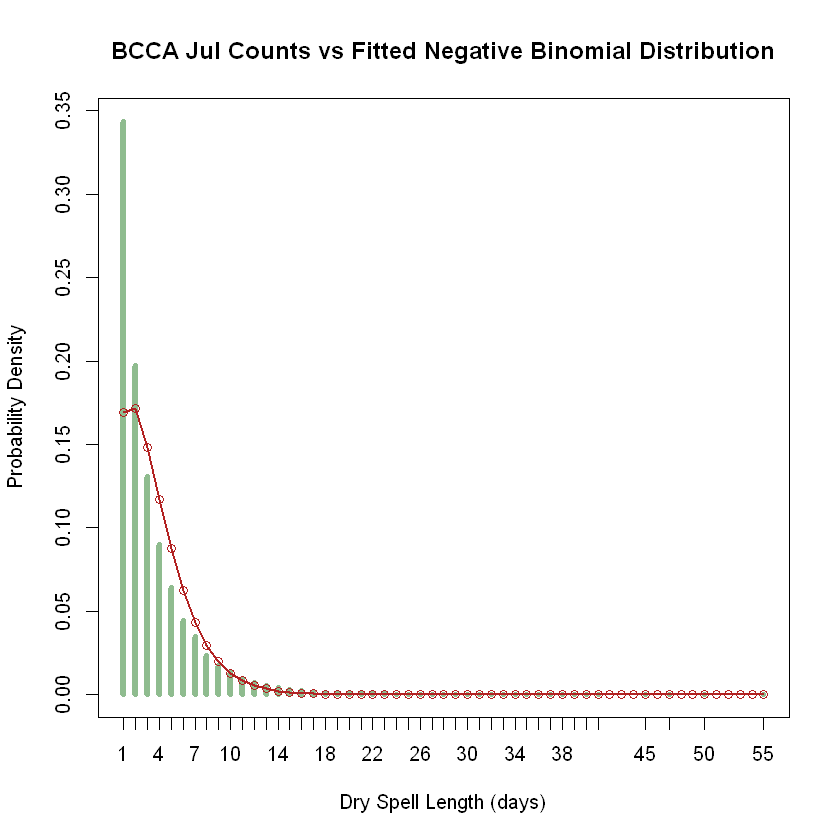

In [371]:
maxP <- max(dBCJul$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dJul_size, mu=BCfdNB_dJul_mu )
ttab <- table( dBCJul$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Jul Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

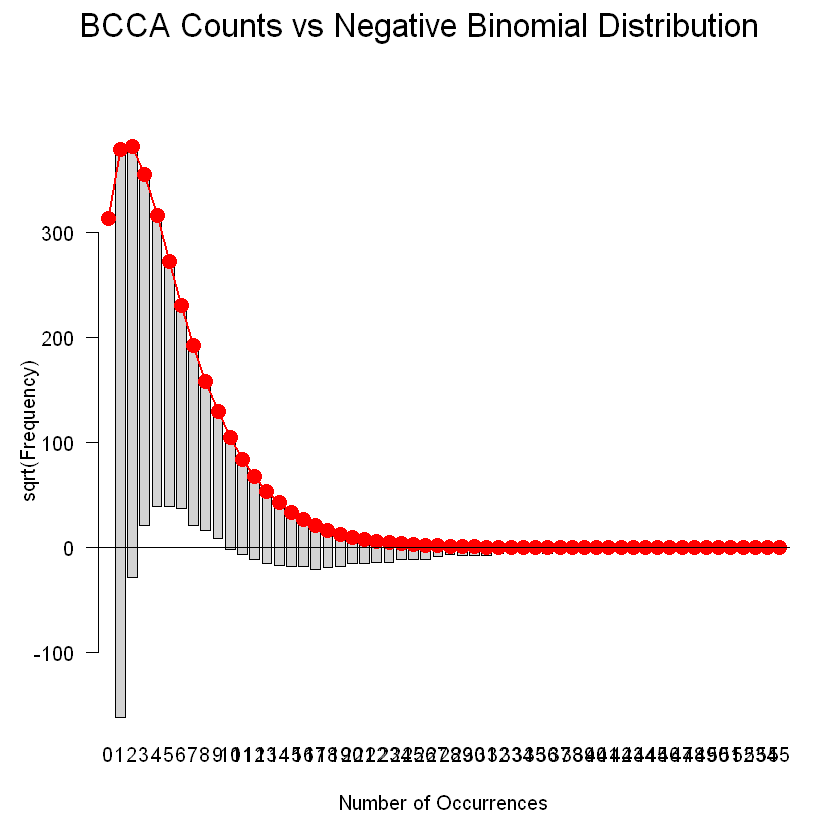

In [372]:
plot( BCgf_dJul, main="BCCA Counts vs Negative Binomial Distribution" )

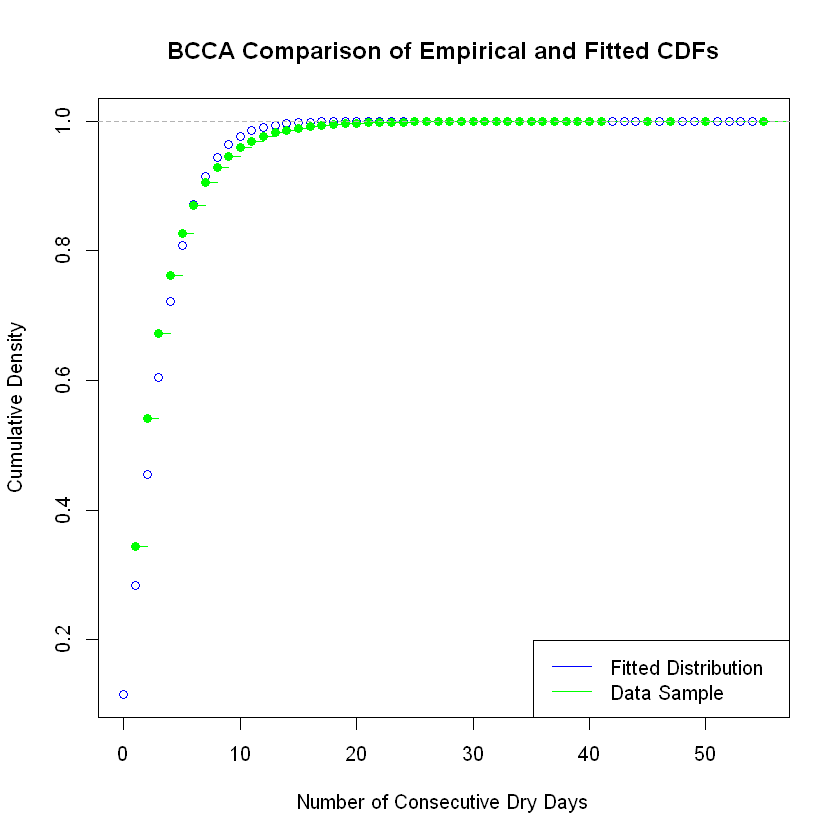

In [373]:
x <- seq(0,dBCJulMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dJul_mu, size=BCfdNB_dJul_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCJul$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

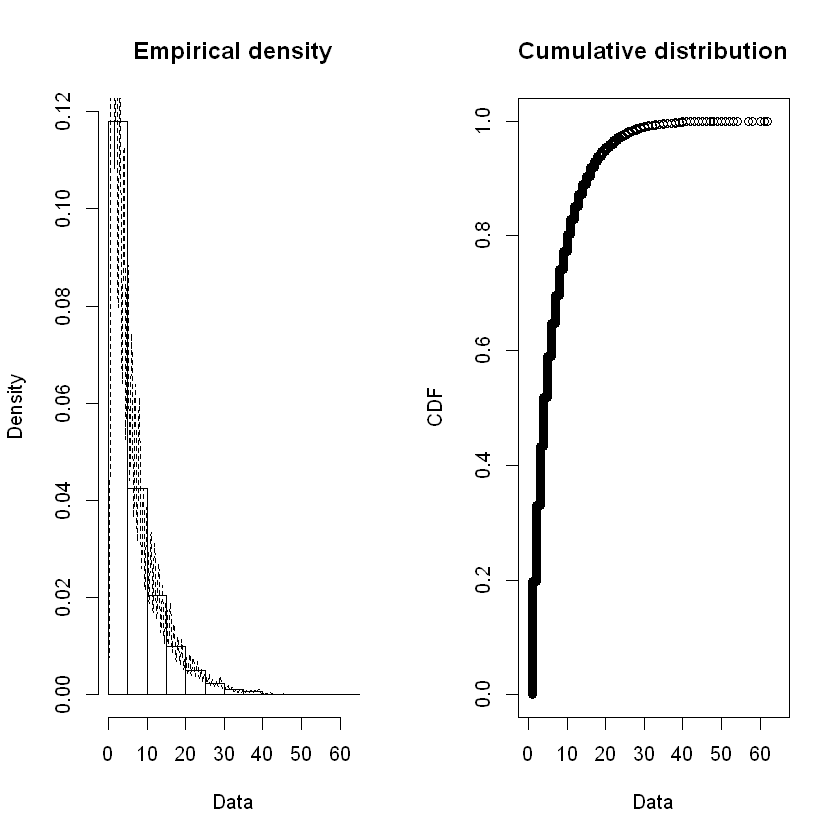

In [374]:
plotdist( dLOAug$Dry_Count, histo=TRUE, demp=TRUE )

In [375]:
LOfd_NB_dAug <- fitdist( dLOAug$Dry_Count, "nbinom" )
LOfd_GE_dAug <- fitdist( dLOAug$Dry_Count, "geom" )

In [376]:
LOfdNB_dAug_size <- LOfd_NB_dAug$estimate[["size"]]
LOfdNB_dAug_mu <- LOfd_NB_dAug$estimate[["mu"]]
cat("LOCA Aug size: ", LOfdNB_dAug_size, "\n", "LOCA Aug mu: ", LOfdNB_dAug_mu, "\n")

LOCA Aug size:  1.522653 
 LOCA Aug mu:  6.493975 


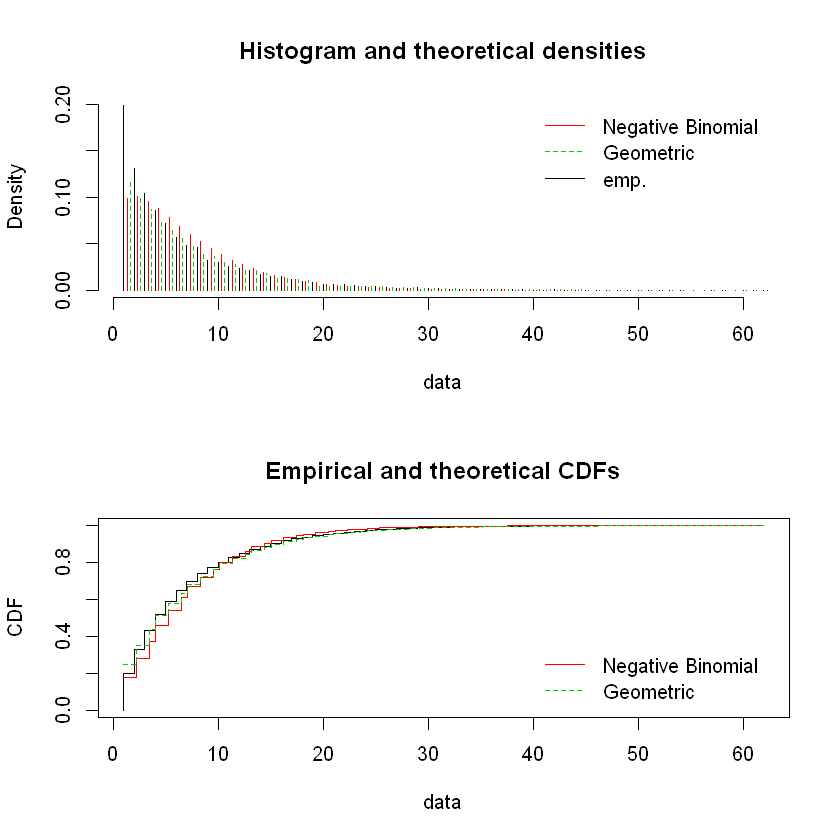

In [377]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dAug, LOfd_GE_dAug), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dAug, LOfd_GE_dAug), legendtext=plot.legend )

In [378]:
LOstatRes <- gofstat( list(LOfd_NB_dAug, LOfd_GE_dAug), fitnames=c("Negative Binomial", "Geometric") )

In [379]:
print( LOstatRes )

Chi-squared statistic:  37769.95 29139.02 
Degree of freedom of the Chi-squared distribution:  29 30 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     204648            183876.8140     257233.056
<= 2     135546            103757.1415     103484.957
<= 3     107126             98692.8108      89675.269
<= 4      88516             90393.6023      77708.433
<= 5      73616             80878.7330      67338.527
<= 6      58732             71223.9824      58352.447
<= 7      49976             62003.7745      50565.527
<= 8      47158             53508.3834      43817.743
<= 9      33131             45862.3349      37970.426
<= 10     30631             39093.1162      32903.411
<= 11     26136             33172.5584      28512.572
<= 12     24544             28042.2557      24707.673
<= 13     21344             23629.2737      21410.525
<= 14     17430             19855.7901      18553.369
<= 15     15702             16644.8827    

In [380]:
LOfdNB_dAug_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [381]:
LOfdNB_dAug_p = LOfdNB_dAug_size / (LOfdNB_dAug_size + LOfdNB_dAug_mu)
cat("LOCA prob: ", LOfdNB_dAug_p)

LOCA prob:  0.1899369

In [382]:
# add to our tracking dataframe
LOMonDistDF[8, ] <- list( 8, dLOAugMean, dLOAugBNr, LOfdNB_dAug_p, LOfdNB_dAug_mu, LOfdNB_dAug_size,
                          LOfdNB_dAug_pvalue )

In [383]:
LOgf_dAug <- goodfit( dLOAug$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dAug_size, prob=LOfdNB_dAug_p) )

In [384]:
summary( LOgf_dAug )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          226301.0 62        0
Likelihood Ratio 280086.3 58        0


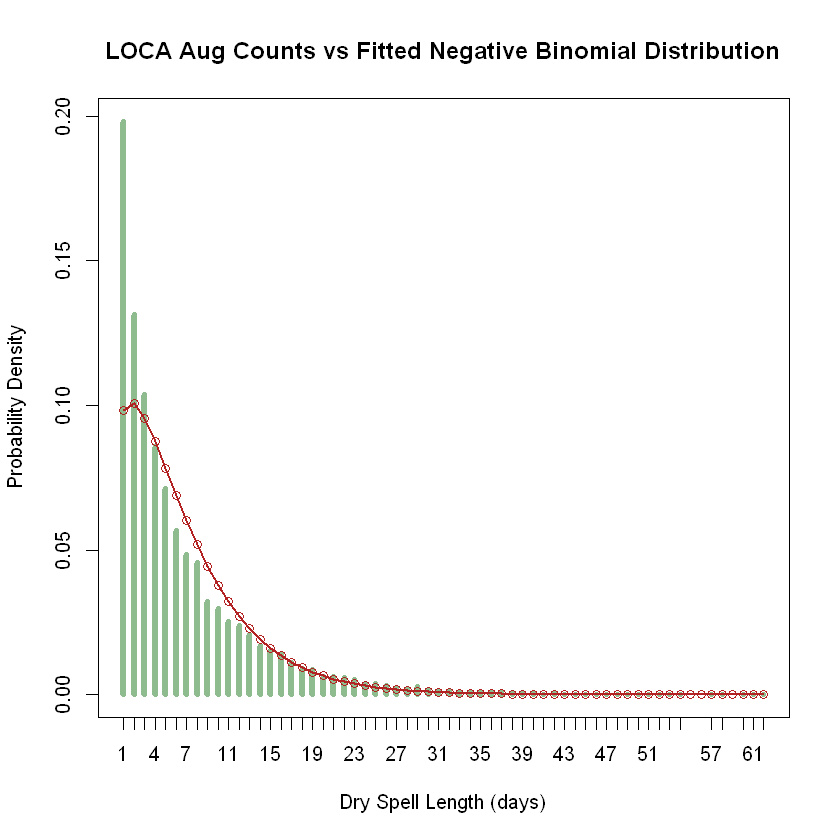

In [385]:
maxP <- max(dLOAug$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dAug_size, mu=LOfdNB_dAug_mu )
ttab <- table( dLOAug$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Aug Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

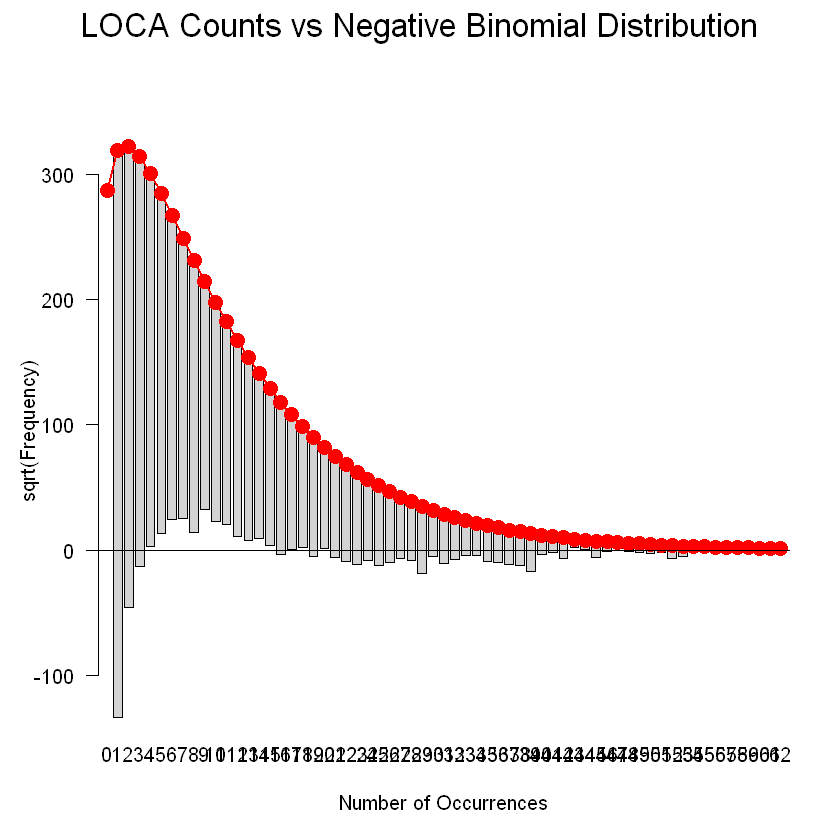

In [386]:
plot( LOgf_dAug, main="LOCA Counts vs Negative Binomial Distribution" )

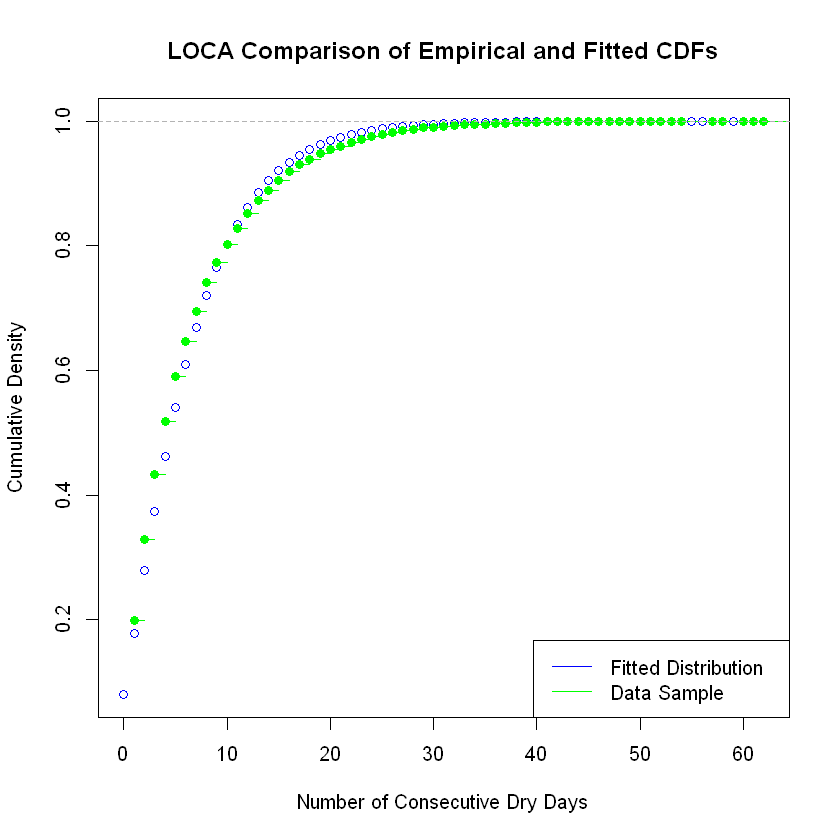

In [387]:
x <- seq(0,dLOAugMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dAug_mu, size=LOfdNB_dAug_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOAug$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

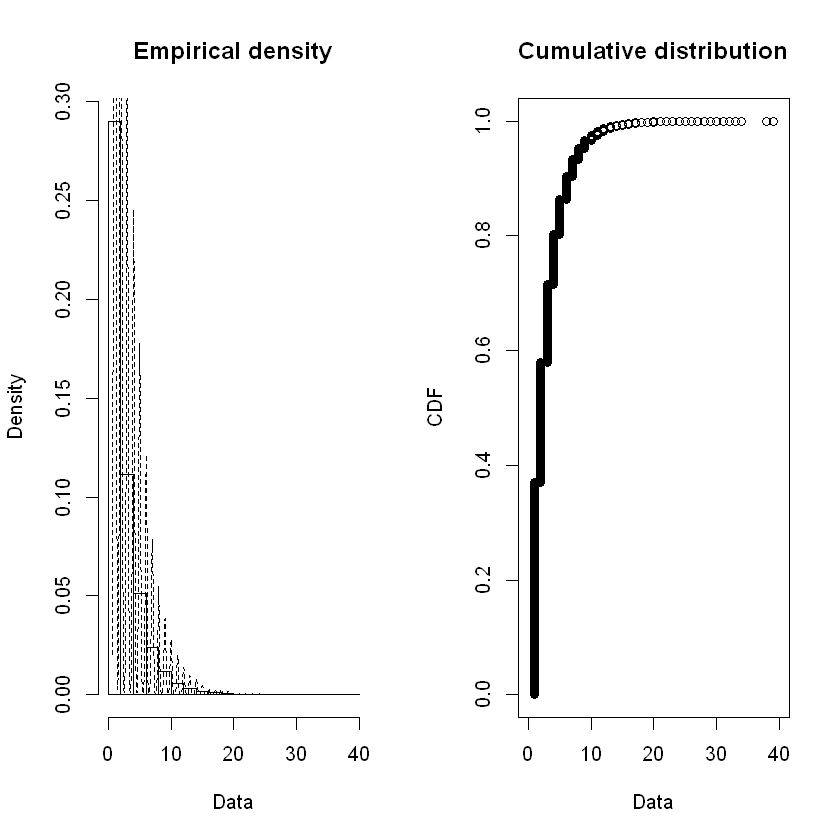

In [388]:
plotdist( dBCAug$Dry_Count, histo=TRUE, demp=TRUE )

In [389]:
BCfd_NB_dAug <- fitdist( dBCAug$Dry_Count, "nbinom" )
BCfd_GE_dAug <- fitdist( dBCAug$Dry_Count, "geom" )

In [390]:
summary( BCfd_NB_dAug )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 3.294195 0.009757956
mu   3.002607 0.002575636
Loglikelihood:  -1835733   AIC:  3671471   BIC:  3671494 
Correlation matrix:
              size            mu
size  1.000000e+00 -3.365471e-05
mu   -3.365471e-05  1.000000e+00


In [391]:
BCfdNB_dAug_size <- BCfd_NB_dAug$estimate[["size"]]
BCfdNB_dAug_mu <- BCfd_NB_dAug$estimate[["mu"]]
cat("BCCA Aug size: ", BCfdNB_dAug_size, "\n", "BCCA Aug mu: ", BCfdNB_dAug_mu, "\n")

BCCA Aug size:  3.294195 
 BCCA Aug mu:  3.002607 


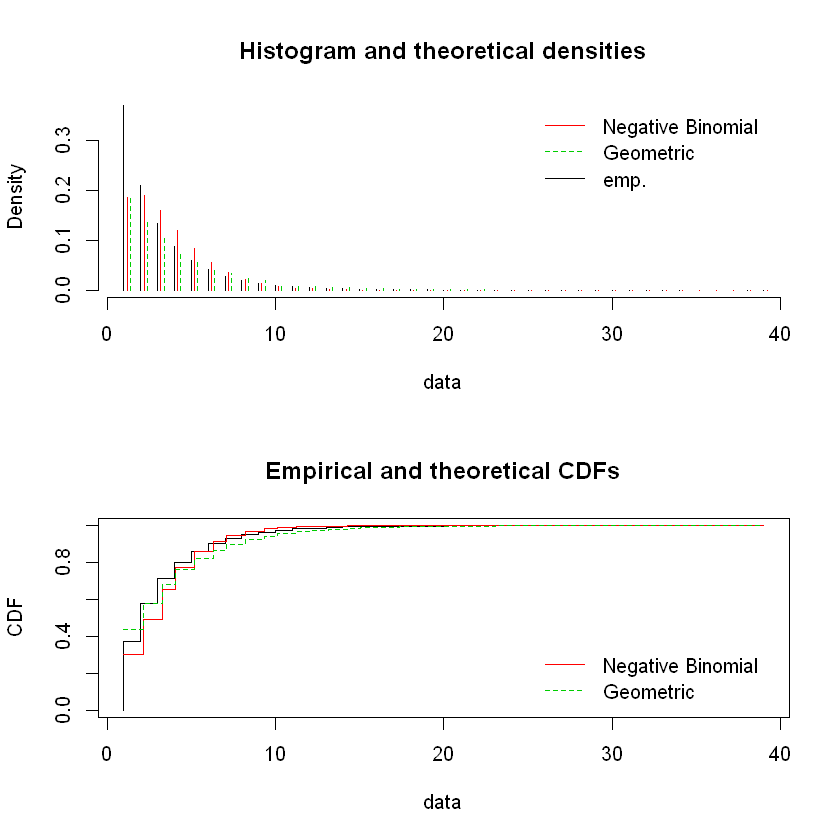

In [392]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dAug, BCfd_GE_dAug), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dAug, BCfd_GE_dAug), legendtext=plot.legend )

In [393]:
BCstatRes <- gofstat( list(BCfd_NB_dAug, BCfd_GE_dAug), fitnames=c("Negative Binomial", "Geometric") )

In [394]:
print(BCstatRes)

Chi-squared statistic:  119400.5 57187.99 
Degree of freedom of the Chi-squared distribution:  14 15 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     320476           263205.83237     378315.627
<= 2     181439           164657.27988     121641.952
<= 3     116499           138560.05101      91250.800
<= 4      76031           103967.27500      68452.604
<= 5      52362            72324.00281      51350.334
<= 6      35789            47674.25077      38520.913
<= 7      24302            30183.94841      28896.808
<= 8      16947            18520.67832      21677.199
<= 9      11980            11082.76432      16261.345
<= 10      8542             6497.20594      12198.594
<= 11      5713             3744.33271       9150.884
<= 12      4110             2126.82290       6864.618
<= 13      2964             1193.14449       5149.554
<= 14      2312              662.18045       3862.984
<= 16      2477              562.54103    

In [395]:
BCfdNB_dAug_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [396]:
BCfdNB_dAug_p = BCfdNB_dAug_size / (BCfdNB_dAug_size + BCfdNB_dAug_mu)
cat("BCCA prob: ", BCfdNB_dAug_p)

BCCA prob:  0.5231537

In [397]:
# add to our tracking dataframe
BCMonDistDF[8, ] <- list( 8, dBCAugMean, dBCAugBNr, BCfdNB_dAug_p, BCfdNB_dAug_mu, BCfdNB_dAug_size,
                          BCfdNB_dAug_pvalue )

In [398]:
BCgf_dAug <- goodfit( dBCAug$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dAug_size, prob=BCfdNB_dAug_p) )

In [399]:
summary( BCgf_dAug )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          595971.0 39        0
Likelihood Ratio 376021.3 35        0


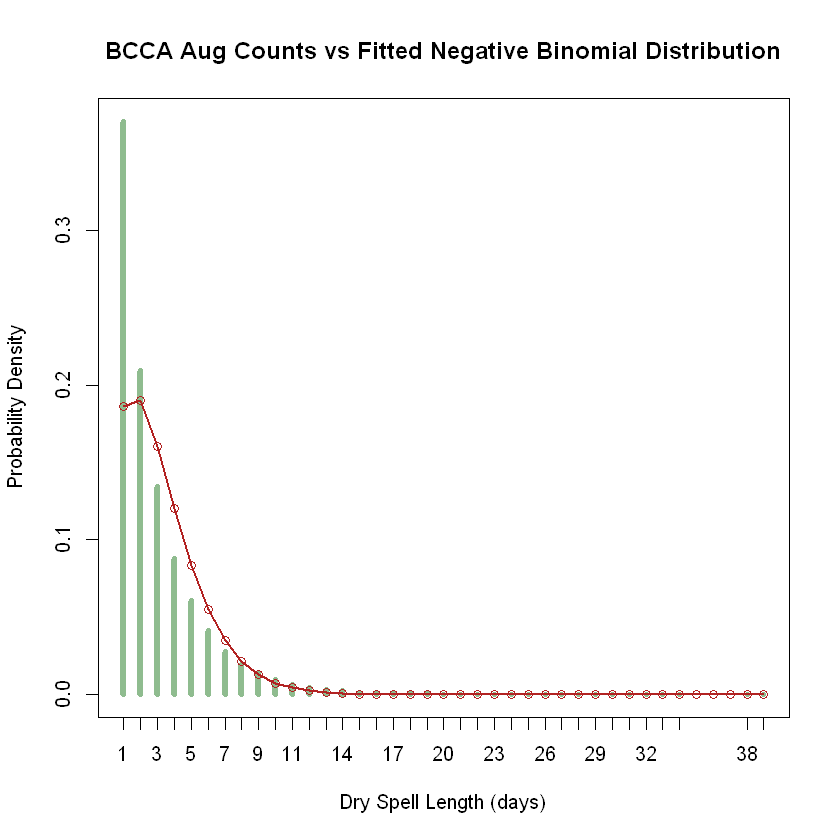

In [400]:
maxP <- max(dBCAug$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dAug_size, mu=BCfdNB_dAug_mu )
ttab <- table( dBCAug$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Aug Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

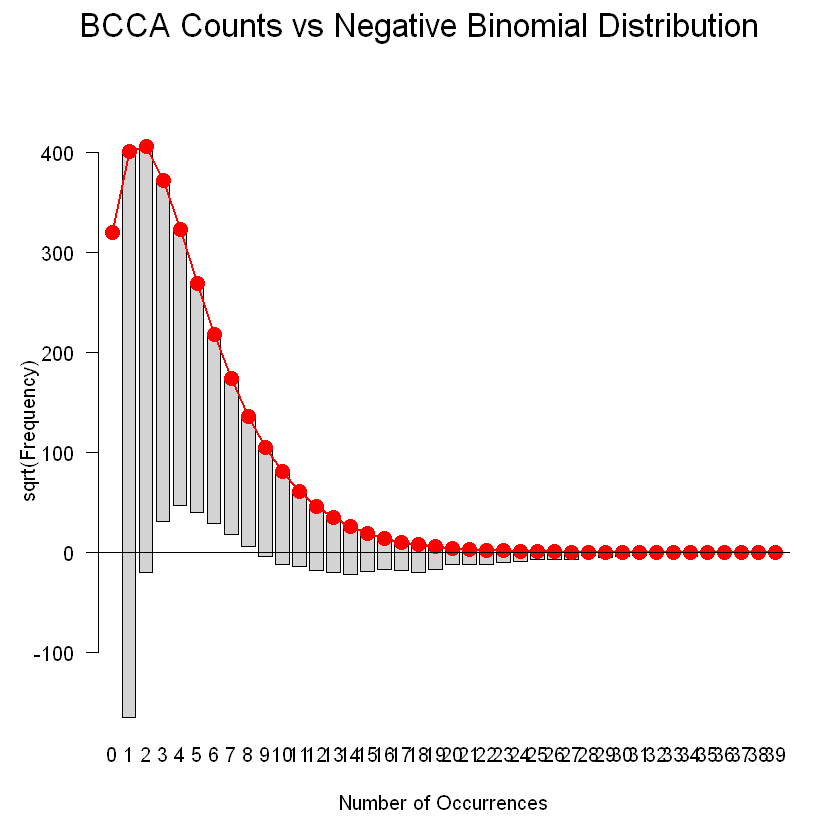

In [401]:
plot( BCgf_dAug, main="BCCA Counts vs Negative Binomial Distribution" )

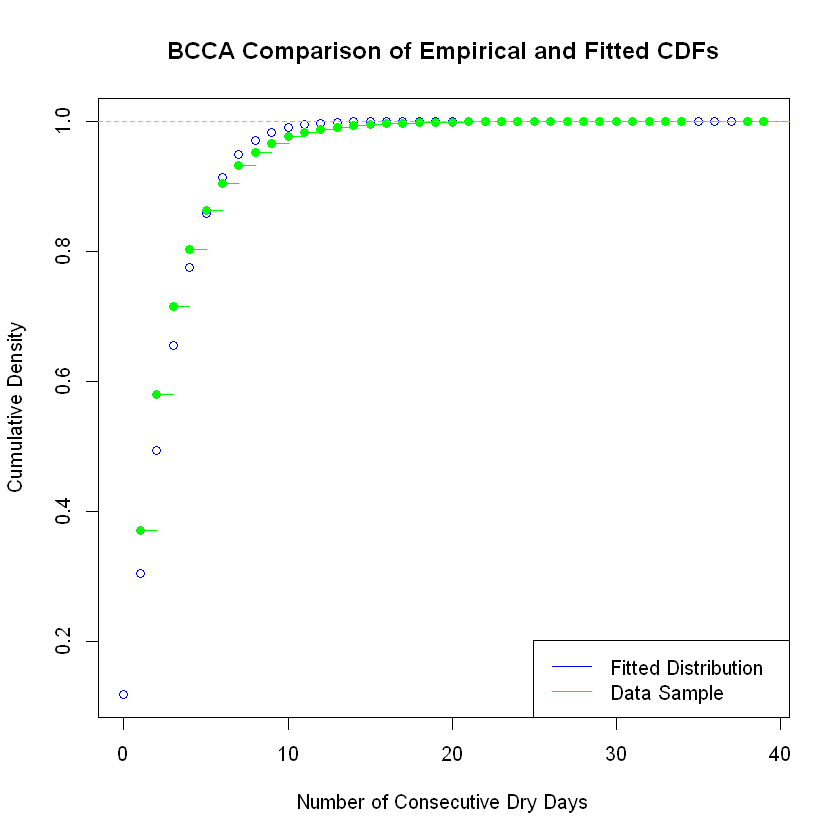

In [402]:
x <- seq(0,dBCAugMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dAug_mu, size=BCfdNB_dAug_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCAug$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

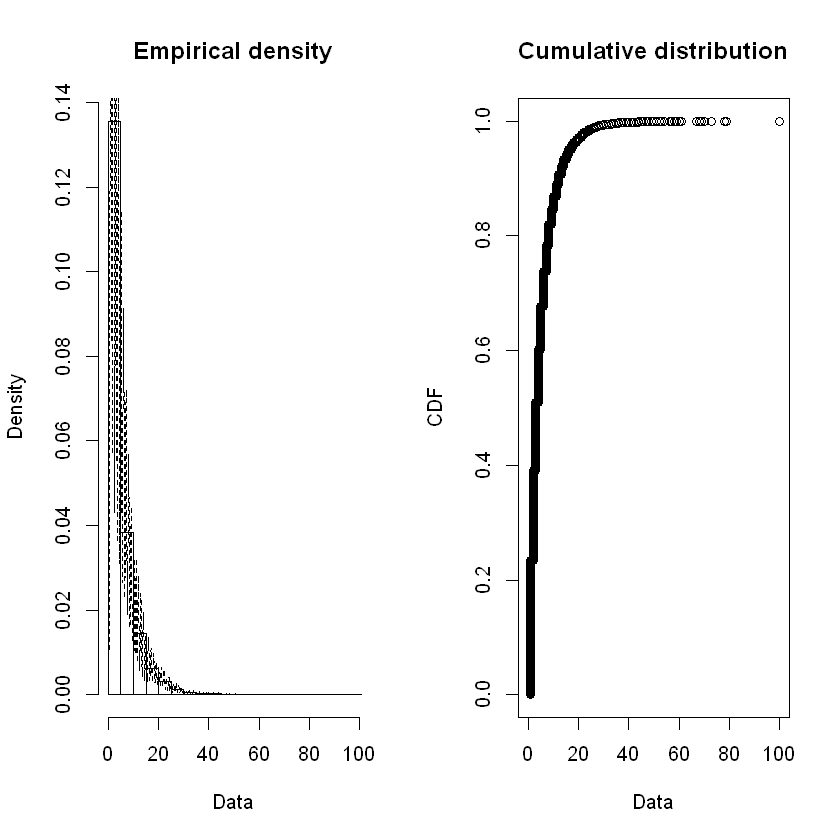

In [403]:
plotdist( dLOSep$Dry_Count, histo=TRUE, demp=TRUE )

In [404]:
LOfd_NB_dSep <- fitdist( dLOSep$Dry_Count, "nbinom" )
LOfd_GE_dSep <- fitdist( dLOSep$Dry_Count, "geom" )

In [405]:
LOfdNB_dSep_size <- LOfd_NB_dSep$estimate[["size"]]
LOfdNB_dSep_mu <- LOfd_NB_dSep$estimate[["mu"]]
cat("LOCA Sep size: ", LOfdNB_dSep_size, "\n", "LOCA Sep mu: ", LOfdNB_dSep_mu, "\n")

LOCA Sep size:  1.623236 
 LOCA Sep mu:  5.298397 


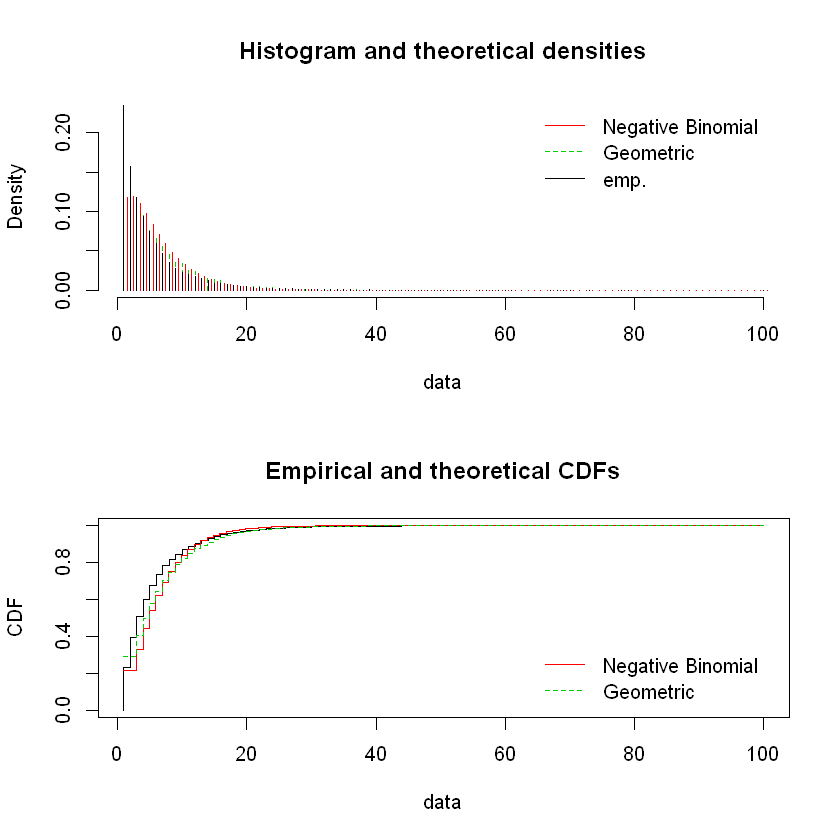

In [406]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dSep, LOfd_GE_dSep), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dSep, LOfd_GE_dSep), legendtext=plot.legend )

In [407]:
LOstatRes <- gofstat( list(LOfd_NB_dSep, LOfd_GE_dSep), fitnames=c("Negative Binomial", "Geometric") )

In [408]:
print( LOstatRes )

Chi-squared statistic:  114658.5 55188.38 
Degree of freedom of the Chi-squared distribution:  27 28 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     278649           253598.01618    348029.0542
<= 2     187624           141079.03094    133765.2891
<= 3     139495           130428.87422    112528.4604
<= 4     112013           115397.32439     94663.2306
<= 5      89175            99345.44859     79634.3182
<= 6      70857            83946.55722     66991.4242
<= 7      54898            69981.00150     56355.7398
<= 8      42601            57742.60600     47408.5966
<= 9      32874            47261.87548     39881.9187
<= 10     27306            38432.95058     33550.1904
<= 11     23383            31086.65877     28223.6991
<= 12     20335            25032.22483     23742.8516
<= 13     17223            20080.39859     19973.3918
<= 14     14057            16055.49626     16802.3786
<= 15     10467            12800.86803    

In [409]:
LOfdNB_dSep_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [410]:
LOfdNB_dSep_p = LOfdNB_dSep_size / (LOfdNB_dSep_size + LOfdNB_dSep_mu)
cat("LOCA prob: ", LOfdNB_dSep_p)

LOCA prob:  0.2345163

In [411]:
# add to our tracking dataframe
LOMonDistDF[9, ] <- list( 9, dLOSepMean, dLOSepBNr, LOfdNB_dSep_p, LOfdNB_dSep_mu, LOfdNB_dSep_size,
                          LOfdNB_dSep_pvalue )

In [412]:
LOgf_dSep <- goodfit( dLOSep$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dSep_size, prob=LOfdNB_dSep_p) )

In [413]:
summary( LOgf_dSep )


	 Goodness-of-fit test for nbinomial distribution

                      X^2  df P(> X^2)
Pearson          591195.5 100        0
Likelihood Ratio 399212.1  67        0


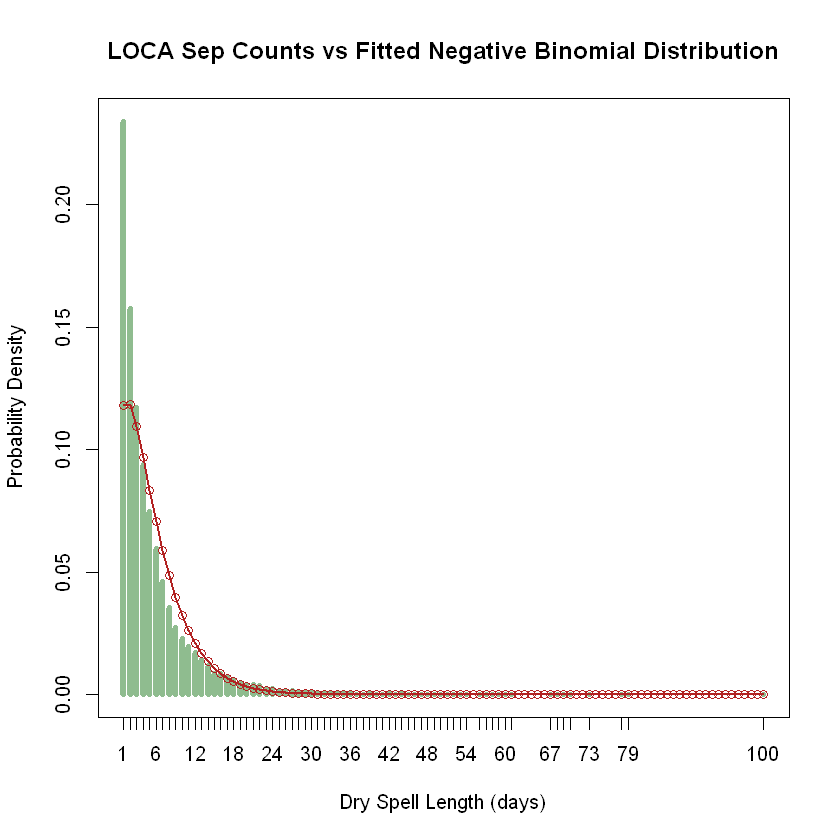

In [414]:
maxP <- max(dLOSep$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dSep_size, mu=LOfdNB_dSep_mu )
ttab <- table( dLOSep$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Sep Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

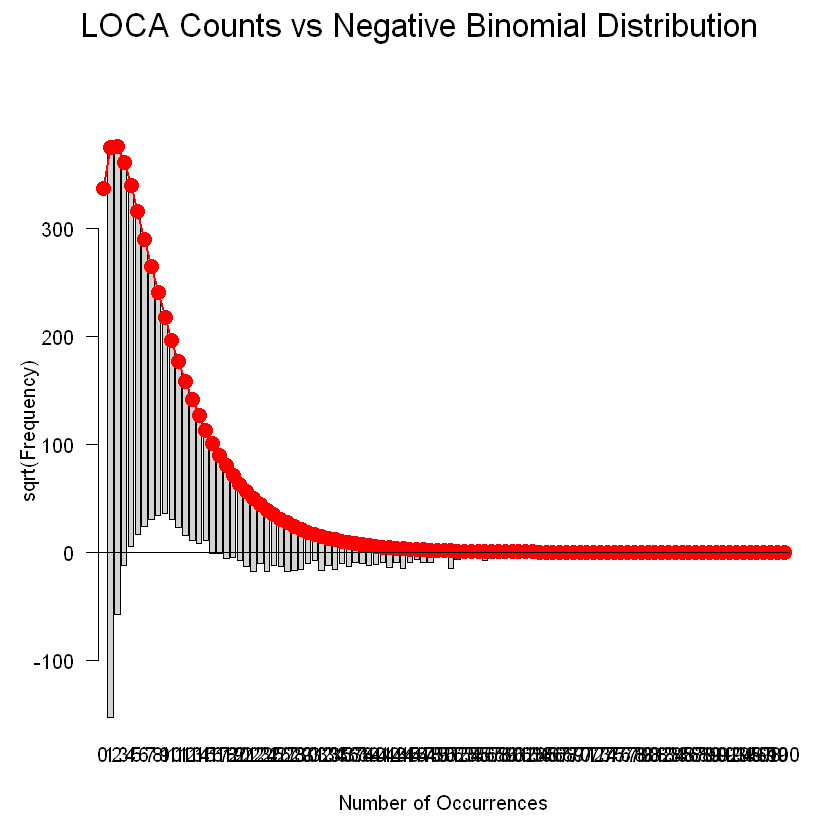

In [415]:
plot( LOgf_dSep, main="LOCA Counts vs Negative Binomial Distribution" )

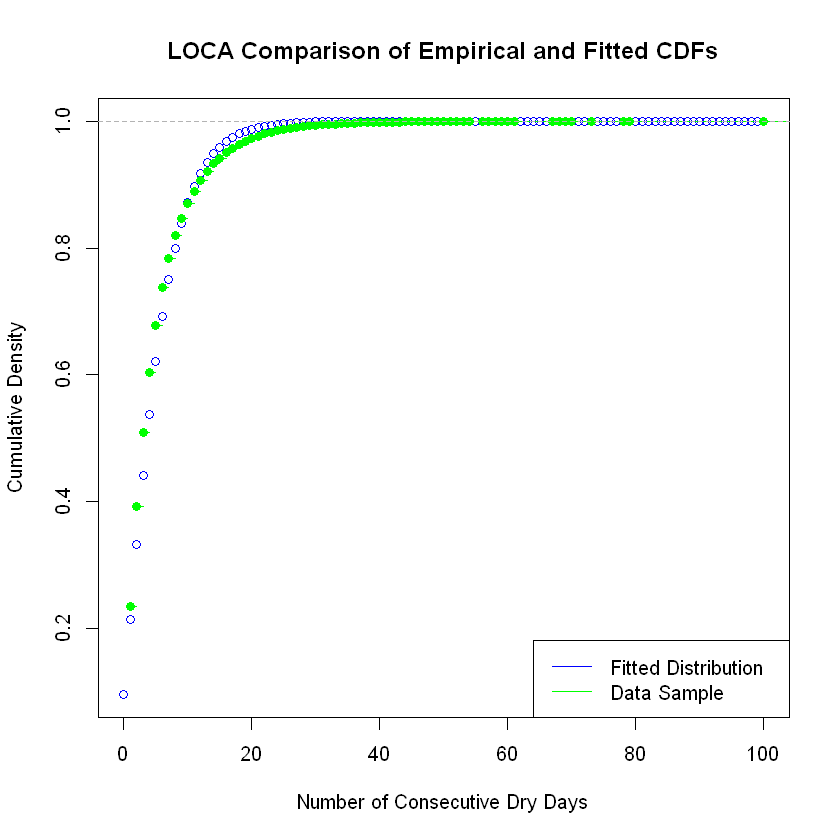

In [416]:
x <- seq(0,dLOSepMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dSep_mu, size=LOfdNB_dSep_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOSep$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

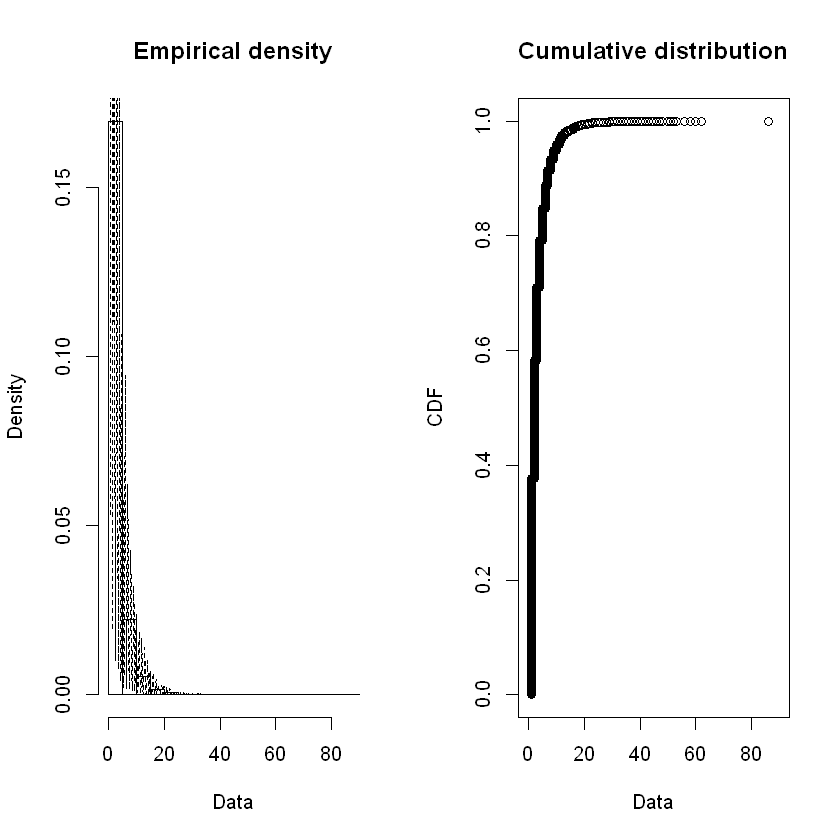

In [417]:
plotdist( dBCSep$Dry_Count, histo=TRUE, demp=TRUE )

In [418]:
BCfd_NB_dSep <- fitdist( dBCSep$Dry_Count, "nbinom" )
BCfd_GE_dSep <- fitdist( dBCSep$Dry_Count, "geom" )

In [419]:
summary( BCfd_NB_dSep )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 2.325599 0.005748199
mu   3.218502 0.003047779
Loglikelihood:  -1841456   AIC:  3682916   BIC:  3682939 
Correlation matrix:
             size           mu
size  1.000000000 -0.000474987
mu   -0.000474987  1.000000000


In [420]:
BCfdNB_dSep_size <- BCfd_NB_dSep$estimate[["size"]]
BCfdNB_dSep_mu <- BCfd_NB_dSep$estimate[["mu"]]
cat("BCCA Sep size: ", BCfdNB_dSep_size, "\n", "BCCA Sep mu: ", BCfdNB_dSep_mu, "\n")

BCCA Sep size:  2.325599 
 BCCA Sep mu:  3.218502 


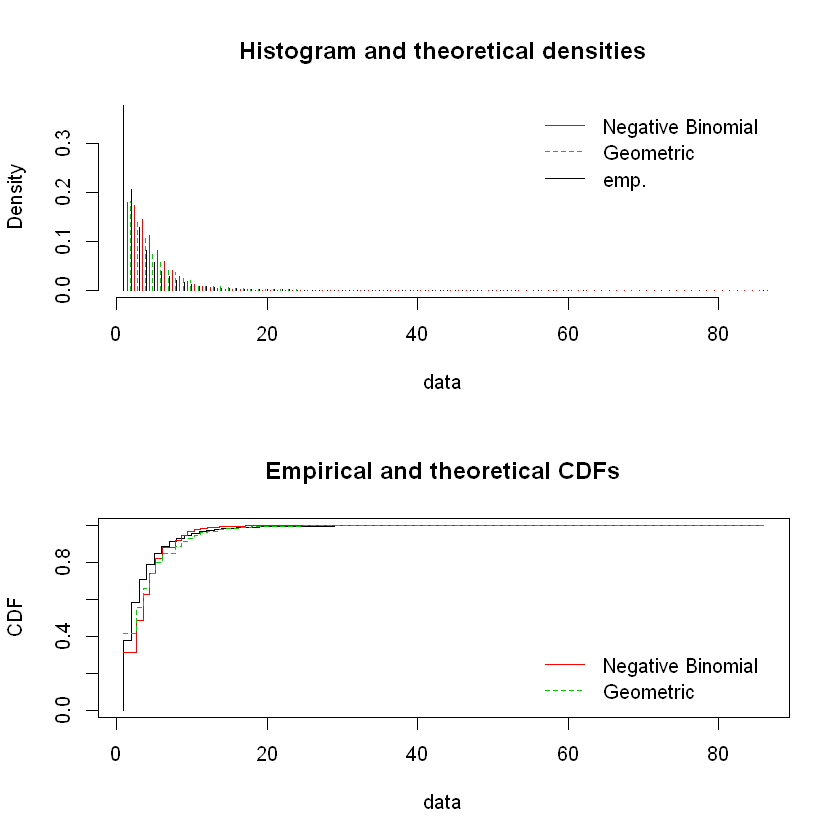

In [421]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dSep, BCfd_GE_dSep), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dSep, BCfd_GE_dSep), legendtext=plot.legend )

In [422]:
BCstatRes <- gofstat( list(BCfd_NB_dSep, BCfd_GE_dSep), fitnames=c("Negative Binomial", "Geometric") )

In [423]:
print(BCstatRes)

Chi-squared statistic:  426600.1 46787.57 
Degree of freedom of the Chi-squared distribution:  17 18 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     311903           257537.06926    345437.5574
<= 2     169930           142816.47320    114043.4321
<= 3     105784           119543.49945     87002.8617
<= 4      66911            92396.83454     66373.8174
<= 5      46712            67859.61644     50636.0774
<= 6      31976            48097.88124     38629.8760
<= 7      22410            33209.78376     29470.4368
<= 8      16019            22473.74503     22482.7707
<= 9      12350            14968.24373     17151.9337
<= 10      8966             9841.35001     13085.0790
<= 11      6800             6401.66107      9982.5066
<= 12      5659             4126.87031      7615.5779
<= 13      4357             2640.05460      5809.8661
<= 14      3150             1677.74124      4432.3024
<= 15      2411             1060.04791    

In [424]:
BCfdNB_dSep_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [425]:
BCfdNB_dSep_p = BCfdNB_dSep_size / (BCfdNB_dSep_size + BCfdNB_dSep_mu)
cat("BCCA prob: ", BCfdNB_dSep_p)

BCCA prob:  0.4194727

In [426]:
# add to our tracking dataframe
BCMonDistDF[9, ] <- list( 9, dBCSepMean, dBCSepBNr, BCfdNB_dSep_p, BCfdNB_dSep_mu, BCfdNB_dSep_size,
                          BCfdNB_dSep_pvalue )

In [427]:
BCgf_dSep <- goodfit( dBCSep$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dSep_size, prob=BCfdNB_dSep_p) )

In [428]:
summary( BCgf_dSep )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson               NaN 86      NaN
Likelihood Ratio 431755.1 56        0


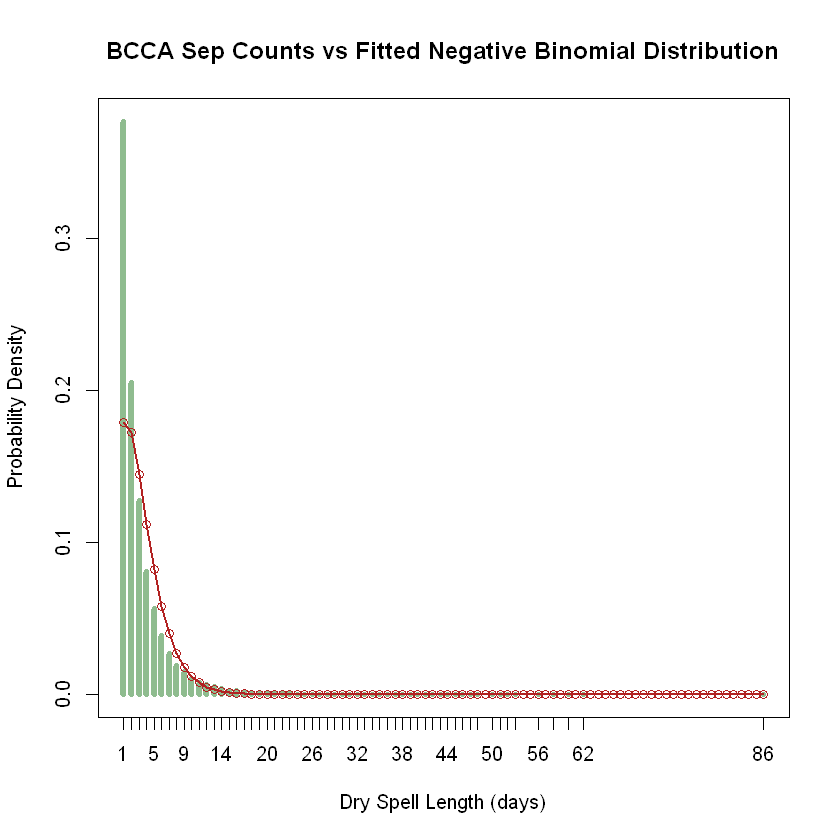

In [429]:
maxP <- max(dBCSep$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dSep_size, mu=BCfdNB_dSep_mu )
ttab <- table( dBCSep$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Sep Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

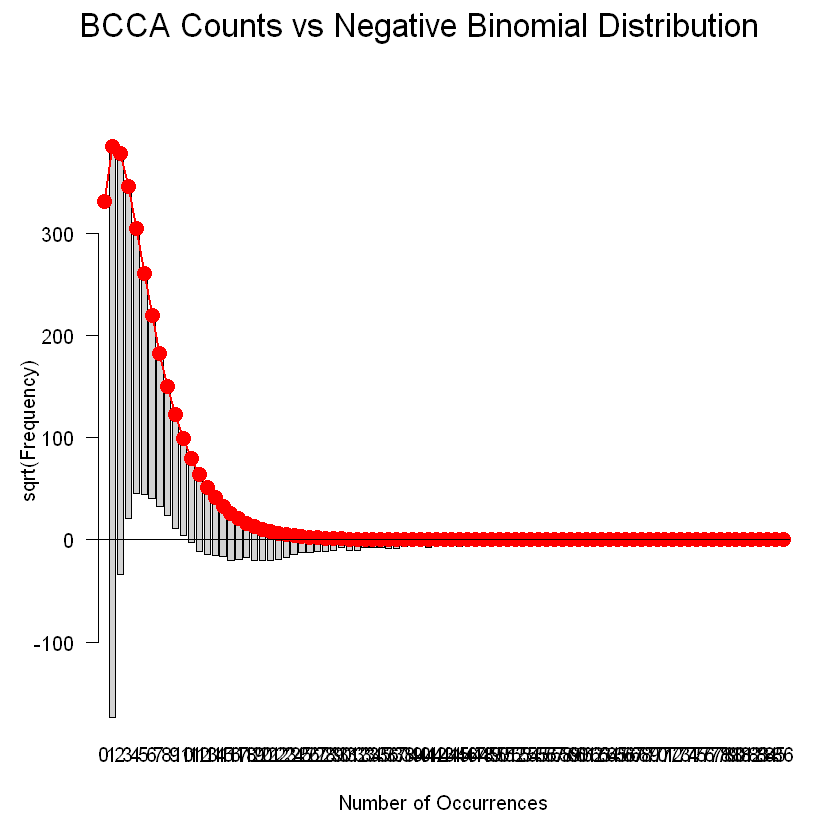

In [430]:
plot( BCgf_dSep, main="BCCA Counts vs Negative Binomial Distribution" )

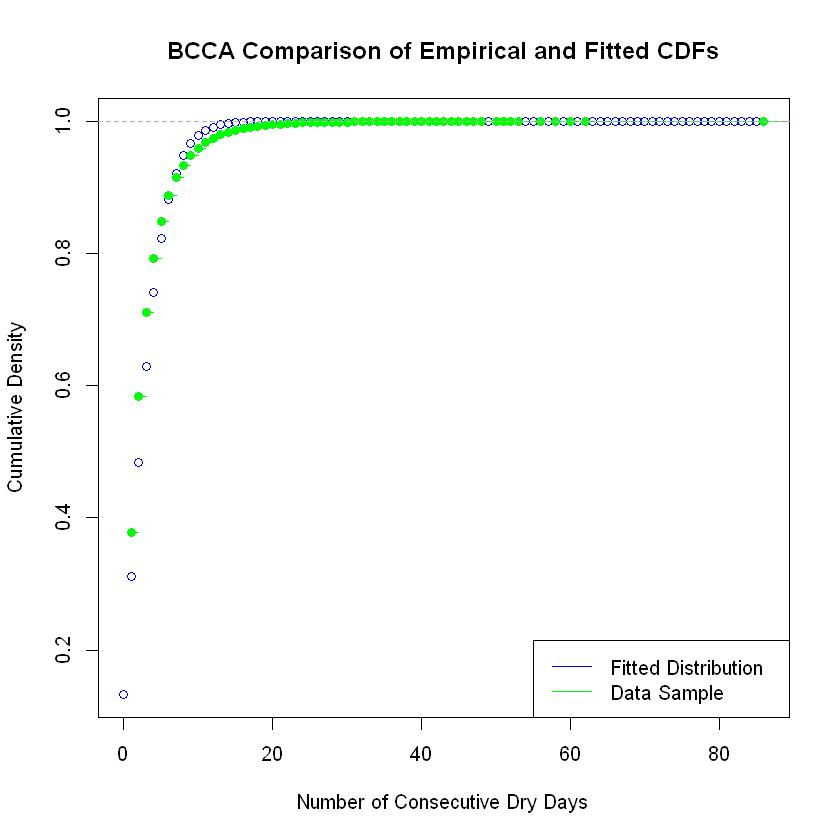

In [431]:
x <- seq(0,dBCSepMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dSep_mu, size=BCfdNB_dSep_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCSep$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

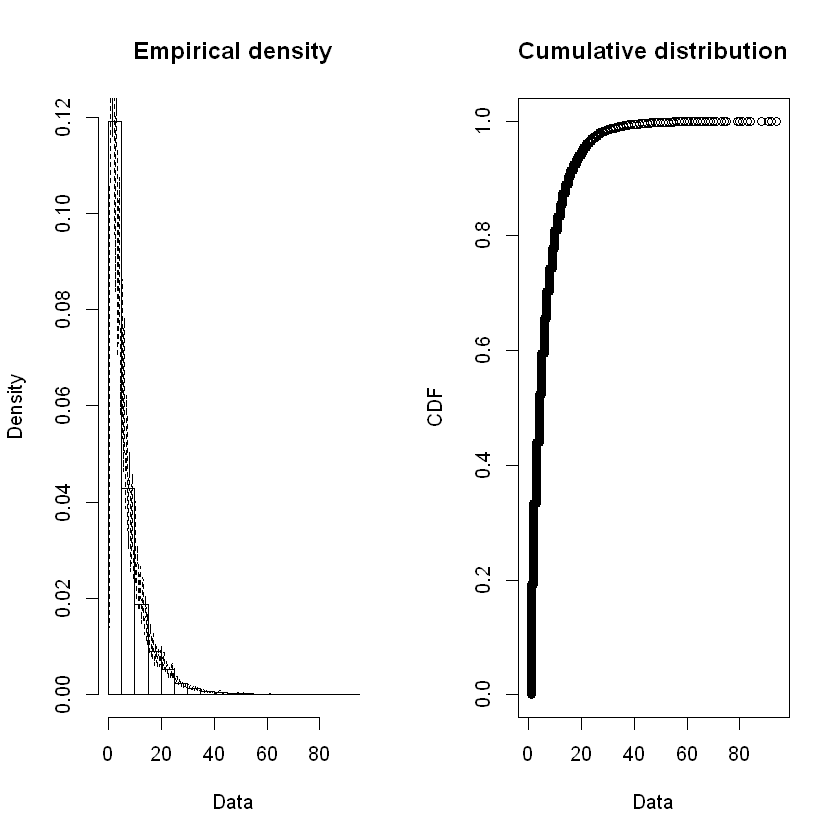

In [432]:
plotdist( dLOOct$Dry_Count, histo=TRUE, demp=TRUE )

In [433]:
LOfd_NB_dOct <- fitdist( dLOOct$Dry_Count, "nbinom" )
LOfd_GE_dOct <- fitdist( dLOOct$Dry_Count, "geom" )

In [434]:
LOfdNB_dOct_size <- LOfd_NB_dOct$estimate[["size"]]
LOfdNB_dOct_mu <- LOfd_NB_dOct$estimate[["mu"]]
cat("LOCA Oct size: ", LOfdNB_dOct_size, "\n", "LOCA Oct mu: ", LOfdNB_dOct_mu, "\n")

LOCA Oct size:  1.43386 
 LOCA Oct mu:  6.6061 


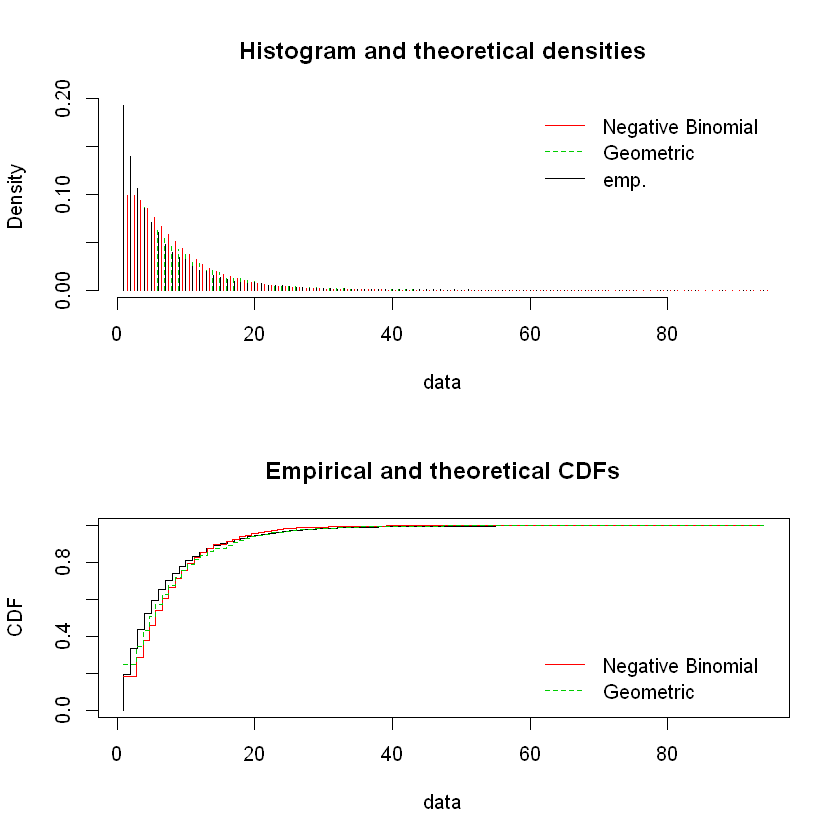

In [435]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dOct, LOfd_GE_dOct), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dOct, LOfd_GE_dOct), legendtext=plot.legend )

In [436]:
LOstatRes <- gofstat( list(LOfd_NB_dOct, LOfd_GE_dOct), fitnames=c("Negative Binomial", "Geometric") )

In [437]:
print( LOstatRes )

Chi-squared statistic:  75990.81 47125.45 
Degree of freedom of the Chi-squared distribution:  31 32 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     219681            209511.7279     279923.386
<= 2     159697            113312.2160     113008.407
<= 3     120995            106568.6081      98151.485
<= 4      97055             97060.4985      85247.765
<= 5      81247             86670.6798      74040.463
<= 6      68364             76363.1452      64306.555
<= 7      54455             66633.3114      55852.340
<= 8      45370             57719.0335      48509.578
<= 9      39488             49711.5406      42132.150
<= 10     36244             42618.0411      36593.145
<= 11     28371             36398.6207      31782.340
<= 12     23952             30988.5255      27603.998
<= 13     21994             26311.7441      23974.972
<= 14     17813             22289.2445      20823.045
<= 15     14991             18843.8616    

In [438]:
LOfdNB_dOct_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [439]:
LOfdNB_dOct_p = LOfdNB_dOct_size / (LOfdNB_dOct_size + LOfdNB_dOct_mu)
cat("LOCA prob: ", LOfdNB_dOct_p)

LOCA prob:  0.1783417

In [440]:
# add to our tracking dataframe
LOMonDistDF[10, ] <- list( 10, dLOOctMean, dLOOctBNr, LOfdNB_dOct_p, LOfdNB_dOct_mu, LOfdNB_dOct_size,
                          LOfdNB_dOct_pvalue )

In [441]:
LOgf_dOct <- goodfit( dLOOct$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dOct_size, prob=LOfdNB_dOct_p) )

In [442]:
summary( LOgf_dOct )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          357333.7 94        0
Likelihood Ratio 328665.4 82        0


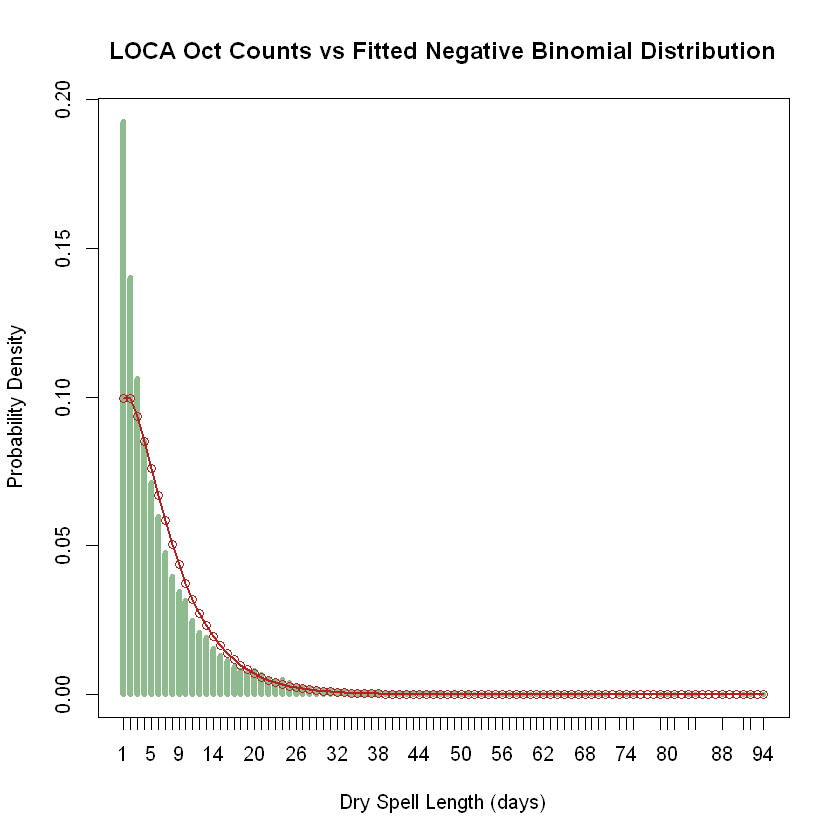

In [443]:
maxP <- max(dLOOct$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dOct_size, mu=LOfdNB_dOct_mu )
ttab <- table( dLOOct$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Oct Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

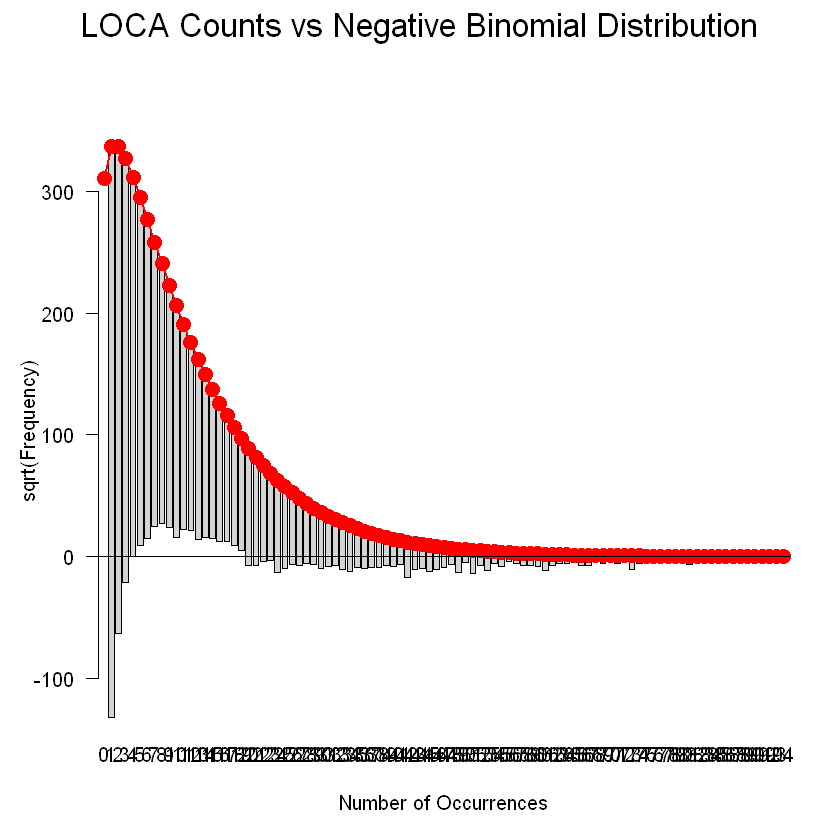

In [444]:
plot( LOgf_dOct, main="LOCA Counts vs Negative Binomial Distribution" )

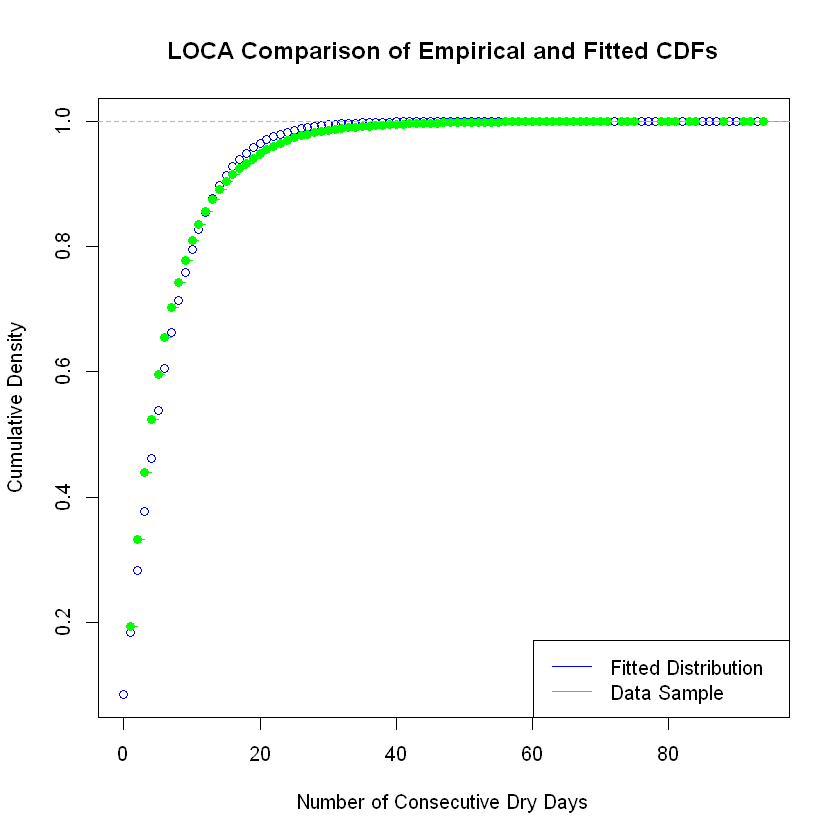

In [445]:
x <- seq(0,dLOOctMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dOct_mu, size=LOfdNB_dOct_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOOct$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

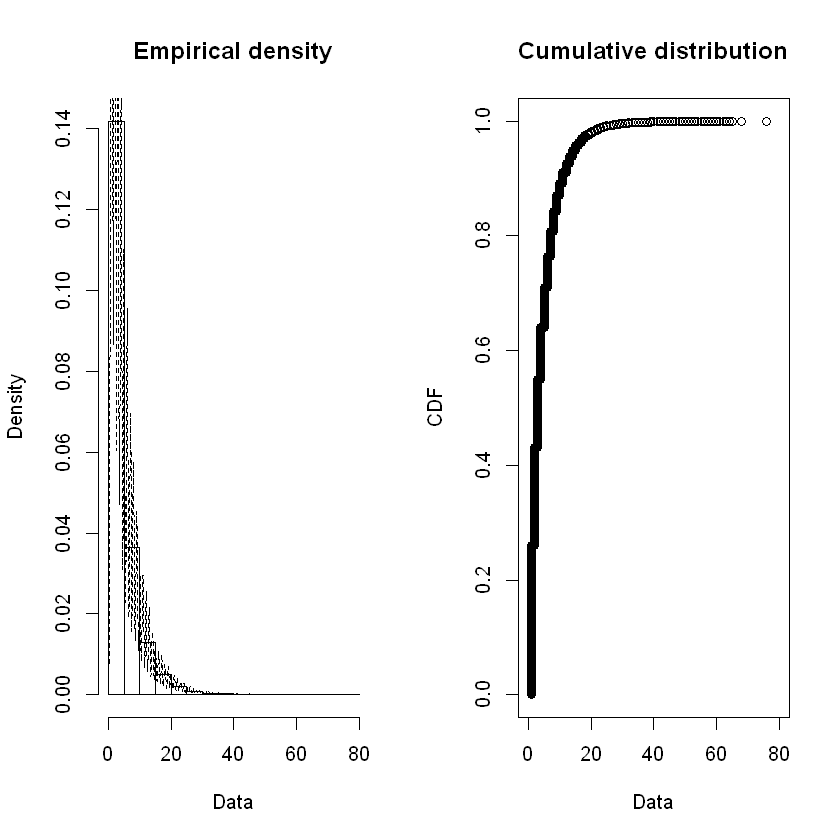

In [446]:
plotdist( dBCOct$Dry_Count, histo=TRUE, demp=TRUE )

In [447]:
BCfd_NB_dOct <- fitdist( dBCOct$Dry_Count, "nbinom" )
BCfd_GE_dOct <- fitdist( dBCOct$Dry_Count, "geom" )

In [448]:
summary( BCfd_NB_dOct )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 1.723706 0.003691717
mu   4.786371 0.004976287
Loglikelihood:  -1911332   AIC:  3822669   BIC:  3822692 
Correlation matrix:
             size           mu
size  1.000000000 -0.000153425
mu   -0.000153425  1.000000000


In [449]:
BCfdNB_dOct_size <- BCfd_NB_dOct$estimate[["size"]]
BCfdNB_dOct_mu <- BCfd_NB_dOct$estimate[["mu"]]
cat("BCCA Oct size: ", BCfdNB_dOct_size, "\n", "BCCA Oct mu: ", BCfdNB_dOct_mu, "\n")

BCCA Oct size:  1.723706 
 BCCA Oct mu:  4.786371 


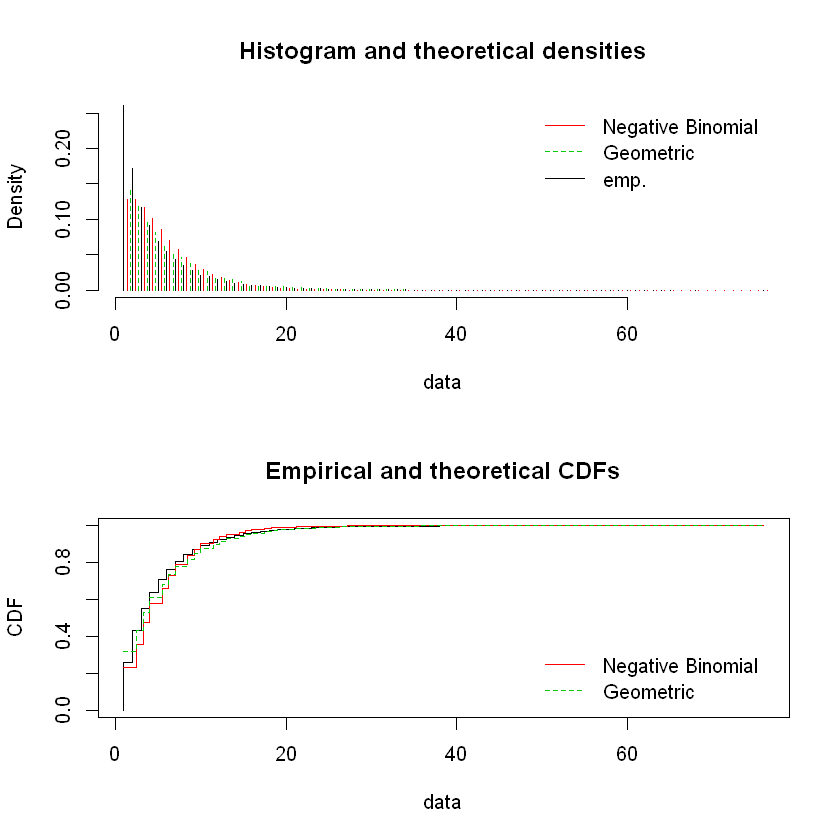

In [450]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dOct, BCfd_GE_dOct), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dOct, BCfd_GE_dOct), legendtext=plot.legend )

In [451]:
BCstatRes <- gofstat( list(BCfd_NB_dOct, BCfd_GE_dOct), fitnames=c("Negative Binomial", "Geometric") )

In [452]:
print(BCstatRes)

Chi-squared statistic:  65129.28 31833.9 
Degree of freedom of the Chi-squared distribution:  23 24 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     190025           167538.96709     230570.038
<= 2     125245            93764.50376      86339.577
<= 3      85576            85568.28157      71417.130
<= 4      66569            74294.37040      59073.795
<= 5      50470            62529.28359      48863.813
<= 6      39746            51518.25609      40418.467
<= 7      31766            41793.53302      33432.766
<= 8      25932            33507.37142      27654.435
<= 9      20713            26616.43655      22874.798
<= 10     15201            20985.29374      18921.247
<= 11     13884            16444.00234      15651.005
<= 12     11168            12819.17729      12945.973
<= 13      9400             9949.66486      10708.464
<= 14      7374             7693.39090       8857.674
<= 15      5685             5929.27647     

In [453]:
BCfdNB_dOct_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [454]:
BCfdNB_dOct_p = BCfdNB_dOct_size / (BCfdNB_dOct_size + BCfdNB_dOct_mu)
cat("BCCA prob: ", BCfdNB_dOct_p)

BCCA prob:  0.264775

In [455]:
# add to our tracking dataframe
BCMonDistDF[10, ] <- list( 10, dBCOctMean, dBCOctBNr, BCfdNB_dOct_p, BCfdNB_dOct_mu, BCfdNB_dOct_size,
                          BCfdNB_dOct_pvalue )

In [456]:
BCgf_dOct <- goodfit( dBCOct$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dOct_size, prob=BCfdNB_dOct_p) )

In [457]:
summary( BCgf_dOct )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          351208.4 76        0
Likelihood Ratio 264932.1 66        0


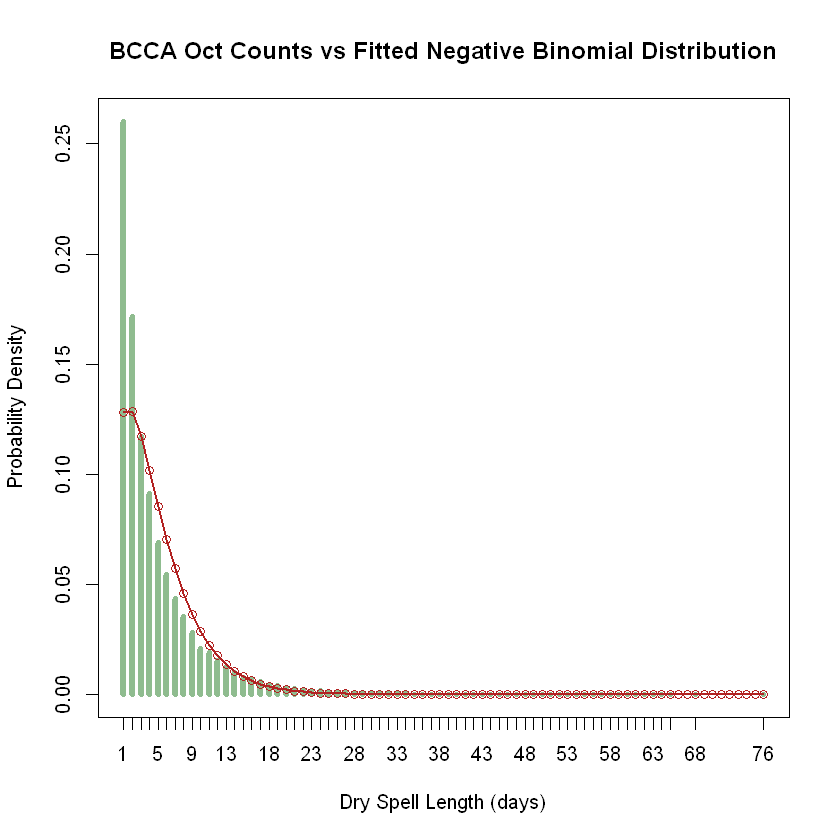

In [458]:
maxP <- max(dBCOct$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dOct_size, mu=BCfdNB_dOct_mu )
ttab <- table( dBCOct$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Oct Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

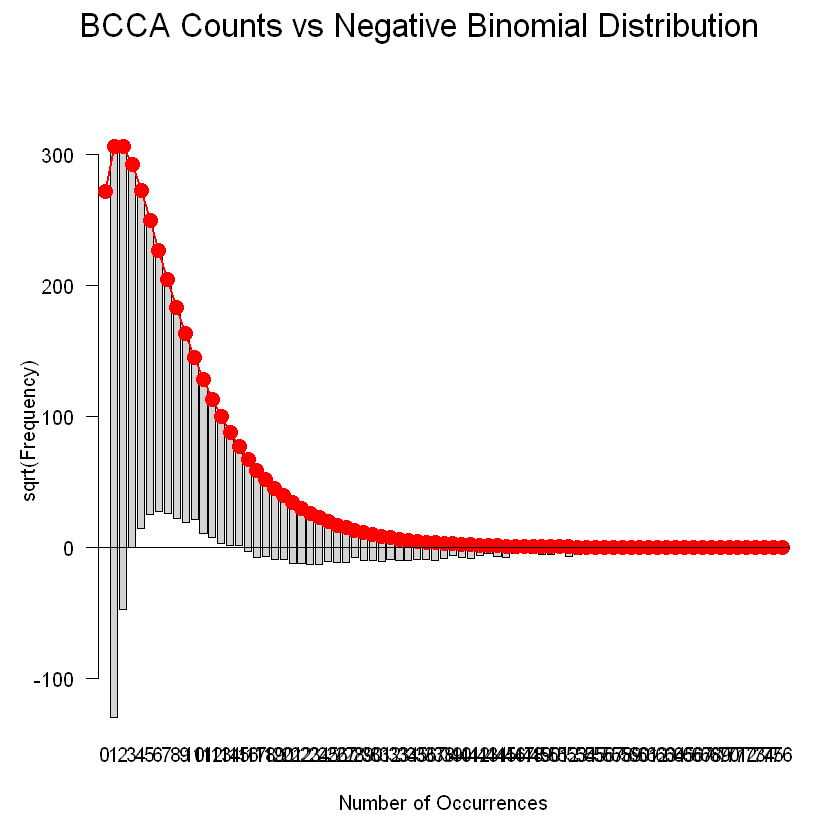

In [459]:
plot( BCgf_dOct, main="BCCA Counts vs Negative Binomial Distribution" )

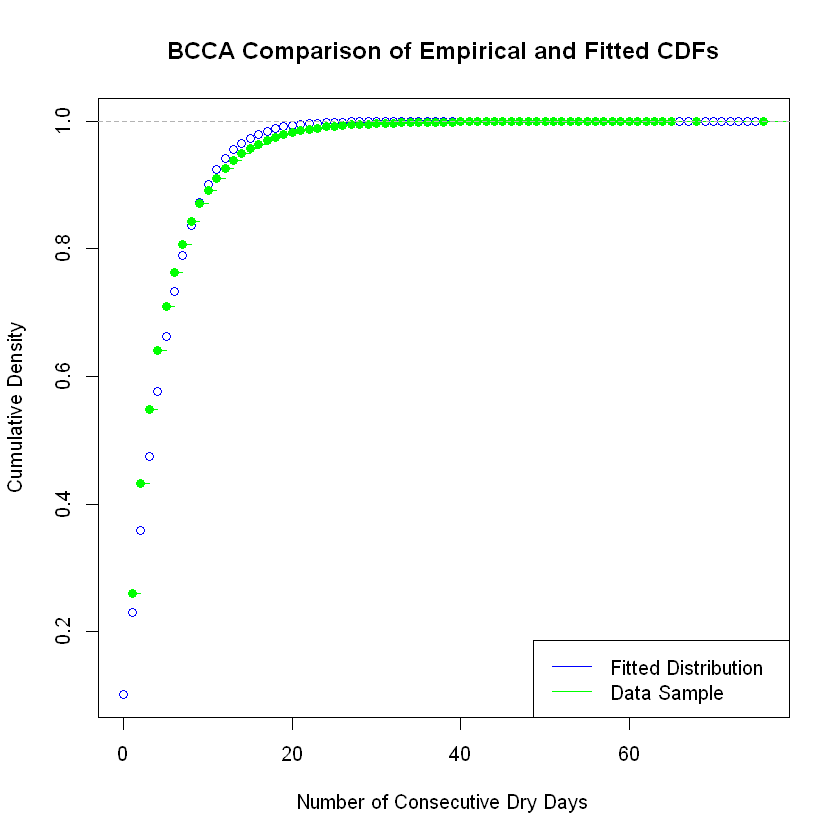

In [460]:
x <- seq(0,dBCOctMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dOct_mu, size=BCfdNB_dOct_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCOct$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

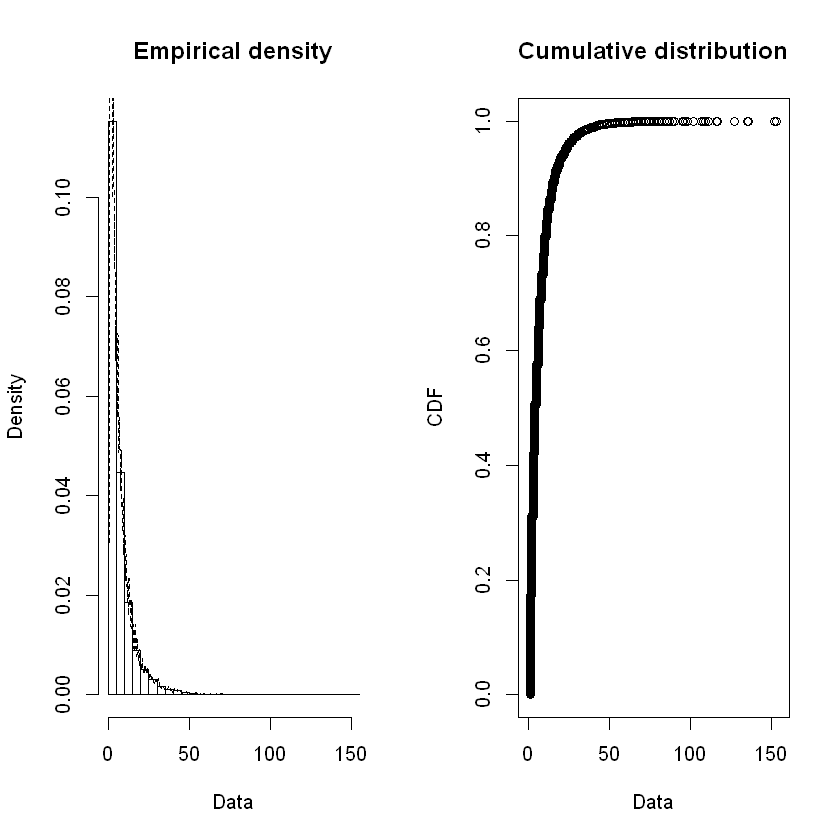

In [461]:
plotdist( dLONov$Dry_Count, histo=TRUE, demp=TRUE )

In [462]:
LOfd_NB_dNov <- fitdist( dLONov$Dry_Count, "nbinom" )
LOfd_GE_dNov <- fitdist( dLONov$Dry_Count, "geom" )

In [463]:
LOfdNB_dNov_size <- LOfd_NB_dNov$estimate[["size"]]
LOfdNB_dNov_mu <- LOfd_NB_dNov$estimate[["mu"]]
cat("LOCA Nov size: ", LOfdNB_dNov_size, "\n", "LOCA Nov mu: ", LOfdNB_dNov_mu, "\n")

LOCA Nov size:  1.364786 
 LOCA Nov mu:  7.09184 


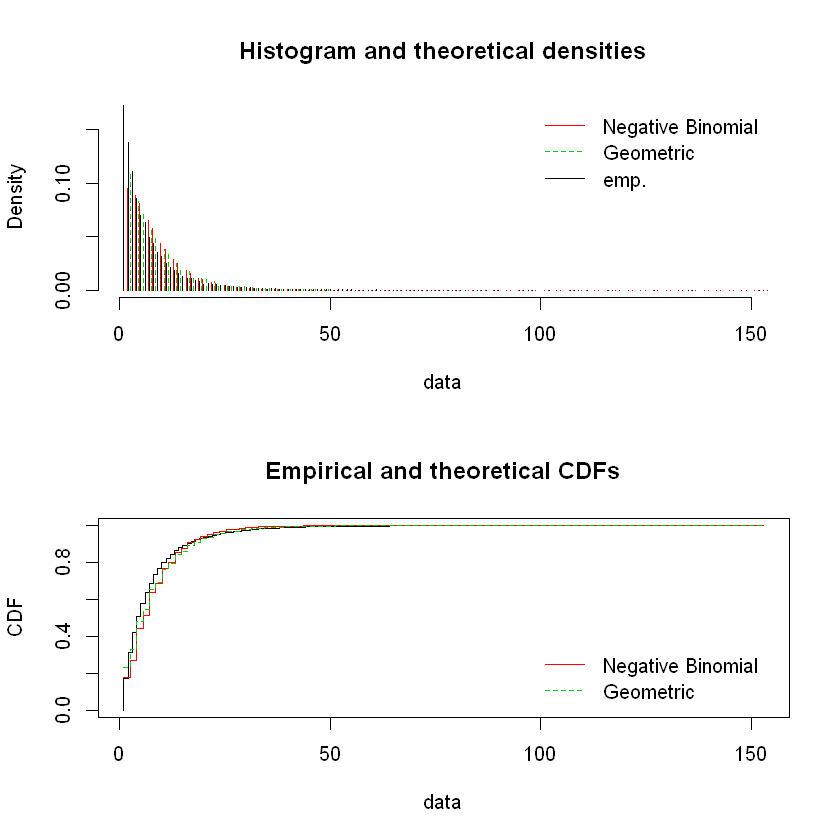

In [464]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dNov, LOfd_GE_dNov), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dNov, LOfd_GE_dNov), legendtext=plot.legend )

In [465]:
LOstatRes <- gofstat( list(LOfd_NB_dNov, LOfd_GE_dNov), fitnames=c("Negative Binomial", "Geometric") )

In [466]:
print( LOstatRes )

Chi-squared statistic:  121437.7 72441.06 
Degree of freedom of the Chi-squared distribution:  36 37 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     190023            196137.4298     255582.917
<= 2     152104            103795.5780     104626.516
<= 3     121835             97628.5560      91698.897
<= 4      94684             89339.1150      80368.611
<= 5      76891             80387.0067      70438.291
<= 6      70150             71512.2142      61734.959
<= 7      54396             63096.3341      54107.007
<= 8      48319             55326.1926      47421.563
<= 9      38525             48277.8522      41562.169
<= 10     34888             41963.3439      36426.761
<= 11     27113             36358.0408      31925.882
<= 12     23156             31417.2116      27981.130
<= 13     20236             27086.2012      24523.791
<= 14     17307             23306.7132      21493.639
<= 15     14246             20020.6463    

In [467]:
LOfdNB_dNov_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [468]:
LOfdNB_dNov_p = LOfdNB_dNov_size / (LOfdNB_dNov_size + LOfdNB_dNov_mu)
cat("LOCA prob: ", LOfdNB_dNov_p)

LOCA prob:  0.1613866

In [469]:
# add to our tracking dataframe
LOMonDistDF[11, ] <- list( 11, dLONovMean, dLONovBNr, LOfdNB_dNov_p, LOfdNB_dNov_mu, LOfdNB_dNov_size,
                          LOfdNB_dNov_pvalue )

In [470]:
LOgf_dNov <- goodfit( dLONov$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dNov_size, prob=LOfdNB_dNov_p) )

In [471]:
summary( LOgf_dNov )


	 Goodness-of-fit test for nbinomial distribution

                       X^2  df P(> X^2)
Pearson          8808052.4 153        0
Likelihood Ratio  318809.2 103        0


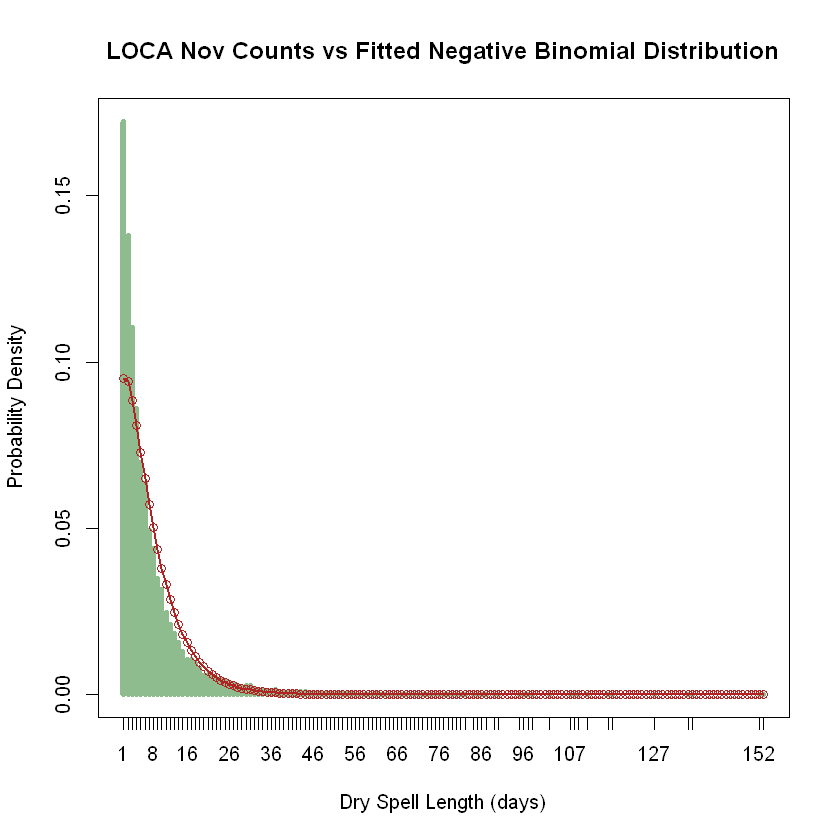

In [472]:
maxP <- max(dLONov$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dNov_size, mu=LOfdNB_dNov_mu )
ttab <- table( dLONov$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Nov Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

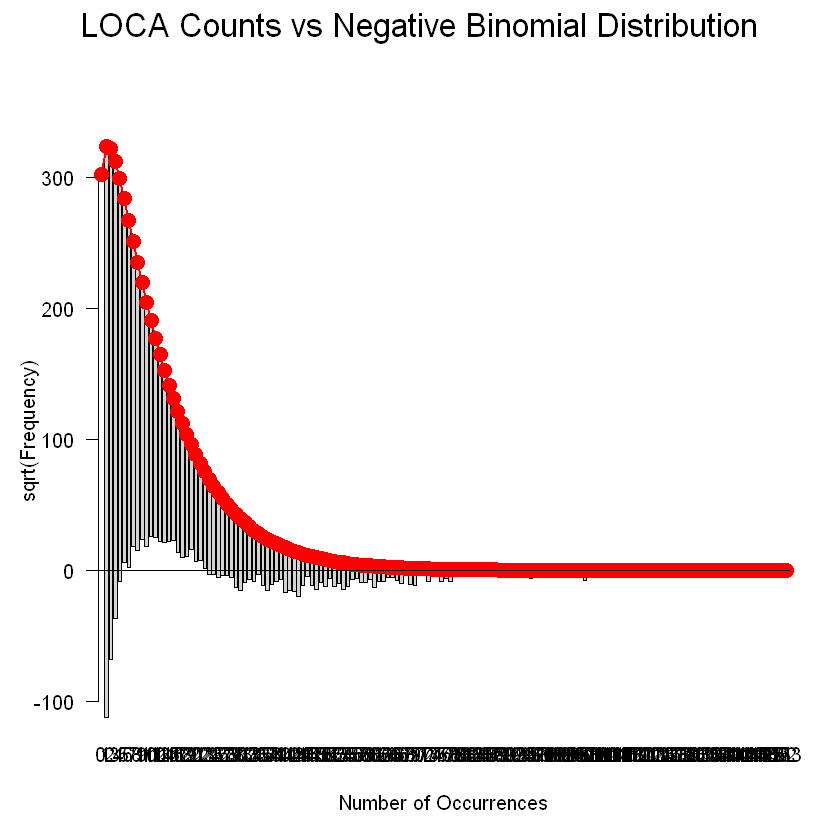

In [473]:
plot( LOgf_dNov, main="LOCA Counts vs Negative Binomial Distribution" )

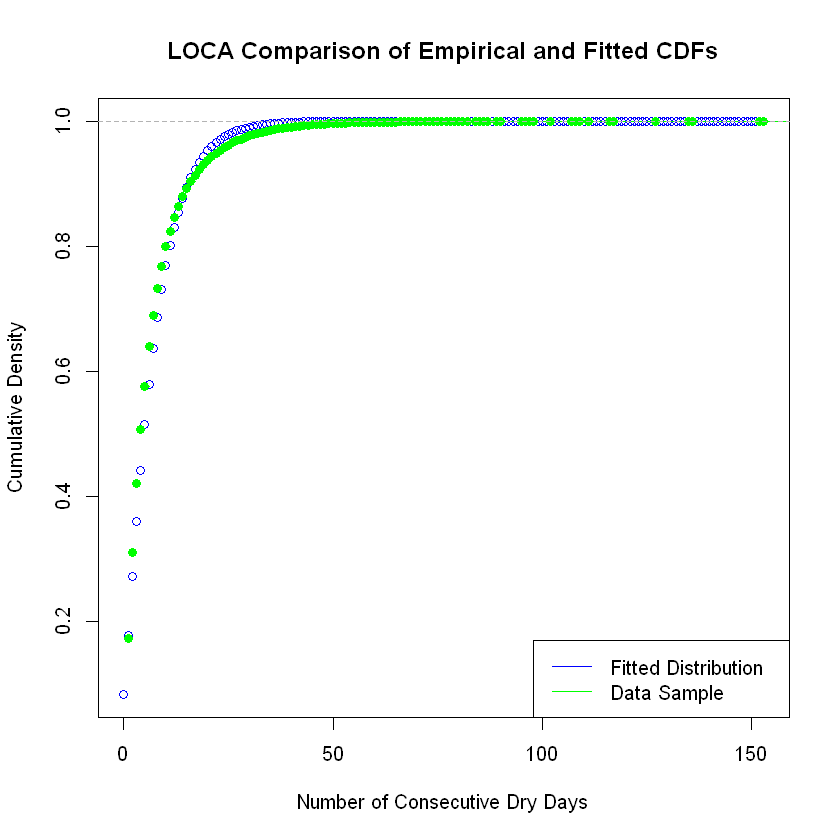

In [474]:
x <- seq(0,dLONovMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dNov_mu, size=LOfdNB_dNov_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLONov$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

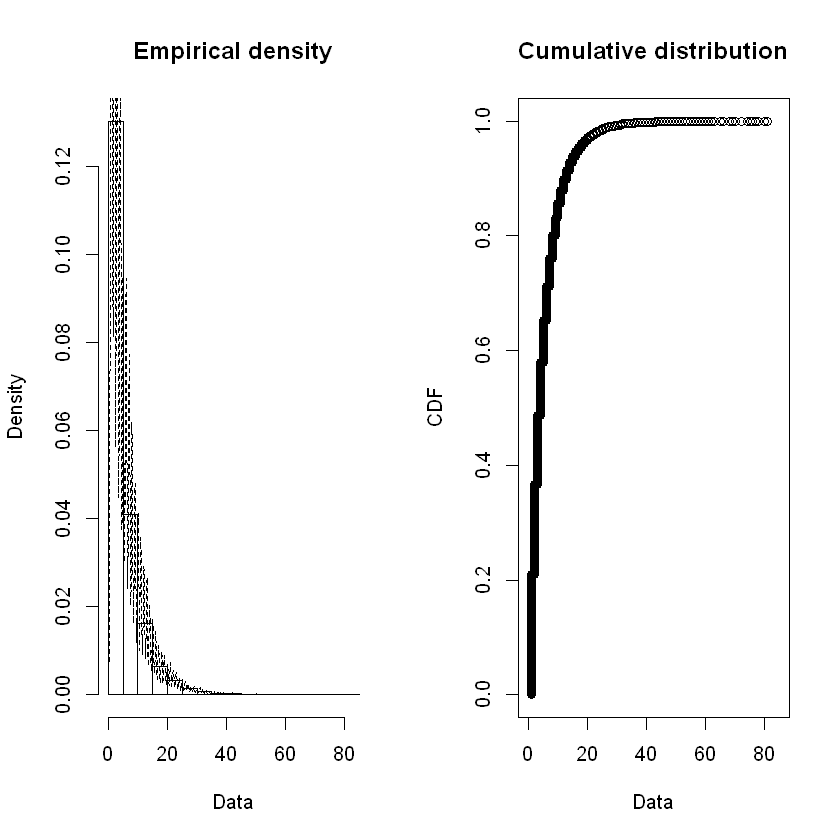

In [475]:
plotdist( dBCNov$Dry_Count, histo=TRUE, demp=TRUE )

In [476]:
BCfd_NB_dNov <- fitdist( dBCNov$Dry_Count, "nbinom" )
BCfd_GE_dNov <- fitdist( dBCNov$Dry_Count, "geom" )

In [477]:
summary( BCfd_NB_dNov )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 1.663957 0.003561663
mu   5.561974 0.005996342
Loglikelihood:  -1852361   AIC:  3704726   BIC:  3704748 
Correlation matrix:
             size           mu
size 1.0000000000 0.0002345808
mu   0.0002345808 1.0000000000


In [478]:
BCfdNB_dNov_size <- BCfd_NB_dNov$estimate[["size"]]
BCfdNB_dNov_mu <- BCfd_NB_dNov$estimate[["mu"]]
cat("BCCA Nov size: ", BCfdNB_dNov_size, "\n", "BCCA Nov mu: ", BCfdNB_dNov_mu, "\n")

BCCA Nov size:  1.663957 
 BCCA Nov mu:  5.561974 


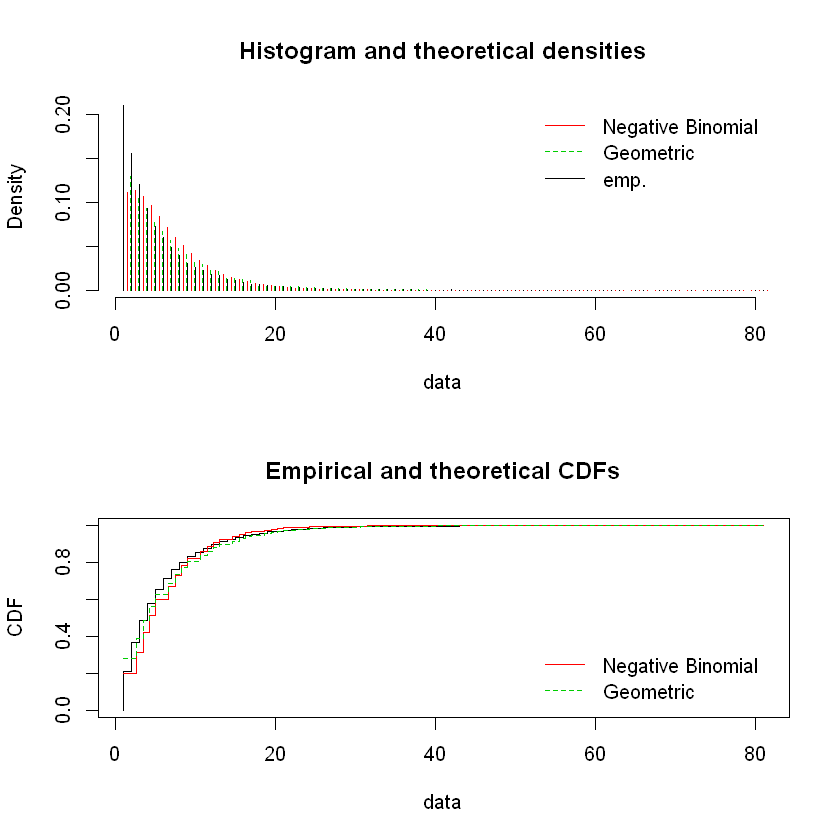

In [479]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dNov, BCfd_GE_dNov), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dNov, BCfd_GE_dNov), legendtext=plot.legend )

In [480]:
BCstatRes <- gofstat( list(BCfd_NB_dNov, BCfd_GE_dNov), fitnames=c("Negative Binomial", "Geometric") )

In [481]:
print(BCstatRes)

Chi-squared statistic:  43861.14 35915.39 
Degree of freedom of the Chi-squared distribution:  25 26 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     141088            133040.4131     189065.905
<= 2     104654             76596.3685      73520.459
<= 3      81095             72006.6171      62317.900
<= 4      62453             64625.2269      52822.313
<= 5      48467             56349.1227      44773.601
<= 6      40641             48172.9491      37951.297
<= 7      32909             40596.9491      32168.531
<= 8      26507             33841.9083      27266.904
<= 9      20524             27970.6445      23112.155
<= 10     17246             22959.1608      19590.479
<= 11     14970             18738.9127      16605.412
<= 12     12391             15221.8600      14075.190
<= 13     11450             12315.0452      11930.506
<= 14      8565              9928.7439      10112.615
<= 15      7258              7980.6762    

In [482]:
BCfdNB_dNov_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [483]:
BCfdNB_dNov_p = BCfdNB_dNov_size / (BCfdNB_dNov_size + BCfdNB_dNov_mu)
cat("BCCA prob: ", BCfdNB_dNov_p)

BCCA prob:  0.2302757

In [484]:
# add to our tracking dataframe
BCMonDistDF[11, ] <- list( 11, dBCNovMean, dBCNovBNr, BCfdNB_dNov_p, BCfdNB_dNov_mu, BCfdNB_dNov_size,
                          BCfdNB_dNov_pvalue )

In [485]:
BCgf_dNov <- goodfit( dBCNov$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dNov_size, prob=BCfdNB_dNov_p) )

In [486]:
summary( BCgf_dNov )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          249762.2 81        0
Likelihood Ratio 197947.9 75        0


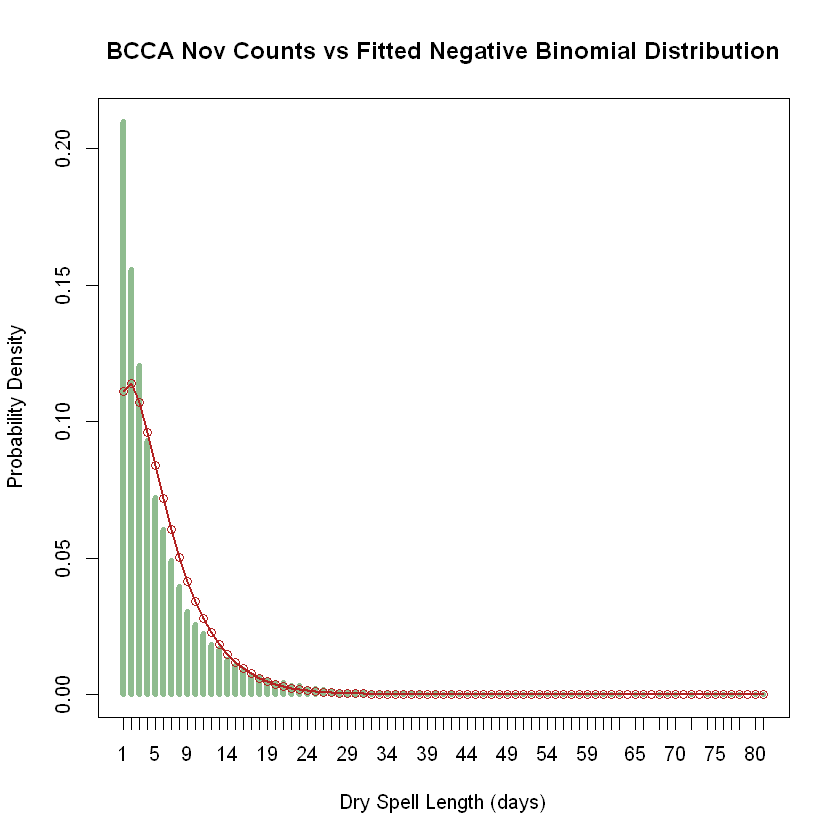

In [487]:
maxP <- max(dBCNov$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dNov_size, mu=BCfdNB_dNov_mu )
ttab <- table( dBCNov$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Nov Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

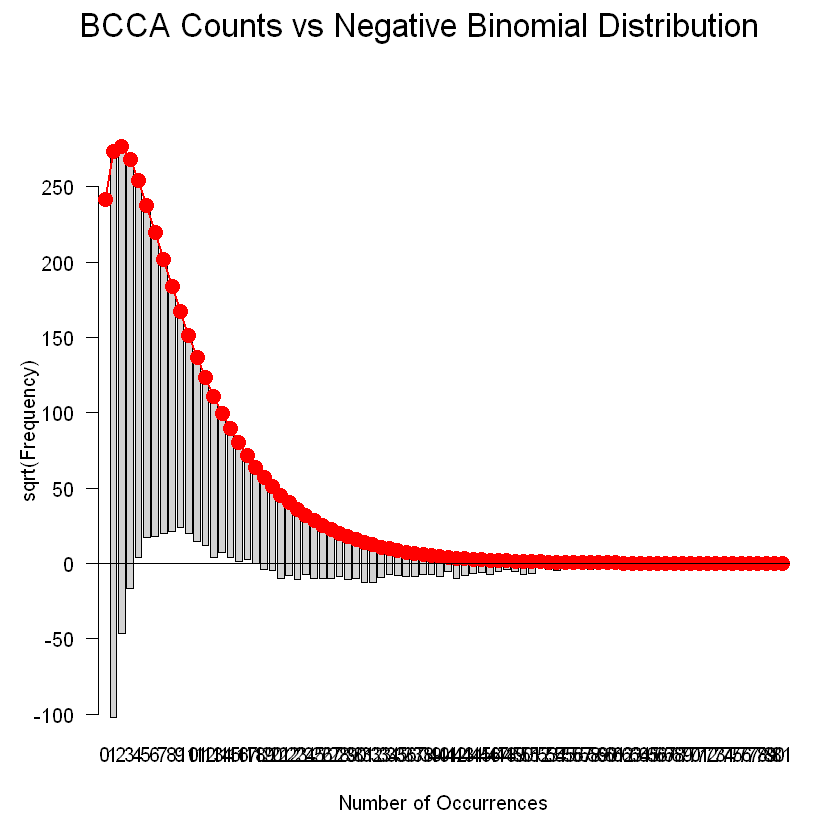

In [488]:
plot( BCgf_dNov, main="BCCA Counts vs Negative Binomial Distribution" )

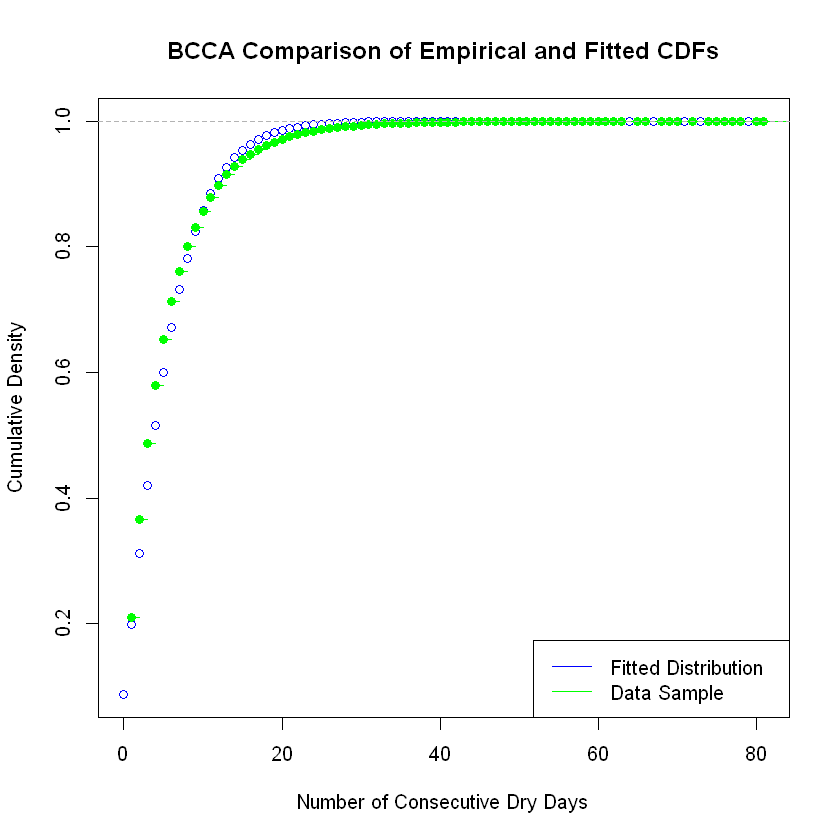

In [489]:
x <- seq(0,dBCNovMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dNov_mu, size=BCfdNB_dNov_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCNov$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

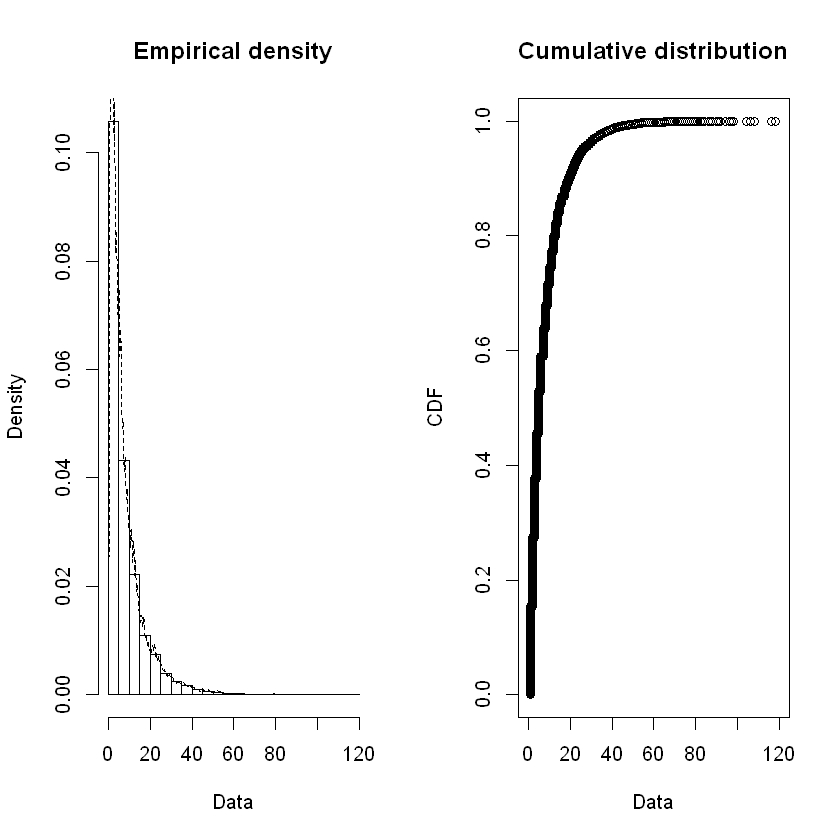

In [490]:
plotdist( dLODec$Dry_Count, histo=TRUE, demp=TRUE )

In [491]:
LOfd_NB_dDec <- fitdist( dLODec$Dry_Count, "nbinom" )
LOfd_GE_dDec <- fitdist( dLODec$Dry_Count, "geom" )

In [492]:
LOfdNB_dDec_size <- LOfd_NB_dDec$estimate[["size"]]
LOfdNB_dDec_mu <- LOfd_NB_dDec$estimate[["mu"]]
cat("LOCA Dec size: ", LOfdNB_dDec_size, "\n", "LOCA Dec mu: ", LOfdNB_dDec_mu, "\n")

LOCA Dec size:  1.309328 
 LOCA Dec mu:  8.156628 


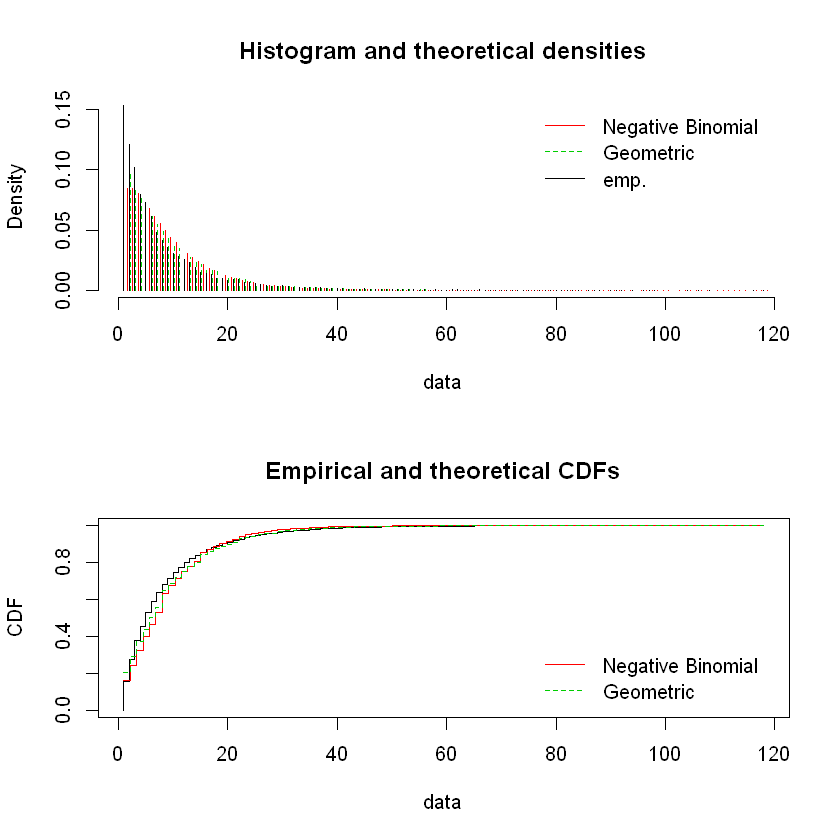

In [493]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dDec, LOfd_GE_dDec), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dDec, LOfd_GE_dDec), legendtext=plot.legend )

In [494]:
LOstatRes <- gofstat( list(LOfd_NB_dDec, LOfd_GE_dDec), fitnames=c("Negative Binomial", "Geometric") )

In [495]:
print( LOstatRes )

Chi-squared statistic:  66033.47 50463.93 
Degree of freedom of the Chi-squared distribution:  38 39 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     156745            163120.5832     211011.357
<= 2     123855             86037.6037      88553.255
<= 3     103909             81781.1214      78881.324
<= 4      81295             75918.7080      70265.777
<= 5      74771             69464.7605      62591.234
<= 6      62644             62942.2954      55754.918
<= 7      48685             56632.8169      49665.275
<= 8      42210             50686.2608      44240.752
<= 9      36478             45176.4654      39408.705
<= 10     31089             40131.8128      35104.422
<= 11     29001             35553.2300      31270.260
<= 12     26245             31425.2203      27854.871
<= 13     23267             27722.8117      24812.517
<= 14     19386             24416.0073      22102.453
<= 15     15227             21472.6518    

In [496]:
LOfdNB_dDec_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [497]:
LOfdNB_dDec_p = LOfdNB_dDec_size / (LOfdNB_dDec_size + LOfdNB_dDec_mu)
cat("LOCA prob: ", LOfdNB_dDec_p)

LOCA prob:  0.1383197

In [498]:
# add to our tracking dataframe
LOMonDistDF[12, ] <- list( 12, dLODecMean, dLODecBNr, LOfdNB_dDec_p, LOfdNB_dDec_mu, LOfdNB_dDec_size,
                           LOfdNB_dDec_pvalue )

In [499]:
LOgf_dDec <- goodfit( dLODec$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dDec_size, prob=LOfdNB_dDec_p) )

In [500]:
summary( LOgf_dDec )


	 Goodness-of-fit test for nbinomial distribution

                      X^2  df P(> X^2)
Pearson          244737.9 118        0
Likelihood Ratio 257662.6  98        0


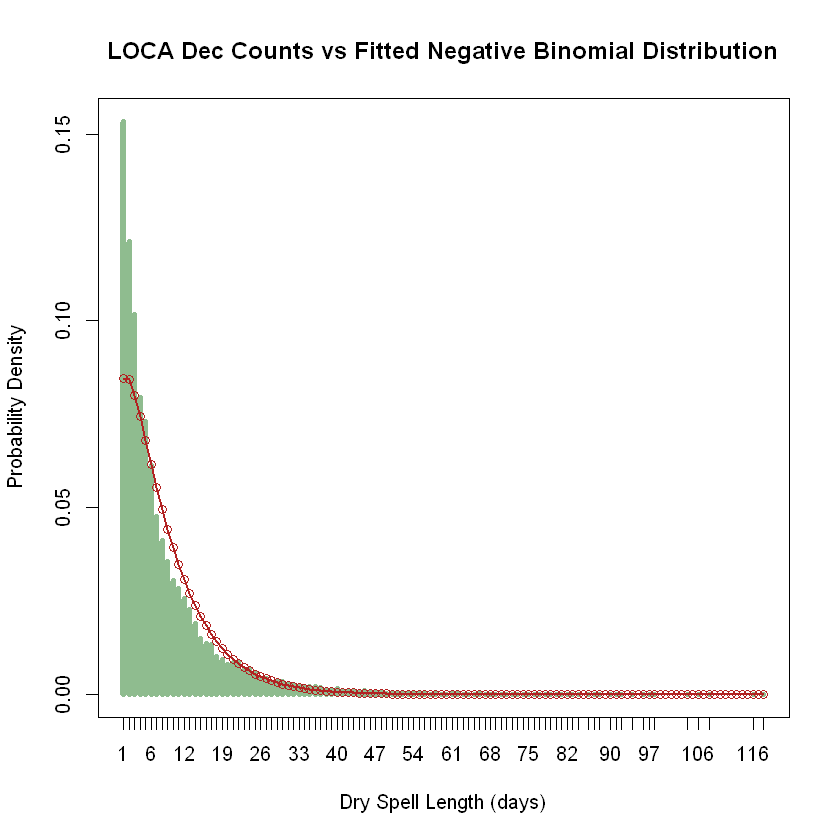

In [501]:
maxP <- max(dLODec$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dDec_size, mu=LOfdNB_dDec_mu )
ttab <- table( dLODec$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Dec Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

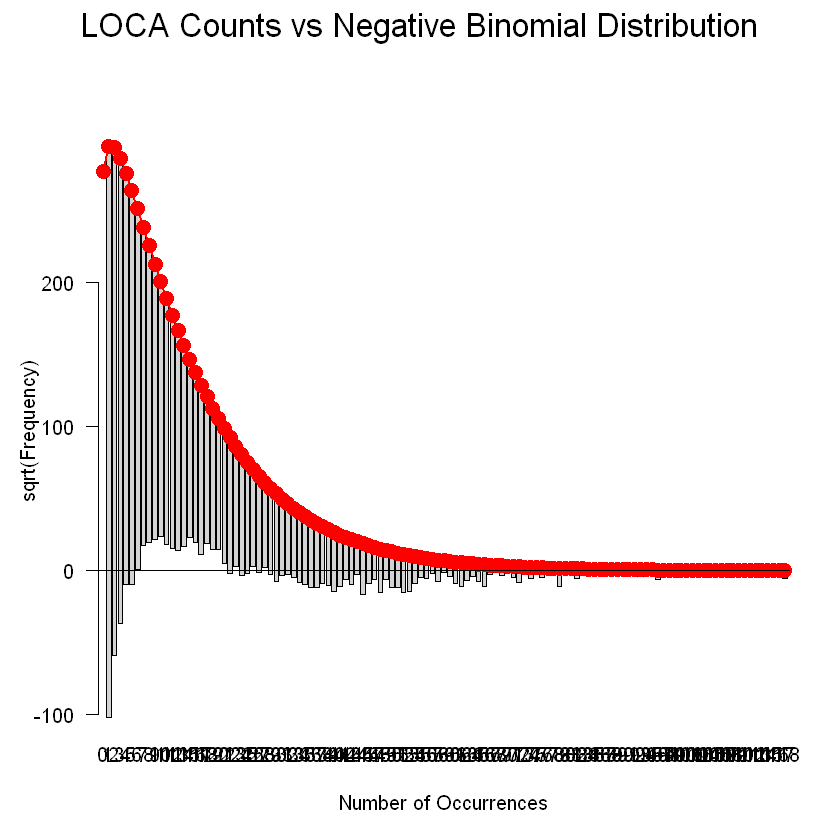

In [502]:
plot( LOgf_dDec, main="LOCA Counts vs Negative Binomial Distribution" )

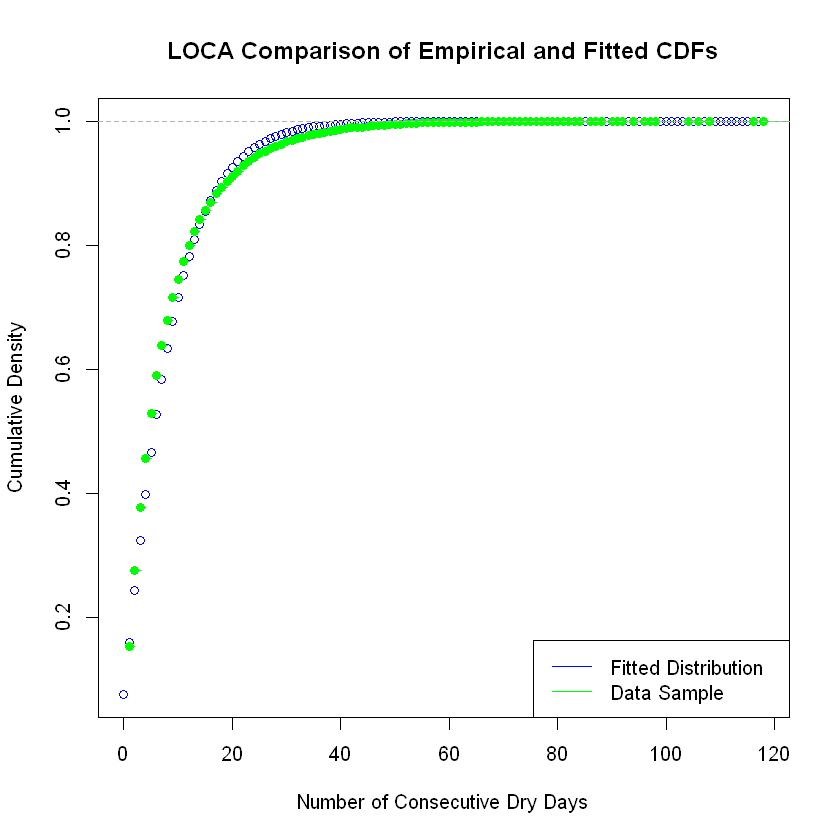

In [503]:
x <- seq(0,dLODecMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dDec_mu, size=LOfdNB_dDec_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLODec$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

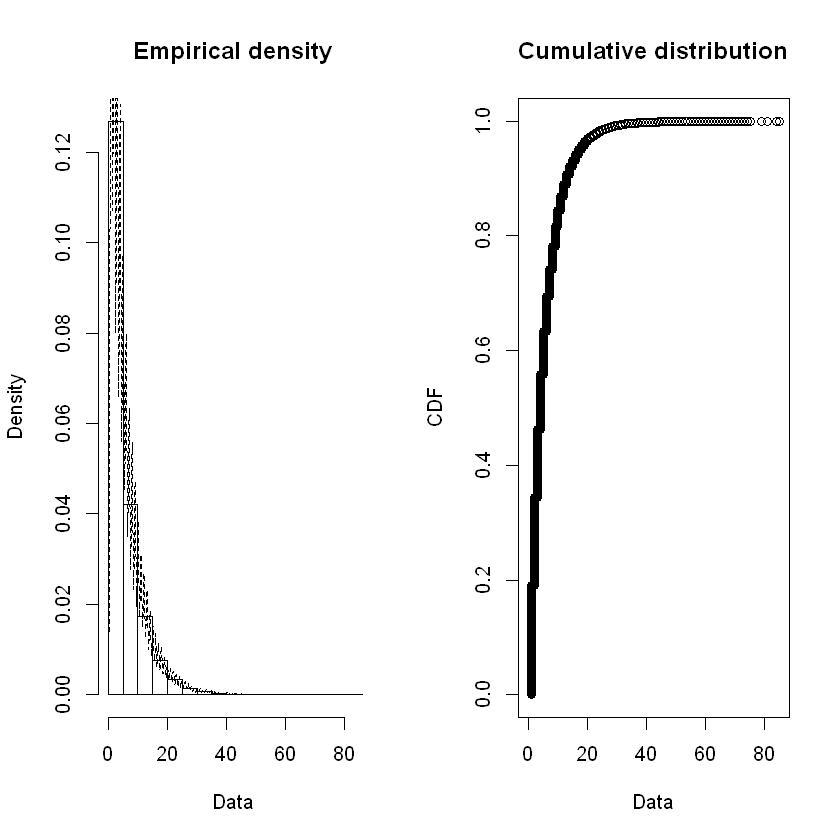

In [504]:
plotdist( dBCDec$Dry_Count, histo=TRUE, demp=TRUE )

In [505]:
BCfd_NB_dDec <- fitdist( dBCDec$Dry_Count, "nbinom" )
BCfd_GE_dDec <- fitdist( dBCDec$Dry_Count, "geom" )

In [506]:
summary( BCfd_NB_dDec )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 1.689404 0.003618211
mu   5.825732 0.006243694
Loglikelihood:  -1859628   AIC:  3719260   BIC:  3719283 
Correlation matrix:
             size           mu
size 1.0000000000 0.0002163381
mu   0.0002163381 1.0000000000


In [507]:
BCfdNB_dDec_size <- BCfd_NB_dDec$estimate[["size"]]
BCfdNB_dDec_mu <- BCfd_NB_dDec$estimate[["mu"]]
cat("BCCA Dec size: ", BCfdNB_dDec_size, "\n", "BCCA Dec mu: ", BCfdNB_dDec_mu, "\n")

BCCA Dec size:  1.689404 
 BCCA Dec mu:  5.825732 


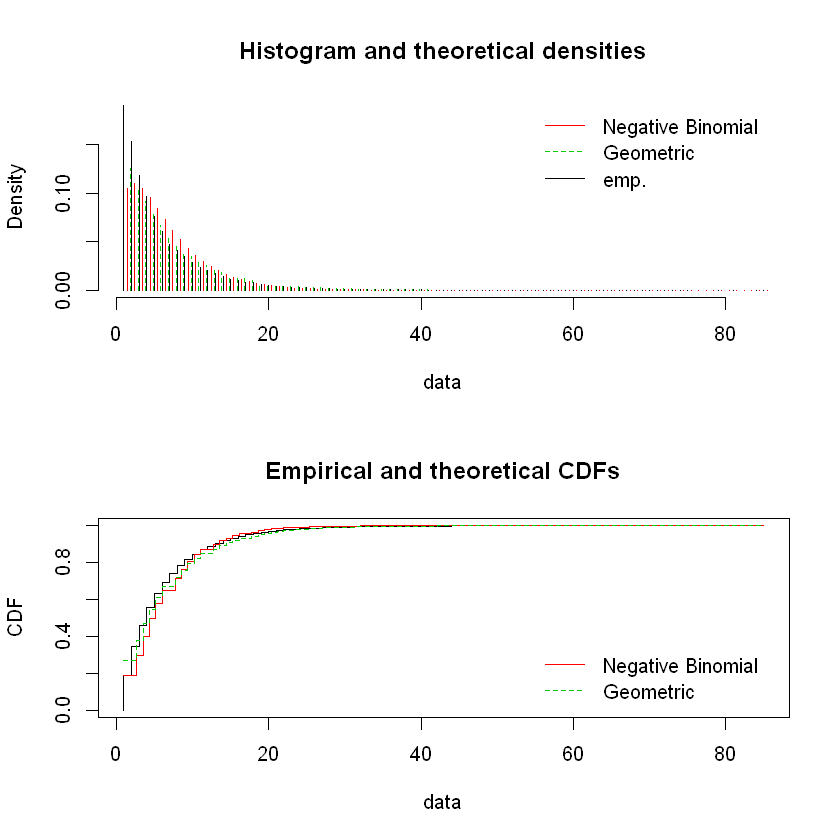

In [508]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dDec, BCfd_GE_dDec), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dDec, BCfd_GE_dDec), legendtext=plot.legend )

In [509]:
BCstatRes <- gofstat( list(BCfd_NB_dDec, BCfd_GE_dDec), fitnames=c("Negative Binomial", "Geometric") )

In [510]:
print(BCstatRes)

Chi-squared statistic:  40979.54 41399.71 
Degree of freedom of the Chi-squared distribution:  26 27 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     126198            123318.2293     180450.280
<= 2     102003             72890.7660      70922.206
<= 3      78812             69489.8092      60533.028
<= 4      63940             63152.7739      51665.729
<= 5      50539             55706.1135      44097.373
<= 6      40163             48145.1671      37637.683
<= 7      31223             40997.8426      32124.253
<= 8      26870             34520.3091      27418.469
<= 9      23008             28809.9763      23402.021
<= 10     18812             23873.1685      19973.930
<= 11     15766             19666.3344      17048.010
<= 12     13582             16121.1891      14550.699
<= 13     11507             13159.8802      12419.211
<= 14      9285             10703.8928      10599.959
<= 15      7660              8679.0185    

In [511]:
BCfdNB_dDec_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [512]:
BCfdNB_dDec_p = BCfdNB_dDec_size / (BCfdNB_dDec_size + BCfdNB_dDec_mu)
cat("BCCA prob: ", BCfdNB_dDec_p)

BCCA prob:  0.2248001

In [513]:
# add to our tracking dataframe
BCMonDistDF[12, ] <- list( 12, dBCDecMean, dBCDecBNr, BCfdNB_dDec_p, BCfdNB_dDec_mu, BCfdNB_dDec_size,
                           BCfdNB_dDec_pvalue )

In [514]:
BCgf_dDec <- goodfit( dBCDec$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dDec_size, prob=BCfdNB_dDec_p) )

In [515]:
summary( BCgf_dDec )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          185698.3 85        0
Likelihood Ratio 176630.6 78        0


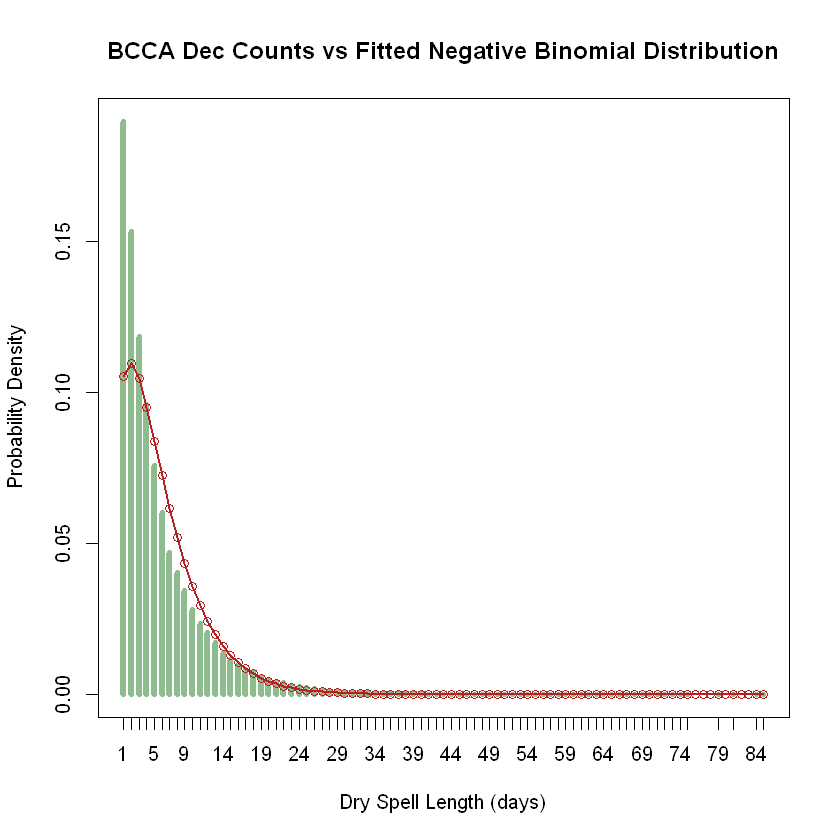

In [516]:
maxP <- max(dBCDec$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dDec_size, mu=BCfdNB_dDec_mu )
ttab <- table( dBCDec$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Dec Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

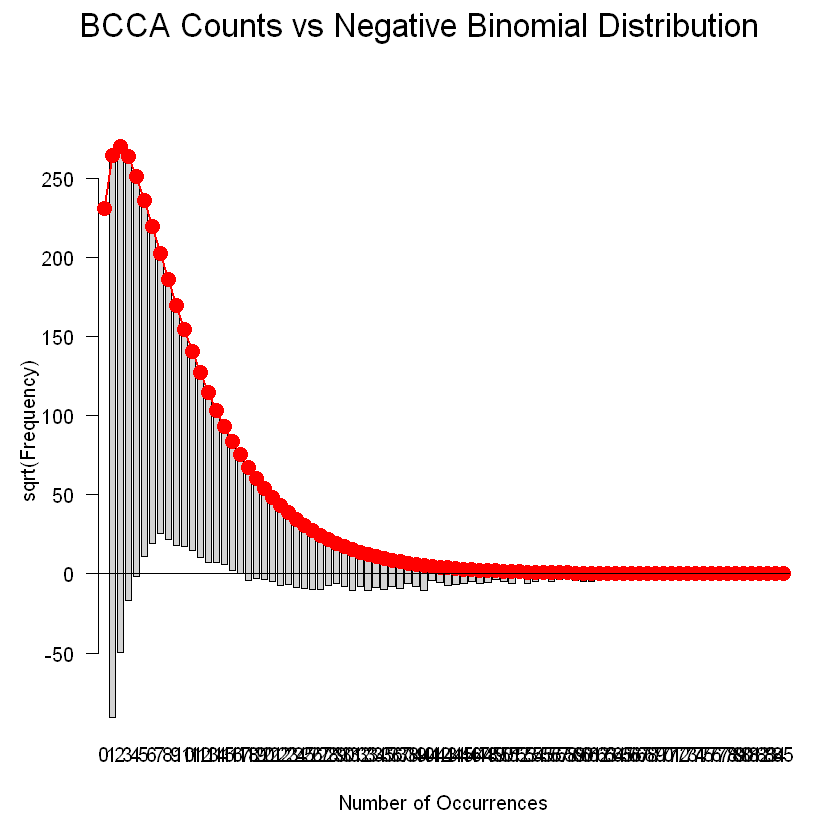

In [517]:
plot( BCgf_dDec, main="BCCA Counts vs Negative Binomial Distribution" )

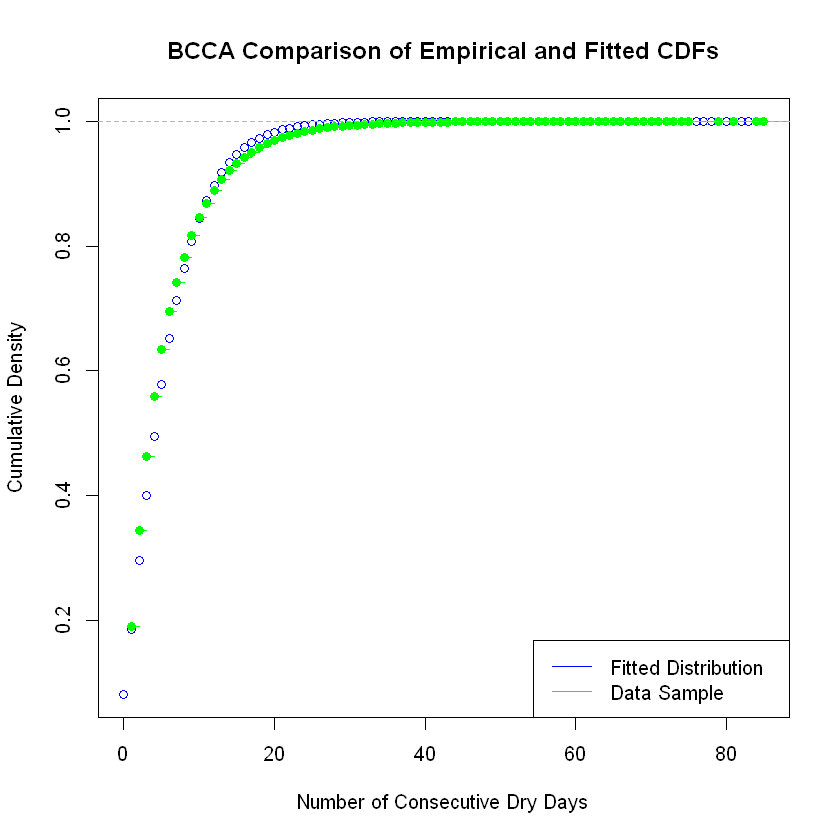

In [518]:
x <- seq(0,dBCDecMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dDec_mu, size=BCfdNB_dDec_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCDec$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

Look at our summary DataFrame

In [519]:
print( LOMonDistDF, quote=FALSE, row.names=FALSE )

 month      smu     ssize     sprob      tmu    tsize pvalue
     1 8.380219 1.0910076 0.1444528 8.381821 1.415209      0
     2 7.162631 1.0944720 0.1759659 7.162326 1.529458      0
     3 7.152276 1.2562784 0.1849282 7.151151 1.622494      0
     4 5.322500 1.4462381 0.2709893 5.322500 1.978490      0
     5 4.350159 1.1887120 0.3132915 4.350415 1.984754      0
     6 5.874712 0.6886561 0.1724728 5.876823 1.224845      0
     7 7.151573 0.9081454 0.1531315 7.151572 1.293153      0
     8 6.493649 1.1934683 0.1899369 6.493975 1.522653      0
     9 5.298741 1.0684289 0.2345163 5.298397 1.623236      0
    10 6.606449 0.9889798 0.1783417 6.606100 1.433860      0
    11 7.093255 0.8679161 0.1613866 7.091840 1.364786      0
    12 8.155696 0.9201202 0.1383197 8.156628 1.309328      0


In [520]:
print( BCMonDistDF, quote=FALSE, row.names=FALSE )

 month      smu    ssize     sprob      tmu    tsize pvalue
     1 5.443586 1.273455 0.2490515 5.443366 1.805289      0
     2 4.810010 1.420688 0.3007412 4.810123 2.068765      0
     3 4.669315 1.455288 0.3095492 4.668675 2.093103      0
     4 3.642517 1.872837 0.4269708 3.642352 2.713960      0
     5 2.865635 2.187599 0.5527426 2.865740 3.541622      0
     6 3.264309 1.541124 0.4412005 3.264041 2.577125      0
     7 3.375220 1.638725 0.4331194 3.375061 2.578682      0
     8 3.002545 2.089023 0.5231537 3.002607 3.294195      0
     9 3.217494 1.242051 0.4194727 3.218502 2.325599      0
    10 4.785886 1.129678 0.2647750 4.786371 1.723706      0
    11 5.562828 1.143061 0.2302757 5.561974 1.663957      0
    12 5.826546 1.187922 0.2248001 5.825732 1.689404      0


### Output to a Spreadsheet

Output the stats and distribution fits to a spreadsheet

In [521]:
outputDF_xlsx <- createWorkbook()

In [522]:
LOsumstat_xlsx <- createSheet(wb=outputDF_xlsx, sheetName="LOCA_Summary_Stats")
BCsumstat_xlsx <- createSheet(wb=outputDF_xlsx, sheetName="BCCA_Summary_Stats")
LOmondist_xlsx <- createSheet(wb=outputDF_xlsx, sheetName="LOCA_Dist_Properties")
BCmondist_xlsx <- createSheet(wb=outputDF_xlsx, sheetName="BCCA_Dist_Properties")

In [523]:
addDataFrame( x=MonLOSumStatDF, sheet=LOsumstat_xlsx )
addDataFrame( x=MonBCSumStatDF, sheet=BCsumstat_xlsx )
addDataFrame( x=LOMonDistDF, sheet=LOmondist_xlsx )
addDataFrame( x=BCMonDistDF, sheet=BCmondist_xlsx )

In [524]:
saveWorkbook( outputDF_xlsx, file="CMIP5_Dry_RSummary_2011-2040.xlsx" )

## Check that No Grid Cell Outliers

Check that there are not any grid cell outliers. This part will take a long time so may need to split it out to a standalone R script. This also does not make sense so removed.

In [525]:
options(warn = oldw)